In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pylab import *
rcParams["figure.facecolor"] = "white"    #plot背景白
rcParams["legend.numpoints"] = 1    #legendの点の数
set_printoptions(precision=2, linewidth=999)

# prototyping

In [4]:
%run extractor_osm.py

In [4]:
import shapefile

sf = shapefile.Reader("./shp/osm_tokyo_major")

In [82]:
shps = sf.shapes()
recs = sf.records()
flds = sf.fields
print(len(shps))
print(len(recs))
print(flds)

64087
64087
[('DeletionFlag', 'C', 1, 0), ['osm_id', 'C', 10, 0], ['code', 'N', 10, 0], ['fclass', 'C', 28, 0], ['name', 'C', 100, 0], ['ref', 'C', 20, 0], ['oneway', 'C', 1, 0], ['maxspeed', 'N', 10, 0], ['layer', 'F', 19, 11], ['bridge', 'C', 1, 0], ['tunnel', 'C', 1, 0]]


In [80]:
#日本語文字コード変換
encoding = "sjis"
for v in sf.record(0):
    if isinstance(v, bytes):
        print(v.decode(encoding), "(is bytes)")
    else:
        print(v)

4847506 (is bytes)
5111
motorway (is bytes)
首都高速11号台場線 (is bytes)
11 (is bytes)
F (is bytes)
0
4.0
T (is bytes)
F (is bytes)


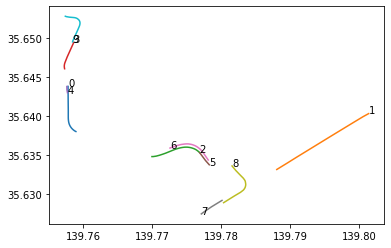

In [52]:
for j,s in enumerate(ss[:10]):
    plot([s.points[i][0] for i in range(len(s.points))], [s.points[i][1] for i in range(len(s.points))])
    text(s.points[0][0], s.points[0][1], j)

In [110]:
ww = shapefile.Writer("./shp/out")

In [111]:
for f in flds[1:]:
    ww.field(*f)

In [112]:
ww.fields

[('osm_id', 'C', 10, 0),
 ('code', 'N', 10, 0),
 ('fclass', 'C', 28, 0),
 ('name', 'C', 100, 0),
 ('ref', 'C', 20, 0),
 ('oneway', 'C', 1, 0),
 ('maxspeed', 'N', 10, 0),
 ('layer', 'F', 19, 11),
 ('bridge', 'C', 1, 0),
 ('tunnel', 'C', 1, 0)]

In [66]:
import shapefile
import copy

#read
r = shapefile.Reader("./shp/osm_tokyo_major")

shps = []
recs = []

str_list = ["motorway", "primary", "secondary", "trunk"]
for i in range(0,1000):
#for i in range(len(r)):
    if r.record(i)[2] in str_list + [s+"_link" for s in str_list]:
        shps.append(r.shape(i))
        recs.append(r.record(i))
    
        if recs[-1][2] in [s+"_link" for s in str_list]:
            recs[-1][2] = recs[-1][2][:-5]

#combine
total_iter = 2
for iter in range(total_iter):
    print("iteration", iter)
    
    shps_new = []
    recs_new = []
    i_removed = []
    for i in range(len(shps)):
        if i not in i_removed:
            shp = copy.copy(shps[i])
            for j in range(i+1, len(shps)):
                if j not in i_removed:
                    #name or refの空欄を埋める
                    if recs[i][2] == recs[j][2]:
                        for ii,jj,k1,k2 in [[i,j,3,4], [i,j,4,3], [j,i,3,4], [j,i,4,3]]:
                            if recs[ii][k1] == recs[jj][k1]:
                                if recs[ii][k2] == "" and recs[jj][k2] != "":
                                    recs[ii][k2] = recs[jj][k2]
                    #do combine
                        if recs[i][3] == recs[j][3] and recs[i][4] == recs[j][4]:
                            if shp.points[-1] == shps[j].points[0] or shp.points[0] == shps[j].points[-1]:
                                if shp.points[-1] == shps[j].points[0]:
                                    shp.points = shp.points + shps[j].points
                                else:
                                    shp.points = shps[j].points + shp.points
                                shp.bbox = [min([shps[i].bbox[0], shps[j].bbox[0]]), min([shps[i].bbox[1], shps[j].bbox[1]]),
                                            max([shps[i].bbox[2], shps[j].bbox[2]]), max([shps[i].bbox[3], shps[j].bbox[3]])]
                                print("combined", i, j, recs[i][3])
                                i_removed.append(j)
            shps_new.append(shp)
            recs_new.append(recs[i])
    
    print("#"*80, "\n", len(shps_new), "/", len(shps), "\n", "#"*80, sep="")
    if len(i_removed) == 0:
        break
    
    shps = copy.copy(shps_new)
    recs = copy.copy(recs_new)

#write
w = shapefile.Writer('./shp/copy')
w.fields = r.fields[1:] # skip first deletion field
for i in range(len(shps)):
    w.record(*recs[i])
    w.shape(shps[i])
w.close()

iteration 0
merged 2 5 
merged 10 86 首都高速1号羽田線
merged 15 30 首都高速都心環状線
merged 15 40 首都高速都心環状線
merged 17 41 首都高速都心環状線
merged 19 46 首都高速都心環状線
merged 38 545 昭和通り
merged 54 75 首都高速湾岸線
merged 59 76 首都高速湾岸線
merged 70 562 首都高速都心環状線
merged 72 240 首都高速2号目黒線
merged 72 717 首都高速2号目黒線
merged 83 84 東京湾岸道路
merged 85 194 首都高速1号羽田線
merged 85 226 首都高速1号羽田線
merged 103 107 首都高速八重洲線
merged 118 149 首都高速湾岸線
merged 118 150 首都高速湾岸線
merged 118 154 首都高速湾岸線
merged 118 237 首都高速湾岸線
merged 120 121 首都高速湾岸線
merged 122 123 首都高速湾岸線
merged 125 126 東京湾岸道路
merged 128 140 東京湾岸道路
merged 141 193 首都高速1号羽田線
merged 141 220 首都高速1号羽田線
merged 151 152 首都高速湾岸線
merged 151 153 首都高速湾岸線
merged 151 235 首都高速湾岸線
merged 151 236 首都高速湾岸線
merged 157 160 首都高速八重洲線
merged 157 163 首都高速八重洲線
merged 158 159 首都高速神奈川6号川崎線
merged 179 184 東京湾アクアライン
merged 180 183 東京湾アクアライン
merged 202 208 環八通り
merged 209 212 環七通り
merged 221 222 首都高速1号羽田線
merged 223 231 首都高速八重洲線
merged 255 257 多摩モノレール通り
merged 268 409 千葉街道
merged 280 281 港南ひまわりトンネル
merged 280 294 港南ひまわりトンネル


In [64]:
print?

In [59]:

shps = copy.copy(shps_new)
recs = copy.copy(recs_new)
w = shapefile.Writer('./shp/copy')
w.fields = r.fields[1:] # skip first deletion field
for i in range(len(shps)):
    w.record(*recs[i])
    w.shape(shps[i])
w.close()

In [31]:
i = 0
print(shps[i].parts)
print(shps[i].points)
print(shps[i].bbox)

[0]
[(139.7578, 35.6437952), (139.7578196, 35.6417602), (139.7578327, 35.6406704), (139.757831, 35.639852), (139.7578397, 35.6395924), (139.7578542, 35.639448), (139.7578741, 35.6393004), (139.7579045, 35.6391582), (139.7579335, 35.6390562), (139.757966, 35.6389645), (139.7580079, 35.6388687), (139.7580599, 35.6387672), (139.7581094, 35.6386844), (139.7581707, 35.6385969), (139.7582349, 35.6385161), (139.7583132, 35.6384262), (139.7583976, 35.6383438), (139.75849, 35.6382657), (139.7585998, 35.6381829), (139.7587212, 35.638103), (139.7588227, 35.6380454), (139.7589356, 35.637996)]
[139.7578, 35.637996, 139.7589356, 35.6437952]


In [80]:
%run extractor_osm.py

READING AND EXTRACTING...
COMBINING...
iteration 0
combined 0 62856 首都高速11号台場線
combined 1 7436 首都高速湾岸線
combined 1 60390 首都高速湾岸線
combined 1 60470 首都高速湾岸線
combined 2 5 
combined 7 7434 首都高速11号台場線
combined 7 28388 首都高速11号台場線
combined 7 38446 首都高速11号台場線
combined 8 7433 首都高速湾岸線
combined 9 38448 首都高速都心環状線
combined 10 86 首都高速1号羽田線
combined 10 54096 首都高速1号羽田線
combined 10 55218 首都高速1号羽田線
combined 12 46452 首都高速八重洲線
combined 15 30 首都高速都心環状線
combined 15 40 首都高速都心環状線
combined 15 7450 首都高速都心環状線
combined 15 28687 首都高速都心環状線
combined 15 28689 首都高速都心環状線
combined 15 36988 首都高速都心環状線
combined 16 7442 首都高速都心環状線
combined 16 36904 首都高速都心環状線
combined 17 41 首都高速都心環状線
combined 17 7449 首都高速都心環状線
combined 17 28692 首都高速都心環状線
combined 17 28700 首都高速都心環状線
combined 18 36838 昭和通り
combined 19 46 首都高速都心環状線
combined 19 28697 首都高速都心環状線
combined 19 36986 首都高速都心環状線
combined 19 41730 首都高速都心環状線
combined 19 41732 首都高速都心環状線
combined 19 41741 首都高速都心環状線
combined 20 29491 旧海岸通り
combined 20 29493 旧海岸通り
combined 20 44820 旧海岸通り
combine

combined 282 284 港南ひまわりトンネル
combined 282 295 港南ひまわりトンネル
combined 282 1978 港南ひまわりトンネル
combined 283 287 環八通り
combined 283 290 環八通り
combined 285 293 港南ひまわりトンネル
combined 286 291 環八通り
combined 289 41345 横浜伊勢原線
combined 297 34850 永代通り
combined 297 59741 永代通り
combined 298 23875 千葉街道
combined 298 40031 千葉街道
combined 298 44077 千葉街道
combined 299 5169 大網街道
combined 299 40417 大網街道
combined 301 26078 館山自動車道
combined 301 26080 館山自動車道
combined 301 26087 館山自動車道
combined 302 303 館山自動車道
combined 302 31415 館山自動車道
combined 302 39731 館山自動車道
combined 304 41184 館山自動車道
combined 304 63002 館山自動車道
combined 305 31408 館山自動車道
combined 306 24210 富津館山道路
combined 306 29090 富津館山道路
combined 306 31665 富津館山道路
combined 307 15384 内房なぎさライン
combined 307 39523 内房なぎさライン
combined 308 15392 館山バイパス
combined 308 30801 館山バイパス
combined 308 30802 館山バイパス
combined 308 43114 館山バイパス
combined 309 24384 館山バイパス
combined 309 41116 館山バイパス
combined 310 24385 館山バイパス
combined 310 41115 館山バイパス
combined 310 41117 館山バイパス
combined 310 43142 館山バイパス
co

combined 464 58310 県道505号線
combined 466 4358 前橋長瀞線
combined 466 6563 前橋長瀞線
combined 466 33685 前橋長瀞線
combined 467 42937 高崎神流秩父線
combined 468 22356 神田吉井停車場線
combined 468 35533 神田吉井停車場線
combined 469 59823 海岸通り
combined 470 6547 東京湾岸道路
combined 473 38461 国道409号
combined 474 61806 房総横断道路
combined 476 5154 東名高速道路
combined 477 7074 東名高速道路
combined 477 61236 東名高速道路
combined 478 30783 東名高速道路
combined 482 22986 関越自動車道
combined 482 22987 関越自動車道
combined 482 42184 関越自動車道
combined 482 42186 関越自動車道
combined 482 53713 関越自動車道
combined 483 22569 関越自動車道
combined 483 22575 関越自動車道
combined 484 23046 赤坂トンネル
combined 486 37918 津久井街道
combined 486 49648 津久井街道
combined 486 49649 津久井街道
combined 487 6294 八王子バイパス
combined 487 8159 八王子バイパス
combined 487 58306 八王子バイパス
combined 487 58308 八王子バイパス
combined 488 38321 関越自動車道
combined 488 42629 関越自動車道
combined 488 42631 関越自動車道
combined 488 52880 関越自動車道
combined 489 24256 豊岡バイパス
combined 490 14661 深谷バイパス
combined 490 35055 深谷バイパス
combined 492 15314 シンボルロード
combined 493 146

combined 667 33075 浅草通り
combined 667 34781 浅草通り
combined 669 60754 新大橋通り
combined 670 12984 国道4号
combined 671 49200 あじさい街道
combined 671 50387 あじさい街道
combined 674 4321 東名高速道路
combined 674 5145 東名高速道路
combined 674 42692 東名高速道路
combined 674 42694 東名高速道路
combined 676 9868 西湘バイパス
combined 676 9871 西湘バイパス
combined 676 24479 西湘バイパス
combined 677 14787 神奈川県道732号湯本元箱根線
combined 677 14788 神奈川県道732号湯本元箱根線
combined 677 17176 神奈川県道732号湯本元箱根線
combined 678 34740 湯河原箱根仙石原線
combined 681 10888 中央通り
combined 681 10894 中央通り
combined 681 10899 中央通り
combined 681 36753 中央通り
combined 690 55259 楢原あきる野線
combined 693 54992 中央通り
combined 694 27070 中央通り
combined 694 54990 中央通り
combined 695 61177 中央通り
combined 697 12242 陸前浜街道
combined 697 57946 陸前浜街道
combined 701 36847 半蔵門駅通り
combined 702 7458 楢原あきる野線
combined 702 60073 楢原あきる野線
combined 703 31325 潮見坂
combined 704 27787 豊洲有明線
combined 704 39204 豊洲有明線
combined 705 28057 大師道
combined 707 31486 昭和通り
combined 707 31585 昭和通り
combined 708 60669 中央通り
combined 708 60670 中央通り

combined 932 967 国道129号線
combined 932 57821 国道129号線
combined 937 941 東京環状
combined 937 35583 東京環状
combined 937 54001 東京環状
combined 937 58326 東京環状
combined 937 58332 東京環状
combined 937 58333 東京環状
combined 939 37846 東京環状
combined 939 58334 東京環状
combined 940 1011 東京環状
combined 940 54000 東京環状
combined 942 17552 所沢入間バイパス
combined 942 52431 所沢入間バイパス
combined 942 52434 所沢入間バイパス
combined 942 52435 所沢入間バイパス
combined 943 2821 青梅入間線
combined 944 41759 二本木飯能線
combined 944 41760 二本木飯能線
combined 944 54505 二本木飯能線
combined 946 52963 川越日高線
combined 947 52965 飯能寄居線
combined 947 54515 飯能寄居線
combined 948 1696 飯能寄居線
combined 948 1871 飯能寄居線
combined 948 39474 飯能寄居線
combined 950 52961 国道299号
combined 951 47326 二本木飯能線
combined 953 52971 東飯能停車場線
combined 956 49341 環二通り
combined 956 49850 環二通り
combined 956 49851 環二通り
combined 957 55112 豊洲有明線
combined 960 7405 東京湾岸道路
combined 960 53347 東京湾岸道路
combined 961 33058 豊洲有明線
combined 962 6551 環八通り
combined 962 24079 環八通り
combined 962 62013 環八通り
combined 962 62014 環八通り
co

combined 1188 17278 関越自動車道
combined 1190 39961 関越自動車道
combined 1192 11455 中央道稲城IC
combined 1193 6611 中央道稲城IC
combined 1194 1195 関越自動車道
combined 1194 1199 関越自動車道
combined 1194 22994 関越自動車道
combined 1194 22997 関越自動車道
combined 1194 53721 関越自動車道
combined 1196 1197 関越自動車道
combined 1196 1201 関越自動車道
combined 1196 22998 関越自動車道
combined 1198 9124 関越自動車道
combined 1198 30365 関越自動車道
combined 1198 30368 関越自動車道
combined 1200 30367 関越自動車道
combined 1202 1205 深谷東松山線
combined 1202 17022 深谷東松山線
combined 1202 22076 深谷東松山線
combined 1202 26339 深谷東松山線
combined 1203 1206 深谷東松山線
combined 1203 17023 深谷東松山線
combined 1208 43725 深谷東松山線
combined 1208 43726 深谷東松山線
combined 1211 6369 国道407号
combined 1214 60705 国道407号
combined 1215 1216 国道407号
combined 1215 6371 国道407号
combined 1215 55368 国道407号
combined 1219 1220 深谷東松山線
combined 1219 14885 深谷東松山線
combined 1221 13573 上武道路
combined 1221 28668 上武道路
combined 1221 28672 上武道路
combined 1221 49413 上武道路
combined 1224 32243 綿貫篠塚線
combined 1224 37086 綿貫篠塚線
combined 1224 50854 綿

combined 1419 43073 東京環状
combined 1420 54540 川越日高線
combined 1421 52966 飯能寄居線
combined 1421 54537 飯能寄居線
combined 1422 7560 首都高速都心環状線
combined 1423 7333 横浜新道
combined 1423 7334 横浜新道
combined 1423 22969 横浜新道
combined 1424 7331 横浜新道
combined 1425 29198 越谷停車場線
combined 1425 32672 越谷停車場線
combined 1426 61711 横浜伊勢原線
combined 1426 61712 横浜伊勢原線
combined 1428 13441 横浜伊勢原線
combined 1428 13442 横浜伊勢原線
combined 1429 30237 藤沢街道
combined 1429 30238 藤沢街道
combined 1432 60388 国道129号線
combined 1433 4440 中央道稲城IC
combined 1433 4441 中央道稲城IC
combined 1434 22508 野猿街道
combined 1434 33180 野猿街道
combined 1435 49664 柚木街道
combined 1437 1438 野猿街道
combined 1437 2728 野猿街道
combined 1437 33182 野猿街道
combined 1439 1453 多摩モノレール通り
combined 1445 1755 淵上日野線
combined 1446 25722 淵上日野線
combined 1447 33571 豊田停車場線
combined 1447 54348 豊田停車場線
combined 1449 25485 多摩モノレール通り
combined 1449 34379 多摩モノレール通り
combined 1450 1477 多摩モノレール通り
combined 1450 2930 多摩モノレール通り
combined 1450 47533 多摩モノレール通り
combined 1450 47534 多摩モノレール通り
combined 1450 475

combined 1699 62794 連雀通り
combined 1699 62795 連雀通り
combined 1701 31987 旧甲州街道
combined 1702 62395 旧甲州街道
combined 1703 1704 日野バイパス
combined 1703 22509 日野バイパス
combined 1703 45945 日野バイパス
combined 1703 45949 日野バイパス
combined 1703 62515 日野バイパス
combined 1705 22510 日野バイパス
combined 1705 33179 日野バイパス
combined 1705 45946 日野バイパス
combined 1705 45950 日野バイパス
combined 1706 1708 日野バイパス
combined 1706 1712 日野バイパス
combined 1706 2577 日野バイパス
combined 1706 25491 日野バイパス
combined 1706 25493 日野バイパス
combined 1707 1711 日野バイパス
combined 1707 2578 日野バイパス
combined 1707 25490 日野バイパス
combined 1707 25492 日野バイパス
combined 1709 3877 西大通り
combined 1710 3876 西大通り
combined 1713 25482 日野バイパス
combined 1713 25484 日野バイパス
combined 1714 34377 淵上日野線
combined 1715 1717 中央道稲城IC
combined 1718 3028 首都高速4号新宿線
combined 1718 36992 首都高速4号新宿線
combined 1719 42925 中央道稲城IC
combined 1720 34190 甲州街道
combined 1720 56429 甲州街道
combined 1720 57176 甲州街道
combined 1720 61242 甲州街道
combined 1721 3465 環七通り
combined 1721 33939 環七通り
combined 1722 3466 環七通り
com

combined 1945 1946 鎌倉葉山線
combined 1945 1950 鎌倉葉山線
combined 1945 1951 鎌倉葉山線
combined 1945 1952 鎌倉葉山線
combined 1947 1959 鎌倉葉山線
combined 1949 1954 鎌倉葉山線
combined 1956 1957 鎌倉葉山線
combined 1961 42844 国道134号
combined 1965 9634 東京環状
combined 1965 9635 東京環状
combined 1965 36026 東京環状
combined 1965 50893 東京環状
combined 1966 1968 東京環状
combined 1969 52173 金沢逗子線
combined 1970 50399 金沢逗子線
combined 1970 50400 金沢逗子線
combined 1970 50822 金沢逗子線
combined 1971 41357 環状2号線
combined 1971 43921 環状2号線
combined 1971 43925 環状2号線
combined 1972 30073 笹下釜利谷道路
combined 1973 8698 中央道稲城IC
combined 1974 37454 二本木飯能線
combined 1975 30223 東海道
combined 1975 33765 東海道
combined 1975 35080 東海道
combined 1976 43506 平戸桜木通り
combined 1979 41359 東京湾岸道路
combined 1979 41360 東京湾岸道路
combined 1980 47978 新奥多摩街道
combined 1980 47979 新奥多摩街道
combined 1980 58054 新奥多摩街道
combined 1981 45198 立川昭島線
combined 1981 45199 立川昭島線
combined 1984 2050 中央道稲城IC
combined 1984 2051 中央道稲城IC
combined 1984 2660 中央道稲城IC
combined 1984 3735 中央道稲城IC
combined 1984 3736

combined 2179 62694 東京湾岸道路
combined 2180 7739 中央道稲城IC
combined 2181 60796 茂原街道
combined 2181 60797 茂原街道
combined 2182 2183 茂原街道
combined 2182 22271 茂原街道
combined 2184 32538 松原通り
combined 2185 31217 浜野四街道長沼線
combined 2185 31218 浜野四街道長沼線
combined 2185 46046 浜野四街道長沼線
combined 2187 21193 東京環状
combined 2187 21196 東京環状
combined 2187 21246 東京環状
combined 2187 21382 東京環状
combined 2190 5653 中央道稲城IC
combined 2191 2192 国道134号
combined 2191 29011 国道134号
combined 2191 42422 国道134号
combined 2193 53867 鎌倉葉山線
combined 2194 38508 すばな通り
combined 2195 2990 すばな通り
combined 2196 2533 国道134号
combined 2196 37607 国道134号
combined 2196 37608 国道134号
combined 2196 42402 国道134号
combined 2196 61764 国道134号
combined 2197 4709 国道134号
combined 2197 4713 国道134号
combined 2197 50145 国道134号
combined 2197 50146 国道134号
combined 2197 50147 国道134号
combined 2197 50148 国道134号
combined 2198 39581 若潮通り
combined 2198 39583 若潮通り
combined 2198 41946 若潮通り
combined 2200 61965 若潮通り
combined 2200 61967 若潮通り
combined 2201 2202 中央道稲城IC
combi

combined 2434 41247 国道412号線
combined 2434 41426 国道412号線
combined 2437 20856 鳥屋川尻線
combined 2437 20866 鳥屋川尻線
combined 2438 20874 伊勢原津久井線
combined 2440 35341 伊勢原津久井線
combined 2442 17391 伊勢原津久井線
combined 2442 17416 伊勢原津久井線
combined 2443 17404 秦野清川線
combined 2443 17434 秦野清川線
combined 2444 2445 伊勢原津久井線
combined 2444 2446 伊勢原津久井線
combined 2444 2447 伊勢原津久井線
combined 2444 2448 伊勢原津久井線
combined 2444 2449 伊勢原津久井線
combined 2450 17399 宮ヶ瀬愛川線
combined 2450 17413 宮ヶ瀬愛川線
combined 2451 2452 宮ヶ瀬愛川線
combined 2451 2453 宮ヶ瀬愛川線
combined 2451 2456 宮ヶ瀬愛川線
combined 2451 2457 宮ヶ瀬愛川線
combined 2451 2458 宮ヶ瀬愛川線
combined 2451 2459 宮ヶ瀬愛川線
combined 2454 2455 宮ヶ瀬愛川線
combined 2454 17398 宮ヶ瀬愛川線
combined 2454 17412 宮ヶ瀬愛川線
combined 2460 2461 宮ヶ瀬愛川線
combined 2460 2462 宮ヶ瀬愛川線
combined 2460 2463 宮ヶ瀬愛川線
combined 2460 2464 宮ヶ瀬愛川線
combined 2460 2465 宮ヶ瀬愛川線
combined 2460 2466 宮ヶ瀬愛川線
combined 2460 2467 宮ヶ瀬愛川線
combined 2460 2468 宮ヶ瀬愛川線
combined 2460 59363 宮ヶ瀬愛川線
combined 2460 59364 宮ヶ瀬愛川線
combined 2469 2470 宮ヶ瀬愛川線
combined 2469 2

combined 2747 60546 綱島街道
combined 2748 62160 府中街道
combined 2748 62161 府中街道
combined 2749 33551 綱島街道
combined 2749 33552 綱島街道
combined 2749 60479 綱島街道
combined 2750 22117 綱島街道
combined 2750 34980 綱島街道
combined 2750 34991 綱島街道
combined 2750 35118 綱島街道
combined 2751 34992 綱島街道
combined 2751 37422 綱島街道
combined 2752 34978 子母口綱島線
combined 2752 34982 子母口綱島線
combined 2752 41074 子母口綱島線
combined 2753 2756 綱島街道
combined 2754 2758 綱島街道
combined 2759 35498 綱島街道
combined 2759 60108 綱島街道
combined 2760 44062 綱島街道
combined 2761 17024 綱島街道
combined 2761 17025 綱島街道
combined 2761 35872 綱島街道
combined 2762 2841 環状２号
combined 2764 26198 横浜新道
combined 2764 35408 横浜新道
combined 2764 35832 横浜新道
combined 2765 2767 横浜新道
combined 2765 35406 横浜新道
combined 2765 35455 横浜新道
combined 2766 8607 中央道稲城IC
combined 2766 60475 中央道稲城IC
combined 2768 8605 横浜新道
combined 2768 34504 横浜新道
combined 2769 2772 中央道稲城IC
combined 2769 44635 中央道稲城IC
combined 2770 8660 中央道稲城IC
combined 2775 2776 中央道稲城IC
combined 2775 9033 中央道稲城IC
combined

combined 3059 3060 八王子街道
combined 3059 28051 八王子街道
combined 3061 3105 中之条湯河原線
combined 3063 50770 中央道稲城IC
combined 3067 38052 中央道稲城IC
combined 3067 49925 中央道稲城IC
combined 3068 13968 中央道稲城IC
combined 3068 35091 中央道稲城IC
combined 3069 3071 日本ロマンチック街道
combined 3069 3072 日本ロマンチック街道
combined 3069 29331 日本ロマンチック街道
combined 3069 29332 日本ロマンチック街道
combined 3069 46463 日本ロマンチック街道
combined 3070 24552 平川横塚線
combined 3073 46464 日本ロマンチック街道
combined 3074 3170 三国街道
combined 3074 24815 三国街道
combined 3074 24816 三国街道
combined 3074 54064 三国街道
combined 3074 54065 三国街道
combined 3074 54067 三国街道
combined 3075 28155 沼田停車場線
combined 3077 3116 沼田停車場薄根線
combined 3077 29324 沼田停車場薄根線
combined 3079 51222 国道291号
combined 3080 3083 沼田水上線
combined 3081 24876 国道291号
combined 3081 24878 国道291号
combined 3081 51234 国道291号
combined 3081 51235 国道291号
combined 3085 25041 国道291号
combined 3086 3087 月夜野バイパス
combined 3086 46401 月夜野バイパス
combined 3088 3106 月夜野バイパス
combined 3088 3107 月夜野バイパス
combined 3088 3108 月夜野バイパス
combined 3088 31

combined 3315 3316 野猿街道
combined 3318 38798 北野街道
combined 3318 38799 北野街道
combined 3318 42306 北野街道
combined 3319 41635 川崎街道
combined 3321 35264 野猿街道
combined 3322 35265 野猿街道
combined 3322 38100 野猿街道
combined 3323 3950 鎌倉街道
combined 3323 3951 鎌倉街道
combined 3323 32925 鎌倉街道
combined 3323 32936 鎌倉街道
combined 3324 3953 鎌倉街道
combined 3324 32924 鎌倉街道
combined 3325 23821 府中街道
combined 3325 23891 府中街道
combined 3329 3330 阿久和鎌倉線
combined 3329 34910 阿久和鎌倉線
combined 3329 34911 阿久和鎌倉線
combined 3331 33459 府中街道
combined 3332 3333 市役所通り
combined 3332 60908 市役所通り
combined 3332 60909 市役所通り
combined 3335 38207 市電通り
combined 3336 35806 環状2号
combined 3336 59953 環状2号
combined 3336 59954 環状2号
combined 3339 3341 111
combined 3340 33555 尻手黒川道路
combined 3340 38155 尻手黒川道路
combined 3340 38157 尻手黒川道路
combined 3342 37427 松尾停車場線
combined 3344 42473 子母口綱島線
combined 3344 42475 子母口綱島線
combined 3346 22119 尻手黒川道路
combined 3346 22120 尻手黒川道路
combined 3346 52981 尻手黒川道路
combined 3352 60759 山谷通り
combined 3353 33846 外堀通り
combin

combined 3566 28317 中央道稲城IC
combined 3566 28320 中央道稲城IC
combined 3570 28309 東京外環自動車道
combined 3570 28310 東京外環自動車道
combined 3571 7239 東京外環自動車道
combined 3571 32275 東京外環自動車道
combined 3573 29099 中央道稲城IC
combined 3574 7386 国道298号
combined 3577 28886 中央道稲城IC
combined 3578 7241 中央道稲城IC
combined 3579 33263 中央道稲城IC
combined 3580 3582 中央道稲城IC
combined 3580 52789 中央道稲城IC
combined 3581 11749 中央道稲城IC
combined 3583 12598 中央道稲城IC
combined 3583 12607 中央道稲城IC
combined 3586 54361 蒲生岩槻線
combined 3588 24154 西大通り
combined 3589 52863 越谷流山線
combined 3592 11593 県道新方須賀さいたま線
combined 3594 3595 草加バイパス
combined 3594 3600 草加バイパス
combined 3594 49902 草加バイパス
combined 3596 3599 草加バイパス
combined 3596 33310 草加バイパス
combined 3596 36522 草加バイパス
combined 3598 3604 草加バイパス
combined 3601 3608 国道4号
combined 3601 15335 国道4号
combined 3609 3610 越谷春日部バイパス
combined 3609 3614 越谷春日部バイパス
combined 3609 3615 越谷春日部バイパス
combined 3609 3620 越谷春日部バイパス
combined 3609 51098 越谷春日部バイパス
combined 3611 3612 越谷春日部バイパス
combined 3611 3617 越谷春日部バイパス
combin

combined 3886 42510 鶴見獅子ヶ谷通り
combined 3886 60292 鶴見獅子ヶ谷通り
combined 3887 59996 鶴見獅子ヶ谷通り
combined 3890 31243 十里木御嶽停車場線
combined 3892 33918 檜原街道
combined 3892 43260 檜原街道
combined 3893 61204 檜原街道
combined 3893 61205 檜原街道
combined 3895 8182 野猿街道
combined 3895 10869 野猿街道
combined 3896 20180 青梅街道
combined 3896 45645 青梅街道
combined 3896 45646 青梅街道
combined 3897 20160 青梅街道
combined 3897 36011 青梅街道
combined 3898 20151 青梅街道
combined 3898 20181 青梅街道
combined 3898 36012 青梅街道
combined 3899 20278 国道139号
combined 3900 20188 奥多摩周遊道路
combined 3900 35756 奥多摩周遊道路
combined 3900 52848 奥多摩周遊道路
combined 3901 3902 奥多摩周遊道路
combined 3901 3903 奥多摩周遊道路
combined 3904 22627 国道139号
combined 3906 62406 秋川橋
combined 3907 55162 中央道稲城IC
combined 3907 55163 中央道稲城IC
combined 3911 31667 新青梅街道
combined 3911 31844 新青梅街道
combined 3911 61925 新青梅街道
combined 3911 61929 新青梅街道
combined 3911 61930 新青梅街道
combined 3912 6731 芋窪街道
combined 3912 41753 芋窪街道
combined 3912 41754 芋窪街道
combined 3915 18735 国道410号
combined 3915 18843 国道410号
comb

combined 4126 62652 谷井田稲戸井停車場線
combined 4127 41865 水戸街道
combined 4128 36577 水戸街道
combined 4128 36578 水戸街道
combined 4128 37650 水戸街道
combined 4128 53579 水戸街道
combined 4128 56873 水戸街道
combined 4128 56874 水戸街道
combined 4128 56879 水戸街道
combined 4128 56880 水戸街道
combined 4128 56883 水戸街道
combined 4128 56884 水戸街道
combined 4128 56887 水戸街道
combined 4128 56888 水戸街道
combined 4128 56891 水戸街道
combined 4128 56892 水戸街道
combined 4128 56895 水戸街道
combined 4128 56896 水戸街道
combined 4128 56899 水戸街道
combined 4128 56900 水戸街道
combined 4128 56901 水戸街道
combined 4129 31571 水戸街道
combined 4130 56911 水戸街道
combined 4130 56912 水戸街道
combined 4130 56915 水戸街道
combined 4130 56916 水戸街道
combined 4131 41564 水戸街道
combined 4132 41559 船橋我孫子線
combined 4133 29312 船橋我孫子線
combined 4134 62560 平和隧道
combined 4135 4136 千葉県道8号船橋我孫子線
combined 4135 4273 千葉県道8号船橋我孫子線
combined 4137 4138 取手東線
combined 4137 4139 取手東線
combined 4137 50735 取手東線
combined 4141 4368 府中街道
combined 4141 33492 府中街道
combined 4141 33547 府中街道
combined 4145 24122 川の手通り
com

combined 4362 22124 前橋安中富岡線
combined 4364 49003 津久田停車場前橋線
combined 4364 49005 津久田停車場前橋線
combined 4365 4366 尻手黒川道路
combined 4365 29095 尻手黒川道路
combined 4365 38141 尻手黒川道路
combined 4365 38142 尻手黒川道路
combined 4369 21332 中原街道
combined 4369 33499 中原街道
combined 4370 16679 川越越生線
combined 4372 23075 厚木街道
combined 4372 40722 厚木街道
combined 4374 34312 保土ヶ谷バイパス
combined 4374 37323 保土ヶ谷バイパス
combined 4375 21863 保土ヶ谷バイパス
combined 4375 21899 保土ヶ谷バイパス
combined 4376 34429 保土ヶ谷バイパス
combined 4376 37329 保土ヶ谷バイパス
combined 4377 13021 中原街道
combined 4377 28183 中原街道
combined 4377 35585 中原街道
combined 4377 35665 中原街道
combined 4379 37680 厚木街道
combined 4380 25816 富士見通り
combined 4380 49842 富士見通り
combined 4381 4382 南多摩尾根幹線道路
combined 4383 4469 環状4号線
combined 4383 30337 環状4号線
combined 4383 39219 環状4号線
combined 4383 39220 環状4号線
combined 4383 42907 環状4号線
combined 4383 60726 環状4号線
combined 4385 5405 大和厚木バイパス
combined 4389 41618 川越越生線
combined 4389 41619 川越越生線
combined 4390 6610 岩殿岩井線
combined 4390 41611 岩殿岩井線
combined 4390

combined 4624 26918 相武台下停車場線
combined 4625 5435 相模原茅ヶ崎線
combined 4625 5436 相模原茅ヶ崎線
combined 4625 27841 相模原茅ヶ崎線
combined 4625 51011 相模原茅ヶ崎線
combined 4627 51002 産業道路
combined 4627 61402 産業道路
combined 4627 61403 産業道路
combined 4629 31204 神奈川県道44号伊勢原藤沢線
combined 4629 62369 神奈川県道44号伊勢原藤沢線
combined 4632 42837 船橋停車場線
combined 4634 4647 東京環状
combined 4634 31729 東京環状
combined 4634 35122 東京環状
combined 4634 42424 東京環状
combined 4636 31735 東京環状
combined 4640 32980 茅ヶ崎中央通り
combined 4640 37578 茅ヶ崎中央通り
combined 4640 37584 茅ヶ崎中央通り
combined 4645 20864 神奈川県道510号長竹川尻線
combined 4645 45554 神奈川県道510号長竹川尻線
combined 4645 45555 神奈川県道510号長竹川尻線
combined 4646 30987 神奈川県道47号藤沢平塚線
combined 4648 30269 国道131号
combined 4648 31028 国道131号
combined 4649 33469 産業道路
combined 4650 38899 環状4号
combined 4651 42551 首都高速湾岸線
combined 4651 60218 首都高速湾岸線
combined 4653 50674 湘南新道
combined 4654 4655 東海道
combined 4654 32771 東海道
combined 4654 34453 東海道
combined 4654 34454 東海道
combined 4654 34915 東海道
combined 4656 22788 八王子街道
combined 465

combined 4891 21798 中山道
combined 4891 24526 中山道
combined 4893 4894 中山道
combined 4893 24525 中山道
combined 4898 32099 中央道稲城IC
combined 4898 38051 中央道稲城IC
combined 4898 49921 中央道稲城IC
combined 4898 49924 中央道稲城IC
combined 4899 42943 高崎神流秩父線
combined 4901 4902 高崎バイパス
combined 4901 21723 高崎バイパス
combined 4901 21744 高崎バイパス
combined 4901 22863 高崎バイパス
combined 4903 4904 高崎バイパス
combined 4903 21747 高崎バイパス
combined 4903 22860 高崎バイパス
combined 4903 22861 高崎バイパス
combined 4905 35517 高崎バイパス
combined 4906 50974 西大通り
combined 4907 34559 安中バイパス
combined 4907 34561 安中バイパス
combined 4908 28827 安中バイパス
combined 4908 50810 安中バイパス
combined 4909 34563 安中バイパス
combined 4909 38043 安中バイパス
combined 4911 26810 碓氷バイパス
combined 4911 26811 碓氷バイパス
combined 4915 4917 小田原厚木道路
combined 4915 62334 小田原厚木道路
combined 4916 4918 小田原厚木道路
combined 4916 62333 小田原厚木道路
combined 4919 4937 
combined 4919 27167 
combined 4919 37582 
combined 4919 42597 
combined 4920 41326 中井羽根尾線
combined 4921 4922 松田国府津線
combined 4921 4924 松田国府津線
combined 49

combined 5165 31053 海岸通り
combined 5167 9780 石岡田伏土浦線
combined 5167 23036 石岡田伏土浦線
combined 5167 32303 石岡田伏土浦線
combined 5167 32304 石岡田伏土浦線
combined 5170 6191 神奈川県道44号伊勢原藤沢線
combined 5170 62368 神奈川県道44号伊勢原藤沢線
combined 5171 11225 中央道稲城IC
combined 5172 59549 茅ヶ崎停車場茅ヶ崎線(雄三通り)
combined 5175 30270 環八通り
combined 5175 30834 環八通り
combined 5176 30836 環八通り
combined 5177 23208 環八通り
combined 5177 27432 環八通り
combined 5177 27433 環八通り
combined 5177 37675 環八通り
combined 5178 5179 中央道稲城IC
combined 5178 10774 中央道稲城IC
combined 5180 9034 中央道稲城IC
combined 5181 15816 神奈川県道201号保土ヶ谷停車場線
combined 5181 60394 神奈川県道201号保土ヶ谷停車場線
combined 5183 34656 環状1号
combined 5184 35411 新横浜通り
combined 5186 5187 首都高速神奈川1号横羽線
combined 5186 5188 首都高速神奈川1号横羽線
combined 5186 5189 首都高速神奈川1号横羽線
combined 5186 5190 首都高速神奈川1号横羽線
combined 5186 5191 首都高速神奈川1号横羽線
combined 5186 5902 首都高速神奈川1号横羽線
combined 5186 10656 首都高速神奈川1号横羽線
combined 5186 38697 首都高速神奈川1号横羽線
combined 5192 5377 荒玉水道道路
combined 5192 5379 荒玉水道道路
combined 5193 35159 新川通り
combined 51

combined 5439 35997 鎌倉街道
combined 5440 34084 中山道
combined 5441 22944 公園通り
combined 5441 22945 公園通り
combined 5441 26527 公園通り
combined 5442 34147 中杉通り
combined 5443 52309 国道409号
combined 5444 23565 中央道稲城IC
combined 5445 5446 成田小見川鹿島港線
combined 5445 5452 成田小見川鹿島港線
combined 5445 31463 成田小見川鹿島港線
combined 5445 31464 成田小見川鹿島港線
combined 5445 31466 成田小見川鹿島港線
combined 5447 47914 横芝下総線
combined 5447 47915 横芝下総線
combined 5449 47911 郡停車場大須賀線
combined 5454 61949 佐原山田線
combined 5458 52293 利根水郷ライン
combined 5458 52428 利根水郷ライン
combined 5461 5462 平和隧道
combined 5468 28879 旭小見川線
combined 5469 43585 多古笹本線
combined 5470 40847 多古笹本線
combined 5470 40848 多古笹本線
combined 5471 40854 旭笹川線
combined 5473 53816 小見川海上線
combined 5476 40828 利根水郷ライン;国道356号
combined 5476 40886 利根水郷ライン;国道356号
combined 5476 40887 利根水郷ライン;国道356号
combined 5478 5479 利根水郷ライン;国道356号
combined 5478 30323 利根水郷ライン;国道356号
combined 5482 60160 新荒川堤防線
combined 5483 5484 国道124号
combined 5483 44447 国道124号
combined 5483 59227 国道124号
combined 5483 59228 国道12

combined 5728 16796 東京湾岸道路
combined 5728 16959 東京湾岸道路
combined 5728 58475 東京湾岸道路
combined 5730 5741 国道409号
combined 5731 5808 国道409号
combined 5732 5738 中央道稲城IC
combined 5733 5739 中央道稲城IC
combined 5734 62215 東京湾アクアライン連絡道
combined 5734 62216 東京湾アクアライン連絡道
combined 5735 43602 東京湾アクアライン連絡道
combined 5735 43603 東京湾アクアライン連絡道
combined 5735 43604 東京湾アクアライン連絡道
combined 5735 43605 東京湾アクアライン連絡道
combined 5735 43606 東京湾アクアライン連絡道
combined 5735 43607 東京湾アクアライン連絡道
combined 5735 43608 東京湾アクアライン連絡道
combined 5735 43609 東京湾アクアライン連絡道
combined 5735 43610 東京湾アクアライン連絡道
combined 5735 62214 東京湾アクアライン連絡道
combined 5742 5744 中央道稲城IC
combined 5743 5745 中央道稲城IC
combined 5746 5751 中央道稲城IC
combined 5747 9430 首都高速神奈川6号川崎線
combined 5747 10487 首都高速神奈川6号川崎線
combined 5748 37002 中央道稲城IC
combined 5749 5750 中央道稲城IC
combined 5752 10493 大師道
combined 5754 10490 首都高速神奈川6号川崎線
combined 5755 38200 浮島通り
combined 5756 63025 首都高速神奈川6号川崎線
combined 5758 5759 首都高速神奈川6号川崎線
combined 5758 5760 首都高速神奈川6号川崎線
combined 5758 10486 首都高速神奈川6号川崎線
comb

combined 5953 53810 国道298号
combined 5953 53815 国道298号
combined 5954 30210 水戸街道
combined 5954 47400 水戸街道
combined 5954 49083 水戸街道
combined 5955 5959 水戸街道
combined 5955 49085 水戸街道
combined 5955 49090 水戸街道
combined 5956 9933 水戸街道
combined 5956 9935 水戸街道
combined 5956 49078 水戸街道
combined 5956 49082 水戸街道
combined 5956 51269 水戸街道
combined 5956 51270 水戸街道
combined 5956 55249 水戸街道
combined 5957 49084 水戸街道
combined 5957 49091 水戸街道
combined 5958 49080 水戸街道
combined 5958 51738 水戸街道
combined 5960 30430 水戸街道
combined 5960 31586 水戸街道
combined 5960 53735 水戸街道
combined 5960 53736 水戸街道
combined 5960 61532 水戸街道
combined 5961 61768 松戸野田線
combined 5965 54167 国道298号
combined 5965 62762 国道298号
combined 5965 62763 国道298号
combined 5968 5979 西大通り
combined 5969 5977 東京湾岸道路
combined 5969 20050 東京湾岸道路
combined 5969 48937 東京湾岸道路
combined 5969 48941 東京湾岸道路
combined 5970 48929 東京湾岸道路
combined 5970 48936 東京湾岸道路
combined 5971 5985 東京湾岸道路
combined 5974 7760 首都高速湾岸線
combined 5974 7762 首都高速湾岸線
combined 5974 7768 首都高速湾岸線


combined 6218 56059 蓮田岩槻バイパス
combined 6218 56060 蓮田岩槻バイパス
combined 6220 56074 平塚松田線
combined 6221 45926 川島バイパス
combined 6221 45927 川島バイパス
combined 6221 54651 川島バイパス
combined 6222 37056 圏央道
combined 6222 37058 圏央道
combined 6222 47355 圏央道
combined 6222 56016 圏央道
combined 6222 56018 圏央道
combined 6224 6233 中央道稲城IC
combined 6224 6236 中央道稲城IC
combined 6225 48954 中央道稲城IC
combined 6226 49623 圏央道
combined 6226 49625 圏央道
combined 6230 49626 圏央道
combined 6230 49627 圏央道
combined 6230 49629 圏央道
combined 6232 8269 圏央道
combined 6232 28911 圏央道
combined 6232 42618 圏央道
combined 6232 49628 圏央道
combined 6234 6235 中央道稲城IC
combined 6234 6237 中央道稲城IC
combined 6239 35851 圏央道
combined 6239 62280 圏央道
combined 6239 62282 圏央道
combined 6240 6603 圏央道
combined 6240 49612 圏央道
combined 6240 62281 圏央道
combined 6241 54270 石岡田伏土浦線
combined 6241 54271 石岡田伏土浦線
combined 6241 56720 石岡田伏土浦線
combined 6241 56723 石岡田伏土浦線
combined 6244 6742 北関東自動車道
combined 6244 6749 北関東自動車道
combined 6244 45033 北関東自動車道
combined 6245 50359 関越自動車道


combined 6544 46566 国道298号
combined 6544 63110 国道298号
combined 6545 34943 葛飾吉川松伏線
combined 6545 54614 葛飾吉川松伏線
combined 6553 48380 小八林久保田下青鳥線
combined 6555 54801 石坂高坂停車場線
combined 6555 54802 石坂高坂停車場線
combined 6556 31574 前橋館林線
combined 6556 37817 前橋館林線
combined 6558 20008 藤沢街道
combined 6558 31153 藤沢街道
combined 6559 37298 吉祥寺通り
combined 6561 35704 高崎伊勢崎線
combined 6561 49899 高崎伊勢崎線
combined 6561 49900 高崎伊勢崎線
combined 6561 55243 高崎伊勢崎線
combined 6561 55244 高崎伊勢崎線
combined 6562 35564 八間道路
combined 6564 22959 元島名倉賀野線
combined 6564 45844 元島名倉賀野線
combined 6564 48846 元島名倉賀野線
combined 6565 22874 南新井前橋線
combined 6566 37661 足門前橋線
combined 6566 37662 足門前橋線
combined 6570 23328 東京環状
combined 6570 58030 東京環状
combined 6571 57993 羽村街道
combined 6571 57996 羽村街道
combined 6571 62432 羽村街道
combined 6572 57977 瑞穂バイパス
combined 6572 57983 瑞穂バイパス
combined 6572 57987 瑞穂バイパス
combined 6572 57989 瑞穂バイパス
combined 6572 57992 瑞穂バイパス
combined 6572 57995 瑞穂バイパス
combined 6572 57998 瑞穂バイパス
combined 6572 58001 瑞穂バイパス
combined 

combined 6812 39851 宇都宮バイパス
combined 6812 40582 宇都宮バイパス
combined 6813 40595 水戸街道
combined 6814 7908 石橋宇都宮バイパス
combined 6814 14131 石橋宇都宮バイパス
combined 6815 6818 西大通り
combined 6816 6817 西大通り
combined 6819 6821 足利バイパス
combined 6819 18123 足利バイパス
combined 6819 46895 足利バイパス
combined 6819 48470 足利バイパス
combined 6819 48471 足利バイパス
combined 6822 47588 佐野バイパス
combined 6822 47589 佐野バイパス
combined 6823 6827 西大通り
combined 6823 52492 西大通り
combined 6823 52502 西大通り
combined 6824 62816 佐野バイパス
combined 6825 6828 佐野バイパス
combined 6825 22433 佐野バイパス
combined 6825 47590 佐野バイパス
combined 6825 47591 佐野バイパス
combined 6826 6829 西大通り
combined 6826 52495 西大通り
combined 6826 52498 西大通り
combined 6831 6834 佐野バイパス
combined 6831 22422 佐野バイパス
combined 6831 22425 佐野バイパス
combined 6831 22430 佐野バイパス
combined 6832 6833 佐野バイパス
combined 6832 22423 佐野バイパス
combined 6832 22424 佐野バイパス
combined 6832 22426 佐野バイパス
combined 6832 22428 佐野バイパス
combined 6832 22429 佐野バイパス
combined 6832 57217 佐野バイパス
combined 6840 6854 中央道稲城IC
combined 6841 6844 中

combined 7025 7941 石橋宇都宮バイパス
combined 7025 7944 石橋宇都宮バイパス
combined 7025 10747 石橋宇都宮バイパス
combined 7028 7035 国道4号
combined 7028 29221 国道4号
combined 7028 32083 国道4号
combined 7029 32090 奥州街道
combined 7030 32084 上阿久津バイパス
combined 7037 14246 中央道稲城IC
combined 7037 14270 中央道稲城IC
combined 7038 24648 国道4号
combined 7038 47612 国道4号
combined 7040 47795 奥州街道
combined 7040 47796 奥州街道
combined 7041 50097 中央道稲城IC
combined 7041 50102 中央道稲城IC
combined 7042 7043 津久井道
combined 7042 32529 津久井道
combined 7042 54913 津久井道
combined 7042 59940 津久井道
combined 7044 55778 藤沢荒川沖線
combined 7045 55675 学園東大通り
combined 7045 55676 学園東大通り
combined 7045 55683 学園東大通り
combined 7046 56527 荒川沖阿見線
combined 7046 56530 荒川沖阿見線
combined 7048 56528 土浦稲敷線
combined 7049 10060 竜ヶ崎阿見線
combined 7049 56312 竜ヶ崎阿見線
combined 7050 7051 稲敷阿見線
combined 7050 37871 稲敷阿見線
combined 7050 46070 稲敷阿見線
combined 7052 7053 稲敷阿見線
combined 7055 54363 土浦稲敷線
combined 7058 12331 水戸神栖線
combined 7058 59569 水戸神栖線
combined 7058 59571 水戸神栖線
combined 7058 59575 水戸神栖線

combined 7366 35507 西大通り
combined 7367 29195 新大宮バイパス
combined 7367 34585 新大宮バイパス
combined 7367 39029 新大宮バイパス
combined 7367 46521 新大宮バイパス
combined 7368 22781 国道298号
combined 7368 22782 国道298号
combined 7369 7370 国道298号
combined 7372 32272 国道298号
combined 7373 7384 新大宮バイパス
combined 7373 29191 新大宮バイパス
combined 7373 31115 新大宮バイパス
combined 7373 46512 新大宮バイパス
combined 7374 42953 笹目通り
combined 7375 61366 代官町通
combined 7376 11565 笹目通り
combined 7376 11575 笹目通り
combined 7377 11570 笹目通り
combined 7377 11577 笹目通り
combined 7377 50198 笹目通り
combined 7377 61290 笹目通り
combined 7378 52644 那珂湊大洗線
combined 7379 11573 笹目通り
combined 7381 22347 笹目通り
combined 7381 50197 笹目通り
combined 7383 9703 新大宮バイパス
combined 7383 31114 新大宮バイパス
combined 7383 34581 新大宮バイパス
combined 7383 42952 新大宮バイパス
combined 7385 7387 国道298号
combined 7385 22713 国道298号
combined 7385 54051 国道298号
combined 7403 7404 東京湾岸道路
combined 7403 53861 東京湾岸道路
combined 7403 53862 東京湾岸道路
combined 7406 7475 東京湾岸道路
combined 7406 7476 東京湾岸道路
combined 7411 40762 

combined 7780 50252 惣新田幸手線
combined 7782 14863 西宝珠花春日部線
combined 7785 22008 前橋玉村線
combined 7785 44924 前橋玉村線
combined 7788 61413 清砂大橋通り
combined 7789 9025 千葉街道
combined 7789 33834 千葉街道
combined 7789 33953 千葉街道
combined 7789 33955 千葉街道
combined 7792 7794 平和隧道
combined 7792 8869 平和隧道
combined 7793 7795 平和隧道
combined 7793 8865 平和隧道
combined 7802 62007 中央道稲城IC
combined 7807 52041 エキスポ大通り
combined 7807 52044 エキスポ大通り
combined 7807 56076 エキスポ大通り
combined 7808 52043 エキスポ大通り
combined 7809 53943 川越入間線
combined 7810 60031 中新田入間川線
combined 7811 41873 茶つみ通り
combined 7813 8037 石岡田伏土浦線
combined 7813 8038 石岡田伏土浦線
combined 7813 33537 石岡田伏土浦線
combined 7814 27294 秦野二宮線
combined 7814 27295 秦野二宮線
combined 7814 28583 秦野二宮線
combined 7814 45734 秦野二宮線
combined 7815 36917 秦野二宮線
combined 7815 36919 秦野二宮線
combined 7815 36920 秦野二宮線
combined 7815 45736 秦野二宮線
combined 7815 45737 秦野二宮線
combined 7816 52304 さいたま鴻巣線
combined 7817 34580 オリンピック通り
combined 7818 29100 オリンピック通り
combined 7819 36684 中央道稲城IC
combined 7819 36685 

combined 8085 30088 東京都道445号常盤台赤羽線
combined 8085 42792 東京都道445号常盤台赤羽線
combined 8086 8109 中央道稲城IC
combined 8086 38214 中央道稲城IC
combined 8087 8112 中央道稲城IC
combined 8088 8111 中央道稲城IC
combined 8091 14808 久留里街道
combined 8091 31843 久留里街道
combined 8091 53626 久留里街道
combined 8091 60134 久留里街道
combined 8091 60135 久留里街道
combined 8092 31842 練馬所沢線
combined 8092 50910 練馬所沢線
combined 8092 52932 練馬所沢線
combined 8094 21288 代官町通
combined 8094 34135 代官町通
combined 8094 56750 代官町通
combined 8094 56751 代官町通
combined 8095 42833 音羽通り
combined 8095 59787 音羽通り
combined 8096 8097 神奈川県道406号吉岡海老名線
combined 8096 25379 神奈川県道406号吉岡海老名線
combined 8098 52845 東名高速道路
combined 8098 52846 東名高速道路
combined 8099 8102 中央道稲城IC
combined 8099 61224 中央道稲城IC
combined 8100 8110 中央道稲城IC
combined 8100 38455 中央道稲城IC
combined 8103 30098 圏央道
combined 8103 31034 圏央道
combined 8103 31037 圏央道
combined 8104 38217 中央道稲城IC
combined 8105 61226 中央道稲城IC
combined 8105 61672 中央道稲城IC
combined 8105 61673 中央道稲城IC
combined 8107 52844 東名高速道路
combined 8115 613

combined 8401 47527 佐野古河線
combined 8402 45532 北関東自動車道
combined 8403 8407 栃木佐野線
combined 8403 8408 栃木佐野線
combined 8403 8409 栃木佐野線
combined 8403 37551 栃木佐野線
combined 8404 32679 北関東自動車道
combined 8404 53225 北関東自動車道
combined 8411 8414 三田ヶ谷礼羽線
combined 8411 40907 三田ヶ谷礼羽線
combined 8411 40910 三田ヶ谷礼羽線
combined 8411 40913 三田ヶ谷礼羽線
combined 8413 40951 加須北川辺線
combined 8419 22760 熊谷館林線
combined 8420 8422 東北自動車道
combined 8420 22087 東北自動車道
combined 8420 55265 東北自動車道
combined 8420 55268 東北自動車道
combined 8421 8423 東北自動車道
combined 8421 22086 東北自動車道
combined 8421 55266 東北自動車道
combined 8421 55267 東北自動車道
combined 8424 18046 栃木藤岡線
combined 8424 62361 栃木藤岡線
combined 8425 57197 佐野バイパス
combined 8425 57200 佐野バイパス
combined 8425 57201 佐野バイパス
combined 8425 57204 佐野バイパス
combined 8425 57205 佐野バイパス
combined 8427 46840 佐野バイパス
combined 8427 49522 佐野バイパス
combined 8427 57190 佐野バイパス
combined 8428 35783 佐野バイパス
combined 8428 57189 佐野バイパス
combined 8428 57194 佐野バイパス
combined 8432 47122 太平山公園線
combined 8434 8438 栃木佐野線
combined 8

combined 8690 46468 国際通り
combined 8692 8697 横浜横須賀道路
combined 8692 22057 横浜横須賀道路
combined 8692 22059 横浜横須賀道路
combined 8692 24284 横浜横須賀道路
combined 8692 24287 横浜横須賀道路
combined 8692 24289 横浜横須賀道路
combined 8693 24009 首都高速神奈川3号狩場線
combined 8693 24019 首都高速神奈川3号狩場線
combined 8693 24059 首都高速神奈川3号狩場線
combined 8694 8701 首都高速神奈川3号狩場線
combined 8696 8702 横浜横須賀道路
combined 8696 22056 横浜横須賀道路
combined 8696 22058 横浜横須賀道路
combined 8696 24285 横浜横須賀道路
combined 8696 24286 横浜横須賀道路
combined 8696 24288 横浜横須賀道路
combined 8699 8700 首都高速神奈川3号狩場線
combined 8699 24138 首都高速神奈川3号狩場線
combined 8708 22283 永代通り
combined 8708 38147 永代通り
combined 8709 8710 中央道稲城IC
combined 8709 19992 中央道稲城IC
combined 8711 55923 国道293号
combined 8712 12099 国道293号
combined 8712 48686 国道293号
combined 8712 48687 国道293号
combined 8712 48688 国道293号
combined 8712 54347 国道293号
combined 8713 55179 国道245号
combined 8714 33739 日立港線
combined 8715 8719 中央道稲城IC
combined 8715 11501 中央道稲城IC
combined 8716 13044 常磐自動車道
combined 8716 42268 常磐自動車道
combined 8716 497

combined 8979 61296 中央道稲城IC
combined 8993 8994 国道245号
combined 8993 9016 国道245号
combined 8993 51785 国道245号
combined 8998 45757 日光街道
combined 8998 57797 日光街道
combined 9000 53033 常磐自動車道
combined 9000 53035 常磐自動車道
combined 9001 53034 常磐自動車道
combined 9001 53036 常磐自動車道
combined 9003 9004 北関東自動車道
combined 9003 48565 北関東自動車道
combined 9005 46560 中央道稲城IC
combined 9005 46563 中央道稲城IC
combined 9011 38939 実籾街道
combined 9011 51139 実籾街道
combined 9012 24180 長沼船橋線
combined 9012 25207 長沼船橋線
combined 9013 44149 幕張八千代線
combined 9017 9018 国道245号
combined 9017 55180 国道245号
combined 9019 10229 環七通り
combined 9019 10362 環七通り
combined 9019 10363 環七通り
combined 9019 38125 環七通り
combined 9019 42400 環七通り
combined 9019 42762 環七通り
combined 9019 52953 環七通り
combined 9020 10359 平和隧道
combined 9022 26822 東京都道442号北町豊玉線
combined 9023 33814 庚申通り
combined 9026 21442 千葉街道
combined 9028 34968 横芝山武線
combined 9030 53795 八潮三郷線
combined 9030 54027 八潮三郷線
combined 9032 21860 保土ヶ谷バイパス
combined 9032 21862 保土ヶ谷バイパス
combined 9032 34425 保土

combined 9284 42398 環七通り
combined 9287 31072 環七通り
combined 9289 51870 月岡真壁線
combined 9290 12373 笠間つくば線
combined 9290 62924 笠間つくば線
combined 9292 52436 石岡つくば線
combined 9292 52437 石岡つくば線
combined 9293 52402 石岡つくば線
combined 9296 52328 西小塙石岡線
combined 9296 52329 西小塙石岡線
combined 9300 37306 西大通り
combined 9301 57282 国道50号水戸バイパス
combined 9306 30401 東関東自動車道
combined 9307 48129 佐原街道
combined 9307 48130 佐原街道
combined 9308 23453 東関東自動車道
combined 9308 23466 東関東自動車道
combined 9308 23506 東関東自動車道
combined 9309 23444 東関東自動車道
combined 9309 23448 東関東自動車道
combined 9309 23509 東関東自動車道
combined 9309 23514 東関東自動車道
combined 9310 9312 佐原街道
combined 9310 23531 佐原街道
combined 9310 48131 佐原街道
combined 9311 23431 中央道稲城IC
combined 9316 9317 深芝浜波崎線
combined 9316 59721 深芝浜波崎線
combined 9316 59722 深芝浜波崎線
combined 9319 24764 銚子ドーバーライン
combined 9320 59373 粟生木崎線
combined 9320 59673 粟生木崎線
combined 9320 59675 粟生木崎線
combined 9321 9325 鹿島港線
combined 9321 27900 鹿島港線
combined 9322 9323 鹿島港線
combined 9324 58694 鹿島港線
combined 9327 58

combined 9622 17362 湯河原箱根仙石原線
combined 9622 38024 湯河原箱根仙石原線
combined 9622 38026 湯河原箱根仙石原線
combined 9626 43025 山田台大網白里線
combined 9626 61046 山田台大網白里線
combined 9628 18040 南羽生停車場線
combined 9629 9630 上新郷埼玉線
combined 9629 28417 上新郷埼玉線
combined 9629 28418 上新郷埼玉線
combined 9629 28419 上新郷埼玉線
combined 9629 28420 上新郷埼玉線
combined 9629 47150 上新郷埼玉線
combined 9631 39752 東金片貝線
combined 9631 39753 東金片貝線
combined 9631 42985 東金片貝線
combined 9631 43031 東金片貝線
combined 9632 18037 国道122号
combined 9632 18038 国道122号
combined 9632 31913 国道122号
combined 9632 41797 国道122号
combined 9632 46729 国道122号
combined 9632 47090 国道122号
combined 9632 47096 国道122号
combined 9633 41384 東京環状
combined 9636 47873 国道122号
combined 9636 56979 国道122号
combined 9638 25529 山梨県道33号上野原あきる野線
combined 9638 25530 山梨県道33号上野原あきる野線
combined 9638 43259 山梨県道33号上野原あきる野線
combined 9639 20292 上野原あきる野線
combined 9642 9643 羽生外野栗橋線
combined 9642 40275 羽生外野栗橋線
combined 9642 41621 羽生外野栗橋線
combined 9644 22222 神奈川県道42号藤沢座間厚木線
combined 9644 22744 神奈川県道42号藤沢座間厚木線

combined 9962 34103 吉祥寺通り
combined 9962 62658 吉祥寺通り
combined 9964 35854 中央道稲城IC
combined 9964 47862 中央道稲城IC
combined 9965 16329 水上片品線
combined 9965 16330 水上片品線
combined 9966 16306 国道４０１号
combined 9966 61199 国道４０１号
combined 9967 16331 水上片品線
combined 9967 52158 水上片品線
combined 9967 52159 水上片品線
combined 9967 52201 水上片品線
combined 9967 52202 水上片品線
combined 9969 11259 昭和通り
combined 9969 53785 昭和通り
combined 9969 61173 昭和通り
combined 9970 53927 日本ロマンチック街道
combined 9972 16321 日本ロマンチック街道
combined 9972 16322 日本ロマンチック街道
combined 9972 16325 日本ロマンチック街道
combined 9975 44863 明智平バイパス
combined 9975 44864 明智平バイパス
combined 9977 45767 中宮祠足尾線
combined 9977 46162 中宮祠足尾線
combined 9977 46163 中宮祠足尾線
combined 9978 27803 京葉道路
combined 9978 43058 京葉道路
combined 9979 9982 京葉道路
combined 9979 10005 京葉道路
combined 9979 34847 京葉道路
combined 9980 27113 京葉道路
combined 9980 27115 京葉道路
combined 9980 43057 京葉道路
combined 9983 10035 清洲橋通り
combined 9983 22923 清洲橋通り
combined 9984 9988 八王子南バイパス
combined 9985 10070 八王子南バイパス
combined 998

combined 10308 45081 中央道稲城IC
combined 10308 48765 中央道稲城IC
combined 10309 29769 高崎東吾妻線
combined 10309 44013 高崎東吾妻線
combined 10309 44014 高崎東吾妻線
combined 10310 29894 高崎東吾妻線
combined 10311 27217 渋川松井田線
combined 10311 27218 渋川松井田線
combined 10311 44011 渋川松井田線
combined 10312 33677 渋川松井田線
combined 10312 44019 渋川松井田線
combined 10317 25630 日本ロマンチック街道
combined 10317 31384 日本ロマンチック街道
combined 10319 20021 船橋我孫子線
combined 10321 43915 四街道上志津線
combined 10322 10323 中央道稲城IC
combined 10322 40908 中央道稲城IC
combined 10322 45489 中央道稲城IC
combined 10325 40374 新堀尾島線
combined 10326 50714 平塚亀岡線
combined 10327 13586 大原境三ツ木線
combined 10327 50423 大原境三ツ木線
combined 10328 38361 首都高速中央環状線
combined 10328 38363 首都高速中央環状線
combined 10329 10330 首都高速中央環状線
combined 10329 10331 首都高速中央環状線
combined 10329 38355 首都高速中央環状線
combined 10329 46511 首都高速中央環状線
combined 10329 51153 首都高速中央環状線
combined 10329 54204 首都高速中央環状線
combined 10332 10333 首都高速中央環状線
combined 10334 11531 中央道稲城IC
combined 10337 35970 西大通り
combined 10337 35971 西大通り
combined 1

combined 10589 50957 那須黒羽茂木線
combined 10589 50958 那須黒羽茂木線
combined 10590 10591 所沢狭山線
combined 10590 30871 所沢狭山線
combined 10595 13402 上金沢栃原線
combined 10596 13407 梨野沢大子線
combined 10598 39773 松井田軽井沢線
combined 10598 54665 松井田軽井沢線
combined 10598 54666 松井田軽井沢線
combined 10599 61387 常陸大宮御前山線
combined 10603 10604 つくばバイパス
combined 10603 55637 つくばバイパス
combined 10603 55638 つくばバイパス
combined 10605 17125 つくば真岡線
combined 10605 17126 つくば真岡線
combined 10608 37324 保土ヶ谷バイパス
combined 10610 10612 中原街道
combined 10610 31657 中原街道
combined 10610 34427 中原街道
combined 10610 36142 中原街道
combined 10611 10613 保土ヶ谷バイパス
combined 10611 37328 保土ヶ谷バイパス
combined 10614 10615 中原街道
combined 10614 34430 中原街道
combined 10614 34432 中原街道
combined 10614 43055 中原街道
combined 10618 24139 首都高速神奈川3号狩場線
combined 10618 24140 首都高速神奈川3号狩場線
combined 10619 24100 首都高速神奈川3号狩場線
combined 10619 24101 首都高速神奈川3号狩場線
combined 10619 24105 首都高速神奈川3号狩場線
combined 10621 24018 首都高速神奈川3号狩場線
combined 10621 24057 首都高速神奈川3号狩場線
combined 10621 24058 首都高速神奈川3号狩場線
co

combined 10927 10928 都庁通り
combined 10936 38386 八王子武蔵村山線
combined 10938 10939 棚倉街道
combined 10940 38423 井野停車場線
combined 10940 42678 井野停車場線
combined 10941 38483 旧中山道
combined 10944 31228 寄居岡部深谷線
combined 10947 31583 江戸通り
combined 10947 42434 江戸通り
combined 10947 60673 江戸通り
combined 10947 60772 江戸通り
combined 10948 62168 江戸通り
combined 10954 15021 広木折原線
combined 10955 15157 上里鬼石線
combined 10955 25821 上里鬼石線
combined 10955 27344 上里鬼石線
combined 10956 34448 藤岡大胡線
combined 10959 10963 埼大通り
combined 10959 30590 埼大通り
combined 10962 30589 埼大通り
combined 10962 55213 埼大通り
combined 10964 26137 埼大通り
combined 10967 53354 東京湾岸道路
combined 10969 10972 中央道稲城IC
combined 10969 10979 中央道稲城IC
combined 10970 10990 三浦縦貫道路
combined 10971 10974 三浦縦貫道路
combined 10971 41167 三浦縦貫道路
combined 10971 41169 三浦縦貫道路
combined 10973 34366 中央道稲城IC
combined 10973 34368 中央道稲城IC
combined 10975 10984 三浦縦貫道路
combined 10975 41153 三浦縦貫道路
combined 10976 10986 中央道稲城IC
combined 10977 41168 三浦縦貫道路
combined 10978 25213 横須賀葉山線
combined 10978 

combined 11237 54904 東京環状
combined 11237 58119 東京環状
combined 11241 16733 大谷材木町線
combined 11241 54525 大谷材木町線
combined 11242 52918 ときがわ坂戸線
combined 11243 16168 大野東松山線
combined 11245 41258 中央道稲城IC
combined 11245 41261 中央道稲城IC
combined 11246 36175 本田小川線
combined 11246 36176 本田小川線
combined 11246 41244 本田小川線
combined 11247 11709 目黒通り
combined 11247 59822 目黒通り
combined 11248 11711 目黒通り
combined 11248 34606 目黒通り
combined 11248 37263 目黒通り
combined 11248 54727 目黒通り
combined 11249 44172 目白通り
combined 11249 47817 目白通り
combined 11251 11265 昭和通り
combined 11251 41718 昭和通り
combined 11251 41721 昭和通り
combined 11252 11258 昭和通り
combined 11252 41715 昭和通り
combined 11252 41722 昭和通り
combined 11253 11263 昭和通り
combined 11253 41716 昭和通り
combined 11254 41720 昭和通り
combined 11261 11264 昭和通り
combined 11261 41717 昭和通り
combined 11267 28443 首都高速道路
combined 11268 43203 中央道稲城IC
combined 11269 11275 鬼怒テクノ通り
combined 11269 59199 鬼怒テクノ通り
combined 11269 59200 鬼怒テクノ通り
combined 11270 43910 真岡那須烏山線
combined 11271 11272 鬼怒テクノ通り


combined 11547 52128 水戸バイパス
combined 11548 45374 水戸バイパス
combined 11548 52702 水戸バイパス
combined 11550 45366 陸前浜街道
combined 11550 45381 陸前浜街道
combined 11551 11554 水戸バイパス
combined 11553 45379 陸前浜街道
combined 11560 33194 明治通り
combined 11562 34008 佃大橋通り
combined 11564 31112 目白通り
combined 11564 52881 目白通り
combined 11564 62109 目白通り
combined 11566 52772 目白通り
combined 11576 50203 目白通り
combined 11579 30737 西大橋
combined 11581 37513 第2産業道路
combined 11582 43438 中央道稲城IC
combined 11595 42113 靖国通り
combined 11595 56479 靖国通り
combined 11596 42112 靖国通り
combined 11596 57323 靖国通り
combined 11597 11598 奥多摩あきる野線
combined 11597 20356 奥多摩あきる野線
combined 11597 30257 奥多摩あきる野線
combined 11597 48303 奥多摩あきる野線
combined 11597 48305 奥多摩あきる野線
combined 11597 48306 奥多摩あきる野線
combined 11602 32381 南通り
combined 11602 32389 南通り
combined 11603 43228 表参道
combined 11605 13776 南後箇七日市線
combined 11605 13815 南後箇七日市線
combined 11605 44378 南後箇七日市線
combined 11605 45889 南後箇七日市線
combined 11606 21850 富岡バイパス
combined 11606 37218 富岡バイパス
combined 11

combined 11960 37197 つくば益子線
combined 11960 43908 つくば益子線
combined 11961 43930 益子公園線
combined 11964 44728 茨城鹿島線
combined 11966 11967 鹿嶋バイパス
combined 11966 39198 鹿嶋バイパス
combined 11974 27730 山根大津港線
combined 11976 11983 里根神岡上線
combined 11976 40168 里根神岡上線
combined 11978 12022 塙大津港線
combined 11984 11985 芳賀市貝バイパス
combined 11984 46263 芳賀市貝バイパス
combined 11989 51914 里根神岡上線
combined 11989 51915 里根神岡上線
combined 11989 51916 里根神岡上線
combined 11989 51917 里根神岡上線
combined 11990 54095 北茨城インター線
combined 11993 40502 北茨城大子線
combined 11994 27733 日立いわき線
combined 11998 40312 里見南中郷停車場線
combined 11998 40313 里見南中郷停車場線
combined 11998 40398 里見南中郷停車場線
combined 12003 40344 高萩塙線
combined 12003 40345 高萩塙線
combined 12005 12006 東北自動車道
combined 12005 46750 東北自動車道
combined 12005 50087 東北自動車道
combined 12005 50090 東北自動車道
combined 12005 50115 東北自動車道
combined 12007 17984 東北自動車道
combined 12007 46753 東北自動車道
combined 12007 54289 東北自動車道
combined 12014 40358 茂木街道
combined 12014 48884 茂木街道
combined 12014 48889 茂木街道
combined 12014 569

combined 12424 49173 栃木バイパス
combined 12425 46433 栃木小山線
combined 12426 36194 宇都宮亀和田栃木線バイパス
combined 12426 60785 宇都宮亀和田栃木線バイパス
combined 12427 49174 栃木バイパス
combined 12429 12434 栃木バイパス
combined 12435 46434 栃木小山線
combined 12437 12440 栃木小山線
combined 12439 49324 栃木バイパス
combined 12439 49325 栃木バイパス
combined 12439 56737 栃木バイパス
combined 12444 49171 栃木バイパス
combined 12444 49178 栃木バイパス
combined 12444 49179 栃木バイパス
combined 12444 56735 栃木バイパス
combined 12444 56736 栃木バイパス
combined 12444 56738 栃木バイパス
combined 12444 56739 栃木バイパス
combined 12448 19538 結城二宮線
combined 12448 43902 結城二宮線
combined 12448 43903 結城二宮線
combined 12450 59156 真岡筑西線
combined 12451 53197 北関東自動車道
combined 12451 53199 北関東自動車道
combined 12452 12456 中央道稲城IC
combined 12453 12458 中央道稲城IC
combined 12454 46948 中央道稲城IC
combined 12454 47446 中央道稲城IC
combined 12455 18272 中央道稲城IC
combined 12455 49161 中央道稲城IC
combined 12459 18268 北関東自動車道
combined 12459 18270 北関東自動車道
combined 12459 44537 北関東自動車道
combined 12459 53198 北関東自動車道
combined 12461 12466 羽生田上蒲生線


combined 12871 39306 環七通り
combined 12874 48737 常磐自動車道
combined 12874 53098 常磐自動車道
combined 12875 12906 常磐自動車道
combined 12875 40392 常磐自動車道
combined 12875 53096 常磐自動車道
combined 12876 12914 花貫街道
combined 12876 37606 花貫街道
combined 12876 38825 花貫街道
combined 12877 12888 常磐自動車道
combined 12877 40503 常磐自動車道
combined 12877 53084 常磐自動車道
combined 12877 53087 常磐自動車道
combined 12878 12899 花貫街道
combined 12878 12909 花貫街道
combined 12879 53086 常磐自動車道
combined 12879 53088 常磐自動車道
combined 12881 12905 国道461号
combined 12881 13180 国道461号
combined 12881 39169 国道461号
combined 12883 12897 中央道稲城IC
combined 12883 47679 中央道稲城IC
combined 12883 48731 中央道稲城IC
combined 12884 48733 常磐自動車道
combined 12884 59753 常磐自動車道
combined 12886 40393 常磐自動車道
combined 12886 48732 常磐自動車道
combined 12886 53089 常磐自動車道
combined 12886 53091 常磐自動車道
combined 12886 59752 常磐自動車道
combined 12894 38542 花貫街道
combined 12894 38546 花貫街道
combined 12898 49734 常磐自動車道
combined 12901 48734 北茨城インター線
combined 12901 48735 北茨城インター線
combined 12903 53107 常磐自動車道
c

combined 13250 13332 下関河内小生瀬線
combined 13252 13325 上野宮下金沢線
combined 13253 13326 上野宮下金沢線
combined 13253 13334 上野宮下金沢線
combined 13254 13339 下関河内小生瀬線
combined 13255 13273 大子那須線
combined 13255 44688 大子那須線
combined 13256 13290 諸沢西金停車場線
combined 13257 13298 下関河内小生瀬線
combined 13257 13306 下関河内小生瀬線
combined 13257 13342 下関河内小生瀬線
combined 13262 13357 須賀川大子線
combined 13266 13289 袋田停車場四度ノ滝線
combined 13266 13307 袋田停車場四度ノ滝線
combined 13266 13322 袋田停車場四度ノ滝線
combined 13268 13284 須賀川大子線
combined 13272 13387 国道461号
combined 13272 13391 国道461号
combined 13272 13406 国道461号
combined 13272 13408 国道461号
combined 13275 37815 大子美和線
combined 13279 13300 上野宮下金沢線
combined 13279 13338 上野宮下金沢線
combined 13279 13358 上野宮下金沢線
combined 13283 13286 下関河内小生瀬線
combined 13283 13351 下関河内小生瀬線
combined 13285 13312 下関河内小生瀬線
combined 13287 13348 上野宮下金沢線
combined 13287 13350 上野宮下金沢線
combined 13294 13295 諸沢西金停車場線
combined 13294 13313 諸沢西金停車場線
combined 13294 13333 諸沢西金停車場線
combined 13297 45336 下関河内小生瀬線
combined 13311 37814 大子美和線
combin

combined 13667 45474 飯積向古河線
combined 13667 45475 飯積向古河線
combined 13672 40930 三田ヶ谷礼羽線
combined 13672 40931 三田ヶ谷礼羽線
combined 13673 40915 加須菖蒲線
combined 13677 42251 中央道稲城IC
combined 13677 46677 中央道稲城IC
combined 13679 42250 中央道稲城IC
combined 13681 48579 中央道稲城IC
combined 13685 13686 北中曽根北大桑線
combined 13685 40942 北中曽根北大桑線
combined 13685 40943 北中曽根北大桑線
combined 13685 40982 北中曽根北大桑線
combined 13685 40983 北中曽根北大桑線
combined 13689 38334 熱海ビーチライン
combined 13691 48236 野田岩槻線
combined 13693 13694 蓮田鴻巣線
combined 13693 48597 蓮田鴻巣線
combined 13696 22759 足利千代田線
combined 13696 34436 足利千代田線
combined 13702 52036 赤岩足利線
combined 13704 13709 古戸館林線
combined 13704 43522 古戸館林線
combined 13704 43523 古戸館林線
combined 13705 31054 綿貫篠塚線
combined 13707 31859 東毛広域幹線道路
combined 13707 36388 東毛広域幹線道路
combined 13707 62205 東毛広域幹線道路
combined 13707 62206 東毛広域幹線道路
combined 13710 13711 蓮田鴻巣線
combined 13710 38568 蓮田鴻巣線
combined 13710 41868 蓮田鴻巣線
combined 13710 41871 蓮田鴻巣線
combined 13712 38915 さいたま菖蒲線
combined 13712 38917 さいたま菖蒲線
combi

combined 14071 50372 トリコット通り
combined 14071 50373 トリコット通り
combined 14071 50374 トリコット通り
combined 14071 51921 トリコット通り
combined 14071 62360 トリコット通り
combined 14078 27829 国道293号
combined 14078 27830 国道293号
combined 14082 14119 大通り
combined 14082 14126 大通り
combined 14087 14118 日光宇都宮道路
combined 14087 50227 日光宇都宮道路
combined 14090 14093 石橋宇都宮バイパス
combined 14090 42562 石橋宇都宮バイパス
combined 14094 39556 北関東自動車道
combined 14094 45110 北関東自動車道
combined 14094 53190 北関東自動車道
combined 14094 53193 北関東自動車道
combined 14097 14108 大通り
combined 14097 14120 大通り
combined 14098 14133 西大通り
combined 14101 14140 国道4号
combined 14101 18592 国道4号
combined 14101 18597 国道4号
combined 14101 61039 国道4号
combined 14104 14132 日光宇都宮道路
combined 14104 41481 日光宇都宮道路
combined 14104 50228 日光宇都宮道路
combined 14109 14111 西大通り
combined 14109 14139 西大通り
combined 14114 34814 宇都宮環状道路
combined 14114 34817 宇都宮環状道路
combined 14122 58038 石橋宇都宮バイパス
combined 14123 44948 国道121号
combined 14123 44954 国道121号
combined 14124 14535 東北自動車道
combined 14125 41482 

combined 14625 14647 深谷バイパス
combined 14625 14649 深谷バイパス
combined 14626 40956 東北自動車道
combined 14630 14639 熊谷バイパス
combined 14630 14640 熊谷バイパス
combined 14631 14634 熊谷バイパス
combined 14631 14642 熊谷バイパス
combined 14632 14638 熊谷バイパス
combined 14633 14643 深谷バイパス
combined 14633 14657 深谷バイパス
combined 14635 40750 熊谷バイパス
combined 14635 46821 熊谷バイパス
combined 14635 46830 熊谷バイパス
combined 14637 14641 熊谷バイパス
combined 14637 46822 熊谷バイパス
combined 14646 14652 深谷バイパス
combined 14648 14655 深谷バイパス
combined 14653 14662 深谷バイパス
combined 14656 14659 深谷バイパス
combined 14656 39525 深谷バイパス
combined 14656 40415 深谷バイパス
combined 14664 14684 国道462号
combined 14664 27367 国道462号
combined 14664 60509 国道462号
combined 14664 60510 国道462号
combined 14665 14683 国道462号
combined 14665 60508 国道462号
combined 14666 14674 関越自動車道
combined 14666 27355 関越自動車道
combined 14666 27359 関越自動車道
combined 14666 50454 関越自動車道
combined 14667 14675 関越自動車道
combined 14667 14680 関越自動車道
combined 14667 27356 関越自動車道
combined 14667 27361 関越自動車道
combined 14667 50453

combined 15076 34338 本庄寄居線
combined 15077 62095 秋川街道
combined 15082 40403 国道254号
combined 15082 40405 国道254号
combined 15083 31921 前橋長瀞線
combined 15083 31923 前橋長瀞線
combined 15086 15088 国道462号
combined 15086 29139 国道462号
combined 15087 39303 国道462号
combined 15090 15094 長瀞児玉線
combined 15091 54061 長瀞児玉線
combined 15096 27188 旧栃木街道
combined 15097 15103 前橋長瀞線
combined 15098 15099 神奈川県道44号伊勢原藤沢線
combined 15098 15102 神奈川県道44号伊勢原藤沢線
combined 15100 39419 秩父児玉線
combined 15100 39420 秩父児玉線
combined 15104 34930 佐原八日市場線
combined 15105 43441 利根水郷ライン
combined 15105 52263 利根水郷ライン
combined 15115 15125 坂本寄居線
combined 15115 15126 坂本寄居線
combined 15115 45840 坂本寄居線
combined 15119 52152 尾瀬ヶ原土出線
combined 15119 52153 尾瀬ヶ原土出線
combined 15135 15138 菅谷寄居線
combined 15140 15142 津田沼停車場線
combined 15140 47645 津田沼停車場線
combined 15140 50765 津田沼停車場線
combined 15141 21690 津田沼停車場線
combined 15141 50330 津田沼停車場線
combined 15149 15150 国道254号
combined 15149 15152 国道254号
combined 15149 34077 国道254号
combined 15149 55199 国道254号
combined 

combined 15516 31399 中央道稲城IC
combined 15522 15523 鋸山登山自動車道
combined 15522 15524 鋸山登山自動車道
combined 15525 15662 長狭街道
combined 15525 15663 長狭街道
combined 15529 39745 内房なぎさライン
combined 15532 39737 島並鉾田線
combined 15532 39738 島並鉾田線
combined 15535 15537 中原街道
combined 15535 30187 中原街道
combined 15535 31659 中原街道
combined 15535 33672 中原街道
combined 15536 15538 中原街道
combined 15536 30188 中原街道
combined 15536 31656 中原街道
combined 15536 31658 中原街道
combined 15536 33673 中原街道
combined 15539 15541 中央道稲城IC
combined 15543 23079 東埼玉道路
combined 15557 33393 世田谷通り
combined 15559 15573 一宮椎木長者線
combined 15559 43566 一宮椎木長者線
combined 15563 16056 九十九里有料道路
combined 15563 39729 九十九里有料道路
combined 15563 48975 九十九里有料道路
combined 15565 15566 房総横断道路
combined 15565 15568 房総横断道路
combined 15565 16059 房総横断道路
combined 15569 15574 松丸一宮線
combined 15569 44268 松丸一宮線
combined 15569 44269 松丸一宮線
combined 15570 15575 九十九里ビーチライン
combined 15570 15576 九十九里ビーチライン
combined 15570 45542 九十九里ビーチライン
combined 15570 45543 九十九里ビーチライン
combined 15577 35

combined 16006 62376 大多喜里見線
combined 16006 62377 大多喜里見線
combined 16007 16021 小田代勝浦線
combined 16007 16025 小田代勝浦線
combined 16008 16023 小田代勝浦線
combined 16008 16024 小田代勝浦線
combined 16008 40850 小田代勝浦線
combined 16010 16020 小田代勝浦線
combined 16010 40849 小田代勝浦線
combined 16011 16026 小田代勝浦線
combined 16013 16022 市原天津小湊線
combined 16013 25228 市原天津小湊線
combined 16036 58197 下石戸上菖蒲線
combined 16040 16048 外房黒潮ライン
combined 16040 16049 外房黒潮ライン
combined 16040 44314 外房黒潮ライン
combined 16041 16045 外房黒潮ライン
combined 16044 16052 外房黒潮ライン
combined 16044 16053 外房黒潮ライン
combined 16051 44315 御宿停車場線
combined 16057 16058 九十九里有料道路
combined 16064 22773 柏木沢大八木線
combined 16066 27368 伊勢崎街道
combined 16068 44213 利根水郷ライン
combined 16072 16112 中央通り
combined 16072 39267 中央通り
combined 16072 56826 中央通り
combined 16074 16113 中央通り
combined 16075 44221 宗吾街道
combined 16076 16114 佐原街道
combined 16077 16080 佐原街道
combined 16077 48128 佐原街道
combined 16078 16116 佐原街道
combined 16081 16120 千葉県道63号成田下総線
combined 16081 43256 千葉県道63号成田下総線
combined 16082

combined 16506 16524 高崎神流秩父線
combined 16507 16513 高崎神流秩父線
combined 16507 16514 高崎神流秩父線
combined 16510 16511 高崎神流秩父線
combined 16510 29975 高崎神流秩父線
combined 16516 16517 高崎神流秩父線
combined 16520 45050 高崎神流秩父線
combined 16522 45052 高崎神流秩父線
combined 16523 45046 高崎神流秩父線
combined 16527 16530 上小坂四ツ家妙義線
combined 16527 16531 上小坂四ツ家妙義線
combined 16532 16534 上小坂四ツ家妙義線
combined 16533 44421 上小坂四ツ家妙義線
combined 16537 16538 下仁田小幡線
combined 16537 16539 下仁田小幡線
combined 16537 22592 下仁田小幡線
combined 16537 45963 下仁田小幡線
combined 16537 49378 下仁田小幡線
combined 16540 16545 下仁田浅科線
combined 16541 16542 下仁田浅科線
combined 16541 16543 下仁田浅科線
combined 16541 16544 下仁田浅科線
combined 16541 16546 下仁田浅科線
combined 16541 16547 下仁田浅科線
combined 16548 34467 紅葉ライン（姫街道）
combined 16563 34466 紅葉ライン（姫街道）
combined 16570 46498 南蛇井下仁田線
combined 16571 16613 西上州やまびこ街道
combined 16574 16614 西上州やまびこ街道
combined 16576 16606 西上州やまびこ街道
combined 16578 16608 西上州やまびこ街道
combined 16578 16612 西上州やまびこ街道
combined 16581 16605 西上州やまびこ街道
combined 16584 16587 小平下仁田線


combined 16877 25405 館山自動車道
combined 16877 36304 館山自動車道
combined 16877 46038 館山自動車道
combined 16879 16908 館山自動車道
combined 16882 16941 館山自動車道
combined 16885 16900 館山自動車道
combined 16885 25119 館山自動車道
combined 16886 16937 館山自動車道
combined 16887 31801 中央道稲城IC
combined 16888 16889 中央道稲城IC
combined 16888 16947 中央道稲城IC
combined 16888 25136 中央道稲城IC
combined 16888 25177 中央道稲城IC
combined 16888 25211 中央道稲城IC
combined 16888 25676 中央道稲城IC
combined 16890 31803 中央道稲城IC
combined 16890 46041 中央道稲城IC
combined 16896 16912 館山自動車道
combined 16896 46000 館山自動車道
combined 16896 46003 館山自動車道
combined 16896 46031 館山自動車道
combined 16905 16935 中央道稲城IC
combined 16905 16948 中央道稲城IC
combined 16905 31804 中央道稲城IC
combined 16920 16936 館山自動車道
combined 16920 16939 館山自動車道
combined 16920 46006 館山自動車道
combined 16923 16945 中央道稲城IC
combined 16923 16946 中央道稲城IC
combined 16925 46017 館山自動車道
combined 16925 46019 館山自動車道
combined 16925 46028 館山自動車道
combined 16927 16928 館山自動車道
combined 16927 46013 館山自動車道
combined 16950 16972 鶴舞馬来田停車場線
com

combined 17447 50531 圏央道
combined 17447 53657 圏央道
combined 17448 17519 上畑湊線
combined 17448 17520 上畑湊線
combined 17449 17512 上畑湊線
combined 17449 17514 上畑湊線
combined 17451 17513 上畑湊線
combined 17451 17521 上畑湊線
combined 17452 17516 上畑湊線
combined 17453 17515 上畑湊線
combined 17455 17517 上畑湊線
combined 17458 61609 内房なぎさライン
combined 17459 17510 内房なぎさライン
combined 17459 41208 内房なぎさライン
combined 17459 41209 内房なぎさライン
combined 17459 62293 内房なぎさライン
combined 17460 17507 内房なぎさライン
combined 17460 25046 内房なぎさライン
combined 17460 39991 内房なぎさライン
combined 17460 39992 内房なぎさライン
combined 17460 53334 内房なぎさライン
combined 17462 17509 内房なぎさライン
combined 17462 23346 内房なぎさライン
combined 17462 25045 内房なぎさライン
combined 17463 31412 中央道稲城IC
combined 17463 41185 中央道稲城IC
combined 17464 17523 国道465号
combined 17464 17528 国道465号
combined 17465 17525 国道465号
combined 17465 17530 国道465号
combined 17465 38668 国道465号
combined 17466 17532 国道465号
combined 17466 60243 国道465号
combined 17468 17524 国道465号
combined 17468 17534 国道465号
combined 17469 1

combined 17927 44641 西那須野那須線
combined 17927 47709 西那須野那須線
combined 17929 47706 奥州街道
combined 17931 44696 奥州街道
combined 17932 45697 西那須野那須線
combined 17935 17937 関谷上石上線
combined 17936 45693 関谷上石上線
combined 17936 55390 関谷上石上線
combined 17940 59535 黒磯棚倉線
combined 17940 59536 黒磯棚倉線
combined 17941 17956 黒磯田島線
combined 17942 17975 黒磯田島線
combined 17946 17964 黒磯田島線
combined 17946 17968 黒磯田島線
combined 17946 17971 黒磯田島線
combined 17948 17967 黒磯田島線
combined 17949 44560 板室街道
combined 17949 44562 板室街道
combined 17949 44563 板室街道
combined 17950 17954 黒磯田島線
combined 17950 17955 黒磯田島線
combined 17950 17965 黒磯田島線
combined 17950 17970 黒磯田島線
combined 17950 17972 黒磯田島線
combined 17950 17974 黒磯田島線
combined 17950 17976 黒磯田島線
combined 17961 45170 黒磯田島線
combined 17961 45171 黒磯田島線
combined 17979 42085 黒磯黒羽線
combined 17979 45705 黒磯黒羽線
combined 17983 17987 東北自動車道
combined 17986 50100 東北自動車道
combined 17988 47517 東北自動車道
combined 17989 17995 東北自動車道
combined 17989 17997 東北自動車道
combined 18000 35750 外堀通り
combined 18002 35766

combined 18339 61511 木更津富津線
combined 18340 25732 木更津富津線
combined 18340 53329 木更津富津線
combined 18342 54824 木更津富津線
combined 18342 54825 木更津富津線
combined 18342 58260 木更津富津線
combined 18342 61187 木更津富津線
combined 18342 61188 木更津富津線
combined 18343 18381 木更津末吉線
combined 18347 18349 西大通り
combined 18350 18360 館山自動車道
combined 18350 25656 館山自動車道
combined 18350 25659 館山自動車道
combined 18353 18359 館山自動車道
combined 18353 25655 館山自動車道
combined 18355 18361 館山自動車道
combined 18355 18795 館山自動車道
combined 18355 18807 館山自動車道
combined 18355 61793 館山自動車道
combined 18357 18362 館山自動車道
combined 18357 18809 館山自動車道
combined 18358 20340 館山自動車道
combined 18365 18368 圏央道
combined 18365 25167 圏央道
combined 18365 25168 圏央道
combined 18366 25173 東京湾アクアライン連絡道
combined 18367 25171 東京湾アクアライン連絡道
combined 18370 18378 馬来田停車場富岡線
combined 18370 38477 馬来田停車場富岡線
combined 18376 58561 東京湾岸道路
combined 18384 53689 木更津袖ヶ浦線
combined 18384 61160 木更津袖ヶ浦線
combined 18385 43317 君津平川線
combined 18385 61756 君津平川線
combined 18385 61800 君津平川線
combined 18385

combined 18768 31669 房総スカイライン有料道路
combined 18768 31674 房総スカイライン有料道路
combined 18769 31671 房総スカイライン有料道路
combined 18771 18775 房総スカイライン有料道路
combined 18771 31673 房総スカイライン有料道路
combined 18773 31672 房総スカイライン有料道路
combined 18776 18822 木更津末吉線
combined 18776 18823 木更津末吉線
combined 18776 61754 木更津末吉線
combined 18780 18821 木更津末吉線
combined 18782 18787 久留里街道
combined 18782 18788 久留里街道
combined 18782 60664 久留里街道
combined 18783 18789 久留里街道
combined 18792 18793 久留里街道
combined 18792 18794 久留里街道
combined 18792 60663 久留里街道
combined 18796 39498 久留里馬来田バイパス
combined 18796 39499 久留里馬来田バイパス
combined 18796 50948 久留里馬来田バイパス
combined 18797 18806 館山自動車道
combined 18797 18813 館山自動車道
combined 18797 45913 館山自動車道
combined 18797 45915 館山自動車道
combined 18798 18810 館山自動車道
combined 18798 18812 館山自動車道
combined 18798 45912 館山自動車道
combined 18798 45914 館山自動車道
combined 18799 18808 館山自動車道
combined 18800 18811 館山自動車道
combined 18805 50279 長浦上総線
combined 18816 41183 館山自動車道
combined 18816 63004 館山自動車道
combined 18818 26171 君津青堀線
combined 

combined 19271 61421 秩父上名栗線
combined 19275 19285 秩父上名栗線
combined 19277 19282 秩父上名栗線
combined 19277 54052 秩父上名栗線
combined 19280 19293 秩父上名栗線
combined 19281 61418 秩父上名栗線
combined 19284 19291 秩父上名栗線
combined 19298 19349 秩父児玉線
combined 19299 19350 秩父児玉線
combined 19299 30862 秩父児玉線
combined 19300 19340 秩父多摩甲斐国立公園三峰線
combined 19300 19341 秩父多摩甲斐国立公園三峰線
combined 19302 19342 秩父多摩甲斐国立公園三峰線
combined 19303 19339 秩父多摩甲斐国立公園三峰線
combined 19304 31958 秩父荒川線
combined 19304 32103 秩父荒川線
combined 19304 53806 秩父荒川線
combined 19304 61514 秩父荒川線
combined 19305 61460 秩父荒川線
combined 19306 19307 秩父荒川線
combined 19306 32102 秩父荒川線
combined 19310 19311 藤倉吉田線
combined 19316 61441 秩父往還
combined 19316 62273 秩父往還
combined 19320 19321 長瀞玉淀自然公園線
combined 19320 24709 長瀞玉淀自然公園線
combined 19323 19331 高崎神流秩父線
combined 19323 19333 高崎神流秩父線
combined 19324 19335 高崎神流秩父線
combined 19324 61447 高崎神流秩父線
combined 19325 19330 高崎神流秩父線
combined 19326 19334 高崎神流秩父線
combined 19328 19337 高崎神流秩父線
combined 19352 32045 阿左美桐生線
combined 19352 32046 阿

combined 19812 61257 市川柏線
combined 19813 44043 綱島街道
combined 19813 44894 綱島街道
combined 19814 38849 羽生田上蒲生線
combined 19814 62494 羽生田上蒲生線
combined 19819 61038 西大通り
combined 19820 40611 宝積寺停車場線
combined 19821 61702 杉山石末線
combined 19821 61703 杉山石末線
combined 19828 61534 行徳街道
combined 19834 23588 京葉道路
combined 19836 19837 中央道稲城IC
combined 19836 19838 中央道稲城IC
combined 19836 19839 中央道稲城IC
combined 19836 23556 中央道稲城IC
combined 19840 23548 中央道稲城IC
combined 19841 19845 京葉道路
combined 19842 19844 京葉道路
combined 19842 30403 京葉道路
combined 19843 23540 中央道稲城IC
combined 19847 40375 中央道稲城IC
combined 19848 19849 旧早稲田通り
combined 19848 20457 旧早稲田通り
combined 19848 24349 旧早稲田通り
combined 19848 24350 旧早稲田通り
combined 19850 19851 下総橘停車場東城線
combined 19850 41148 下総橘停車場東城線
combined 19850 41149 下総橘停車場東城線
combined 19850 45253 下総橘停車場東城線
combined 19852 19854 北野街道
combined 19852 45250 北野街道
combined 19855 43009 千葉船橋海浜線
combined 19858 19859 五日市街道
combined 19860 41710 武蔵境通り
combined 19864 33242 五日市街道
combined 19864 41388 五日市

combined 20255 51724 下畑軍畑線
combined 20255 51725 下畑軍畑線
combined 20255 51726 下畑軍畑線
combined 20255 51727 下畑軍畑線
combined 20260 30126 足利館林線
combined 20260 41022 足利館林線
combined 20260 62872 足利館林線
combined 20261 54667 日吉誉田停車場線
combined 20261 54668 日吉誉田停車場線
combined 20262 51705 小曽木街道
combined 20262 51706 小曽木街道
combined 20265 59942 足利千代田線
combined 20266 51367 成木河辺線
combined 20266 51368 成木河辺線
combined 20266 51369 成木河辺線
combined 20266 51409 成木河辺線
combined 20268 20269 新小金井街道
combined 20268 20270 新小金井街道
combined 20273 42663 蔵前橋通り
combined 20279 30960 二本木飯能線
combined 20283 20879 中央自動車道
combined 20284 20286 中央自動車道
combined 20284 20880 中央自動車道
combined 20290 20291 四日市場上野原線
combined 20290 20883 四日市場上野原線
combined 20293 20899 道志みち
combined 20293 54546 道志みち
combined 20296 54545 道志みち
combined 20297 42723 五日市街道
combined 20297 42726 五日市街道
combined 20298 20304 五日市街道
combined 20299 20303 五日市街道
combined 20301 49894 五日市街道
combined 20302 29983 五日市街道
combined 20306 51565 青梅街道
combined 20306 51582 青梅街道
combined 20306

combined 20675 60041 祝田通り
combined 20677 58875 国道294号
combined 20677 58878 国道294号
combined 20679 56473 外堀通り
combined 20680 24541 日比谷通り
combined 20680 32015 日比谷通り
combined 20680 46633 日比谷通り
combined 20680 59874 日比谷通り
combined 20681 61369 所沢武蔵村山立川線
combined 20681 61370 所沢武蔵村山立川線
combined 20683 20686 羽村瑞穂線
combined 20684 52968 飯能寄居線
combined 20684 55786 飯能寄居線
combined 20685 49207 飯能寄居線
combined 20685 52969 飯能寄居線
combined 20687 42665 平和隧道
combined 20689 42491 中央道稲城IC
combined 20694 20699 西大通り
combined 20696 20697 西大通り
combined 20700 40609 町田街道
combined 20702 20704 東京環状
combined 20702 21403 東京環状
combined 20702 26947 東京環状
combined 20702 37882 東京環状
combined 20706 20708 外苑東通り
combined 20710 20711 麻布トンネル
combined 20713 20715 水戸街道
combined 20713 46066 水戸街道
combined 20713 56897 水戸街道
combined 20713 56898 水戸街道
combined 20722 27019 千葉鎌ケ谷松戸線
combined 20722 44764 千葉鎌ケ谷松戸線
combined 20725 27020 船橋印西線
combined 20726 45246 仙石原新田線
combined 20727 20730 北関東自動車道
combined 20727 32584 北関東自動車道
combined 20727 325

combined 21088 21112 東京環状
combined 21088 28897 東京環状
combined 21088 42839 東京環状
combined 21091 31316 西大通り
combined 21092 21093 東海道
combined 21092 21094 東海道
combined 21092 32776 東海道
combined 21092 34916 東海道
combined 21092 50675 東海道
combined 21095 31318 西大通り
combined 21096 21097 東海道
combined 21096 21099 東海道
combined 21096 21813 東海道
combined 21104 21105 白井流山線
combined 21108 43192 中央道稲城IC
combined 21113 28899 東京環状
combined 21113 28900 東京環状
combined 21113 29050 東京環状
combined 21113 31723 東京環状
combined 21113 31732 東京環状
combined 21113 31733 東京環状
combined 21115 21116 御蔵島環状線
combined 21117 21125 八丈循環線
combined 21117 47212 八丈循環線
combined 21118 21129 八丈循環線
combined 21118 52802 八丈循環線
combined 21119 21120 八丈循環線
combined 21121 21126 八丈循環線
combined 21121 46681 八丈循環線
combined 21122 46684 八丈循環線
combined 21128 21131 八丈循環線
combined 21128 21132 八丈循環線
combined 21130 47213 八丈循環線
combined 21133 47210 八丈循環線
combined 21134 21147 八丈空港道路
combined 21134 21153 八丈空港道路
combined 21135 21154 八丈中央道路
combined 21136 21140 神

combined 21443 21445 中央道稲城IC
combined 21448 46525 首都高速7号小松川線
combined 21450 23584 京葉道路
combined 21450 23585 京葉道路
combined 21450 24369 京葉道路
combined 21453 52964 川越日高線
combined 21454 23661 中央道稲城IC
combined 21454 23673 中央道稲城IC
combined 21455 21456 圏央道
combined 21455 23702 圏央道
combined 21455 23704 圏央道
combined 21455 23708 圏央道
combined 21455 48613 圏央道
combined 21455 50529 圏央道
combined 21457 21464 京葉道路
combined 21457 46245 京葉道路
combined 21459 21465 京葉道路
combined 21459 35748 京葉道路
combined 21459 46220 京葉道路
combined 21460 21461 京葉道路
combined 21460 35747 京葉道路
combined 21462 42435 江戸通り
combined 21462 62169 江戸通り
combined 21463 42436 江戸通り
combined 21463 42437 江戸通り
combined 21466 21467 惣新田春日部線
combined 21471 60057 日高狭山線
combined 21472 26024 大間木蕨線
combined 21472 53830 大間木蕨線
combined 21475 37205 三ツ目通り
combined 21476 37204 三ツ目通り
combined 21476 46246 三ツ目通り
combined 21476 46248 三ツ目通り
combined 21480 46221 清澄通り
combined 21481 47803 内堀通り
combined 21482 32660 目黒通り
combined 21482 54344 目黒通り
combined 21482 567

combined 21893 21896 保土ヶ谷バイパス
combined 21893 21897 保土ヶ谷バイパス
combined 21905 22653 渋川街道
combined 21906 35939 草津街道
combined 21906 35940 草津街道
combined 21906 50479 草津街道
combined 21907 24973 草津街道
combined 21907 50482 草津街道
combined 21907 50483 草津街道
combined 21909 27003 磯部停車場妙義山線
combined 21909 27004 磯部停車場妙義山線
combined 21909 45743 磯部停車場妙義山線
combined 21910 27266 菅原一ノ宮線
combined 21910 43997 菅原一ノ宮線
combined 21913 31492 山谷通り
combined 21913 31493 山谷通り
combined 21913 60758 山谷通り
combined 21915 26759 吉野通り
combined 21915 31494 吉野通り
combined 21915 31495 吉野通り
combined 21918 32754 国道17号
combined 21918 55959 国道17号
combined 21921 49671 西大通り
combined 21922 21923 下里見安中線
combined 21922 27031 下里見安中線
combined 21922 27032 下里見安中線
combined 21924 43434 磯部停車場上野尻線
combined 21926 45197 下里見安中線
combined 21928 21930 八王子街道
combined 21928 33635 八王子街道
combined 21929 32363 八王子街道
combined 21931 28815 前橋長瀞線バイパス
combined 21933 38499 前橋長瀞線バイパス
combined 21933 38500 前橋長瀞線バイパス
combined 21934 21935 国道354号
combined 21934 28812 国道354号


combined 22376 45547 磯部停車場線
combined 22378 45546 磯部停車場妙義山線
combined 22379 26863 宇田磯部停車場線
combined 22379 27002 宇田磯部停車場線
combined 22379 27293 宇田磯部停車場線
combined 22380 50180 松井田中宿線
combined 22382 27229 宇田磯部停車場線
combined 22382 27230 宇田磯部停車場線
combined 22389 53889 東京都道442号北町豊玉線
combined 22392 29201 神奈川県道43号藤沢厚木線
combined 22392 29585 神奈川県道43号藤沢厚木線
combined 22392 33758 神奈川県道43号藤沢厚木線
combined 22392 54819 神奈川県道43号藤沢厚木線
combined 22392 60264 神奈川県道43号藤沢厚木線
combined 22393 62366 新湘南バイパス
combined 22394 30103 新湘南バイパス
combined 22395 30094 圏央道
combined 22395 44698 圏央道
combined 22396 30130 首都圏中央連絡自動車道
combined 22398 60178 吉祥寺通り
combined 22399 28072 沼田赤城線
combined 22399 31320 沼田赤城線
combined 22401 62249 東京湾岸道路
combined 22403 22406 第一京浜
combined 22403 56495 第一京浜
combined 22404 22405 第一京浜
combined 22404 56340 第一京浜
combined 22404 56498 第一京浜
combined 22404 58312 第一京浜
combined 22410 45800 沼田赤城線
combined 22411 22412 東国文化歴史街道
combined 22411 30552 東国文化歴史街道
combined 22415 50326 田沼停車場線
combined 22415 50327 田沼停車場線
comb

combined 22774 61287 南新井前橋線
combined 22776 50734 前橋安中富岡線
combined 22777 50745 前橋伊香保線
combined 22777 50746 前橋伊香保線
combined 22777 50747 前橋伊香保線
combined 22777 61228 前橋伊香保線
combined 22778 45991 高崎安中渋川線
combined 22778 45992 高崎安中渋川線
combined 22783 42828 牛込小石川線
combined 22783 47828 牛込小石川線
combined 22785 22786 八王子街道
combined 22785 22787 八王子街道
combined 22785 22791 八王子街道
combined 22785 42900 八王子街道
combined 22793 60434 千葉竜ヶ崎線
combined 22793 60435 千葉竜ヶ崎線
combined 22794 61254 船橋印西線
combined 22795 46718 三国街道
combined 22795 62016 三国街道
combined 22795 62017 三国街道
combined 22796 32236 渋川松井田線
combined 22798 22800 市電通り
combined 22798 35172 市電通り
combined 22798 60859 市電通り
combined 22798 60860 市電通り
combined 22798 60861 市電通り
combined 22804 40215 下久屋渋川線
combined 22804 40216 下久屋渋川線
combined 22804 45791 下久屋渋川線
combined 22804 45792 下久屋渋川線
combined 22805 40226 津久田停車場前橋線
combined 22805 40231 津久田停車場前橋線
combined 22805 40232 津久田停車場前橋線
combined 22805 53891 津久田停車場前橋線
combined 22805 53892 津久田停車場前橋線
combined 22807 40206 津久

combined 23183 23900 東京湾岸道路
combined 23183 60604 東京湾岸道路
combined 23184 53325 東京湾岸道路
combined 23184 53326 東京湾岸道路
combined 23185 23186 東京湾岸道路
combined 23185 24170 東京湾岸道路
combined 23185 24171 東京湾岸道路
combined 23185 54719 東京湾岸道路
combined 23188 23189 町田街道
combined 23188 32985 町田街道
combined 23197 32784 西大通り
combined 23198 32787 西大通り
combined 23199 23201 白山通り
combined 23199 40028 白山通り
combined 23199 40029 白山通り
combined 23199 40030 白山通り
combined 23202 40697 目白通り
combined 23202 47819 目白通り
combined 23202 47824 目白通り
combined 23204 60053 代官町通
combined 23207 37672 環八通り
combined 23209 23211 下河戸片岡線
combined 23209 32072 下河戸片岡線
combined 23218 23219 大田原氏家線
combined 23218 29240 大田原氏家線
combined 23222 36468 矢板那須線バイパス
combined 23224 23235 棚倉街道
combined 23234 23236 棚倉街道
combined 23234 23246 棚倉街道
combined 23243 46613 中里バイパス
combined 23244 61122 日立山方線
combined 23244 61123 日立山方線
combined 23250 44834 常陸太田大子線
combined 23252 61647 常陸太田那須烏山線
combined 23255 23258 日立山方線
combined 23259 23260 常陸太田那須烏山線
combined 23259 23

combined 23818 31974 中央道稲城IC
combined 23819 31973 中央道稲城IC
combined 23826 26207 八王子街道
combined 23826 30325 八王子街道
combined 23826 30326 八王子街道
combined 23827 23830 甲州街道
combined 23827 31344 甲州街道
combined 23827 33896 甲州街道
combined 23831 53560 旧甲州街道
combined 23835 23836 新小金井街道
combined 23835 31350 新小金井街道
combined 23835 53553 新小金井街道
combined 23838 31349 小金井街道
combined 23839 62165 東八道路
combined 23842 23843 厚木街道
combined 23842 34426 厚木街道
combined 23842 35525 厚木街道
combined 23842 42961 厚木街道
combined 23849 28783 駒形線
combined 23850 23851 駒形線
combined 23853 23854 東毛広域幹線道路
combined 23853 23855 東毛広域幹線道路
combined 23853 23856 東毛広域幹線道路
combined 23853 27030 東毛広域幹線道路
combined 23853 33806 東毛広域幹線道路
combined 23868 33857 晴海通り
combined 23869 23870 晴海通り
combined 23869 51108 晴海通り
combined 23869 60602 晴海通り
combined 23869 60603 晴海通り
combined 23872 23873 中央道稲城IC
combined 23872 28701 中央道稲城IC
combined 23879 23887 新府中街道
combined 23879 50077 新府中街道
combined 23880 42356 国分寺街道
combined 23880 62163 国分寺街道
combined 23883 2568

combined 24448 47784 春日通り
combined 24448 48179 春日通り
combined 24448 48180 春日通り
combined 24454 51395 成田街道
combined 24454 51396 成田街道
combined 24454 56842 成田街道
combined 24454 56843 成田街道
combined 24454 62046 成田街道
combined 24455 24458 西大通り
combined 24455 24464 西大通り
combined 24455 39128 西大通り
combined 24456 24466 西大通り
combined 24456 24469 西大通り
combined 24459 24470 佐原街道
combined 24459 39136 佐原街道
combined 24460 39127 西大通り
combined 24460 56787 西大通り
combined 24461 60131 国道51号
combined 24462 56798 成田橋
combined 24462 56800 成田橋
combined 24465 39131 空港通り
combined 24473 52912 中央道稲城IC
combined 24474 62070 アネスト岩田 ターンパイク箱根
combined 24477 52911 中央道稲城IC
combined 24477 52913 中央道稲城IC
combined 24480 24484 豊原停車場線
combined 24487 54433 大子那須線
combined 24487 54434 大子那須線
combined 24487 59732 大子那須線
combined 24489 49231 豊原高久線
combined 24489 59734 豊原高久線
combined 24492 44713 ロイヤルロード
combined 24493 27591 湯本大島線
combined 24495 24497 中央道稲城IC
combined 24495 47516 中央道稲城IC
combined 24498 60146 那須高原スマートインター線
combined 24499 4726

combined 24972 44007 下仁田安中倉渕線
combined 24978 24979 西大通り
combined 24980 24981 西大通り
combined 24983 24984 山手通り
combined 24983 24988 山手通り
combined 24987 24996 山手通り
combined 24993 51229 国道291号
combined 24999 33276 山手通り
combined 25000 25001 山手通り
combined 25000 33716 山手通り
combined 25003 25013 平和隧道
combined 25004 25012 中央道稲城IC
combined 25005 25008 中央道稲城IC
combined 25005 25011 中央道稲城IC
combined 25006 25007 中央道稲城IC
combined 25006 25009 中央道稲城IC
combined 25006 25010 中央道稲城IC
combined 25015 30919 甲州街道
combined 25015 34706 甲州街道
combined 25015 61241 甲州街道
combined 25017 25019 中央道稲城IC
combined 25017 25020 中央道稲城IC
combined 25022 25023 中央道稲城IC
combined 25025 25027 中央道稲城IC
combined 25026 25028 中央道稲城IC
combined 25026 47998 中央道稲城IC
combined 25037 51212 沼田水上線
combined 25044 54323 長狭街道
combined 25050 25051 川原畑大戸線
combined 25050 25079 川原畑大戸線
combined 25050 38416 川原畑大戸線
combined 25052 25053 草津街道
combined 25052 25057 草津街道
combined 25052 39702 草津街道
combined 25054 25058 草津街道
combined 25054 25059 草津街道
combined 25055 

combined 25563 25566 中央道稲城IC
combined 25580 25626 長野街道
combined 25580 50478 長野街道
combined 25582 25583 草津街道
combined 25582 25584 草津街道
combined 25582 25591 草津街道
combined 25582 25597 草津街道
combined 25582 39699 草津街道
combined 25585 25589 草津街道
combined 25585 25593 草津街道
combined 25585 25596 草津街道
combined 25586 25587 草津街道
combined 25586 25590 草津街道
combined 25586 25595 草津街道
combined 25588 25592 草津街道
combined 25598 25601 長野原バイパス
combined 25598 25637 長野原バイパス
combined 25602 25605 日本ロマンチック街道
combined 25602 54883 日本ロマンチック街道
combined 25603 25606 日本ロマンチック街道
combined 25603 25740 日本ロマンチック街道
combined 25613 53171 北関東自動車道
combined 25617 59195 真岡もめん大橋
combined 25618 59194 真岡もめん大橋
combined 25624 37247 国道121号
combined 25631 25632 長野街道
combined 25640 25641 だんご塚通り
combined 25640 56619 だんご塚通り
combined 25640 56620 だんご塚通り
combined 25640 56625 だんご塚通り
combined 25651 34959 平和隧道
combined 25663 47728 西大通り
combined 25667 26169 高崎安中渋川線
combined 25667 26170 高崎安中渋川線
combined 25670 53174 北関東自動車道
combined 25671 53173 北関東自動車道


combined 26154 26155 下仁田小幡線
combined 26158 34600 富岡神流線
combined 26158 34601 富岡神流線
combined 26158 34603 富岡神流線
combined 26160 26161 金沢鎌倉線
combined 26162 26163 中原街道
combined 26162 37238 中原街道
combined 26162 37325 中原街道
combined 26164 26165 中原街道
combined 26164 37326 中原街道
combined 26164 37327 中原街道
combined 26164 38016 中原街道
combined 26167 49898 前橋玉村線
combined 26173 58613 東京湾岸道路
combined 26173 58614 東京湾岸道路
combined 26174 43539 富津公園線
combined 26174 61570 富津公園線
combined 26175 26178 東京都道157号乞田東寺方線
combined 26177 61381 大貫青堀線
combined 26181 45304 東京湾岸道路
combined 26182 41159 絹郡線
combined 26182 41162 絹郡線
combined 26183 43540 国道465号
combined 26183 61355 国道465号
combined 26184 29035 国道465号
combined 26184 29036 国道465号
combined 26184 50696 国道465号
combined 26184 61382 国道465号
combined 26186 26190 木更津富津線
combined 26186 58595 木更津富津線
combined 26186 58596 木更津富津線
combined 26186 58598 木更津富津線
combined 26187 26193 木更津富津線
combined 26187 58594 木更津富津線
combined 26187 58600 木更津富津線
combined 26187 58602 木更津富津線
combined 261

combined 26726 26729 北軽井沢松井田線
combined 26728 26764 北軽井沢松井田線
combined 26735 32061 尻手黒川道路
combined 26737 26769 松井田軽井沢線
combined 26737 39775 松井田軽井沢線
combined 26738 26739 松井田軽井沢線
combined 26738 39772 松井田軽井沢線
combined 26738 39774 松井田軽井沢線
combined 26756 55202 大野東松山線
combined 26760 26766 北軽井沢松井田線
combined 26763 26765 北軽井沢松井田線
combined 26767 26770 松井田軽井沢線
combined 26767 26771 松井田軽井沢線
combined 26767 26772 松井田軽井沢線
combined 26767 26805 松井田軽井沢線
combined 26767 26806 松井田軽井沢線
combined 26774 56420 碓氷バイパス
combined 26779 36241 国道18号
combined 26779 43827 国道18号
combined 26780 43826 国道18号
combined 26780 62317 国道18号
combined 26782 33287 浅草通り
combined 26782 60636 浅草通り
combined 26782 62063 浅草通り
combined 26782 62065 浅草通り
combined 26783 26785 昭和通り
combined 26783 27981 昭和通り
combined 26786 36752 中央通り
combined 26786 38145 中央通り
combined 26787 37039 王子金町江戸川線
combined 26788 43362 藤沢座間厚木線
combined 26789 50973 国道406号
combined 26789 62913 国道406号
combined 26794 34450 藤岡大胡線
combined 26794 44655 藤岡大胡線
combined 26802 26804 

combined 27395 27396 下日野神田線
combined 27395 27403 下日野神田線
combined 27395 27406 下日野神田線
combined 27395 27412 下日野神田線
combined 27395 30000 下日野神田線
combined 27398 27411 下日野神田線
combined 27398 37947 下日野神田線
combined 27399 27402 下日野神田線
combined 27405 30002 下日野神田線
combined 27405 30003 下日野神田線
combined 27414 27416 下日野神田線
combined 27421 48987 会場鬼石線
combined 27421 48988 会場鬼石線
combined 27421 48989 会場鬼石線
combined 27424 27427 会場鬼石線
combined 27424 43980 会場鬼石線
combined 27434 50917 平塚秦野線
combined 27434 53749 平塚秦野線
combined 27441 45798 下久屋渋川線
combined 27442 40217 下久屋渋川線
combined 27443 27445 大間々上白井線
combined 27443 40264 大間々上白井線
combined 27446 27447 中央道稲城IC
combined 27446 47502 中央道稲城IC
combined 27448 32232 関越自動車道
combined 27448 50437 関越自動車道
combined 27449 50436 関越自動車道
combined 27453 33062 神奈川県道44号伊勢原藤沢線
combined 27455 29998 上日野藤岡線
combined 27467 52782 調布保谷線
combined 27468 27471 大田原矢板線
combined 27469 27470 大田原矢板線
combined 27469 61577 大田原矢板線
combined 27473 27475 県民の森矢板線
combined 27473 27476 県民の森矢板線
combined 27477

combined 28032 60617 代官町通
combined 28032 60621 代官町通
combined 28033 33311 尾竹橋通り;東京都道461号吾妻橋伊興町線
combined 28035 29276 尾竹橋通り
combined 28036 60620 尾竹橋通り (Otakebashi Dori);東京都道461号吾妻橋伊興町線
combined 28040 53404 北関東自動車道
combined 28041 39054 藤沢街道
combined 28042 30060 厚木街道
combined 28042 34948 厚木街道
combined 28042 47390 厚木街道
combined 28045 47388 厚木街道
combined 28046 47389 厚木街道
combined 28047 53180 北関東自動車道
combined 28048 53179 北関東自動車道
combined 28053 54559 大師道
combined 28055 59005 神奈川県道54号相模原愛川線
combined 28056 59537 国道412号線
combined 28058 54014 大師道
combined 28059 28066 根利八木原大間々線
combined 28060 28065 根利八木原大間々線
combined 28061 28062 根利八木原大間々線
combined 28061 28063 根利八木原大間々線
combined 28061 28064 根利八木原大間々線
combined 28071 36854 沼田大間々線
combined 28071 43620 沼田大間々線
combined 28074 42525 若境線
combined 28075 49905 上武道路
combined 28075 61663 上武道路
combined 28075 61664 上武道路
combined 28079 47217 稲城大橋通り
combined 28079 60340 稲城大橋通り
combined 28081 60341 川崎街道; 府中街道
combined 28083 28087 稲城大橋通り
combined 28083 28097 稲城大橋通り
c

combined 28681 30375 経大前通り
combined 28682 49281 中山道
combined 28686 28688 首都高速都心環状線
combined 28693 28694 首都高速都心環状線
combined 28693 28696 首都高速都心環状線
combined 28695 28703 中央道稲城IC
combined 28698 28704 中央道稲城IC
combined 28699 28702 中央道稲城IC
combined 28708 47282 岩舟小山線
combined 28711 47287 岩舟小山線
combined 28712 37331 沼田国府津線
combined 28713 45728 平塚秦野線
combined 28715 28716 印西バイパス
combined 28722 28723 中山道
combined 28722 49271 中山道
combined 28727 48158 栃木粟野線
combined 28728 28729 中央道稲城IC
combined 28731 37579 沼田水上線
combined 28731 42600 沼田水上線
combined 28731 42602 沼田水上線
combined 28731 42603 沼田水上線
combined 28734 38388 小田原山北線
combined 28734 38469 小田原山北線
combined 28737 28738 県道26号線
combined 28737 38614 県道26号線
combined 28737 43432 県道26号線
combined 28739 43360 県道26号線
combined 28742 28743 上宮田金田三崎港線
combined 28745 28747 中央道稲城IC
combined 28749 42614 県道215号線
combined 28749 42617 県道215号線
combined 28750 36631 県道215号線
combined 28750 42615 県道215号線
combined 28750 43420 県道215号線
combined 28751 28754 杉山石末線
combined 28751 28

combined 29376 29379 名草小俣線
combined 29376 45340 名草小俣線
combined 29376 50361 名草小俣線
combined 29384 60423 松田葉鹿線
combined 29384 60424 松田葉鹿線
combined 29403 29409 東金九十九里有料道路
combined 29404 29410 東金九十九里有料道路
combined 29406 39707 東金九十九里有料道路
combined 29417 52382 名草小俣線
combined 29417 52400 名草小俣線
combined 29419 29421 松田大月線
combined 29419 29422 松田大月線
combined 29419 44209 松田大月線
combined 29419 44210 松田大月線
combined 29419 52438 松田大月線
combined 29425 31455 東海道
combined 29425 34221 東海道
combined 29427 30328 西大通り
combined 29427 30565 西大通り
combined 29427 49427 西大通り
combined 29429 29438 西大通り
combined 29429 53835 西大通り
combined 29439 42754 町田街道
combined 29439 47048 町田街道
combined 29439 61578 町田街道
combined 29446 34860 藤沢座間厚木線
combined 29447 43271 行幸道路
combined 29447 43272 行幸道路
combined 29447 43273 行幸道路
combined 29447 43274 行幸道路
combined 29447 62128 行幸道路
combined 29449 45939 明野間々田線
combined 29450 29453 北関東自動車道
combined 29450 44956 北関東自動車道
combined 29450 44973 北関東自動車道
combined 29457 50352 飛駒足利線
combined 29458 52383 

combined 30122 52441 足利館林線
combined 30134 42658 環七通り
combined 30135 42657 環七通り
combined 30135 42660 環七通り
combined 30136 30137 川越坂戸毛呂山線
combined 30136 41900 川越坂戸毛呂山線
combined 30136 44423 川越坂戸毛呂山線
combined 30141 33083 北本通り
combined 30147 32247 東海道
combined 30147 32250 東海道
combined 30147 33609 東海道
combined 30147 61962 東海道
combined 30151 33304 東京環状
combined 30151 33305 東京環状
combined 30151 34550 東京環状
combined 30151 34552 東京環状
combined 30151 35699 東京環状
combined 30152 35694 東京環状
combined 30155 30156 横浜駅根岸道路
combined 30155 34547 横浜駅根岸道路
combined 30157 30159 中原街道
combined 30157 35542 中原街道
combined 30158 30160 中原街道
combined 30158 33639 中原街道
combined 30158 35538 中原街道
combined 30158 35546 中原街道
combined 30158 38181 中原街道
combined 30167 47942 中央道稲城IC
combined 30169 34570 鎌倉街道
combined 30169 34574 鎌倉街道
combined 30173 34861 鎌倉街道
combined 30177 47716 国道353号
combined 30177 52120 国道353号
combined 30177 52121 国道353号
combined 30179 40261 国道353号
combined 30179 40262 国道353号
combined 30179 44631 国道353号
combined

combined 30661 30664 十王里美線
combined 30661 30666 十王里美線
combined 30661 55314 十王里美線
combined 30661 55315 十王里美線
combined 30662 30665 十王里美線
combined 30667 30668 日立笠間線
combined 30667 30669 日立笠間線
combined 30667 37792 日立笠間線
combined 30667 37793 日立笠間線
combined 30674 30675 高萩友部線
combined 30676 38759 会瀬港線
combined 30677 47663 日立笠間線
combined 30677 55068 日立笠間線
combined 30679 30682 土浦港線
combined 30680 44640 土浦港線
combined 30684 30686 筑波公園永井線
combined 30684 30689 筑波公園永井線
combined 30684 51648 筑波公園永井線
combined 30687 30688 筑波公園永井線
combined 30690 56529 荒川沖阿見線
combined 30693 54803 館野荒川沖停車場線
combined 30693 54804 館野荒川沖停車場線
combined 30693 55844 館野荒川沖停車場線
combined 30694 30706 上君田小妻線
combined 30694 30707 上君田小妻線
combined 30695 30697 上君田小妻線
combined 30695 30702 上君田小妻線
combined 30698 30709 上君田小妻線
combined 30699 30700 上君田小妻線
combined 30699 30705 上君田小妻線
combined 30701 30708 上君田小妻線
combined 30711 40087 常陸太田西バイパス
combined 30712 59760 常陸太田東バイパス
combined 30712 59761 常陸太田東バイパス
combined 30714 60661 富岡玉造常陸太田線
combined 3071

combined 31472 31836 明治通り
combined 31474 60767 不忍通り
combined 31474 60768 不忍通り
combined 31477 38146 国際通り
combined 31477 43378 国際通り
combined 31480 31557 明治通り
combined 31480 31691 明治通り
combined 31480 43380 明治通り
combined 31480 43382 明治通り
combined 31488 62062 浅草通り
combined 31500 40938 千葉八街横芝線
combined 31500 40939 千葉八街横芝線
combined 31501 31502 平和隧道
combined 31503 31505 五井本納線
combined 31503 31817 五井本納線
combined 31503 31818 五井本納線
combined 31503 44245 五井本納線
combined 31503 44246 五井本納線
combined 31517 31531 千葉東金道路
combined 31517 53660 千葉東金道路
combined 31518 31522 中央道稲城IC
combined 31519 31525 中央道稲城IC
combined 31519 31536 中央道稲城IC
combined 31520 31535 中央道稲城IC
combined 31523 31526 中央道稲城IC
combined 31523 31529 中央道稲城IC
combined 31523 31534 中央道稲城IC
combined 31524 31527 中央道稲城IC
combined 31524 31532 中央道稲城IC
combined 31524 46202 中央道稲城IC
combined 31530 32904 中央道稲城IC
combined 31538 50554 圏央道
combined 31538 50556 圏央道
combined 31544 47155 大多喜街道
combined 31545 43148 大多喜街道
combined 31566 37851 千葉竜ヶ崎線
combined 31589

combined 32214 32215 日本ロマンチック街道
combined 32221 45749 富士山横塚線
combined 32221 45804 富士山横塚線
combined 32221 45805 富士山横塚線
combined 32227 38883 関越自動車道
combined 32233 38880 関越自動車道
combined 32233 38882 関越自動車道
combined 32234 38881 関越自動車道
combined 32237 33664 鶴川街道
combined 32239 44876 鶴見溝ノ口線
combined 32242 32244 綿貫篠塚線
combined 32248 61964 東海道
combined 32249 61961 東海道
combined 32252 32253 東海道
combined 32254 32257 中央道稲城IC
combined 32254 32258 中央道稲城IC
combined 32254 32262 中央道稲城IC
combined 32255 32256 中央道稲城IC
combined 32255 32260 中央道稲城IC
combined 32255 32263 中央道稲城IC
combined 32268 33010 東京都道19号町田調布線
combined 32269 43248 陣馬街道
combined 32269 43261 陣馬街道
combined 32280 60236 南多摩尾根幹線道路
combined 32284 42033 緑海東金線
combined 32284 42035 緑海東金線
combined 32284 42037 緑海東金線
combined 32288 62852 国道18号
combined 32297 42066 鶴川街道
combined 32297 42067 鶴川街道
combined 32297 42071 鶴川街道
combined 32300 48677 境木島大間々線
combined 32300 48679 境木島大間々線
combined 32300 48680 境木島大間々線
combined 32320 53941 所沢堀兼狭山線
combined 32326 38893 横浜

combined 32973 44874 茂原街道
combined 32975 52643 練馬川口線
combined 32975 54676 練馬川口線
combined 32977 32981 産業道路
combined 32977 33477 産業道路
combined 32979 32984 産業道路
combined 32986 48437 中原街道
combined 32987 37588 藤沢平塚線
combined 32988 34227 藤沢平塚線
combined 32992 60866 西大通り
combined 32993 42718 土浦竜ヶ崎線
combined 32993 56546 土浦竜ヶ崎線
combined 32993 56549 土浦竜ヶ崎線
combined 32993 56550 土浦竜ヶ崎線
combined 32996 32999 西大通り
combined 32998 46148 水戸街道
combined 33002 33003 水戸街道
combined 33005 34172 川越街道
combined 33013 55074 下仁田安中倉渕線
combined 33013 55075 下仁田安中倉渕線
combined 33016 33017 群馬八幡停車場藤塚線
combined 33024 52047 取手つくば線
combined 33024 56048 取手つくば線
combined 33024 56049 取手つくば線
combined 33024 56052 取手つくば線
combined 33024 56053 取手つくば線
combined 33024 56057 取手つくば線
combined 33027 47771 取手つくば線
combined 33027 52046 取手つくば線
combined 33027 56051 取手つくば線
combined 33029 33031 中央道稲城IC
combined 33033 45153 谷田部牛久線
combined 33033 54359 谷田部牛久線
combined 33035 33038 箕郷板鼻線
combined 33042 36326 明治通り
combined 33042 36327 明治通り
combined 330

combined 33768 36286 環状4号線
combined 33776 33798 横浜横須賀道路
combined 33776 62145 横浜横須賀道路
combined 33777 62147 横浜横須賀道路
combined 33783 33795 横浜横須賀道路
combined 33783 33797 横浜横須賀道路
combined 33783 33799 横浜横須賀道路
combined 33783 62144 横浜横須賀道路
combined 33784 33785 横浜横須賀道路
combined 33784 33791 横浜横須賀道路
combined 33784 33796 横浜横須賀道路
combined 33784 41414 横浜横須賀道路
combined 33788 33789 横浜横須賀道路
combined 33788 41413 横浜横須賀道路
combined 33790 41408 横浜横須賀道路
combined 33790 41410 横浜横須賀道路
combined 33790 41412 横浜横須賀道路
combined 33792 33793 中央道稲城IC
combined 33801 35616 中央道稲城IC
combined 33801 47454 中央道稲城IC
combined 33801 49463 中央道稲城IC
combined 33809 33810 駒形線
combined 33812 33817 目白通り
combined 33821 41849 川越上尾線
combined 33821 48054 川越上尾線
combined 33822 38395 川越上尾線
combined 33822 41969 川越上尾線
combined 33822 41970 川越上尾線
combined 33823 34890 多摩堤通り
combined 33824 36288 多摩堤通り
combined 33825 33829 子母口綱島線
combined 33826 35119 綱島街道
combined 33830 40303 荏田綱島線
combined 33833 49335 川越上尾線
combined 33848 53349 中央通り
combined 33858 5511

combined 34721 34724 東名高速道路
combined 34721 42169 東名高速道路
combined 34722 34736 東名高速道路 左コース
combined 34722 42130 東名高速道路 左コース
combined 34722 42131 東名高速道路 左コース
combined 34722 53504 東名高速道路 左コース
combined 34723 34725 東名高速道路 左コース
combined 34723 37133 東名高速道路 左コース
combined 34723 37146 東名高速道路 左コース
combined 34723 53507 東名高速道路 左コース
combined 34723 53511 東名高速道路 左コース
combined 34726 34732 東名高速道路
combined 34726 37135 東名高速道路
combined 34726 37142 東名高速道路
combined 34726 37145 東名高速道路
combined 34726 53508 東名高速道路
combined 34728 42125 東名高速道路
combined 34728 53498 東名高速道路
combined 34728 53499 東名高速道路
combined 34728 53500 東名高速道路
combined 34739 42123 東名高速道路
combined 34742 44137 湯河原箱根仙石原線
combined 34742 44138 湯河原箱根仙石原線
combined 34744 57463 春日部野田バイパス
combined 34744 57465 春日部野田バイパス
combined 34744 57466 春日部野田バイパス
combined 34744 57469 春日部野田バイパス
combined 34744 57471 春日部野田バイパス
combined 34744 57473 春日部野田バイパス
combined 34744 57474 春日部野田バイパス
combined 34744 57476 春日部野田バイパス
combined 34744 57478 春日部野田バイパス
combined 34744 57482 春日部野田

combined 35733 52364 国道293号
combined 35734 60275 矢板停車場線
combined 35734 60276 矢板停車場線
combined 35734 60277 矢板停車場線
combined 35735 44499 国道4号
combined 35743 50944 三ツ目通り
combined 35749 52467 外堀通り
combined 35749 52468 外堀通り
combined 35749 52469 外堀通り
combined 35749 52483 外堀通り
combined 35749 52487 外堀通り
combined 35761 35762 石岡田伏土浦線
combined 35761 36544 石岡田伏土浦線
combined 35761 54269 石岡田伏土浦線
combined 35763 46941 もみじ通り
combined 35765 46418 小山下野線
combined 35767 35812 末吉大通り
combined 35774 39695 国道50号
combined 35774 50339 国道50号
combined 35774 52451 国道50号
combined 35781 44867 銅街道
combined 35787 49191 川崎街道
combined 35790 49782 和泉間々田線
combined 35794 40735 国道119号
combined 35794 41021 国道119号
combined 35801 39970 例幣使街道
combined 35802 49226 例幣使街道
combined 35803 44893 川崎町田線
combined 35804 35805 環状2号
combined 35807 43128 茂原街道
combined 35810 35811 第二京浜
combined 35810 35818 第二京浜
combined 35810 35820 第二京浜
combined 35810 55088 第二京浜
combined 35821 41954 大田神奈川線
combined 35821 41957 大田神奈川線
combined 35821 60032 大田神奈川線


combined 36717 39937 吉井安中線
combined 36717 39958 吉井安中線
combined 36717 40067 吉井安中線
combined 36721 50179 金井高崎線
combined 36722 43989 金井高崎線
combined 36734 38564 駒形柴町線
combined 36734 38572 駒形柴町線
combined 36751 60770 不忍通り
combined 36754 57114 小山結城拡幅
combined 36754 57116 小山結城拡幅
combined 36754 57117 小山結城拡幅
combined 36754 57120 小山結城拡幅
combined 36754 57121 小山結城拡幅
combined 36754 57124 小山結城拡幅
combined 36754 57125 小山結城拡幅
combined 36754 57128 小山結城拡幅
combined 36764 62552 神田白山線
combined 36764 62553 神田白山線
combined 36769 38756 東門前蓮田線
combined 36769 38757 東門前蓮田線
combined 36774 36775 東京環状
combined 36774 50936 東京環状
combined 36777 36778 金沢鎌倉線
combined 36777 42871 金沢鎌倉線
combined 36780 50415 環状4号
combined 36780 50969 環状4号
combined 36780 50971 環状4号
combined 36789 48413 平方東京線
combined 36790 36793 国道298号
combined 36815 36817 春日部バイパス
combined 36815 36864 春日部バイパス
combined 36815 48253 春日部バイパス
combined 36815 48256 春日部バイパス
combined 36825 37839 国道462号
combined 36825 39543 国道462号
combined 36825 62245 国道462号
combined 368

combined 37595 39667 足門前橋線
combined 37599 47649 観音崎環状線
combined 37600 43353 県道209号
combined 37609 62586 神奈川県道211号
combined 37609 62588 神奈川県道211号
combined 37632 43518 南多摩尾根幹線道路
combined 37636 37639 国道354号
combined 37637 40990 国道354号
combined 37637 40991 国道354号
combined 37640 56939 水海道バイパス
combined 37640 56941 水海道バイパス
combined 37649 53990 国道125号
combined 37653 48430 谷田部藤代線
combined 37655 41847 常総取手線
combined 37655 41848 常総取手線
combined 37655 48453 常総取手線
combined 37660 51891 野田牛久線
combined 37660 51892 野田牛久線
combined 37667 54211 国道294号
combined 37668 54209 国道294号
combined 37668 54212 国道294号
combined 37682 59757 常磐自動車道
combined 37682 59758 常磐自動車道
combined 37683 52822 常磐自動車道
combined 37683 59756 常磐自動車道
combined 37684 52823 常磐自動車道
combined 37685 59759 常磐自動車道
combined 37696 37698 旧中山道
combined 37696 37699 旧中山道
combined 37701 51861 筑西つくば線
combined 37723 45837 石岡筑西線
combined 37725 51848 石岡筑西線
combined 37733 47671 水戸街道
combined 37733 60100 水戸街道
combined 37735 37737 石岡つくば線
combined 37735 52240 石岡つく

combined 38532 62390 春日部古河バイパス
combined 38533 62387 新利根川橋
combined 38543 38545 花貫街道
combined 38562 51422 青梅街道
combined 38562 51424 青梅街道
combined 38562 51425 青梅街道
combined 38562 51428 青梅街道
combined 38562 51450 青梅街道
combined 38562 51451 青梅街道
combined 38566 41815 さいたま栗橋線
combined 38566 41823 さいたま栗橋線
combined 38575 47342 圏央道
combined 38575 48512 圏央道
combined 38575 48526 圏央道
combined 38575 48528 圏央道
combined 38576 48508 中央道稲城IC
combined 38576 48509 中央道稲城IC
combined 38578 48955 圏央道
combined 38579 50407 中央道稲城IC
combined 38579 50408 中央道稲城IC
combined 38580 38582 中央道稲城IC
combined 38580 50410 中央道稲城IC
combined 38581 50191 中央道稲城IC
combined 38584 38585 熊谷羽生線
combined 38586 47144 行田バイパス
combined 38587 47162 行田バイパス
combined 38587 47165 行田バイパス
combined 38589 38601 行田バイパス
combined 38589 47127 行田バイパス
combined 38589 47137 行田バイパス
combined 38589 47143 行田バイパス
combined 38592 38602 行田バイパス
combined 38592 47141 行田バイパス
combined 38592 47152 行田バイパス
combined 38594 47159 行田バイパス
combined 38594 47160 行田バイパス
combined 38

combined 39163 39165 国道464号線(暫定対面通行)
combined 39163 39166 国道464号線(暫定対面通行)
combined 39163 60305 国道464号線(暫定対面通行)
combined 39167 60299 国道464号線
combined 39168 48439 水府里美拡幅
combined 39171 51759 陸前浜街道
combined 39174 56451 国道408号
combined 39175 56418 国道408号線
combined 39175 60301 国道408号線
combined 39175 60302 国道408号線
combined 39181 43212 環七通り
combined 39181 54856 環七通り
combined 39191 39192 中央道稲城IC
combined 39199 60049 国道50号
combined 39206 42803 外堀通り
combined 39206 47811 外堀通り
combined 39206 47823 外堀通り
combined 39207 42805 外堀通り
combined 39212 39213 津田沼停車場前原線
combined 39217 49494 西大通り
combined 39221 58005 春日部古河バイパス
combined 39223 42529 国道4号
combined 39223 42530 国道4号
combined 39227 45330 つくば古河線
combined 39227 50068 つくば古河線
combined 39227 50160 つくば古河線
combined 39230 40570 桜通り
combined 39231 53951 新里街道
combined 39232 39235 五香アンダーパス
combined 39242 39243 船橋松戸線
combined 39242 39244 船橋松戸線
combined 39242 50963 船橋松戸線
combined 39251 39253 水戸街道
combined 39252 57642 水戸街道
combined 39252 59514 水戸街道
combined 39255

combined 39924 40579 文教通り
combined 39925 40563 宇都宮結城線
combined 39929 63114 草加流山線
combined 39931 45413 用田バイパス
combined 39932 45368 用田バイパス
combined 39938 39941 吉井安中線
combined 39939 39940 吉井安中線
combined 39948 39957 金井高崎線
combined 39948 39998 金井高崎線
combined 39948 39999 金井高崎線
combined 39950 39951 金井高崎線
combined 39963 52126 国道51号
combined 39966 44946 羽生田鶴田線
combined 39967 40237 例幣使街道
combined 39967 40242 例幣使街道
combined 39967 44950 例幣使街道
combined 39977 49087 明治通り
combined 39979 42223 大谷街道
combined 39989 53433 古峯原宮通り
combined 39994 39996 吉井安中線
combined 40011 40012 鹿沼街道
combined 40015 40018 秦野清川線
combined 40015 40019 秦野清川線
combined 40024 59962 清澄通り
combined 40025 40027 平和隧道
combined 40035 40037 桐生田沼線
combined 40035 49362 桐生田沼線
combined 40035 49366 桐生田沼線
combined 40038 49353 桐生田沼線
combined 40038 49354 桐生田沼線
combined 40047 40050 栃木田沼線
combined 40047 40051 栃木田沼線
combined 40048 50316 栃木田沼線
combined 40056 43964 富谷稲田線
combined 40060 40061 梨木上神梅停車場線
combined 40063 40471 銅街道
combined 40063 44093 銅街道
co

combined 40819 59726 須田奥野谷線
combined 40826 40827 飯能寄居線
combined 40834 40835 富山丸山線
combined 40834 43373 富山丸山線
combined 40836 40837 鴨川富山線
combined 40836 40839 鴨川富山線
combined 40838 43573 鴨川富山線
combined 40840 40841 葛飾吉川松伏線
combined 40840 48231 葛飾吉川松伏線
combined 40842 52917 東松山越生線
combined 40844 40845 中央道稲城IC
combined 40844 63092 中央道稲城IC
combined 40851 45084 つくば野田線
combined 40852 40853 旭笹川線
combined 40855 60701 沼和田杉山線
combined 40865 40868 富津館山線
combined 40865 62275 富津館山線
combined 40892 62129 犬掛館山線
combined 40892 62130 犬掛館山線
combined 40893 40894 犬掛館山線
combined 40893 40895 犬掛館山線
combined 40893 40897 犬掛館山線
combined 40893 60224 犬掛館山線
combined 40902 40903 加須菖蒲線
combined 40902 60946 加須菖蒲線
combined 40904 40906 三田ヶ谷礼羽線
combined 40905 47531 三田ヶ谷礼羽線
combined 40905 60214 三田ヶ谷礼羽線
combined 40911 40912 三田ヶ谷礼羽線
combined 40924 40929 東北自動車道
combined 40924 45480 東北自動車道
combined 40924 45481 東北自動車道
combined 40924 45485 東北自動車道
combined 40924 45486 東北自動車道
combined 40932 40934 礼羽騎西線
combined 40933 40936 礼羽騎西線
comb

combined 41807 45516 東北自動車道
combined 41813 41817 さいたま栗橋線
combined 41814 41820 さいたま栗橋線
combined 41827 41828 高岡藤代線
combined 41831 55371 国道407号
combined 41834 44060 水道道
combined 41835 41836 伏木坂東線
combined 41837 41838 土浦坂東線
combined 41837 55047 土浦坂東線
combined 41841 41842 守谷藤代線
combined 41850 41852 国道354号
combined 41850 41853 国道354号
combined 41851 45662 国道354号
combined 41854 42041 川崎街道; 府中街道
combined 41854 42043 川崎街道; 府中街道
combined 41858 48208 岩井水海道バイパス
combined 41859 41861 上尾蓮田線
combined 41859 41864 上尾蓮田線
combined 41869 41870 蓮田鴻巣線
combined 41876 41877 国道14号
combined 41876 41878 国道14号
combined 41876 41880 国道14号
combined 41890 41891 さいたま鴻巣線
combined 41890 50260 さいたま鴻巣線
combined 41890 50261 さいたま鴻巣線
combined 41897 47153 五日市街道
combined 41898 41899 行田東松山線
combined 41898 41930 行田東松山線
combined 41911 56024 中山道
combined 41917 52925 平沼中老袋線
combined 41919 42310 東京都道166号瑞穂あきる野八王子線（旧国道16号区間）
combined 41919 42311 東京都道166号瑞穂あきる野八王子線（旧国道16号区間）
combined 41919 42312 東京都道166号瑞穂あきる野八王子線（旧国道16号区間）
combined 419

combined 42695 42696 中央道稲城IC
combined 42700 42701 飯岡松岸停車場線
combined 42700 42703 飯岡松岸停車場線
combined 42704 42705 つくば真岡線
combined 42704 55335 つくば真岡線
combined 42717 49108 土浦バイパス
combined 42719 42720 土浦竜ヶ崎線
combined 42719 56544 土浦竜ヶ崎線
combined 42719 56547 土浦竜ヶ崎線
combined 42719 56548 土浦竜ヶ崎線
combined 42729 42733 厚木街道
combined 42730 42746 富士見通り
combined 42730 42747 富士見通り
combined 42730 42861 富士見通り
combined 42731 42732 富士見通り
combined 42734 42735 富士見通り
combined 42734 42745 富士見通り
combined 42738 42741 座間街道
combined 42738 48352 座間街道
combined 42739 42949 座間街道
combined 42740 42948 座間街道
combined 42753 42755 町田街道
combined 42759 44937 国道354号
combined 42759 45214 国道354号
combined 42759 45215 国道354号
combined 42773 56998 国道355号
combined 42778 42779 栃木バイパス
combined 42804 42806 外堀通り
combined 42815 42816 牛込小石川線
combined 42840 50467 東京環状
combined 42840 50933 東京環状
combined 42853 59508 奥野谷知手線
combined 42857 42858 東京湾岸道路
combined 42874 58619 八王子街道
combined 42874 58622 八王子街道
combined 42874 58623 八王子街道
combined 42874

combined 44114 55770 学園東大通り
combined 44114 55771 学園東大通り
combined 44114 55774 学園東大通り
combined 44114 55779 学園東大通り
combined 44115 63095 学園東大通り
combined 44116 55898 平塚通り
combined 44117 51649 藤沢豊里線
combined 44118 44123 国道125号線
combined 44122 46067 国道125号線
combined 44124 48326 国道125号線
combined 44124 48328 国道125号線
combined 44133 54751 東名高速道路
combined 44147 44148 幕張八千代線
combined 44150 51881 土浦坂東線
combined 44167 57354 靖国通り
combined 44179 48332 国道125号線
combined 44179 48333 国道125号線
combined 44179 55712 国道125号線
combined 44185 44186 国道355号笠間バイパス
combined 44188 44191 中央道稲城IC
combined 44189 44190 中央道稲城IC
combined 44193 44195 借宿西新井線
combined 44193 60587 借宿西新井線
combined 44199 44200 中央道稲城IC
combined 44201 44202 中央道稲城IC
combined 44204 44206 東海道
combined 44204 53960 東海道
combined 44222 44223 松崎街道
combined 44228 47475 中央道稲城IC
combined 44255 49709 北関東自動車道
combined 44260 44261 北関東自動車道
combined 44279 53148 北関東自動車道
combined 44283 49288 稲田友部線
combined 44296 62747 国道255号
combined 44299 44668 国道355号
combined 44303

combined 45441 45442 川藤野田線
combined 45441 48187 川藤野田線
combined 45456 45458 仁井田鴻野山バイパス
combined 45456 61071 仁井田鴻野山バイパス
combined 45466 45470 中央道稲城IC
combined 45466 47078 中央道稲城IC
combined 45466 47079 中央道稲城IC
combined 45466 48805 中央道稲城IC
combined 45467 45471 中央道稲城IC
combined 45499 45500 平和隧道
combined 45534 51145 国道293号
combined 45537 45539 結城バイパス
combined 45537 46880 結城バイパス
combined 45537 57081 結城バイパス
combined 45537 57083 結城バイパス
combined 45537 57087 結城バイパス
combined 45538 46879 結城バイパス
combined 45538 57082 結城バイパス
combined 45540 57084 結城バイパス
combined 45540 57085 結城バイパス
combined 45540 57088 結城バイパス
combined 45540 57089 結城バイパス
combined 45540 57092 結城バイパス
combined 45559 52627 青ヶ島本道
combined 45559 52628 青ヶ島本道
combined 45563 61783 神津本道
combined 45564 61777 小砂小口線
combined 45564 61778 小砂小口線
combined 45566 45567 会津西街道
combined 45566 45678 会津西街道
combined 45566 45679 会津西街道
combined 45566 60273 会津西街道
combined 45581 45597 会津西街道
combined 45585 45587 川俣温泉川治線
combined 45593 45594 川俣温泉川治線
combined 45593 45595

combined 46999 56824 成田街道
combined 46999 56825 成田街道
combined 47000 56801 成田街道
combined 47000 56802 成田街道
combined 47000 56803 成田街道
combined 47000 56807 成田街道
combined 47002 47003 羽生栗橋線
combined 47002 47009 羽生栗橋線
combined 47004 47007 羽生栗橋線
combined 47015 48210 岩井バイパス
combined 47016 48213 岩井水海道バイパス
combined 47016 48216 岩井水海道バイパス
combined 47016 56966 岩井水海道バイパス
combined 47016 56967 岩井水海道バイパス
combined 47020 47023 羽生栗橋線
combined 47020 47031 羽生栗橋線
combined 47020 47054 羽生栗橋線
combined 47036 48571 中央道稲城IC
combined 47037 48572 中央道稲城IC
combined 47040 47041 中央道稲城IC
combined 47040 47042 中央道稲城IC
combined 47043 47045 中央道稲城IC
combined 47043 47047 中央道稲城IC
combined 47044 47046 中央道稲城IC
combined 47057 47059 中央道稲城IC
combined 47065 54082 町田街道
combined 47076 59225 相模原町田線
combined 47083 47084 神奈川県道510号長竹川尻線
combined 47083 47085 神奈川県道510号長竹川尻線
combined 47083 47086 神奈川県道510号長竹川尻線
combined 47083 60179 神奈川県道510号長竹川尻線
combined 47087 47088 中央道稲城IC
combined 47089 47093 行田バイパス
combined 47089 47146 行田バイパス
combined 47092 

combined 48198 57305 国道50号水戸バイパス
combined 48199 57307 国道50号水戸バイパス
combined 48200 57310 国道50号水戸バイパス
combined 48204 48205 土浦稲敷線
combined 48204 56523 土浦稲敷線
combined 48204 56524 土浦稲敷線
combined 48209 48211 岩井水海道バイパス
combined 48219 58797 常総バイパス
combined 48225 48228 葛飾吉川松伏線
combined 48225 48230 葛飾吉川松伏線
combined 48239 48240 春日部松伏線
combined 48239 48241 春日部松伏線
combined 48239 48249 春日部松伏線
combined 48242 48243 春日部松伏線
combined 48242 48244 春日部松伏線
combined 48242 48245 春日部松伏線
combined 48242 48246 春日部松伏線
combined 48242 48247 春日部松伏線
combined 48242 48248 春日部松伏線
combined 48242 48251 春日部松伏線
combined 48265 54183 結城野田線
combined 48270 48271 宿通り
combined 48270 48272 宿通り
combined 48270 48273 宿通り
combined 48270 48274 宿通り
combined 48270 48275 宿通り
combined 48270 48277 宿通り
combined 48270 48278 宿通り
combined 48280 50275 川越新座線
combined 48280 50277 川越新座線
combined 48286 48288 奥多摩街道
combined 48286 48289 奥多摩街道
combined 48291 48292 東京環状
combined 48291 58057 東京環状
combined 48298 61729 睦橋通り
combined 48300 48301 伊奈福生線
combined

combined 49393 49394 つくば野田線
combined 49397 58845 つくば野田線
combined 49417 49418 国道299号
combined 49430 51180 中央道稲城IC
combined 49438 54739 戸塚茅ヶ崎線（湘南新道）
combined 49438 54945 戸塚茅ヶ崎線（湘南新道）
combined 49456 49558 例幣使街道
combined 49483 56926 岩井水海道バイパス
combined 49483 56927 岩井水海道バイパス
combined 49483 56930 岩井水海道バイパス
combined 49484 56949 水海道バイパス
combined 49484 56950 水海道バイパス
combined 49486 56936 水海道バイパス
combined 49486 56938 水海道バイパス
combined 49486 56944 水海道バイパス
combined 49486 56945 水海道バイパス
combined 49488 55384 二宮バイパス
combined 49488 55385 二宮バイパス
combined 49488 55386 二宮バイパス
combined 49488 55387 二宮バイパス
combined 49489 49491 二宮バイパス
combined 49504 49515 八王子城山線
combined 49504 49535 八王子城山線
combined 49519 61043 山田台大網白里線
combined 49519 61044 山田台大網白里線
combined 49519 61045 山田台大網白里線
combined 49520 57196 佐野バイパス
combined 49520 57199 佐野バイパス
combined 49520 57203 佐野バイパス
combined 49521 57195 佐野バイパス
combined 49523 57193 佐野バイパス
combined 49527 57198 静藤岡線
combined 49541 49542 圏央道
combined 49541 49543 圏央道
combined 49541 49544 圏央

combined 51107 53348 晴海通り
combined 51113 51114 藤岡乙女線
combined 51117 51236 代官町通
combined 51131 51134 祝田通り
combined 51136 51137 南小林松原線
combined 51144 54302 板倉北川辺バイパス
combined 51146 52804 中央道稲城IC
combined 51146 52805 中央道稲城IC
combined 51148 52509 中央道稲城IC
combined 51148 52515 中央道稲城IC
combined 51149 52517 中央道稲城IC
combined 51149 60306 中央道稲城IC
combined 51150 52516 中央道稲城IC
combined 51151 52514 中央道稲城IC
combined 51152 51155 新東名高速道路
combined 51174 51175 第二京浜
combined 51174 58040 第二京浜
combined 51181 57448 中央道稲城IC
combined 51185 52512 中央道稲城IC
combined 51185 52513 中央道稲城IC
combined 51186 52506 国道129号線
combined 51187 51188 国道354号
combined 51187 51189 国道354号
combined 51187 51190 国道354号
combined 51196 51199 厚木街道
combined 51196 60001 厚木街道
combined 51197 60003 厚木街道
combined 51200 51281 水戸那珂湊線
combined 51200 51291 水戸那珂湊線
combined 51200 51292 水戸那珂湊線
combined 51200 51293 水戸那珂湊線
combined 51206 51209 水戸那珂湊線
combined 51206 51210 水戸那珂湊線
combined 51226 51227 国道291号
combined 51242 51243 代官町通
combined 51247 51248 原郷

combined 53671 53679 西大通り
combined 53671 53681 西大通り
combined 53688 55305 東京湾岸道路
combined 53694 56219 館林明和バイパス
combined 53694 62179 館林明和バイパス
combined 53697 62174 館林明和バイパス
combined 53727 59035 常総バイパス
combined 53727 59036 常総バイパス
combined 53727 59041 常総バイパス
combined 53729 54840 船橋我孫子線
combined 53738 53744 代官町通
combined 53755 53756 国道255号
combined 53755 53758 国道255号
combined 53755 53759 国道255号
combined 53755 53760 国道255号
combined 53755 53761 国道255号
combined 53755 53762 国道255号
combined 53755 53765 国道255号
combined 53763 53764 国道255号
combined 53775 53776 市原茂原線
combined 53775 53777 市原茂原線
combined 53787 53964 佐倉街道
combined 53791 54974 草加産業道路
combined 53792 53794 八潮三郷線
combined 53792 53797 八潮三郷線
combined 53792 53799 八潮三郷線
combined 53792 53801 八潮三郷線
combined 53811 54820 三郷中央出口
combined 53817 58562 東京湾岸道路
combined 53817 58566 東京湾岸道路
combined 53817 58568 東京湾岸道路
combined 53817 58570 東京湾岸道路
combined 53827 61003 下入野水戸線
combined 53856 60097 川越街道
combined 53858 53859 東京湾岸道路
combined 53877 53880 国道134号
co

combined 55338 56719 国道354号土浦バイパス
combined 55338 56721 国道354号土浦バイパス
combined 55338 56727 国道354号土浦バイパス
combined 55343 60106 松戸草加線
combined 55343 60107 松戸草加線
combined 55394 55416 牛久学園通り
combined 55406 55472 牛久学園通り
combined 55406 55473 牛久学園通り
combined 55406 55478 牛久学園通り
combined 55409 55410 中里坂東線
combined 55415 55421 牛久学園通り
combined 55418 55424 牛久学園通り
combined 55418 55425 牛久学園通り
combined 55418 55429 牛久学園通り
combined 55418 55430 牛久学園通り
combined 55418 55435 牛久学園通り
combined 55420 55426 牛久学園通り
combined 55420 55785 牛久学園通り
combined 55427 55431 牛久学園通り
combined 55428 55432 牛久学園通り
combined 55428 55433 牛久学園通り
combined 55428 55440 牛久学園通り
combined 55434 55438 牛久学園通り
combined 55434 55441 牛久学園通り
combined 55434 55446 牛久学園通り
combined 55439 55443 牛久学園通り
combined 55442 55444 牛久学園通り
combined 55442 55445 牛久学園通り
combined 55442 55449 牛久学園通り
combined 55448 55453 牛久学園通り
combined 55448 55454 牛久学園通り
combined 55463 55464 牛久学園通り
combined 55463 55475 牛久学園通り
combined 55463 55480 牛久学園通り
combined 55477 55486 牛久学園通り
combi

combined 56093 56098 新都市中央通り
combined 56097 56106 新都市中央通り
combined 56113 56119 エキスポ大通り
combined 56115 56117 エキスポ大通り
combined 56115 56121 エキスポ大通り
combined 56118 56122 エキスポ大通り
combined 56128 56135 エキスポ大通り
combined 56133 56137 エキスポ大通り
combined 56140 56142 取手つくば線
combined 56153 56157 つくば野田線
combined 56153 56158 つくば野田線
combined 56153 56162 つくば野田線
combined 56153 56163 つくば野田線
combined 56153 56166 つくば野田線
combined 56153 56167 つくば野田線
combined 56159 56165 つくば野田線
combined 56161 56172 平和隧道
combined 56177 56181 東楢戸真瀬線
combined 56180 56185 東楢戸真瀬線
combined 56184 56187 東楢戸真瀬線
combined 56184 56189 東楢戸真瀬線
combined 56223 56228 新都市中央通り
combined 56223 56229 新都市中央通り
combined 56223 56232 新都市中央通り
combined 56223 56233 新都市中央通り
combined 56223 56239 新都市中央通り
combined 56225 56231 新都市中央通り
combined 56230 56236 新都市中央通り
combined 56235 56241 新都市中央通り
combined 56238 56242 新都市中央通り
combined 56238 56243 新都市中央通り
combined 56238 56246 新都市中央通り
combined 56238 56247 新都市中央通り
combined 56238 56251 新都市中央通り
combined 56240 56245 新都市中央通り


combined 57260 57264 内原バイパス
combined 57309 57313 国道50号水戸バイパス
combined 57309 57314 国道50号水戸バイパス
combined 57309 57318 国道50号水戸バイパス
combined 57333 57347 東水戸道路
combined 57375 57379 東京環状
combined 57375 57384 東京環状
combined 57380 57387 東京環状
combined 57382 57389 東京環状
combined 57386 57391 東京環状
combined 57388 57393 東京環状
combined 57390 57394 東京環状
combined 57392 57397 東京環状
combined 57413 57418 東京環状
combined 57417 57422 東京環状
combined 57421 57426 東京環状
combined 57425 57430 東京環状
combined 57429 57434 東京環状
combined 57446 57450 東京環状
combined 57446 57453 東京環状
combined 57446 57454 東京環状
combined 57446 57457 東京環状
combined 57446 57459 東京環状
combined 57451 57456 東京環状
combined 57455 57460 東京環状
combined 57462 57468 春日部野田バイパス
combined 57467 57472 春日部野田バイパス
combined 57480 57485 春日部野田バイパス
combined 57493 57496 春日部野田バイパス
combined 57503 57513 春日部野田バイパス
combined 57519 57529 春日部野田バイパス
combined 57528 57532 春日部野田バイパス
combined 57531 57535 春日部野田バイパス
combined 57544 57551 春日部野田バイパス
combined 57550 57555 春日部野田バイパス
combined 57571 5

combined 59138 59145 常総バイパス
combined 59144 59149 常総バイパス
combined 59147 59153 常総バイパス
combined 59152 59158 常総バイパス
combined 59157 59166 常総バイパス
combined 59160 59162 常総バイパス
combined 59160 59163 常総バイパス
combined 59160 59164 常総バイパス
combined 59160 59167 常総バイパス
combined 59160 59169 常総バイパス
combined 59165 59170 常総バイパス
combined 59168 59173 常総バイパス
combined 59183 59189 鬼怒テクノ通り
combined 59185 59188 鬼怒テクノ通り
combined 59207 59209 鬼怒テクノ通り
combined 59212 59214 国道408号
combined 59218 59223 宝積寺バイパス
combined 59218 59224 宝積寺バイパス
combined 59229 59230 国道124号
combined 59229 59231 国道124号
combined 59229 59234 国道124号
combined 59229 59235 国道124号
combined 59232 59237 国道124号
combined 59236 59241 国道124号
combined 59240 59245 国道124号
combined 59244 59249 国道124号
combined 59248 59253 国道124号
combined 59252 59257 国道124号
combined 59256 59261 国道124号
combined 59259 59295 国道124号
combined 59263 59266 国道124号
combined 59263 59267 国道124号
combined 59264 59265 国道124号
combined 59264 59292 国道124号
combined 59272 59278 国道124号
combined 59277 

combined 62187 62189 大谷街道
combined 62220 62226 中央道稲城IC
combined 62228 62229 水戸勝田那珂湊線
combined 62232 62235 御殿場大井線
combined 62234 62237 御殿場大井線
combined 62236 62238 御殿場大井線
combined 62274 62276 富津館山線
combined 62301 62302 上粕屋厚木線
combined 62301 62303 上粕屋厚木線
combined 62301 62304 上粕屋厚木線
combined 62301 62305 上粕屋厚木線
combined 62301 62306 上粕屋厚木線
combined 62332 62628 小田原厚木道路
combined 62340 62342 271側道
combined 62340 62345 271側道
combined 62382 62383 山北藤野線
combined 62419 62421 下総利根大橋有料道路
combined 62419 62424 下総利根大橋有料道路
combined 62420 62422 下総利根大橋有料道路
combined 62433 62436 中央自動車道
combined 62433 62438 中央自動車道
combined 62433 62439 中央自動車道
combined 62433 62521 中央自動車道
combined 62434 62435 中央自動車道
combined 62434 62437 中央自動車道
combined 62434 62440 中央自動車道
combined 62434 62525 中央自動車道
combined 62459 62462 圏央道
combined 62459 62469 圏央道
combined 62496 62503 羽生田上蒲生線
combined 62518 62519 中央自動車道
combined 62518 62522 中央自動車道
combined 62518 62537 中央自動車道
combined 62520 62524 中央自動車道
combined 62523 62536 中央自動車道
combined 62526 

combined 320 24608 晴海通り
combined 320 26167 晴海通り
combined 327 5636 新大宮バイパス
combined 327 8261 新大宮バイパス
combined 327 18984 新大宮バイパス
combined 327 18989 新大宮バイパス
combined 327 18991 新大宮バイパス
combined 329 30077 東大宮バイパス
combined 332 12704 東大宮バイパス
combined 333 6487 中山道
combined 333 6491 中山道
combined 335 17097 成東鳴浜線
combined 338 29405 飯岡片貝線
combined 339 25541 飯岡片貝線
combined 339 25572 飯岡片貝線
combined 340 29668 松尾蓮沼線
combined 341 17080 九十九里ビーチライン
combined 341 24943 九十九里ビーチライン
combined 342 14299 国道126号
combined 346 19386 白山通り
combined 346 30629 白山通り
combined 349 11869 国道299号
combined 349 11873 国道299号
combined 349 13716 国道299号
combined 349 13952 国道299号
combined 350 26723 熊谷小川秩父線
combined 350 27056 熊谷小川秩父線
combined 350 27817 熊谷小川秩父線
combined 355 15125 東京環状
combined 355 30165 東京環状
combined 356 30162 東京環状
combined 359 16201 新宿通り
combined 362 23718 東京環状
combined 363 30096 東京環状
combined 365 13253 中山道
combined 365 13257 中山道
combined 365 13258 中山道
combined 365 26435 中山道
combined 366 30079 新大宮バイパス
combined 366 3

combined 702 12406 大和バイパス
combined 708 28392 東北自動車道
combined 712 713 首都高速都心環状線
combined 712 4734 首都高速都心環状線
combined 712 23523 首都高速都心環状線
combined 715 722 首都高速八重洲線
combined 723 4728 東京高速道路KK線
combined 725 8636 目白通り
combined 725 28415 目白通り
combined 727 5697 内堀通り
combined 728 3640 中央通り
combined 728 3641 中央通り
combined 730 6645 桜田通り
combined 730 22010 桜田通り
combined 730 22314 桜田通り
combined 731 14710 外堀通り
combined 731 21663 外堀通り
combined 732 22154 外苑東通り
combined 733 2526 柚木街道
combined 733 2527 柚木街道
combined 733 2528 柚木街道
combined 733 22635 柚木街道
combined 736 19714 国道134号
combined 736 21240 国道134号
combined 736 25866 国道134号
combined 738 21641 東京都道157号乞田東寺方線
combined 738 21643 東京都道157号乞田東寺方線
combined 742 923 町田街道
combined 744 1237 多摩モノレール通り
combined 745 758 多摩モノレール通り
combined 752 1172 野猿街道
combined 752 15858 野猿街道
combined 752 29071 野猿街道
combined 754 906 野猿街道
combined 763 1509 野猿街道
combined 763 2114 野猿街道
combined 764 2532 川崎街道
combined 764 21636 川崎街道
combined 764 25664 川崎街道
combined 764 25923 川崎街道


combined 1163 20019 越谷停車場線
combined 1164 19154 横浜伊勢原線
combined 1166 10005 横浜伊勢原線
combined 1167 8446 藤沢街道
combined 1167 18565 藤沢街道
combined 1167 24091 藤沢街道
combined 1171 1783 中央道稲城IC
combined 1171 27657 中央道稲城IC
combined 1173 22636 柚木街道
combined 1182 2074 豊田停車場線
combined 1184 2005 多摩モノレール通り
combined 1192 1241 平山通り
combined 1192 1242 平山通り
combined 1194 1791 多摩ニュータウン通り
combined 1194 2523 多摩ニュータウン通り
combined 1194 2524 多摩ニュータウン通り
combined 1194 3089 多摩ニュータウン通り
combined 1196 2519 多摩ニュータウン通り
combined 1198 2520 多摩ニュータウン通り
combined 1198 3088 多摩ニュータウン通り
combined 1199 2010 鎌倉街道
combined 1199 21736 鎌倉街道
combined 1200 1204 新府中街道
combined 1201 2535 鎌倉街道
combined 1201 21916 鎌倉街道
combined 1202 21638 東京都道157号乞田東寺方線
combined 1203 9853 甲州街道
combined 1203 21013 甲州街道
combined 1205 2536 鎌倉街道
combined 1205 3010 鎌倉街道
combined 1211 1263 国道129号線
combined 1217 1256 相模原立川線
combined 1219 18689 芝溝街道
combined 1221 20526 町田街道
combined 1221 27372 町田街道
combined 1222 1223 町田街道
combined 1229 26213 堀ノ内第三トンネル
combined 1233 1

combined 1713 26221 青梅秩父線
combined 1716 28717 成木街道
combined 1722 1781 国道129号線
combined 1722 22222 国道129号線
combined 1723 11568 東海道
combined 1723 19938 東海道
combined 1723 20492 東海道
combined 1728 21891 東海道
combined 1729 21436 東海道
combined 1730 20367 東海道
combined 1730 21435 東海道
combined 1731 21434 東海道
combined 1731 22004 東海道
combined 1732 24093 第一鮎津橋
combined 1732 24094 第一鮎津橋
combined 1734 1917 国道129号
combined 1734 1972 国道129号
combined 1736 1779 中央道稲城IC
combined 1738 3326 東名高速道路
combined 1738 6135 東名高速道路
combined 1738 6157 東名高速道路
combined 1739 1780 国道129号線
combined 1739 25639 国道129号線
combined 1743 3148 第二京浜
combined 1743 4151 第二京浜
combined 1743 9612 第二京浜
combined 1743 27893 第二京浜
combined 1744 1745 第二京浜
combined 1744 21963 第二京浜
combined 1746 21964 第二京浜
combined 1747 1750 第二京浜
combined 1748 1749 第二京浜
combined 1748 22888 第二京浜
combined 1751 6112 東名高速道路
combined 1751 22462 東名高速道路
combined 1752 3334 東名高速道路 右コース
combined 1752 13325 東名高速道路 右コース
combined 1752 13326 東名高速道路 右コース
combined 1752 13330 東名

combined 2248 6461 中野通り
combined 2248 24455 中野通り
combined 2251 14834 奥牧野相模湖線
combined 2251 14835 奥牧野相模湖線
combined 2252 14814 山北藤野線
combined 2252 30527 山北藤野線
combined 2252 30965 山北藤野線
combined 2265 25779 東京都道179号所沢青梅線
combined 2265 26290 東京都道179号所沢青梅線
combined 2266 25709 富岡入間線
combined 2269 14700 東京環状
combined 2269 14701 東京環状
combined 2269 14702 東京環状
combined 2269 30108 東京環状
combined 2271 30735 多摩モノレール通り
combined 2282 22441 所沢入間バイパス
combined 2285 12631 前橋館林線
combined 2287 5047 藤沢街道
combined 2287 19817 藤沢街道
combined 2288 19200 足利邑楽行田線
combined 2289 26738 羽生妻沼線
combined 2290 23883 藤沢鎌倉線
combined 2291 27332 腰越大船線
combined 2292 11319 弥藤吾行田線
combined 2294 25463 加須北川辺線
combined 2294 25465 加須北川辺線
combined 2296 20021 神奈川県道44号伊勢原藤沢線
combined 2297 20022 福田鴻巣線
combined 2298 7292 神奈川県道43号藤沢厚木線
combined 2298 7293 神奈川県道43号藤沢厚木線
combined 2299 2304 小袋谷藤沢線
combined 2300 2327 第一京浜
combined 2300 20511 第一京浜
combined 2301 29073 あじさい街道
combined 2303 25579 辻堂停車場辻堂線
combined 2305 2307 多摩堤通り
combined 2305 16723

combined 2828 23699 東八道路
combined 2828 30462 東八道路
combined 2829 22134 東八道路
combined 2829 25950 東八道路
combined 2829 25951 東八道路
combined 2830 5179 東八道路
combined 2830 22135 東八道路
combined 2831 25959 吉祥寺通り
combined 2833 21993 松原通り
combined 2834 7933 常陸大宮御前山線
combined 2834 30746 常陸大宮御前山線
combined 2835 26165 茂木街道
combined 2835 28036 茂木街道
combined 2843 30278 国道294号
combined 2843 30280 国道294号
combined 2843 30282 国道294号
combined 2843 30283 国道294号
combined 2844 23646 国道121号
combined 2847 6540 中央道稲城IC
combined 2847 6544 中央道稲城IC
combined 2848 5611 中央道稲城IC
combined 2849 5607 首都高速神奈川2号三ツ沢線
combined 2849 5609 首都高速神奈川2号三ツ沢線
combined 2850 29177 船橋我孫子線
combined 2852 19198 国道298号
combined 2852 29262 国道298号
combined 2853 22655 国道298号
combined 2855 22479 守谷流山線
combined 2856 28649 千葉鎌ヶ谷松戸線
combined 2858 6150 富士街道（都道池袋谷原線）
combined 2862 29650 学園中央通り
combined 2865 10996 志木街道
combined 2865 20608 志木街道
combined 2869 14251 北野公園通り
combined 2871 2872 水戸街道
combined 2871 7459 水戸街道
combined 2878 13950 国道299号
combined 28

combined 3368 25654 岩殿岩井線
combined 3369 14715 飯能寄居線
combined 3369 25647 飯能寄居線
combined 3369 25648 飯能寄居線
combined 3370 5077 川越坂戸毛呂山線
combined 3371 21977 靖国通り
combined 3372 20718 昭和通り
combined 3372 21972 昭和通り
combined 3373 3951 靖国通り
combined 3373 6309 靖国通り
combined 3373 29872 靖国通り
combined 3374 7404 中央道稲城IC
combined 3375 9484 中央道稲城IC
combined 3375 9485 中央道稲城IC
combined 3379 3380 大和厚木バイパス
combined 3383 3396 中央道稲城IC
combined 3387 4279 中央道稲城IC
combined 3390 29374 草加八潮三郷線
combined 3392 30530 草加流山線
combined 3394 24970 国道126号
combined 3401 3742 小田原厚木道路
combined 3401 30951 小田原厚木道路
combined 3402 29396 市役所中央公園通り
combined 3403 3696 上粕屋南金目線
combined 3406 23867 沼田水上線
combined 3417 3418 首都高速神奈川5号大黒線
combined 3422 9247 国道464号
combined 3423 16207 千葉ニュータウン北環状線
combined 3423 16312 千葉ニュータウン北環状線
combined 3424 14496 二本木飯能線
combined 3425 3848 横浜横須賀道路
combined 3425 3851 横浜横須賀道路
combined 3425 3856 横浜横須賀道路
combined 3425 3861 横浜横須賀道路
combined 3425 8244 横浜横須賀道路
combined 3425 19638 横浜横須賀道路
combined 3426 8233 横浜横須賀

combined 3911 16319 環八通り
combined 3916 20416 環状1号
combined 3917 11494 新横浜通り
combined 3917 15580 新横浜通り
combined 3918 4682 首都高速神奈川1号横羽線
combined 3918 7964 首都高速神奈川1号横羽線
combined 3920 7769 新川通り
combined 3920 17171 新川通り
combined 3920 22000 新川通り
combined 3920 22001 新川通り
combined 3920 22624 新川通り
combined 3927 5865 尻手黒川道路
combined 3932 22104 川越上尾線
combined 3933 23659 富士見川越バイパス
combined 3933 26224 富士見川越バイパス
combined 3934 27757 さいたまふじみ野所沢線
combined 3935 8204 東京湾岸道路
combined 3935 22967 東京湾岸道路
combined 3937 3938 東京湾岸道路
combined 3940 22968 東京湾岸道路
combined 3940 22969 東京湾岸道路
combined 3948 4056 春日通り
combined 3948 20563 春日通り
combined 3948 21330 春日通り
combined 3948 21331 春日通り
combined 3952 7061 北野街道
combined 3955 25157 上信越自動車道
combined 3955 26341 上信越自動車道
combined 3955 26355 上信越自動車道
combined 3955 26357 上信越自動車道
combined 3956 19735 二本木飯能線
combined 3965 21333 春日通り
combined 3969 29398 平和橋通り
combined 3971 22448 所沢街道
combined 3972 22686 青梅街道
combined 3973 6268 鈴木街道
combined 3973 14225 鈴木街道
combined 3974 15165 京

combined 4464 30217 東京湾岸道路
combined 4464 30218 東京湾岸道路
combined 4465 13204 東京湾岸道路
combined 4465 13205 東京湾岸道路
combined 4465 29193 東京湾岸道路
combined 4465 30216 東京湾岸道路
combined 4474 25425 東松山越生線
combined 4476 19131 浅草通り
combined 4479 29499 草加流山線
combined 4481 15015 水掛街道
combined 4482 30037 岩井野田線
combined 4488 25472 横芝下総線
combined 4494 30101 東京環状
combined 4500 24924 長浦上総線
combined 4501 24904 南総姉崎線
combined 4502 4635 大多喜街道
combined 4502 21103 大多喜街道
combined 4506 12211 加茂長南線
combined 4508 12252 清澄養老ライン
combined 4509 12747 南総一宮線
combined 4509 12748 南総一宮線
combined 4510 12246 大多喜里見線
combined 4511 11738 大多喜停車場線
combined 4512 4513 国道465号
combined 4512 11652 国道465号
combined 4515 11647 勝浦布施大原線
combined 4516 11657 夷隅御宿線
combined 4517 26299 夷隅御宿線
combined 4518 11760 外房黒潮ライン
combined 4519 11762 御宿停車場線
combined 4519 11763 御宿停車場線
combined 4520 25416 上布施勝浦線
combined 4521 11623 大多喜街道
combined 4521 11725 大多喜街道
combined 4522 11728 国道465号
combined 4522 11751 国道465号
combined 4524 13469 加茂木更津線
combined 4526 24905

combined 5058 16412 東京環状
combined 5058 21956 東京環状
combined 5058 22490 東京環状
combined 5058 30125 東京環状
combined 5060 5068 瑞穂バイパス
combined 5061 30120 瑞穂バイパス
combined 5061 30121 瑞穂バイパス
combined 5062 30119 瑞穂バイパス
combined 5063 5066 瑞穂バイパス
combined 5063 30115 瑞穂バイパス
combined 5064 30116 瑞穂バイパス
combined 5064 30117 瑞穂バイパス
combined 5064 30118 瑞穂バイパス
combined 5069 30122 東京環状
combined 5069 30123 東京環状
combined 5069 30124 東京環状
combined 5069 30126 東京環状
combined 5069 30127 東京環状
combined 5069 30128 東京環状
combined 5069 30129 東京環状
combined 5071 30111 東京環状
combined 5071 30112 東京環状
combined 5071 30113 東京環状
combined 5071 30114 東京環状
combined 5073 16163 関越自動車道
combined 5073 16166 関越自動車道
combined 5082 5100 浜野四街道長沼線
combined 5083 29424 東松山バイパス
combined 5083 29426 東松山バイパス
combined 5083 29429 東松山バイパス
combined 5083 29432 東松山バイパス
combined 5084 29431 横須賀葉山線
combined 5086 5087 中央道稲城IC
combined 5088 9455 中央道稲城IC
combined 5089 5269 中央道稲城IC
combined 5091 19249 佐野行田線
combined 5092 9827 蓮田岩槻バイパス
combined 5095 12638 国道122号
c

combined 5471 5487 首都高速6号三郷線
combined 5472 7402 常磐自動車道
combined 5473 5474 常磐自動車道
combined 5477 6899 久留里街道
combined 5489 25734 さいたま栗橋線
combined 5492 26862 さいたま栗橋線
combined 5495 25677 さいたま栗橋線
combined 5497 5499 首都高速川口線
combined 5500 19877 宮田吹屋線
combined 5501 25445 礼羽騎西線
combined 5501 25446 礼羽騎西線
combined 5504 9454 国道125号線
combined 5504 27591 国道125号線
combined 5507 7743 中央道稲城IC
combined 5508 9451 中央道稲城IC
combined 5509 27589 国道125号線
combined 5510 27596 加須羽生バイパス
combined 5515 5517 中央道稲城IC
combined 5518 5649 国道298号
combined 5520 5522 東北自動車道
combined 5520 26886 東北自動車道
combined 5523 9463 東北自動車道
combined 5523 9467 東北自動車道
combined 5523 12701 東北自動車道
combined 5523 25444 東北自動車道
combined 5528 8016 東名高速道路
combined 5529 8013 東名高速道路
combined 5529 21711 東名高速道路
combined 5531 8346 都道455号
combined 5540 5772 山手通り
combined 5540 8924 山手通り
combined 5543 27449 羽生栗橋線
combined 5544 25466 加須羽生バイパス
combined 5549 25689 幸手久喜線
combined 5552 25676 鷲宮停車場線
combined 5555 9445 中央道稲城IC
combined 5563 5949 保谷志木線
combined 5564 

combined 6348 13039 佐野田沼線
combined 6355 25440 三田ヶ谷礼羽線
combined 6355 25441 三田ヶ谷礼羽線
combined 6355 25442 三田ヶ谷礼羽線
combined 6355 27625 三田ヶ谷礼羽線
combined 6357 25449 加須北川辺線
combined 6363 15991 東北自動車道
combined 6364 15574 東北自動車道
combined 6364 15993 東北自動車道
combined 6365 19480 栃木藤岡線
combined 6365 19481 栃木藤岡線
combined 6366 26739 佐野バイパス
combined 6366 28250 佐野バイパス
combined 6366 29988 佐野バイパス
combined 6369 28251 佐野バイパス
combined 6373 27497 太平山公園線
combined 6375 6377 栃木佐野線
combined 6379 15805 赤見本町線
combined 6384 28230 栃木佐野線
combined 6385 6390 東北自動車道
combined 6387 9298 栃木粕尾線
combined 6387 27556 栃木粕尾線
combined 6388 6389 中央道稲城IC
combined 6395 6810 蔵前橋通り
combined 6395 14494 蔵前橋通り
combined 6396 22666 相模原立川線
combined 6396 22668 相模原立川線
combined 6405 27335 水戸街道
combined 6410 6411 蔵前橋通り
combined 6410 13042 蔵前橋通り
combined 6412 19272 神奈川県道51号町田厚木線
combined 6416 25525 上総興津停車場線
combined 6418 6854 圏央道
combined 6418 21704 圏央道
combined 6418 21712 圏央道
combined 6418 21713 圏央道
combined 6420 6421 圏央道
combined 6420 21691 圏央道


combined 7004 30002 国道50号水戸バイパス
combined 7009 7180 東関東自動車道
combined 7010 11777 佐原街道
combined 7010 16508 佐原街道
combined 7011 16482 東関東自動車道
combined 7011 16503 東関東自動車道
combined 7012 16479 東関東自動車道
combined 7012 16481 東関東自動車道
combined 7012 16486 東関東自動車道
combined 7012 16490 東関東自動車道
combined 7012 16504 東関東自動車道
combined 7012 16506 東関東自動車道
combined 7012 16533 東関東自動車道
combined 7014 16467 中央道稲城IC
combined 7020 17175 銚子ドーバーライン
combined 7021 30444 粟生木崎線
combined 7021 30446 粟生木崎線
combined 7022 7024 鹿島港線
combined 7022 7030 鹿島港線
combined 7026 7028 鹿島港線
combined 7038 29377 中央道稲城IC
combined 7039 7040 横浜伊勢原線
combined 7039 14553 横浜伊勢原線
combined 7039 15936 横浜伊勢原線
combined 7041 20929 国道129号線
combined 7043 18605 平塚伊勢原線
combined 7043 21611 平塚伊勢原線
combined 7043 26021 平塚伊勢原線
combined 7052 9108 常磐自動車道
combined 7052 25890 常磐自動車道
combined 7053 7685 中央道稲城IC
combined 7054 7250 常磐自動車道
combined 7054 25892 常磐自動車道
combined 7063 8298 熊谷小川秩父線
combined 7063 14195 熊谷小川秩父線
combined 7065 24144 土浦新治バイパス
combined 7065 29902 土浦新

combined 7757 18859 渋川松井田線
combined 7757 18860 渋川松井田線
combined 7757 20127 渋川松井田線
combined 7757 20236 渋川松井田線
combined 7758 21770 群馬八幡停車場剣崎線
combined 7759 24917 藤木高崎線
combined 7759 24999 藤木高崎線
combined 7759 28027 藤木高崎線
combined 7760 20133 安中榛名湖線
combined 7762 22119 平和橋通り
combined 7764 16953 環七通り
combined 7765 20599 環七通り
combined 7774 8631 目白通り
combined 7774 8632 目白通り
combined 7778 19496 堀山下秦野停車場線
combined 7783 24703 五香アンダーパス
combined 7783 24704 五香アンダーパス
combined 7784 13505 房総スカイライン有料道路
combined 7784 13506 房総スカイライン有料道路
combined 7785 11506 外房黒潮ライン
combined 7786 7793 喜連川バイパス
combined 7789 21342 氏家矢板バイパス
combined 7791 10516 氏家矢板バイパス
combined 7798 7799 首都高速中央環状線
combined 7800 12087 松井田下仁田線
combined 7800 15816 松井田下仁田線
combined 7800 27985 松井田下仁田線
combined 7801 22307 藤岡本庄線
combined 7802 12606 中央道稲城IC
combined 7806 21781 中央道稲城IC
combined 7812 30476 常陸太田那須烏山線
combined 7813 7814 立川通り
combined 7813 27815 立川通り
combined 7818 9443 瓜連バイパス
combined 7832 8267 大宮バイパス
combined 7838 25518 鴻巣川島線
combined 7840

combined 8510 27902 だんご塚通り
combined 8514 14725 東京環状
combined 8514 20795 東京環状
combined 8514 30153 東京環状
combined 8514 30154 東京環状
combined 8518 13015 五日市街道
combined 8524 8527 中央道稲城IC
combined 8529 16141 荒玉水道道路
combined 8535 8536 中央道稲城IC
combined 8537 20421 中央道稲城IC
combined 8541 8545 中央道稲城IC
combined 8541 10945 中央道稲城IC
combined 8542 10943 中央道稲城IC
combined 8543 8544 中央道稲城IC
combined 8552 10389 中央道稲城IC
combined 8552 27616 中央道稲城IC
combined 8554 27618 中央道稲城IC
combined 8555 8672 大間々上白井線
combined 8557 26462 赤城山敷島停車場線
combined 8563 10413 中央道稲城IC
combined 8565 10419 中央道稲城IC
combined 8568 10404 中央道稲城IC
combined 8569 16843 奥利根ゆけむり街道
combined 8571 17224 相俣湯原線
combined 8571 17225 相俣湯原線
combined 8571 17226 相俣湯原線
combined 8576 9735 常磐自動車道
combined 8576 9742 常磐自動車道
combined 8576 23968 常磐自動車道
combined 8576 23969 常磐自動車道
combined 8576 29053 常磐自動車道
combined 8577 29052 常磐自動車道
combined 8582 8583 中央道稲城IC
combined 8582 10252 中央道稲城IC
combined 8582 10259 中央道稲城IC
combined 8584 10282 中央道稲城IC
combined 8585 10258 中央道稲

combined 9654 24468 棚倉街道
combined 9657 9660 下関河内小生瀬線
combined 9659 9873 下関河内小生瀬線
combined 9659 9888 下関河内小生瀬線
combined 9659 9936 下関河内小生瀬線
combined 9667 19351 国道294号バイパス
combined 9668 13192 沼田国府津線
combined 9669 9670 小田原松田線
combined 9674 25836 栢山停車場曽我線
combined 9678 12945 黒磯田島線
combined 9683 18153 栗山舘岩線
combined 9683 18154 栗山舘岩線
combined 9691 28236 旧陸羽街道
combined 9702 9704 東京環状
combined 9702 21827 東京環状
combined 9702 30174 東京環状
combined 9706 9713 中央道稲城IC
combined 9706 23181 中央道稲城IC
combined 9710 9712 駒形バイパス
combined 9710 9715 駒形バイパス
combined 9710 21360 駒形バイパス
combined 9726 30563 大原境三ツ木線
combined 9728 13906 桐生伊勢崎線
combined 9744 27575 中央道稲城IC
combined 9745 9808 中央道稲城IC
combined 9751 9818 北関東自動車道
combined 9751 10145 北関東自動車道
combined 9751 21588 北関東自動車道
combined 9751 21597 北関東自動車道
combined 9751 26782 北関東自動車道
combined 9752 9758 北関東自動車道
combined 9752 9816 北関東自動車道
combined 9752 9817 北関東自動車道
combined 9752 9820 北関東自動車道
combined 9752 19966 北関東自動車道
combined 9752 21587 北関東自動車道
combined 9752 21598 北関東自動

combined 10778 25252 草久粟野線
combined 10794 25076 鹿沼日光線
combined 10795 25255 鹿沼足尾線
combined 10821 10824 鹿沼南バイパス
combined 10825 25025 羽生田鶴田線
combined 10827 16919 関越自動車道
combined 10836 21332 春日通り
combined 10837 19823 本郷通り
combined 10841 18377 国道293号
combined 10841 25034 国道293号
combined 10861 27747 例幣使街道
combined 10863 19841 435
combined 10863 20725 435
combined 10870 25660 伊勢崎深谷線
combined 10871 10975 中瀬牧西線
combined 10871 13880 中瀬牧西線
combined 10872 10874 八街バイパス
combined 10876 10885 東北自動車道
combined 10877 10878 東北自動車道
combined 10887 11812 国道１７号
combined 10896 10902 熊谷バイパス
combined 10896 25391 熊谷バイパス
combined 10896 27389 熊谷バイパス
combined 10897 10898 熊谷バイパス
combined 10897 10900 熊谷バイパス
combined 10897 12762 熊谷バイパス
combined 10908 25232 深谷バイパス
combined 10909 18729 国道462号
combined 10911 10913 関越自動車道
combined 10911 10915 関越自動車道
combined 10911 10931 関越自動車道
combined 10912 10918 関越自動車道
combined 10917 18728 中央道稲城IC
combined 10935 10938 桐生バイパス
combined 10935 20849 桐生バイパス
combined 10936 10937 桐生バイパス
combine

combined 11973 11974 西上州やまびこ街道
combined 11979 11985 十国峠街道
combined 11979 20919 十国峠街道
combined 11980 11982 十国峠街道
combined 11980 11987 十国峠街道
combined 11980 11988 十国峠街道
combined 11980 11991 十国峠街道
combined 11981 11983 十国峠街道
combined 11981 11990 十国峠街道
combined 11984 11994 十国峠街道
combined 11986 11993 十国峠街道
combined 11986 11996 十国峠街道
combined 12000 21987 富岡神流線
combined 12009 12010 小平下仁田線
combined 12009 12011 小平下仁田線
combined 12009 12015 小平下仁田線
combined 12009 12017 小平下仁田線
combined 12009 12018 小平下仁田線
combined 12012 12014 小平下仁田線
combined 12013 12016 小平下仁田線
combined 12013 12021 小平下仁田線
combined 12023 12024 高崎神流秩父線
combined 12023 12025 高崎神流秩父線
combined 12023 12028 高崎神流秩父線
combined 12023 12030 高崎神流秩父線
combined 12023 13866 高崎神流秩父線
combined 12036 21986 高崎神流秩父線
combined 12046 28200 下仁田小幡線
combined 12047 12048 下仁田浅科線
combined 12049 12092 紅葉ライン（姫街道）
combined 12071 15905 南蛇井下仁田線
combined 12076 12078 西上州やまびこ街道
combined 12080 12082 小平下仁田線
combined 12080 12086 小平下仁田線
combined 12085 12089 小平下仁田線
combined 12088 

combined 12998 15977 佐野古河線
combined 12998 27953 佐野古河線
combined 13000 26363 東北自動車道
combined 13000 27048 東北自動車道
combined 13002 31046 佐野行田線
combined 13003 23125 佐野行田線
combined 13004 28963 佐野行田線
combined 13006 13008 中岩舟線
combined 13006 22950 中岩舟線
combined 13009 31094 新里立体交差橋
combined 13011 27652 桐生岩舟線
combined 13016 13017 伊奈福生線
combined 13016 13019 伊奈福生線
combined 13029 25653 斗合田岩田岡里線
combined 13033 15556 海老瀬館林線
combined 13046 15787 東国文化歴史街道
combined 13046 16121 東国文化歴史街道
combined 13051 28928 久保田跨道橋
combined 13055 21127 足利環状線
combined 13062 13063 中野福居線
combined 13076 30616 足利太田線
combined 13079 14490 足利千代田線
combined 13079 28472 足利千代田線
combined 13092 28849 次木杉戸線
combined 13094 15411 東三条通り
combined 13094 16294 東三条通り
combined 13095 15854 国道406号
combined 13095 20047 国道406号
combined 13095 21577 国道406号
combined 13095 22803 国道406号
combined 13097 15385 倉賀野バイパス
combined 13098 13113 倉賀野バイパス
combined 13101 15370 高崎東吾妻線
combined 13108 28396 吉井街道
combined 13109 13110 藤岡大胡線
combined 13114 13115 高崎伊勢崎線
comb

combined 14193 24514 羽生田上蒲生線
combined 14206 14209 中央道稲城IC
combined 14213 25513 下総橘停車場東城線
combined 14213 25759 下総橘停車場東城線
combined 14222 25576 五日市街道
combined 14229 14595 青梅街道
combined 14229 22684 青梅街道
combined 14230 28980 新青梅街道
combined 14248 22014 明治通り
combined 14253 25368 外堀通り
combined 14254 25369 外堀通り
combined 14254 26080 外堀通り
combined 14268 28705 成木河辺線
combined 14268 28706 成木河辺線
combined 14274 14278 東京環状
combined 14274 20545 東京環状
combined 14274 30190 東京環状
combined 14279 16566 中央道稲城IC
combined 14295 21502 
combined 14306 28731 秋川街道
combined 14318 14319 連雀通り
combined 14318 14320 連雀通り
combined 14318 14321 連雀通り
combined 14318 14537 連雀通り
combined 14318 20519 連雀通り
combined 14318 21865 連雀通り
combined 14323 14324 井ノ頭通り
combined 14323 14331 井ノ頭通り
combined 14323 14332 井ノ頭通り
combined 14327 14328 五日市街道
combined 14327 24291 五日市街道
combined 14335 17156 船橋我孫子線
combined 14338 22707 船橋我孫子線
combined 14345 28730 青梅街道
combined 14350 27212 船橋松戸線
combined 14351 21012 新座バイパス
combined 14362 14439 下畑軍畑線
combin

combined 15214 29423 東松山バイパス
combined 15229 15230 中央道稲城IC
combined 15236 30506 新大橋通り
combined 15237 24797 新大橋通り
combined 15258 24651 法華塚陸橋
combined 15260 17798 下里見安中線
combined 15282 25482 横浜生田線
combined 15286 15953 東京外環自動車道
combined 15288 15686 中原街道
combined 15288 19137 中原街道
combined 15289 28376 長野街道
combined 15297 15299 都庁通り
combined 15297 15300 都庁通り
combined 15311 16033 前橋安中富岡線
combined 15311 17959 前橋安中富岡線
combined 15311 28524 前橋安中富岡線
combined 15312 15316 高崎安中渋川線
combined 15312 26736 高崎安中渋川線
combined 15320 21787 箕郷板鼻線
combined 15323 21771 群馬八幡停車場藤塚線
combined 15326 15501 松井田バイパス
combined 15329 15330 下仁田安中倉渕線
combined 15329 17443 下仁田安中倉渕線
combined 15329 18516 下仁田安中倉渕線
combined 15337 18566 神奈川県道46号相模原茅ヶ崎線
combined 15338 15406 高崎神流秩父線
combined 15343 15351 前橋安中富岡線
combined 15343 18520 前橋安中富岡線
combined 15344 17884 甘楽吉井バイパス
combined 15344 26392 甘楽吉井バイパス
combined 15345 15346 富岡バイパス
combined 15345 23656 富岡バイパス
combined 15349 15350 前橋安中富岡線
combined 15354 22759 中山道
combined 15356 24253 中山道
comb

combined 16464 16466 中央道稲城IC
combined 16473 19553 中央道稲城IC
combined 16474 19554 中央道稲城IC
combined 16477 16507 東関東自動車道
combined 16478 16494 東関東自動車道
combined 16478 16496 東関東自動車道
combined 16478 16497 東関東自動車道
combined 16478 16499 東関東自動車道
combined 16480 16498 東関東自動車道
combined 16483 16488 東関東自動車道
combined 16483 16492 東関東自動車道
combined 16484 16489 東関東自動車道
combined 16484 16493 東関東自動車道
combined 16484 16501 東関東自動車道
combined 16484 16505 東関東自動車道
combined 16491 16495 東関東自動車道
combined 16542 16548 中央道稲城IC
combined 16545 16546 中央道稲城IC
combined 16553 16555 中央道稲城IC
combined 16554 16570 千葉東金道路
combined 16556 16569 千葉東金道路
combined 16565 16568 千葉東金道路
combined 16565 16571 千葉東金道路
combined 16567 16573 千葉東金道路
combined 16577 16578 東金街道
combined 16582 16583 銚子連絡道路
combined 16582 16584 銚子連絡道路
combined 16587 20529 芝山はにわ道
combined 16604 19523 経大前通り
combined 16617 16618 中央道稲城IC
combined 16627 16667 新府中街道
combined 16627 28351 新府中街道
combined 16634 16635 中央道稲城IC
combined 16646 21015 小金井街道
combined 16648 20830 厚木街道
combine

combined 17983 17984 鹿沼日光線
combined 17987 17991 小来川清滝線
combined 17989 17994 小来川清滝線
combined 17992 17993 小来川清滝線
combined 17997 17998 中央道稲城IC
combined 18005 18147 鹿沼日光線
combined 18038 21881 神田吉井停車場線
combined 18051 26539 久下橋
combined 18055 23123 中野通り
combined 18056 18065 川俣温泉川治線
combined 18056 18069 川俣温泉川治線
combined 18059 24436 川俣温泉川治線
combined 18064 26962 川俣温泉川治線
combined 18067 28752 川俣温泉川治線
combined 18109 26966 川俣温泉川治線
combined 18119 18135 黒部西川線
combined 18121 18130 黒部西川線
combined 18121 18132 黒部西川線
combined 18124 18126 黒部西川線
combined 18124 18127 黒部西川線
combined 18124 18128 黒部西川線
combined 18142 18143 小来川清滝線
combined 18142 18144 小来川清滝線
combined 18158 18163 黒部西川線
combined 18161 18168 黒部西川線
combined 18165 18167 黒部西川線
combined 18166 18169 黒部西川線
combined 18170 18171 栗山今市線
combined 18172 18174 下仁田上野線
combined 18172 20486 下仁田上野線
combined 18185 22662 飯岡片貝線
combined 18186 18187 平和共興線
combined 18194 18195 銚子公園線
combined 18205 23087 外川港線
combined 18209 28413 下仁田上野線
combined 18210 18211 黒滝山小沢線
combin

combined 19713 28977 国道134号
combined 19713 29212 国道134号
combined 19718 19720 渋川バイパス
combined 19719 19721 渋川バイパス
combined 19762 19763 東海道
combined 19762 20404 東海道
combined 19762 21064 東海道
combined 19765 30903 和光富士見バイパス
combined 19796 19798 川の手通り
combined 19804 19821 中原街道
combined 19804 22544 中原街道
combined 19806 20051 小山石橋バイパス
combined 19811 26014 国道4号
combined 19840 21590 北関東自動車道
combined 19840 21599 北関東自動車道
combined 19850 24055 淵上日野線
combined 19854 19859 淵上日野線
combined 19863 20387 高月楢原線
combined 19878 19879 日本ロマンチック街道
combined 19886 26452 三国街道
combined 19886 29370 三国街道
combined 19891 25271 名草小俣線
combined 19897 23852 桐生田沼線
combined 19907 19908 北本通り
combined 19907 20363 北本通り
combined 19909 26514 名草小俣線
combined 19909 26901 名草小俣線
combined 19934 25125 名草小俣線
combined 19936 19968 松田大月線
combined 19941 19943 西大通り
combined 19941 20583 西大通り
combined 19941 28221 西大通り
combined 19945 28220 町田街道
combined 19948 21059 藤沢座間厚木線
combined 19949 26130 行幸道路
combined 19949 26131 行幸道路
combined 19951 27107 明野間々

combined 22133 22137 吉祥寺大通り
combined 22133 22219 吉祥寺大通り
combined 22136 23074 人見街道
combined 22136 25941 人見街道
combined 22142 25948 天文台通り
combined 22142 25970 天文台通り
combined 22158 27528 芝溝街道
combined 22158 29013 芝溝街道
combined 22174 22176 八重笠道路
combined 22181 22183 圏央道
combined 22185 22186 圏央道
combined 22188 22699 東海道
combined 22216 29009 富士街道
combined 22234 24184 吉祥寺通り
combined 22239 22669 堀ノ内第三トンネル
combined 22240 24493 堀ノ内第三トンネル
combined 22246 22283 阿久和鎌倉線
combined 22258 22259 桐生岩舟線
combined 22286 30622 藤岡大胡線
combined 22298 22895 栃木街道
combined 22299 27329 栃木街道
combined 22306 29514 横須賀葉山線
combined 22337 28234 渋川下新田線
combined 22397 22398 安中バイパス
combined 22403 27785 吉野街道
combined 22403 28732 吉野街道
combined 22404 28713 旧青梅街道
combined 22404 28714 旧青梅街道
combined 22459 30039 春日部野田バイパス
combined 22459 30040 春日部野田バイパス
combined 22460 22469 春日部野田バイパス
combined 22474 22475 平成やよい通り
combined 22509 22538 蕨桜町線
combined 22524 22526 横浜伊勢原線
combined 22524 22527 横浜伊勢原線
combined 22525 22529 用田バイパス
combined 2252

combined 24568 25363 中央道稲城IC
combined 24572 24573 中央道稲城IC
combined 24574 27558 中央道稲城IC
combined 24577 29188 草加産業道路
combined 24578 24618 平方東京線
combined 24591 24758 首都高速神奈川7号横浜北線
combined 24592 28032 首都高速神奈川7号横浜北線
combined 24593 26269 産業道路
combined 24625 29569 環二通り
combined 24630 25045 鹿沼街道
combined 24636 29373 上福岡大通り
combined 24638 29361 市役所通り
combined 24638 29362 市役所通り
combined 24638 29369 市役所通り
combined 24645 25003 東海道
combined 24653 30041 春日部野田バイパス
combined 24658 24668 西大通り
combined 24660 26382 北千葉道路
combined 24661 27296 東水戸道路
combined 24663 24666 国道464号線
combined 24665 24667 国道464号線(暫定対面通行)
combined 24669 24670 国道464号線(暫定対面通行)
combined 24675 29865 国道408号
combined 24690 24691 外堀通り
combined 24699 25993 つくば古河線
combined 24699 28383 つくば古河線
combined 24702 25307 新里街道
combined 24709 24763 国道245号
combined 24713 29217 国道293号
combined 24719 24825 白沢街道
combined 24731 30924 大谷街道
combined 24732 25322 水戸街道
combined 24733 24736 水戸街道
combined 24745 25302 大通り
combined 24759 24762 中央道稲城IC
combined 247

combined 27905 27930 中央道稲城IC
combined 27912 27913 中央道稲城IC
combined 27936 27937 圏央道
combined 27936 27938 圏央道
combined 27936 27939 圏央道
combined 27936 27940 圏央道
combined 27936 27942 圏央道
combined 27936 27943 圏央道
combined 27975 28271 足利太田線
combined 28038 30780 鶏足山線
combined 28041 28043 代官町通
combined 28047 28048 東京外環自動車道
combined 28070 28090 上武道路
combined 28070 28814 上武道路
combined 28071 28073 上武道路
combined 28071 28816 上武道路
combined 28094 28095 鬼怒テクノ通り
combined 28101 28102 土浦バイパス
combined 28114 28115 水戸街道
combined 28136 28137 さいたま草加線
combined 28164 29792 エキスポ大通り
combined 28242 28243 二宮バイパス
combined 28258 28259 圏央道
combined 28294 30418 中央道稲城IC
combined 28356 28357 港南ひまわりトンネル
combined 28380 30992 羽生田上蒲生線
combined 28479 30921 館林明和バイパス
combined 28485 28863 東総有料道路
combined 28505 30697 圏央道
combined 28508 28510 圏央道
combined 28511 28512 圏央道
combined 28511 28513 圏央道
combined 28511 28514 圏央道
combined 28511 28515 圏央道
combined 28511 28516 圏央道
combined 28511 28518 圏央道
combined 28559 28773 土浦境線
combined 28

In [4]:
%run extractor_osm.py

READING AND EXTRACTING...
original size: 22649
extracted size: 22649
COMBINING...
iteration 0
combined 1 74 motorway B 首都高速湾岸線
combined 1 101 motorway B 首都高速湾岸線
combined 1 120 motorway B 首都高速湾岸線
combined 1 2765 motorway B 首都高速湾岸線
combined 7 595 motorway C1 首都高速都心環状線
combined 12 36 motorway C1 首都高速都心環状線
combined 13 20 motorway C1 首都高速都心環状線
combined 14 16 motorway C1 首都高速都心環状線
combined 25 69 motorway 1 首都高速1号羽田線
combined 25 170 motorway 1 首都高速1号羽田線
combined 26 2703 primary 50 新大橋通り
combined 26 5302 primary 50 新大橋通り
combined 30 7001 primary 316 昭和通り
combined 31 7000 primary 316 昭和通り
combined 33 14803 trunk 15 中央通り
combined 37 648 motorway C1 首都高速都心環状線
combined 38 596 motorway C1 首都高速都心環状線
combined 44 102 motorway B 首都高速湾岸線
combined 44 3864 motorway B 首都高速湾岸線
combined 45 2627 trunk 357 東京湾岸道路
combined 48 17166 trunk 15 第一京浜
combined 49 12738 trunk 15 第一京浜
combined 49 17042 trunk 15 第一京浜
combined 68 2936 trunk 357 東京湾岸道路
combined 75 4975 trunk 357 東京湾岸道路
combined 83 84 motorway C2 首都高速中央環状線

combined 759 17721 trunk 129 国道129号線
combined 764 1255 trunk 16 東京環状
combined 767 1256 trunk 16 東京環状
combined 780 4828 secondary 484 環二通り
combined 787 1125 trunk 129 国道129号線
combined 790 792 trunk 129;246 国道129号
combined 791 793 trunk 246 大和厚木バイパス
combined 801 16862 primary 19 鶴川街道
combined 809 5136 primary 312 目黒通り
combined 809 12278 primary 312 目黒通り
combined 821 1462 motorway E20 中央自動車道
combined 822 1781 motorway E20 中央自動車道
combined 824 9095 trunk 17 上武道路
combined 827 2119 primary 20 野猿街道
combined 834 2020 motorway E18 上信越自動車道
combined 837 19766 trunk 140 彩甲斐街道
combined 851 853 motorway E18 上信越自動車道
combined 855 856 trunk 254 西上州やまびこ街道
combined 855 14313 trunk 254 西上州やまびこ街道
combined 855 14314 trunk 254 西上州やまびこ街道
combined 859 15878 secondary 141 町田街道
combined 871 1555 motorway E20 中央自動車道
combined 871 11971 motorway E20 中央自動車道
combined 872 873 motorway C4 圏央道
combined 872 6254 motorway C4 圏央道
combined 872 6543 motorway C4 圏央道
combined 875 5241 motorway  中央道稲城IC
combined 878 881 motorway

combined 1779 2438 motorway E20 中央自動車道
combined 1780 2433 motorway E20 中央自動車道
combined 1796 2188 primary 311 環八通り
combined 1797 1867 primary 311 環八通り
combined 1797 2191 primary 311 環八通り
combined 1798 1799 primary 2 中原街道
combined 1801 1803 primary 2 綱島街道
combined 1801 1804 primary 2 綱島街道
combined 1801 17296 primary 2 綱島街道
combined 1845 1847 primary 17 環状２号
combined 1856 3390 primary 11 多摩堤通り
combined 1860 4891 primary 25 早稲田通り
combined 1860 15974 primary 25 早稲田通り
combined 1886 2386 primary 40 志木街道
combined 1887 16941 secondary 521 陣馬街道
combined 1892 1893 secondary 420 中野通り
combined 1929 10692 primary 20 足利邑楽行田線
combined 1935 19638 primary 46 加須北川辺線
combined 1939 1969 primary 43 神奈川県道43号藤沢厚木線
combined 1945 1946 primary 11 多摩堤通り
combined 1958 9674 primary 23 環状4号線
combined 1962 1963 trunk 15 第一京浜
combined 1962 2180 trunk 15 第一京浜
combined 1968 19585 trunk 122 国道122号
combined 1982 13691 primary 64 平川横塚線
combined 1983 2029 trunk 17 三国街道
combined 1990 8667 trunk 291 国道291号
combined 1990 13783

combined 3114 15548 primary 62 平塚秦野線
combined 3121 17127 primary 19 取手つくば線
combined 3121 18784 primary 19 取手つくば線
combined 3124 6364 secondary 121 旧中山道
combined 3136 3146 trunk 17 高崎バイパス
combined 3148 8548 trunk 18 安中バイパス
combined 3163 6139 motorway  中央道稲城IC
combined 3175 19676 trunk 135 国道135号
combined 3177 6086 primary 75 湯河原箱根仙石原線
combined 3238 3241 motorway E16 横浜横須賀道路
combined 3238 3245 motorway E16 横浜横須賀道路
combined 3242 18122 motorway 26 三浦縦貫道路
combined 3248 13951 secondary 217 逗子葉山横須賀線
combined 3257 13512 trunk 126 東金街道
combined 3258 13830 secondary 129 誉田停車場中野線
combined 3269 11964 primary 18 環状4号
combined 3269 11965 primary 18 環状4号
combined 3269 16548 primary 18 環状4号
combined 3291 4766 primary 13 新横浜通り
combined 3292 3689 motorway K1 首都高速神奈川1号横羽線
combined 3304 17293 primary 51 川越上尾線
combined 3304 17294 primary 51 川越上尾線
combined 3305 3411 trunk 254 富士見川越バイパス
combined 3305 9141 trunk 254 富士見川越バイパス
combined 3318 3329 trunk 254 春日通り
combined 3318 9043 trunk 254 春日通り
combined 3324 108

combined 4481 20453 trunk 50 結城バイパス
combined 4482 17885 trunk 50 笠間バイパス
combined 4484 17886 trunk 50 国道50号
combined 4486 6009 motorway  中央道稲城IC
combined 4487 5945 motorway E6 常磐自動車道
combined 4487 6055 motorway E6 常磐自動車道
combined 4487 6059 motorway E6 常磐自動車道
combined 4488 5946 motorway E6 常磐自動車道
combined 4488 6060 motorway E6 常磐自動車道
combined 4491 19916 trunk 50 国道50号
combined 4495 4496 trunk 6 水戸バイパス
combined 4495 6069 trunk 6 水戸バイパス
combined 4498 4557 motorway E50 東水戸道路
combined 4498 6171 motorway E50 東水戸道路
combined 4500 7174 trunk 6 水戸バイパス
combined 4500 7175 trunk 6 水戸バイパス
combined 4502 19589 trunk 50 国道50号
combined 4505 5786 trunk 51;124;245 国道51号
combined 4506 13753 secondary 361 三沢坂本線
combined 4521 13948 trunk 145 日本ロマンチック街道
combined 4521 20957 trunk 145 日本ロマンチック街道
combined 4531 5769 trunk 245 国道245号
combined 4531 19205 trunk 245 国道245号
combined 4551 5784 motorway  中央道稲城IC
combined 4552 6349 trunk 51;124;245 国道51号
combined 4556 19176 motorway E50 東水戸道路
combined 4560 4567 motorway E

combined 6610 11241 primary 43 皆野荒川線
combined 6615 7587 secondary 206 飯茂木線
combined 6632 7623 secondary 158 上金沢栃原線
combined 6633 8219 secondary 160 梨野沢大子線
combined 6643 14326 primary 45 中原街道
combined 6643 16201 primary 45 中原街道
combined 6644 17235 primary 45 中原街道
combined 6646 6649 motorway K3 首都高速神奈川3号狩場線
combined 6652 19991 trunk 409 府中街道
combined 6653 15773 primary 45 中原街道
combined 6664 6665 motorway E51 東関東自動車道
combined 6684 13041 primary 4 青梅街道
combined 6732 16429 secondary 311 蓮田鴻巣線
combined 6772 8839 motorway C4 圏央道
combined 6785 12068 primary 306 明治通り
combined 6801 12887 primary 53 中之条湯河原線
combined 6802 13976 primary 59 草津嬬恋線
combined 6803 14117 trunk 406 草津街道
combined 6830 20059 primary 315 蔵前橋通り
combined 6855 12264 trunk 6 江戸通り
combined 6862 9267 trunk 463 埼大通り
combined 6878 17151 primary 11 多摩堤通り
combined 6949 19441 trunk 50 岩瀬バイパス
combined 6956 20664 primary 59 玉里水戸線
combined 6959 6960 motorway E6 常磐自動車道
combined 6975 8861 motorway E50 北関東自動車道
combined 6975 8863 motorway E50

combined 11040 11042 secondary 334 小平塩原線
combined 11040 11045 secondary 334 小平塩原線
combined 11089 11090 primary 10 宇都宮那須烏山線
combined 11121 11122 secondary 257 根利八木原大間々線
combined 11121 11124 secondary 257 根利八木原大間々線
combined 11147 11148 secondary 343 沢入桐生線
combined 11152 11157 primary 62 沼田大間々線
combined 11206 22406 secondary 210 中津川三峰口停車場線
combined 11234 16838 trunk 140 彩甲斐街道
combined 11301 12877 secondary 102 三夜沢国定停車場線
combined 11330 17449 primary 39 足利伊勢崎線
combined 11351 11353 trunk 354 東毛広域幹線道路
combined 11352 17008 primary 74 伊勢崎大胡線
combined 11358 11360 trunk 299 国道299号
combined 11374 14816 trunk 354 東毛広域幹線道路
combined 11517 19278 secondary 159 小林逆面線
combined 11592 16802 secondary 245 新青梅街道
combined 11607 15249 primary 305 明治通り
combined 11610 19197 secondary 405 外堀通り
combined 11623 12806 secondary 194 成木河辺線
combined 11676 11804 primary 5 青梅街道
combined 11680 16869 primary 9 船橋松戸線
combined 11691 11692 trunk 411 青梅街道
combined 11691 11696 trunk 411 青梅街道
combined 11697 11699 secondary 202 上成

combined 18048 19509 trunk 349 太田南バイパス
combined 18158 18163 primary 30 九十九里ビーチライン
combined 18158 19689 primary 30 九十九里ビーチライン
combined 18387 19440 trunk 50 岩瀬バイパス
combined 18393 18406 primary 41 つくば益子線
combined 18418 19357 trunk 119 日光街道
combined 18486 21891 primary 56 富士見通り
combined 18683 22106 secondary 243 白鳥通り
combined 18704 20985 primary 48 土浦竜ヶ崎線
combined 18751 22060 secondary 237 土浦学園通り
combined 18752 21725 primary 55 学園東大通り
combined 18753 22075 secondary 123 学園南大通り
combined 18948 21348 motorway  中央道稲城IC
combined 18949 21071 motorway  中央道稲城IC
combined 18953 18954 trunk 125 行田バイパス
combined 18953 20792 trunk 125 行田バイパス
combined 18958 20818 trunk 125 行田バイパス
combined 19039 21545 primary 55 学園東大通り
combined 19099 19235 motorway C4 圏央道
combined 19103 19106 motorway C4 圏央道
combined 19130 19237 motorway K7 首都高速神奈川7号横浜北線
combined 19162 21890 primary 56 上福岡大通り
combined 19164 21892 primary 56 市役所通り
combined 19225 19229 trunk 123 水戸街道
combined 19297 19339 primary 70 秦野清川線
combined 19366 19517

combined 4140 5103 motorway E6 常磐自動車道
combined 4140 5224 motorway E6 常磐自動車道
combined 4140 5413 motorway E6 常磐自動車道
combined 4141 5105 motorway E6 常磐自動車道
combined 4141 5226 motorway E6 常磐自動車道
combined 4141 5504 motorway E6 常磐自動車道
combined 4148 5527 trunk 6 水戸バイパス
combined 4150 4201 motorway E50 東水戸道路
combined 4154 16470 trunk 50 国道50号
combined 4208 5378 motorway E50 東水戸道路
combined 4211 4220 motorway E50 北関東自動車道
combined 4223 6444 motorway E50 北関東自動車道
combined 4223 6833 motorway E50 北関東自動車道
combined 4224 6834 motorway E50 北関東自動車道
combined 4224 7225 motorway E50 北関東自動車道
combined 4228 5463 secondary 239 粟生木崎線
combined 4240 4698 trunk 4 石橋宇都宮バイパス
combined 4240 4701 trunk 4 石橋宇都宮バイパス
combined 4333 5881 motorway E4 東北自動車道
combined 4335 5882 motorway E4 東北自動車道
combined 4352 19257 primary 84 羽生栗橋線
combined 4663 4681 motorway E81 日光宇都宮道路
combined 4663 6523 motorway E81 日光宇都宮道路
combined 5163 11743 primary 10 永代通り
combined 5246 9342 motorway E14 館山自動車道
combined 5246 10201 motorway E14 館山自動車道
combin

In [6]:
import osm_extract_simplify as osmres

In [ ]:
osmres.osm_extract_simplify("./shp/gis_osm_roads_free_1", "./shp/osm_osaka_major", 
                         ["motorway", "primary", "secondary", "trunk"], encoding="utf8", max_iter=3)

READING AND EXTRACTING...
original size: 1093666
extracted size: 61958
COMBINING...
iteration 0
combined 0 48280 motorway E28 神戸淡路鳴門自動車道
combined 1 39952 trunk 9 桂バイパス
combined 1 55766 trunk 9 桂バイパス
combined 2 42678 trunk 367 烏丸通
combined 7 35094 motorway E25 名阪国道
combined 7 35096 motorway E25 名阪国道
combined 7 35097 motorway E25 名阪国道
combined 8 33407 motorway E25 名阪国道
combined 9 2640 motorway E1A 伊勢湾岸自動車道
combined 9 29725 motorway E1A 伊勢湾岸自動車道
combined 9 54355 motorway E1A 伊勢湾岸自動車道
combined 9 54356 motorway E1A 伊勢湾岸自動車道
combined 9 55947 motorway E1A 伊勢湾岸自動車道
combined 10 5909 trunk 24 奈良バイパス
combined 10 5939 trunk 24 奈良バイパス
combined 10 15228 trunk 24 奈良バイパス
combined 10 15229 trunk 24 奈良バイパス
combined 10 56691 trunk 24 奈良バイパス
combined 12 40427 primary 1 奈良県道1号奈良生駒線 (三条通り)
combined 13 43435 primary 1 奈良県道1号奈良生駒線
combined 14 41894 secondary 104 谷田奈良線
combined 14 58480 secondary 104 谷田奈良線
combined 18 4364 trunk 166 国道166号
combined 18 46855 trunk 166 国道166号
combined 19 31882 trunk 169 国道169号
c

combined 153 25267 trunk 23 中勢バイパス
combined 154 155 trunk 23 中勢バイパス
combined 154 156 trunk 23 中勢バイパス
combined 154 157 trunk 23 中勢バイパス
combined 154 25180 trunk 23 中勢バイパス
combined 154 25266 trunk 23 中勢バイパス
combined 154 25269 trunk 23 中勢バイパス
combined 158 159 trunk  
combined 160 25995 trunk 23 中勢バイパス
combined 160 25997 trunk 23 中勢バイパス
combined 160 26001 trunk 23 中勢バイパス
combined 160 43374 trunk 23 中勢バイパス
combined 161 41603 trunk 163 国道163号
combined 161 50407 trunk 163 国道163号
combined 162 41602 trunk 163 国道163号
combined 162 47855 trunk 163 国道163号
combined 163 25431 primary 55 久居河芸線
combined 163 25663 primary 55 久居河芸線
combined 164 168 primary 42 津芸濃大山田線
combined 164 169 primary 42 津芸濃大山田線
combined 164 170 primary 42 津芸濃大山田線
combined 164 25627 primary 42 津芸濃大山田線
combined 164 25662 primary 42 津芸濃大山田線
combined 165 25626 primary 42 津芸濃大山田線
combined 165 25632 primary 42 津芸濃大山田線
combined 165 50533 primary 42 津芸濃大山田線
combined 166 167 primary 42 津芸濃大山田線
combined 166 25661 primary 42 津芸濃大山田線
combined

combined 325 28246 primary 25 阿万福良湊線
combined 325 55980 primary 25 阿万福良湊線
combined 328 4862 trunk 310 国道310号
combined 328 49476 trunk 310 国道310号
combined 329 49475 trunk 310 国道310号
combined 330 331 trunk 170;310 国道170号
combined 332 8875 trunk 24 国道24号
combined 332 47894 trunk 24 国道24号
combined 332 57289 trunk 24 国道24号
combined 333 658 motorway E28 神戸淡路鳴門自動車道
combined 333 660 motorway E28 神戸淡路鳴門自動車道
combined 333 662 motorway E28 神戸淡路鳴門自動車道
combined 333 663 motorway E28 神戸淡路鳴門自動車道
combined 333 665 motorway E28 神戸淡路鳴門自動車道
combined 333 668 motorway E28 神戸淡路鳴門自動車道
combined 333 670 motorway E28 神戸淡路鳴門自動車道
combined 333 672 motorway E28 神戸淡路鳴門自動車道
combined 333 673 motorway E28 神戸淡路鳴門自動車道
combined 333 676 motorway E28 神戸淡路鳴門自動車道
combined 333 677 motorway E28 神戸淡路鳴門自動車道
combined 333 680 motorway E28 神戸淡路鳴門自動車道
combined 333 682 motorway E28 神戸淡路鳴門自動車道
combined 334 36066 motorway E28 神戸淡路鳴門自動車道
combined 335 515 motorway E28 神戸淡路鳴門自動車道
combined 335 517 motorway E28 神戸淡路鳴門自動車道
combined 335 518 motor

combined 448 56481 trunk 1;8 五条通
combined 450 799 motorway E1 名神高速道路
combined 450 49917 motorway E1 名神高速道路
combined 453 50941 trunk 1 国道1号
combined 453 50942 trunk 1 国道1号
combined 454 45977 trunk 170 国道170号
combined 454 49265 trunk 170 国道170号
combined 454 49266 trunk 170 国道170号
combined 454 57233 trunk 170 国道170号
combined 455 56577 primary 20 枚方富田林泉佐野線
combined 455 56803 primary 20 枚方富田林泉佐野線
combined 456 40407 primary 34 堺狭山線
combined 456 40497 primary 34 堺狭山線
combined 459 18919 motorway E89 第二京阪道路
combined 459 42982 motorway E89 第二京阪道路
combined 459 48155 motorway E89 第二京阪道路
combined 459 53629 motorway E89 第二京阪道路
combined 460 39517 trunk 1 洛南道路
combined 464 38978 primary 182 北大路通;京都市道182号蹴上高野線
combined 464 45043 primary 182 北大路通;京都市道182号蹴上高野線
combined 464 57300 primary 182 北大路通;京都市道182号蹴上高野線
combined 465 33953 trunk 308 長堀通
combined 465 49020 trunk 308 長堀通
combined 465 49022 trunk 308 長堀通
combined 465 50423 trunk 308 長堀通
combined 465 56752 trunk 308 長堀通
combined 466 33949 trunk 308 長堀通

combined 655 666 motorway E28 神戸淡路鳴門自動車道
combined 655 667 motorway E28 神戸淡路鳴門自動車道
combined 655 669 motorway E28 神戸淡路鳴門自動車道
combined 655 671 motorway E28 神戸淡路鳴門自動車道
combined 655 674 motorway E28 神戸淡路鳴門自動車道
combined 655 675 motorway E28 神戸淡路鳴門自動車道
combined 655 678 motorway E28 神戸淡路鳴門自動車道
combined 655 679 motorway E28 神戸淡路鳴門自動車道
combined 655 683 motorway E28 神戸淡路鳴門自動車道
combined 655 684 motorway E28 神戸淡路鳴門自動車道
combined 655 685 motorway E28 神戸淡路鳴門自動車道
combined 655 687 motorway E28 神戸淡路鳴門自動車道
combined 655 690 motorway E28 神戸淡路鳴門自動車道
combined 655 691 motorway E28 神戸淡路鳴門自動車道
combined 655 694 motorway E28 神戸淡路鳴門自動車道
combined 655 695 motorway E28 神戸淡路鳴門自動車道
combined 655 43869 motorway E28 神戸淡路鳴門自動車道
combined 681 686 motorway E28 神戸淡路鳴門自動車道
combined 681 688 motorway E28 神戸淡路鳴門自動車道
combined 681 689 motorway E28 神戸淡路鳴門自動車道
combined 681 692 motorway E28 神戸淡路鳴門自動車道
combined 681 693 motorway E28 神戸淡路鳴門自動車道
combined 681 696 motorway E28 神戸淡路鳴門自動車道
combined 681 697 motorway E28 神戸淡路鳴門自動車道
combined 681 4

combined 820 57902 trunk 367 北大路通
combined 823 61912 secondary 101 一条通;京都府道101号銀閣寺宇多野線
combined 823 61913 secondary 101 一条通;京都府道101号銀閣寺宇多野線
combined 825 53437 primary 183 衣笠宇多野線
combined 828 42883 primary 184 葛野大路;京都市道184号宇多野吉祥院線
combined 828 42885 primary 184 葛野大路;京都市道184号宇多野吉祥院線
combined 828 42886 primary 184 葛野大路;京都市道184号宇多野吉祥院線
combined 829 849 motorway  第二神明北線
combined 830 5366 motorway E94 第二神明北線
combined 830 5372 motorway E94 第二神明北線
combined 830 5574 motorway E94 第二神明北線
combined 831 5816 motorway E94 第二神明北線
combined 831 36587 motorway E94 第二神明北線
combined 832 5757 motorway 7 阪神高速7号北神戸線
combined 832 5758 motorway 7 阪神高速7号北神戸線
combined 832 5817 motorway 7 阪神高速7号北神戸線
combined 832 55661 motorway 7 阪神高速7号北神戸線
combined 833 32102 motorway  加古川バイパス
combined 834 53040 motorway 2 姫路バイパス
combined 834 53041 motorway 2 姫路バイパス
combined 834 53043 motorway 2 姫路バイパス
combined 834 53045 motorway 2 姫路バイパス
combined 834 53047 motorway 2 姫路バイパス
combined 834 53050 motorway 2 姫路バイパス
combined 834 53051 mo

combined 1004 36625 primary 2 府道2号大阪中央環状線
combined 1005 32633 primary 41 なにわ筋 (Naniwa suji)
combined 1005 32634 primary 41 なにわ筋 (Naniwa suji)
combined 1005 40442 primary 41 なにわ筋 (Naniwa suji)
combined 1006 15224 trunk 163 国道163号
combined 1007 9464 secondary 753 月ヶ瀬今山線
combined 1008 40561 primary 82 上野南山城線
combined 1009 47051 primary 4 笠置山添線
combined 1009 47054 primary 4 笠置山添線
combined 1010 42019 trunk 369 国道369号
combined 1013 38705 primary 18 大阪府道18号枚方交野寝屋川線
combined 1014 36327 secondary 149 木屋門真線
combined 1014 53600 secondary 149 木屋門真線
combined 1014 53656 secondary 149 木屋門真線
combined 1015 61955 trunk 307 国道307号
combined 1016 43614 primary 62 宇治木屋線
combined 1016 43615 primary 62 宇治木屋線
combined 1016 43617 primary 62 宇治木屋線
combined 1017 9396 secondary 783 宇治田原大石東線
combined 1017 9399 secondary 783 宇治田原大石東線
combined 1017 40941 secondary 783 宇治田原大石東線
combined 1017 49847 secondary 783 宇治田原大石東線
combined 1018 30025 primary 20 枚方富田林泉佐野線
combined 1019 38608 primary 7 枚方大和郡山線
combined 1020 2179 t

combined 1170 41927 trunk 479 国道479号線
combined 1170 42035 trunk 479 国道479号線
combined 1171 35027 trunk 479 国道479号線
combined 1171 35029 trunk 479 国道479号線
combined 1171 60555 trunk 479 国道479号線
combined 1172 23975 trunk 479 国道479号線
combined 1172 23976 trunk 479 国道479号線
combined 1172 23978 trunk 479 国道479号線
combined 1173 1175 secondary 104 石山停車場線
combined 1174 5947 trunk 1 国道1号
combined 1174 36539 trunk 1 国道1号
combined 1174 51426 trunk 1 国道1号
combined 1174 56267 trunk 1 国道1号
combined 1176 59560 trunk 1 国道1号
combined 1177 12283 secondary 108 南郷桐生草津線
combined 1177 12284 secondary 108 南郷桐生草津線
combined 1180 43271 trunk 166 国道166号
combined 1181 1182 trunk 166 国道166号
combined 1181 47969 trunk 166 国道166号
combined 1181 60819 trunk 166 国道166号
combined 1183 57074 trunk 166;168 国道166号
combined 1184 49502 secondary 160 県道160号
combined 1184 49503 secondary 160 県道160号
combined 1185 57133 trunk 168 国道168号
combined 1185 57134 trunk 168 国道168号
combined 1186 1426 secondary 273 東野虎姫線
combined 1186 58159 secon

combined 1377 29159 trunk 2 国道2号
combined 1377 49183 trunk 2 国道2号
combined 1377 57970 trunk 2 国道2号
combined 1377 61778 trunk 2 国道2号
combined 1377 61835 trunk 2 国道2号
combined 1381 3804 trunk 303 国道303号線
combined 1386 1395 trunk 8 国道8号
combined 1386 13246 trunk 8 国道8号
combined 1386 13247 trunk 8 国道8号
combined 1386 13255 trunk 8 国道8号
combined 1386 27189 trunk 8 国道8号
combined 1387 1388 trunk 303;365 国道303号線
combined 1387 1389 trunk 303;365 国道303号線
combined 1387 28877 trunk 303;365 国道303号線
combined 1391 1396 secondary 247 能登瀬岩脇線
combined 1391 1513 secondary 247 能登瀬岩脇線
combined 1391 29769 secondary 247 能登瀬岩脇線
combined 1392 44701 secondary 246 県道大鹿寺倉線能登瀬橋
combined 1393 46201 secondary 246 県道大鹿寺倉線
combined 1399 29766 secondary 246 県道大鹿寺倉線
combined 1399 59965 secondary 246 県道大鹿寺倉線
combined 1400 51427 trunk 1 国道1号
combined 1405 1590 secondary 278 県道上山田八日市線
combined 1406 28818 secondary 265 郷野湖北線
combined 1406 59486 secondary 265 郷野湖北線
combined 1406 59488 secondary 265 郷野湖北線
combined 1407 12208 p

combined 1591 57512 primary 43 豊中亀岡線
combined 1592 51555 primary 22 京都府道22号八幡木津線
combined 1593 9682 secondary 541 綾戸東川線
combined 1593 10019 secondary 541 綾戸東川線
combined 1595 42038 secondary 145 豊中吹田線
combined 1596 23616 secondary 125 安満前島線
combined 1597 37589 primary 30 谷町筋 (Tanimachi-suji Street);大阪府道30号大阪和泉泉南線
combined 1598 46983 trunk 367 国道367号線
combined 1598 50871 trunk 367 国道367号線
combined 1599 46982 trunk 367 国道367号線
combined 1600 1601 trunk 367 国道367号
combined 1600 60500 trunk 367 国道367号
combined 1600 60501 trunk 367 国道367号
combined 1607 51905 secondary 339 兵庫県道339号昭和東本町線;大物線
combined 1607 51906 secondary 339 兵庫県道339号昭和東本町線;大物線
combined 1607 59225 secondary 339 兵庫県道339号昭和東本町線;大物線
combined 1609 50104 secondary 102 堺筋
combined 1609 50238 secondary 102 堺筋
combined 1610 50103 secondary 102 難波橋 (Naniwa-bashi Bridge);堺筋 (Sakai-suji Street)
combined 1612 48304 trunk 2 国道2号
combined 1612 52020 trunk 2 国道2号
combined 1612 52021 trunk 2 国道2号
combined 1613 38645 primary 57 尼崎港線
combined 16

combined 1769 14188 secondary 298 常磐木音羽線
combined 1770 2776 secondary 207 京都府道207号上久世石見上里線
combined 1771 55721 primary 36 泉大津美原線
combined 1771 61862 primary 36 泉大津美原線
combined 1771 61863 primary 36 泉大津美原線
combined 1772 28831 secondary 510 県道伊部近江線(小谷道：山西街道)
combined 1773 1774 motorway  加古川バイパス
combined 1775 25484 motorway E23 伊勢自動車道
combined 1775 25488 motorway E23 伊勢自動車道
combined 1775 25513 motorway E23 伊勢自動車道
combined 1776 50991 motorway E23 伊勢自動車道
combined 1777 25239 motorway E23 伊勢自動車道
combined 1777 25255 motorway E23 伊勢自動車道
combined 1778 54716 motorway E23 東名阪自動車道
combined 1778 54717 motorway E23 東名阪自動車道
combined 1778 59112 motorway E23 東名阪自動車道
combined 1779 32115 trunk 28 国道28号
combined 1779 41577 trunk 28 国道28号
combined 1779 61641 trunk 28 国道28号
combined 1781 60124 trunk 373 国道373号
combined 1781 60125 trunk 373 国道373号
combined 1781 60126 trunk 373 国道373号
combined 1781 60127 trunk 373 国道373号
combined 1782 3112 trunk 179;373 作用バイパス
combined 1782 58991 trunk 179;373 作用バイパス
combined 

combined 1935 1938 secondary 331 湖北長浜線;さざなみ街道;湖周道路
combined 1935 1939 secondary 331 湖北長浜線;さざなみ街道;湖周道路
combined 1941 39592 trunk 479 国道479号
combined 1941 44244 trunk 479 国道479号
combined 1941 57463 trunk 479 国道479号
combined 1942 24302 trunk 479 国道479号
combined 1942 56976 trunk 479 国道479号
combined 1943 26681 trunk 479 国道479号
combined 1943 60429 trunk 479 国道479号
combined 1944 51245 trunk 479 国道479号
combined 1944 51247 trunk 479 国道479号
combined 1945 27827 primary 51 舞鶴和知線
combined 1947 3233 primary 51 舞鶴和知線
combined 1950 2267 trunk 27 国道27号線
combined 1950 2440 trunk 27 国道27号線
combined 1950 3019 trunk 27 国道27号線
combined 1950 52061 trunk 27 国道27号線
combined 1953 2946 trunk 27 国道27号
combined 1953 2947 trunk 27 国道27号
combined 1956 1957 secondary 209 光明寺道 (Komyoji Michi) ; 京都府道209号長法寺向日線
combined 1956 1962 secondary 209 光明寺道 (Komyoji Michi) ; 京都府道209号長法寺向日線
combined 1959 46876 secondary 733 京都府道733号柚原向日線
combined 1959 46877 secondary 733 京都府道733号柚原向日線
combined 1960 1961 secondary 208 善峰道 (Yoshimi

combined 2112 48660 trunk 306 国道306号線
combined 2112 48661 trunk 306 国道306号線
combined 2116 27121 secondary 487 老富舞鶴線
combined 2117 2477 primary 28 小倉西舞鶴線
combined 2118 36527 primary 13 京都府道13号京都守口線
combined 2118 51546 primary 13 京都府道13号京都守口線
combined 2118 51547 primary 13 京都府道13号京都守口線
combined 2119 2877 primary 13 尼崎池田線
combined 2119 42778 primary 13 尼崎池田線
combined 2120 38666 trunk 478 国道478号線
combined 2120 38667 trunk 478 国道478号線
combined 2120 51544 trunk 478 国道478号線
combined 2120 51567 trunk 478 国道478号線
combined 2121 3229 primary 74 舞鶴綾部福知山線
combined 2122 2125 primary 27 池辺京田線
combined 2122 2489 primary 27 池辺京田線
combined 2122 2490 primary 27 池辺京田線
combined 2123 3231 primary 74 京都府道74号舞鶴綾部福知山線
combined 2127 2148 primary 27 池辺京田線
combined 2128 2149 trunk 27 国道27号線
combined 2129 27062 trunk 27 国道27号線
combined 2130 2150 trunk 27 国道27号
combined 2131 2154 primary 74 舞鶴綾部福知山線
combined 2131 27829 primary 74 舞鶴綾部福知山線
combined 2131 58817 primary 74 舞鶴綾部福知山線
combined 2139 2487 trunk 177 国道177号
c

combined 2308 2309 motorway E27 舞鶴若狭自動車道
combined 2308 38233 motorway E27 舞鶴若狭自動車道
combined 2308 38245 motorway E27 舞鶴若狭自動車道
combined 2308 52597 motorway E27 舞鶴若狭自動車道
combined 2310 2311 motorway E27 舞鶴若狭自動車道
combined 2310 38206 motorway E27 舞鶴若狭自動車道
combined 2310 38241 motorway E27 舞鶴若狭自動車道
combined 2310 38250 motorway E27 舞鶴若狭自動車道
combined 2313 2314 motorway E27 舞鶴若狭自動車道
combined 2313 38212 motorway E27 舞鶴若狭自動車道
combined 2313 38264 motorway E27 舞鶴若狭自動車道
combined 2313 38267 motorway E27 舞鶴若狭自動車道
combined 2315 2316 motorway E27 舞鶴若狭自動車道
combined 2315 38220 motorway E27 舞鶴若狭自動車道
combined 2315 38255 motorway E27 舞鶴若狭自動車道
combined 2315 38268 motorway E27 舞鶴若狭自動車道
combined 2317 2320 motorway E27 舞鶴若狭自動車道
combined 2317 38531 motorway E27 舞鶴若狭自動車道
combined 2317 38533 motorway E27 舞鶴若狭自動車道
combined 2317 38537 motorway E27 舞鶴若狭自動車道
combined 2318 2319 motorway E27 舞鶴若狭自動車道
combined 2318 38527 motorway E27 舞鶴若狭自動車道
combined 2318 38536 motorway E27 舞鶴若狭自動車道
combined 2318 38544 motorway E27 舞鶴若狭自動車

combined 2509 11993 secondary 517 彦根港彦根停車場線
combined 2509 12968 secondary 517 彦根港彦根停車場線
combined 2510 2513 trunk 24 国道24号
combined 2510 42411 trunk 24 国道24号
combined 2511 2512 trunk 24 国道24号
combined 2511 57265 trunk 24 国道24号
combined 2514 42066 trunk 9 国道9号
combined 2514 53312 trunk 9 国道9号
combined 2515 53303 trunk 9 国道9号
combined 2515 53304 trunk 9 国道9号
combined 2518 2585 secondary 709 中山綾部線
combined 2518 2586 secondary 709 中山綾部線
combined 2519 45524 primary 28 大阪高石線 (Osaka-Takaishi Line)
combined 2519 45525 primary 28 大阪高石線 (Osaka-Takaishi Line)
combined 2519 56972 primary 28 大阪高石線 (Osaka-Takaishi Line)
combined 2520 59039 primary 31 堺羽曳野線
combined 2523 46811 primary 25 亀岡園部線
combined 2523 46812 primary 25 亀岡園部線
combined 2529 3662 primary 54 園部能勢線
combined 2529 26854 primary 54 園部能勢線
combined 2532 46765 secondary 402 京都府道402号王子並河線
combined 2532 46766 secondary 402 京都府道402号王子並河線
combined 2537 48255 primary 29 宇多野嵐山山田線
combined 2538 58250 trunk 258 国道258号
combined 2538 58252 trunk 258 

combined 2678 47913 secondary 413 嬉野津線
combined 2678 50765 secondary 413 嬉野津線
combined 2678 61287 secondary 413 嬉野津線
combined 2679 2682 trunk 176 国道176号
combined 2679 27568 trunk 176 国道176号
combined 2679 27581 trunk 176 国道176号
combined 2679 58962 trunk 176 国道176号
combined 2680 2681 trunk 176 国道176号
combined 2680 60387 trunk 176 国道176号
combined 2680 60388 trunk 176 国道176号
combined 2683 2684 secondary 608 温江加悦線
combined 2683 4335 secondary 608 温江加悦線
combined 2685 27554 secondary 626 京都府道626号野田川加悦線
combined 2685 27556 secondary 626 京都府道626号野田川加悦線
combined 2685 32013 secondary 626 京都府道626号野田川加悦線
combined 2686 28505 primary 76 野田川大宮線
combined 2686 61232 primary 76 野田川大宮線
combined 2686 61233 primary 76 野田川大宮線
combined 2688 2689 trunk 178 国道178号
combined 2688 2693 trunk 178 国道178号
combined 2688 2694 trunk 178 国道178号
combined 2688 2695 trunk 178 国道178号
combined 2688 28455 trunk 178 国道178号
combined 2688 28471 trunk 178 国道178号
combined 2688 57103 trunk 178 国道178号
combined 2690 2691 secondary 672

combined 2845 2846 motorway 31 阪神高速 31号神戸山手線
combined 2845 45462 motorway 31 阪神高速 31号神戸山手線
combined 2845 45464 motorway 31 阪神高速 31号神戸山手線
combined 2845 45468 motorway 31 阪神高速 31号神戸山手線
combined 2847 33706 motorway 7 阪神高速7号北神戸線
combined 2847 55663 motorway 7 阪神高速7号北神戸線
combined 2849 33488 trunk 428 国道428号
combined 2849 56446 trunk 428 国道428号
combined 2850 37452 primary 21 兵庫県道21号神戸明石線
combined 2850 58677 primary 21 兵庫県道21号神戸明石線
combined 2850 58678 primary 21 兵庫県道21号神戸明石線
combined 2850 58679 primary 21 兵庫県道21号神戸明石線
combined 2851 5091 trunk 2 国道2号
combined 2852 2858 motorway 31 阪神高速 31号神戸山手線
combined 2852 36652 motorway 31 阪神高速 31号神戸山手線
combined 2852 36654 motorway 31 阪神高速 31号神戸山手線
combined 2852 45461 motorway 31 阪神高速 31号神戸山手線
combined 2852 45463 motorway 31 阪神高速 31号神戸山手線
combined 2852 45469 motorway 31 阪神高速 31号神戸山手線
combined 2852 45470 motorway 31 阪神高速 31号神戸山手線
combined 2853 5522 motorway 31 阪神高速31号神戸山手線
combined 2853 61558 motorway 31 阪神高速31号神戸山手線
combined 2854 2855 motorway 31 阪神高速 31号神戸

combined 3020 3024 primary 13 京都守口線
combined 3020 56790 primary 13 京都守口線
combined 3020 56791 primary 13 京都守口線
combined 3021 3022 primary 13 京都府道・大阪府道13号京都守口線
combined 3021 48958 primary 13 京都府道・大阪府道13号京都守口線
combined 3025 44529 primary 13 京都守口線
combined 3025 51255 primary 13 京都守口線
combined 3026 24102 primary 13 尼崎池田線
combined 3026 24118 primary 13 尼崎池田線
combined 3028 55616 secondary 208 堺泉北環状線
combined 3029 23934 primary 14 大阪高槻京都線
combined 3029 37737 primary 14 大阪高槻京都線
combined 3029 52008 primary 14 大阪高槻京都線
combined 3030 55498 primary 14 大阪高槻京都線;淀川通
combined 3031 56782 primary 16 大阪高槻線
combined 3032 23980 primary 14 大阪高槻京都線
combined 3034 55536 primary  主要地方道南北線
combined 3035 13500 primary  主要地方道南北線
combined 3035 55537 primary  主要地方道南北線
combined 3035 55538 primary  主要地方道南北線
combined 3036 55402 primary  主要地方道南北線
combined 3037 3038 primary  主要地方道南北線
combined 3037 55408 primary  主要地方道南北線
combined 3041 55407 primary  主要地方道南北線
combined 3042 42936 secondary 216 和田福泉線
combined 3043 3697 primar

combined 3217 49932 secondary 202 京都府道202号伏見向日線
combined 3217 49933 secondary 202 京都府道202号伏見向日線
combined 3220 3222 motorway E27 舞鶴若狭自動車道
combined 3220 52208 motorway E27 舞鶴若狭自動車道
combined 3221 52209 motorway E27 舞鶴若狭自動車道
combined 3223 3225 motorway E27 舞鶴若狭自動車道
combined 3223 55116 motorway E27 舞鶴若狭自動車道
combined 3223 55217 motorway E27 舞鶴若狭自動車道
combined 3227 52206 motorway E27 舞鶴若狭自動車道
combined 3227 52207 motorway E27 舞鶴若狭自動車道
combined 3232 3235 primary 66 志高西舞鶴線
combined 3232 3236 primary 66 志高西舞鶴線
combined 3232 27056 primary 66 志高西舞鶴線
combined 3232 27074 primary 66 志高西舞鶴線
combined 3232 54884 primary 66 志高西舞鶴線
combined 3232 61058 primary 66 志高西舞鶴線
combined 3237 5394 trunk 423 梅新南ランプ
combined 3237 48822 trunk 423 梅新南ランプ
combined 3238 11092 motorway  奥比叡ドライブウェイ
combined 3238 11100 motorway  奥比叡ドライブウェイ
combined 3238 48665 motorway  奥比叡ドライブウェイ
combined 3239 48664 motorway  奥比叡ドライブウェイ
combined 3240 12949 motorway  比叡山ドライブウェイ
combined 3243 57337 trunk 9 西五条通
combined 3244 7536 trunk 9;162 西五

combined 3441 42369 trunk 178;482 養老伊根バイパス
combined 3442 3443 secondary 527 京都府道527号筈巻牧線
combined 3442 5995 secondary 527 京都府道527号筈巻牧線
combined 3445 4297 motorway  加古川バイパス
combined 3447 27176 secondary 619 中波見里波見線
combined 3450 50311 trunk 178;482 国道178号
combined 3450 58976 trunk 178;482 国道178号
combined 3450 58977 trunk 178;482 国道178号
combined 3451 3453 secondary 622 京都府道622号伊根港線
combined 3451 3456 secondary 622 京都府道622号伊根港線
combined 3452 3455 secondary 622 京都府道622号伊根港線
combined 3457 39959 secondary 127 日野道
combined 3457 52244 secondary 127 日野道
combined 3459 58699 secondary 201 第一軍道;京都府道201号中山稲荷線
combined 3461 3462 secondary 142 京都府道142号沓掛西大路五条線
combined 3461 3463 secondary 142 京都府道142号沓掛西大路五条線
combined 3466 44382 secondary 201 京都府道201号中山稲荷線
combined 3466 61092 secondary 201 京都府道201号中山稲荷線
combined 3469 3470 secondary 623 京都府道623号本庄浜本庄宇治線
combined 3476 3477 secondary 653 碇網野線
combined 3476 3478 secondary 653 碇網野線
combined 3480 60078 trunk 482 丹後弥栄道路
combined 3480 60079 trunk 482 丹後弥栄道路


combined 3659 32048 trunk 169 桜井バイパス
combined 3659 32049 trunk 169 桜井バイパス
combined 3660 59744 trunk 166 国道166号
combined 3660 59745 trunk 166 国道166号
combined 3661 58630 trunk 166 国道166号
combined 3663 18762 trunk 166 国道166号
combined 3663 58645 trunk 166 国道166号
combined 3664 58641 trunk 166 国道166号
combined 3664 58642 trunk 166 国道166号
combined 3664 58643 trunk 166 国道166号
combined 3664 58644 trunk 166 国道166号
combined 3665 46135 secondary 453 京都府道453号大河内口八田線
combined 3668 46687 secondary 407 京都府道407号東掛小林線
combined 3668 46688 secondary 407 京都府道407号東掛小林線
combined 3668 46700 secondary 407 京都府道407号東掛小林線
combined 3669 46686 secondary 407 京都府道407号東掛小林線
combined 3669 46696 secondary 407 京都府道407号東掛小林線
combined 3671 46707 secondary 407 京都府道407号東掛小林線
combined 3671 46708 secondary 407 京都府道407号東掛小林線
combined 3671 49047 secondary 407 京都府道407号東掛小林線
combined 3671 49048 secondary 407 京都府道407号東掛小林線
combined 3673 46109 secondary 104 宿野下田線
combined 3673 46110 secondary 104 宿野下田線
combined 3674 46068 primary 4 茨

combined 3896 21437 trunk 424 国道424号
combined 3897 3901 trunk 42 国道42号線
combined 3897 3902 trunk 42 国道42号線
combined 3897 39763 trunk 42 国道42号線
combined 3898 24638 trunk 42 国道42号
combined 3898 39761 trunk 42 国道42号
combined 3900 39762 trunk 42 国道42号
combined 3900 56396 trunk 42 国道42号
combined 3900 56459 trunk 42 国道42号
combined 3900 56460 trunk 42 国道42号
combined 3900 56461 trunk 42 国道42号
combined 3900 56462 trunk 42 国道42号
combined 3900 56463 trunk 42 国道42号
combined 3900 56464 trunk 42 国道42号
combined 3906 43567 secondary 210 和歌山県道210号田辺港線
combined 3907 56573 primary 67 一志嬉野線
combined 3907 56576 primary 67 一志嬉野線
combined 3908 47838 secondary 580 白山小津線
combined 3908 47839 secondary 580 白山小津線
combined 3909 25682 primary 43 一志美杉線
combined 3909 25687 primary 43 一志美杉線
combined 3910 25897 secondary 580 白山小津線
combined 3910 25990 secondary 580 白山小津線
combined 3911 47850 secondary 664 垣内御城線
combined 3912 25954 secondary 662 藤大三停車場線
combined 3912 25956 secondary 662 藤大三停車場線
combined 3913 25735 primary

combined 4099 4102 trunk 170 国道170号
combined 4099 42031 trunk 170 国道170号
combined 4099 45637 trunk 170 国道170号
combined 4099 45641 trunk 170 国道170号
combined 4101 45361 secondary 215 別所草部線
combined 4101 45363 secondary 215 別所草部線
combined 4106 56306 primary 36 泉大津美原線
combined 4106 61865 primary 36 泉大津美原線
combined 4107 55725 primary 36 泉大津美原線
combined 4107 55726 primary 36 泉大津美原線
combined 4107 61864 primary 36 泉大津美原線
combined 4108 56309 primary 36 泉大津美原線
combined 4108 56310 primary 36 泉大津美原線
combined 4108 61859 primary 36 泉大津美原線
combined 4109 35060 secondary 753 月ヶ瀬今山線
combined 4109 35061 secondary 753 月ヶ瀬今山線
combined 4110 4111 primary 82 上野南山城線
combined 4110 9459 primary 82 上野南山城線
combined 4110 26208 primary 82 上野南山城線
combined 4112 4113 motorway  加古川バイパス
combined 4114 46717 trunk 372 国道372号
combined 4122 4123 motorway  加古川バイパス
combined 4128 46715 trunk 372 国道372号
combined 4130 4132 secondary 406 京都府道406号西条風ノ口線
combined 4130 46776 secondary 406 京都府道406号西条風ノ口線
combined 4130 46777 secondary 

combined 4345 4346 secondary 135 宇太三茶屋線
combined 4347 4351 trunk 165 国道165号
combined 4347 25815 trunk 165 国道165号
combined 4347 60680 trunk 165 国道165号
combined 4349 44547 trunk 165 国道165号
combined 4349 50406 trunk 165 国道165号
combined 4349 50589 trunk 165 国道165号
combined 4350 25518 trunk 165 国道165号
combined 4350 25525 trunk 165 国道165号
combined 4350 50581 trunk 165 国道165号
combined 4352 50571 trunk 165 国道165号
combined 4354 4356 primary 81 名張曽爾線
combined 4354 4908 primary 81 名張曽爾線
combined 4354 39172 primary 81 名張曽爾線
combined 4354 59751 primary 81 名張曽爾線
combined 4354 59752 primary 81 名張曽爾線
combined 4355 4495 secondary 694 布生夏見線
combined 4355 39143 secondary 694 布生夏見線
combined 4355 39228 secondary 694 布生夏見線
combined 4358 48791 primary 81 名張曽爾線
combined 4358 48792 primary 81 名張曽爾線
combined 4360 41643 secondary 187 大堀堺線
combined 4361 53295 trunk 165 国道165号
combined 4362 49508 primary 5 大和高田斑鳩線
combined 4362 49509 primary 5 大和高田斑鳩線
combined 4369 57712 trunk 165 国道165号
combined 4370 57709 trunk 

combined 4534 14100 primary 54 滋賀県道54号海津今津線
combined 4534 14104 primary 54 滋賀県道54号海津今津線
combined 4535 50201 secondary 333 安曇川今津線
combined 4537 14199 secondary 306 四津川鴨線
combined 4537 14210 secondary 306 四津川鴨線
combined 4539 10450 secondary 558 滋賀県道558号高島大津線
combined 4539 46154 secondary 558 滋賀県道558号高島大津線
combined 4539 50202 secondary 558 滋賀県道558号高島大津線
combined 4540 52835 trunk 477 琵琶湖大橋有料道路
combined 4540 52954 trunk 477 琵琶湖大橋有料道路
combined 4540 52956 trunk 477 琵琶湖大橋有料道路
combined 4541 5965 trunk 477 国道477号
combined 4541 10444 trunk 477 国道477号
combined 4542 52955 trunk 477 琵琶湖大橋有料道路
combined 4543 46272 trunk 477 国道477号
combined 4544 52839 trunk 477 琵琶湖大橋有料道路
combined 4556 4557 motorway  加古川バイパス
combined 4558 4559 motorway  加古川バイパス
combined 4558 4560 motorway  加古川バイパス
combined 4569 20634 trunk 309 笠木道路
combined 4569 20652 trunk 309 笠木道路
combined 4570 56995 trunk 168 国道168号
combined 4571 56994 trunk 168 国道168号
combined 4571 56997 trunk 168 国道168号
combined 4572 57000 trunk 168 国道168号
combined

combined 4812 4813 secondary 133 伊賀甲南線
combined 4815 40184 motorway  加古川バイパス
combined 4819 4822 motorway E88 京滋バイパス
combined 4819 43266 motorway E88 京滋バイパス
combined 4820 43265 motorway E88 京滋バイパス
combined 4823 10183 trunk 425 国道425号
combined 4823 10192 trunk 425 国道425号
combined 4823 10480 trunk 425 国道425号
combined 4824 52205 secondary 204 奥海印寺納所線
combined 4826 39721 trunk 169 国道169号
combined 4827 4831 trunk 169 奥瀞道路
combined 4828 4830 trunk 169 国道169号
combined 4828 10617 trunk 169 国道169号
combined 4828 38973 trunk 169 国道169号
combined 4829 15471 trunk 169 奥瀞道路
combined 4832 47524 primary 31 榛原菟田野御杖線
combined 4832 57206 primary 31 榛原菟田野御杖線
combined 4832 57207 primary 31 榛原菟田野御杖線
combined 4833 4834 secondary 548 戸島玄武洞豊岡線
combined 4833 36111 secondary 548 戸島玄武洞豊岡線
combined 4833 36112 secondary 548 戸島玄武洞豊岡線
combined 4833 36113 secondary 548 戸島玄武洞豊岡線
combined 4836 40438 motorway  加古川バイパス
combined 4837 48840 primary 52 奈良精華線
combined 4837 51484 primary 52 奈良精華線
combined 4838 32973 motorway  加古

combined 4982 49373 secondary 143 沢良宜東千里丘停車場線
combined 4982 49374 secondary 143 沢良宜東千里丘停車場線
combined 4983 40853 secondary 421 大江島太子線
combined 4983 40854 secondary 421 大江島太子線
combined 4983 50061 secondary 421 大江島太子線
combined 4983 55288 secondary 421 大江島太子線
combined 4988 21667 secondary 203 番田通 (Banda Dori) ; 京都府道203号志水西向日停車場線
combined 4989 23439 primary 15 八尾茨木線
combined 4990 4991 primary 15 八尾茨木線
combined 4990 23442 primary 15 八尾茨木線
combined 4992 49372 secondary 143 沢良宜東千里丘停車場線
combined 4992 49375 secondary 143 沢良宜東千里丘停車場線
combined 4993 23514 primary  主要地方道南北線
combined 4994 5064 primary 14 大阪高槻京都線
combined 4994 45386 primary 14 大阪高槻京都線
combined 4995 5841 primary  主要地方道南北線
combined 4995 23515 primary  主要地方道南北線
combined 4996 23437 primary 15 八尾茨木線
combined 4998 23813 primary 16 大阪高槻線
combined 4998 23814 primary 16 大阪高槻線
combined 4998 41986 primary 16 大阪高槻線
combined 4999 46858 primary 65 兵庫県道65号神戸加古川姫路線
combined 5000 5004 primary 21 兵庫県道21号神戸明石線
combined 5000 5006 primary 21 兵庫県道21号神戸明石線


combined 5160 60027 motorway E26 阪和自動車道
combined 5161 32308 motorway 14 阪神高速14号松原線
combined 5161 32309 motorway 14 阪神高速14号松原線
combined 5162 5169 motorway E26 近畿自動車道
combined 5162 5478 motorway E26 近畿自動車道
combined 5164 5475 motorway E25 西名阪自動車道
combined 5168 5488 motorway 14 阪神高速14号松原線
combined 5171 52292 secondary 133 鳥飼八丁富田線
combined 5172 41987 primary  主要地方道南北線
combined 5173 23476 primary 19 茨木寝屋川線
combined 5175 5235 secondary 133 鳥飼八丁富田線
combined 5176 38757 primary 19 大阪府道19号茨木寝屋川線
combined 5178 23523 primary 2 大阪中央環状線
combined 5178 23531 primary 2 大阪中央環状線
combined 5178 23535 primary 2 大阪中央環状線
combined 5178 57292 primary 2 大阪中央環状線
combined 5178 57304 primary 2 大阪中央環状線
combined 5179 48918 primary 2 大阪中央環状線
combined 5180 23474 primary 2 大阪中央環状線
combined 5180 23522 primary 2 大阪中央環状線
combined 5180 57290 primary 2 大阪中央環状線
combined 5180 59454 primary 2 大阪中央環状線
combined 5181 38928 primary 16 大阪高槻線
combined 5181 38929 primary 16 大阪高槻線
combined 5181 51244 primary 16 大阪高槻線
combined 5182 37821

combined 5357 5361 motorway  加古川バイパス
combined 5359 5362 motorway  加古川バイパス
combined 5365 5369 motorway  加古川バイパス
combined 5365 5374 motorway  加古川バイパス
combined 5380 48800 motorway  湊町入口
combined 5381 5678 motorway  加古川バイパス
combined 5381 17283 motorway  加古川バイパス
combined 5382 26635 motorway 1 阪神高速1号環状線
combined 5382 27589 motorway 1 阪神高速1号環状線
combined 5383 5384 motorway 11 阪神高速11号池田線
combined 5383 26735 motorway 11 阪神高速11号池田線
combined 5383 43935 motorway 11 阪神高速11号池田線
combined 5386 5390 motorway  加古川バイパス
combined 5386 5682 motorway  加古川バイパス
combined 5391 55303 trunk 1;163 曽根崎通
combined 5392 5393 trunk 25;26;165 御堂筋
combined 5392 30085 trunk 25;26;165 御堂筋
combined 5395 50236 secondary 102 堺筋
combined 5395 50237 secondary 102 堺筋
combined 5397 27587 motorway 1 阪神高速1号環状線
combined 5400 5401 primary 30 谷町筋;大阪和泉泉南線
combined 5402 5414 motorway  加古川バイパス
combined 5404 5410 trunk  国道43号線
combined 5406 32042 motorway  加古川バイパス
combined 5406 39485 motorway  加古川バイパス
combined 5408 41253 trunk 171 国道171号線
c

combined 5659 32292 motorway 13 阪神高速13号東大阪線
combined 5659 32301 motorway 13 阪神高速13号東大阪線
combined 5660 5669 motorway  加古川バイパス
combined 5660 5670 motorway  加古川バイパス
combined 5663 26630 motorway  加古川バイパス
combined 5664 48456 motorway 1 阪神高速1号環状線
combined 5667 48753 motorway 1 阪神高速1号環状線
combined 5671 5673 motorway  加古川バイパス
combined 5672 48468 motorway 1 阪神高速1号環状線
combined 5675 26622 motorway 16 阪神高速16号大阪港線
combined 5675 26634 motorway 16 阪神高速16号大阪港線
combined 5677 17296 motorway 1 阪神高速1号環状線
combined 5677 17298 motorway 1 阪神高速1号環状線
combined 5677 32287 motorway 1 阪神高速1号環状線
combined 5677 32293 motorway 1 阪神高速1号環状線
combined 5679 40856 motorway  加古川バイパス
combined 5683 5685 motorway  加古川バイパス
combined 5683 32281 motorway  加古川バイパス
combined 5684 50558 motorway 14-02 
combined 5687 5692 trunk  国道43号線
combined 5689 5695 trunk  国道43号線
combined 5690 5697 trunk  国道43号線
combined 5693 31866 trunk 24;165 大和御所道路
combined 5698 30127 secondary 158 守口門真線
combined 5698 53654 secondary 158 守口門真線
combined 5703 5705 p

combined 5901 48759 motorway E95 播但連絡道路;国道312号バイパス
combined 5901 52396 motorway E95 播但連絡道路;国道312号バイパス
combined 5902 48758 motorway E95 播但連絡道路;国道312号バイパス
combined 5902 52449 motorway E95 播但連絡道路;国道312号バイパス
combined 5902 52450 motorway E95 播但連絡道路;国道312号バイパス
combined 5902 52451 motorway E95 播但連絡道路;国道312号バイパス
combined 5902 52453 motorway E95 播但連絡道路;国道312号バイパス
combined 5903 45507 secondary 489 兵庫埠頭線
combined 5906 45500 secondary 489 兵庫埠頭線
combined 5907 5924 trunk 28 国道28号
combined 5907 42457 trunk 28 国道28号
combined 5907 53662 trunk 28 国道28号
combined 5910 5917 trunk 24 奈良バイパス
combined 5912 5943 motorway E24 京奈和自動車道
combined 5913 5922 motorway E24 京奈和自動車道
combined 5913 5946 motorway E24 京奈和自動車道
combined 5914 55885 motorway E24 京奈和自動車道
combined 5915 15235 motorway E24 京奈和自動車道
combined 5916 50056 trunk 24 奈良バイパス
combined 5918 51927 trunk 24 奈良バイパス
combined 5918 56687 trunk 24 奈良バイパス
combined 5919 5941 trunk 24 奈良バイパス
combined 5919 51924 trunk 24 奈良バイパス
combined 5919 51925 trunk 24 奈良バイパス
combine

combined 6160 43384 secondary 108 木曽岬弥富停車場線
combined 6166 45066 secondary 108 木曽岬弥富停車場線
combined 6167 34026 primary 23 北方多度線
combined 6169 45876 primary 25 南濃北勢線
combined 6169 46527 primary 25 南濃北勢線
combined 6169 46528 primary 25 南濃北勢線
combined 6172 18313 trunk 365 国道365号線
combined 6172 46371 trunk 365 国道365号線
combined 6172 57844 trunk 365 国道365号線
combined 6175 29184 secondary 605 国崎野間口線
combined 6176 6193 secondary 128 鳥羽阿児線
combined 6176 6216 secondary 128 鳥羽阿児線
combined 6176 6232 secondary 128 鳥羽阿児線
combined 6176 6251 secondary 128 鳥羽阿児線
combined 6178 6243 secondary 750 阿児磯部鳥羽線
combined 6178 47347 secondary 750 阿児磯部鳥羽線
combined 6179 6181 secondary 750 阿児磯部鳥羽線
combined 6179 6238 secondary 750 阿児磯部鳥羽線
combined 6182 6217 secondary 750 阿児磯部鳥羽線
combined 6182 45141 secondary 750 阿児磯部鳥羽線
combined 6182 45142 secondary 750 阿児磯部鳥羽線
combined 6183 6211 trunk 167 国道１６７号
combined 6183 6237 trunk 167 国道１６７号
combined 6183 6250 trunk 167 国道１６７号
combined 6183 6255 trunk 167 国道１６７号
combined 6185 6188 

combined 6446 47287 secondary 719 伊勢路伊勢線
combined 6453 6476 primary 22 伊勢南島線
combined 6453 6898 primary 22 伊勢南島線
combined 6454 40738 trunk 42 国道42号
combined 6454 58290 trunk 42 国道42号
combined 6467 6604 trunk 42;167 国道42号
combined 6471 6734 secondary 748 大湊宮町停車場線
combined 6478 6660 primary 37 鳥羽松阪線
combined 6478 38806 primary 37 鳥羽松阪線
combined 6478 60905 primary 37 鳥羽松阪線
combined 6478 61132 primary 37 鳥羽松阪線
combined 6479 6498 primary 37 鳥羽松阪線
combined 6479 6507 primary 37 鳥羽松阪線
combined 6480 6730 primary 32 伊勢磯部線
combined 6486 6624 trunk 42 国道42号
combined 6486 6629 trunk 42 国道42号
combined 6488 6496 primary 37 鳥羽松阪線
combined 6491 6492 secondary 201 宇治山田港伊勢市停車場線
combined 6497 38563 secondary 715 館町通線
combined 6499 61193 secondary 748 大湊宮町停車場線
combined 6506 6619 trunk 42 国道42号
combined 6508 6522 secondary 169 玉城南勢線
combined 6523 28820 primary 60 伊勢松阪線
combined 6524 6540 secondary 713 東大淀小俣線
combined 6524 6566 secondary 713 東大淀小俣線
combined 6524 6582 secondary 713 東大淀小俣線
combined 6525 6554 p

combined 6751 61351 trunk 260 国道260号
combined 6751 61355 trunk 260 国道260号
combined 6752 6807 secondary 169 玉城南勢線
combined 6752 47289 secondary 169 玉城南勢線
combined 6753 6821 secondary 720 横輪南勢線
combined 6753 6838 secondary 720 横輪南勢線
combined 6753 6857 secondary 720 横輪南勢線
combined 6754 6813 trunk 260 国道260号
combined 6755 6783 trunk 260 国道260号
combined 6755 47085 trunk 260 国道260号
combined 6758 6809 secondary 720 横輪南勢線
combined 6762 6835 trunk 260 国道260号
combined 6762 6860 trunk 260 国道260号
combined 6762 45061 trunk 260 国道260号
combined 6762 55319 trunk 260 国道260号
combined 6763 6780 trunk 260 国道260号
combined 6763 6816 trunk 260 国道260号
combined 6764 6834 secondary 169 玉城南勢線
combined 6765 6840 trunk 260 国道260号
combined 6767 6827 trunk 260 国道260号
combined 6767 47042 trunk 260 国道260号
combined 6767 47044 trunk 260 国道260号
combined 6769 6790 primary 12 伊勢南勢線
combined 6769 6822 primary 12 伊勢南勢線
combined 6769 6861 primary 12 伊勢南勢線
combined 6769 46421 primary 12 伊勢南勢線
combined 6769 47144 primary 12 伊勢南

combined 7034 7084 secondary 538 伊勢柏崎停車場線
combined 7034 7278 secondary 538 伊勢柏崎停車場線
combined 7035 7092 primary 38;46 伊勢大宮線
combined 7036 7200 primary 46 南島大宮大台線
combined 7037 7126 primary 38;46 伊勢大宮線
combined 7038 7103 primary 46 南島大宮大台線
combined 7038 7121 primary 46 南島大宮大台線
combined 7039 7110 trunk 260 国道260号
combined 7039 7180 trunk 260 国道260号
combined 7039 61350 trunk 260 国道260号
combined 7044 7059 primary 38 伊勢大宮線
combined 7044 7131 primary 38 伊勢大宮線
combined 7044 7212 primary 38 伊勢大宮線
combined 7047 7136 primary 46 南島大宮大台線
combined 7047 7148 primary 46 南島大宮大台線
combined 7047 7167 primary 46 南島大宮大台線
combined 7052 7068 primary 38 伊勢大宮線
combined 7052 7085 primary 38 伊勢大宮線
combined 7052 7154 primary 38 伊勢大宮線
combined 7055 7108 primary 46 南島大宮大台線
combined 7055 7122 primary 46 南島大宮大台線
combined 7056 7089 primary 38;46 伊勢大宮線
combined 7056 39738 primary 38;46 伊勢大宮線
combined 7057 7074 primary 46 南島大宮大台線
combined 7062 7137 secondary 747 打見大台線
combined 7062 7159 secondary 747 打見大台線
combined 7062 

combined 7338 7417 secondary 429 佐原勢和松阪線
combined 7341 7449 secondary 702 茅原丹生線
combined 7342 7349 secondary 150 前村野中線
combined 7342 7456 secondary 150 前村野中線
combined 7343 7465 secondary 429 佐原勢和松阪線
combined 7343 7475 secondary 429 佐原勢和松阪線
combined 7344 7380 secondary 429 佐原勢和松阪線
combined 7344 61953 secondary 429 佐原勢和松阪線
combined 7345 7382 secondary 429 佐原勢和松阪線
combined 7345 7395 secondary 429 佐原勢和松阪線
combined 7346 7411 primary 13 伊勢多気線
combined 7348 7374 secondary 421 勢和兄国松阪線
combined 7348 7400 secondary 421 勢和兄国松阪線
combined 7355 7428 secondary 745 片野飯高線
combined 7356 7373 secondary 429 佐原勢和松阪線
combined 7356 7463 secondary 429 佐原勢和松阪線
combined 7357 7446 secondary 421 勢和兄国松阪線
combined 7357 7447 secondary 421 勢和兄国松阪線
combined 7357 47495 secondary 421 勢和兄国松阪線
combined 7357 47496 secondary 421 勢和兄国松阪線
combined 7358 7365 secondary 421 勢和兄国松阪線
combined 7359 7408 secondary 429 佐原勢和松阪線
combined 7361 7420 secondary 704 朝柄小片野線
combined 7361 7471 secondary 704 朝柄小片野線
combined 7361 31480 secondar

combined 7724 7838 secondary 428 伊勢小俣松阪線
combined 7724 7858 secondary 428 伊勢小俣松阪線
combined 7724 7867 secondary 428 伊勢小俣松阪線
combined 7724 7933 secondary 428 伊勢小俣松阪線
combined 7725 7806 primary 60 伊勢松阪線
combined 7725 7877 primary 60 伊勢松阪線
combined 7725 7880 primary 60 伊勢松阪線
combined 7725 7900 primary 60 伊勢松阪線
combined 7725 7962 primary 60 伊勢松阪線
combined 7726 7804 secondary 510 大淀港斎明線
combined 7726 7906 secondary 510 大淀港斎明線
combined 7727 7792 secondary 707 南藤原竹川線
combined 7727 7836 secondary 707 南藤原竹川線
combined 7727 7896 secondary 707 南藤原竹川線
combined 7728 7766 secondary 777 松阪伊勢自転車道線
combined 7728 7914 secondary 777 松阪伊勢自転車道線
combined 7728 31133 secondary 777 松阪伊勢自転車道線
combined 7729 7760 secondary 707 南藤原竹川線
combined 7729 7783 secondary 707 南藤原竹川線
combined 7729 7821 secondary 707 南藤原竹川線
combined 7729 7839 secondary 707 南藤原竹川線
combined 7729 7920 secondary 707 南藤原竹川線
combined 7729 7938 secondary 707 南藤原竹川線
combined 7732 7770 secondary 510 大淀港斎明線
combined 7732 7824 secondary 510 大淀港斎明線
combin

combined 8004 8095 secondary 469 上内膳塩尾線
combined 8005 8418 secondary 157 佐野仁井岩屋線
combined 8006 8190 secondary 466 鮎原江井線
combined 8006 8425 secondary 466 鮎原江井線
combined 8008 8048 primary 66 大谷鮎原神代線
combined 8008 8387 primary 66 大谷鮎原神代線
combined 8008 8423 primary 66 大谷鮎原神代線
combined 8009 8281 secondary 463 室津志筑線
combined 8009 8462 secondary 463 室津志筑線
combined 8010 12472 primary 66 大谷鮎原神代線
combined 8010 12476 primary 66 大谷鮎原神代線
combined 8011 8046 secondary 468 明神安乎線
combined 8011 8090 secondary 468 明神安乎線
combined 8011 8265 secondary 468 明神安乎線
combined 8011 8298 secondary 468 明神安乎線
combined 8012 8076 secondary 462 仁井黒谷線
combined 8012 8122 secondary 462 仁井黒谷線
combined 8013 8267 primary 66 大谷鮎原神代線
combined 8013 8338 primary 66 大谷鮎原神代線
combined 8014 8385 primary 66 大谷鮎原神代線
combined 8014 8511 primary 66 大谷鮎原神代線
combined 8016 8135 secondary 123 津名北淡線
combined 8016 8231 secondary 123 津名北淡線
combined 8016 8509 secondary 123 津名北淡線
combined 8019 8112 secondary 466 鮎原江井線
combined 8019 8138 secondary 

combined 8211 8441 secondary 462 仁井黒谷線
combined 8213 8526 secondary 463 室津志筑線
combined 8214 8427 secondary 462 仁井黒谷線
combined 8217 8259 primary 88 志筑郡家線
combined 8218 8314 secondary 464 尾崎志筑線
combined 8218 8359 secondary 464 尾崎志筑線
combined 8218 8376 secondary 464 尾崎志筑線
combined 8220 8273 secondary 469 上内膳塩尾線
combined 8220 8350 secondary 469 上内膳塩尾線
combined 8222 8358 secondary 468 明神安乎線
combined 8223 8416 secondary 467 木曽上中田線
combined 8223 8439 secondary 467 木曽上中田線
combined 8226 8230 secondary 157 佐野仁井岩屋線
combined 8226 8513 secondary 157 佐野仁井岩屋線
combined 8227 8249 secondary 464 尾崎志筑線
combined 8232 8388 secondary 469 上内膳塩尾線
combined 8234 8336 secondary 157 佐野仁井岩屋線
combined 8245 8446 secondary 465 多賀洲本線
combined 8248 8497 secondary 157 佐野仁井岩屋線
combined 8253 8262 secondary 469 上内膳塩尾線
combined 8253 8437 secondary 469 上内膳塩尾線
combined 8253 8486 secondary 469 上内膳塩尾線
combined 8258 8355 secondary 157 佐野仁井岩屋線
combined 8258 8520 secondary 157 佐野仁井岩屋線
combined 8270 8396 secondary 464 尾崎志筑線
combined

combined 8734 8763 primary 53 大台ヶ原線
combined 8734 8799 primary 53 大台ヶ原線
combined 8753 8777 secondary 758 桧原大内山線
combined 8768 9447 primary 31 大台宮川線
combined 8768 9448 primary 31 大台宮川線
combined 8769 9449 primary 31 大台宮川線
combined 8775 31572 secondary 710 飯南三瀬谷停車場線
combined 8776 9450 primary 31 大台宮川線
combined 8776 9451 primary 31 大台宮川線
combined 8822 14870 primary 38 すさみ古座線
combined 8822 14871 primary 38 すさみ古座線
combined 8822 15324 primary 38 すさみ古座線
combined 8823 8826 secondary 201 京都府道201号中山稲荷線
combined 8823 44379 secondary 201 京都府道201号中山稲荷線
combined 8823 44381 secondary 201 京都府道201号中山稲荷線
combined 8827 8828 secondary 140 京都府道140号灰方中山線
combined 8827 43426 secondary 140 京都府道140号灰方中山線
combined 8832 8834 secondary 133 京都府道133号嵯峨野西梅津線
combined 8832 26804 secondary 133 京都府道133号嵯峨野西梅津線
combined 8833 39662 primary 29 宇多野嵐山山田線
combined 8836 61744 primary 35 号大津淀線
combined 8837 8838 secondary 115 竹田街道
combined 8837 56424 secondary 115 竹田街道
combined 8841 8846 secondary 115 竹田街道;京都府道115号伏見港京都停車場線
com

combined 9134 9143 secondary 411 山之内莇野姫路線
combined 9134 54393 secondary 411 山之内莇野姫路線
combined 9135 9147 secondary 411 山之内莇野姫路線
combined 9137 9156 secondary 411 山之内莇野姫路線
combined 9137 9170 secondary 411 山之内莇野姫路線
combined 9138 9140 secondary 411 山之内莇野姫路線
combined 9138 9160 secondary 411 山之内莇野姫路線
combined 9138 9168 secondary 411 山之内莇野姫路線
combined 9141 9148 secondary 411 山之内莇野姫路線
combined 9141 9155 secondary 411 山之内莇野姫路線
combined 9144 9145 secondary 411 山之内莇野姫路線
combined 9144 9161 secondary 411 山之内莇野姫路線
combined 9144 9172 secondary 411 山之内莇野姫路線
combined 9149 9150 secondary 411 山之内莇野姫路線
combined 9154 9162 secondary 411 山之内莇野姫路線
combined 9154 9173 secondary 411 山之内莇野姫路線
combined 9174 9191 secondary 430 東河内安富線
combined 9175 23065 secondary 430 東河内安富線
combined 9176 9207 secondary 430 東河内安富線
combined 9177 9198 secondary 430 東河内安富線
combined 9177 54396 secondary 430 東河内安富線
combined 9178 9201 secondary 430 東河内安富線
combined 9178 9203 secondary 430 東河内安富線
combined 9178 54398 secondary 430 東河内安富線
comb

combined 9502 48273 secondary 220 松尾寺豊郷線
combined 9504 9505 secondary 221 目加田湖東線
combined 9506 9507 secondary 204 稲枝沢線
combined 9506 13088 secondary 204 稲枝沢線
combined 9512 9514 trunk 307 国道307号
combined 9512 47552 trunk 307 国道307号
combined 9512 47553 trunk 307 国道307号
combined 9515 48276 trunk 8 国道8号
combined 9515 58183 trunk 8 国道8号
combined 9515 61227 trunk 8 国道8号
combined 9516 9517 primary 13 滋賀県道13号彦根八日市甲西線
combined 9516 9518 primary 13 滋賀県道13号彦根八日市甲西線
combined 9519 58180 primary 13 滋賀県道13号彦根八日市甲西線
combined 9520 9525 primary 13 滋賀県道13号彦根八日市甲西線
combined 9527 58181 secondary 220 松尾寺豊郷線
combined 9527 58182 secondary 220 松尾寺豊郷線
combined 9528 9532 secondary 220 松尾寺豊郷線
combined 9528 47501 secondary 220 松尾寺豊郷線
combined 9528 47502 secondary 220 松尾寺豊郷線
combined 9535 9541 secondary 218 横溝秦荘線
combined 9535 9542 secondary 218 横溝秦荘線
combined 9537 13527 secondary 218 横溝秦荘線
combined 9538 9543 secondary 218 横溝秦荘線
combined 9545 9549 secondary 213 湖東彦根線
combined 9546 9550 secondary 213 湖東彦根線
combined 

combined 9824 9829 secondary 766 多田ケ瀬山居線
combined 9824 9830 secondary 766 多田ケ瀬山居線
combined 9824 46809 secondary 766 多田ケ瀬山居線
combined 9825 9832 secondary 766 多田ケ瀬山居線
combined 9825 46799 secondary 766 多田ケ瀬山居線
combined 9825 61139 secondary 766 多田ケ瀬山居線
combined 9826 9831 secondary 766 多田ケ瀬山居線
combined 9826 9833 secondary 766 多田ケ瀬山居線
combined 9826 46798 secondary 766 多田ケ瀬山居線
combined 9827 9828 secondary 766 多田ケ瀬山居線
combined 9834 9837 secondary 603 大杉谷海山線
combined 9834 9838 secondary 603 大杉谷海山線
combined 9834 9850 secondary 603 大杉谷海山線
combined 9834 9852 secondary 603 大杉谷海山線
combined 9835 9842 secondary 603 大杉谷海山線
combined 9835 9843 secondary 603 大杉谷海山線
combined 9835 46368 secondary 603 大杉谷海山線
combined 9836 9847 secondary 603 大杉谷海山線
combined 9840 9845 secondary 603 大杉谷海山線
combined 9840 9849 secondary 603 大杉谷海山線
combined 9851 46367 secondary 603 大杉谷海山線
combined 9853 10558 secondary 155 海山尾鷲港線
combined 9855 9859 secondary 734 矢口浦上里線
combined 9856 9857 secondary 734 矢口浦上里線
combined 9856 9858 seco

combined 10136 10139 trunk 311 国道311号
combined 10136 10156 trunk 311 国道311号
combined 10136 10157 trunk 311 国道311号
combined 10136 39725 trunk 311 国道311号
combined 10137 10149 trunk 311 国道311号
combined 10137 10151 trunk 311 国道311号
combined 10140 10143 trunk 311 国道311号
combined 10140 10163 trunk 311 国道311号
combined 10141 10168 trunk 311 曽根梶賀バイパス
combined 10144 10150 trunk 311 国道311号
combined 10144 10164 trunk 311 国道311号
combined 10155 60774 trunk 311 国道311号
combined 10155 60775 trunk 311 国道311号
combined 10160 10556 trunk 311 国道311号
combined 10170 10172 trunk 425 国道425号
combined 10170 10175 trunk 425 国道425号
combined 10170 10189 trunk 425 国道425号
combined 10170 17823 trunk 425 国道425号
combined 10170 17829 trunk 425 国道425号
combined 10171 10176 trunk 425 国道425号
combined 10171 60814 trunk 425 国道425号
combined 10171 60815 trunk 425 国道425号
combined 10173 10177 trunk 425 国道425号
combined 10173 10178 trunk 425 国道425号
combined 10173 10184 trunk 425 国道425号
combined 10173 10188 trunk 425 国道425号
combined 1

combined 10413 10426 trunk 161 国道161号線
combined 10413 50195 trunk 161 国道161号線
combined 10414 10439 trunk 367 国道367号線
combined 10415 10441 trunk 367 国道367号線
combined 10415 43371 trunk 367 国道367号線
combined 10415 60502 trunk 367 国道367号線
combined 10415 60503 trunk 367 国道367号線
combined 10415 60504 trunk 367 国道367号線
combined 10415 60505 trunk 367 国道367号線
combined 10416 10440 trunk 367 国道367号線
combined 10416 43370 trunk 367 国道367号線
combined 10416 52680 trunk 367 国道367号線
combined 10416 52681 trunk 367 国道367号線
combined 10417 10435 trunk 367 国道367号線
combined 10417 10437 trunk 367 国道367号線
combined 10418 52682 trunk 367 国道367号線
combined 10418 52683 trunk 367 国道367号線
combined 10419 10445 trunk 477 国道477号
combined 10420 42472 trunk 477 国道477号
combined 10420 46314 trunk 477 国道477号
combined 10421 10469 secondary 345 志賀インター線
combined 10421 46153 secondary 345 志賀インター線
combined 10421 46155 secondary 345 志賀インター線
combined 10422 39489 motorway  加古川バイパス
combined 10425 10430 motorway  加古川バイパス
combined 10427 1

combined 10692 10713 trunk 311 国道311号
combined 10692 10740 trunk 311 国道311号
combined 10695 60760 trunk 311 国道311号
combined 10697 60766 trunk 311 国道311号
combined 10699 10738 trunk 311 国道311号
combined 10699 10739 trunk 311 国道311号
combined 10700 55897 trunk 311 国道311号
combined 10701 10726 trunk 311 国道311号
combined 10702 10744 trunk 311 国道311号
combined 10708 10720 trunk 311 国道311号
combined 10708 10727 trunk 311 国道311号
combined 10717 10724 trunk 311 国道311号
combined 10717 10745 trunk 311 国道311号
combined 10721 10746 trunk 311 国道311号
combined 10725 10743 trunk 311 国道311号
combined 10728 10741 trunk 311 国道311号
combined 10733 60771 trunk 311 曽根梶賀バイパス
combined 10749 10753 trunk 42 国道42号
combined 10749 10777 trunk 42 国道42号
combined 10749 10783 trunk 42 国道42号
combined 10749 49656 trunk 42 国道42号
combined 10749 49657 trunk 42 国道42号
combined 10750 55893 trunk 42 国道42号
combined 10750 55894 trunk 42 国道42号
combined 10751 10771 trunk 42 国道42号
combined 10751 10775 trunk 42 国道42号
combined 10751 10790 trunk 4

combined 11045 11046 secondary 765 長尾板屋線
combined 11051 11052 secondary 141 鵜殿熊野線
combined 11051 11055 secondary 141 鵜殿熊野線
combined 11051 11300 secondary 141 鵜殿熊野線
combined 11053 11054 secondary 141 鵜殿熊野線
combined 11057 46269 primary 47 滋賀県道47号伊香立浜大津線
combined 11057 53388 primary 47 滋賀県道47号伊香立浜大津線
combined 11058 50189 primary 12 栗東信楽線
combined 11060 11061 secondary 313 仰木本堅田線
combined 11062 11063 secondary 315 滋賀県道315号仰木雄琴線
combined 11062 50229 secondary 315 滋賀県道315号仰木雄琴線
combined 11064 59781 primary 47 滋賀県道47号伊香立浜大津線
combined 11064 59782 primary 47 滋賀県道47号伊香立浜大津線
combined 11064 59784 primary 47 滋賀県道47号伊香立浜大津線
combined 11065 11077 secondary 558 滋賀県道558号高島大津線
combined 11066 11075 secondary 558 滋賀県道558号高島大津線
combined 11066 11076 secondary 558 滋賀県道558号高島大津線
combined 11066 50225 secondary 558 滋賀県道558号高島大津線
combined 11066 53287 secondary 558 滋賀県道558号高島大津線
combined 11067 12030 secondary 558 滋賀県道558号高島大津線
combined 11068 11078 motorway  加古川バイパス
combined 11070 11087 motorway  加古川バイパス
combined 1

combined 11350 11433 trunk 427 国道427号
combined 11352 11402 trunk 427 国道427号
combined 11353 11398 trunk 427 国道４２７号
combined 11353 11443 trunk 427 国道４２７号
combined 11355 11397 trunk 427 国道４２７号
combined 11359 11369 trunk 427 国道427号
combined 11359 11394 trunk 427 国道427号
combined 11359 11468 trunk 427 国道427号
combined 11362 11395 trunk 427 国道427号
combined 11362 11424 trunk 427 国道427号
combined 11365 11389 trunk 427 国道427号
combined 11365 11437 trunk 427 国道427号
combined 11366 11461 trunk 427 国道４２７号
combined 11368 11415 trunk 427 国道４２７号
combined 11368 11420 trunk 427 国道４２７号
combined 11371 11413 trunk 427 国道427号
combined 11371 11442 trunk 427 国道427号
combined 11375 11403 trunk 427 国道427号
combined 11376 11475 trunk 427 国道427号
combined 11376 60196 trunk 427 国道427号
combined 11378 11448 trunk 427 国道427号
combined 11378 60211 trunk 427 国道427号
combined 11380 11471 trunk 427 国道427号
combined 11383 11410 trunk 427 国道427号
combined 11383 11445 trunk 427 国道427号
combined 11383 11478 trunk 427 国道427号
combined 113

combined 11719 11720 trunk 169;311 国道169号
combined 11719 11732 trunk 169;311 国道169号
combined 11719 11747 trunk 169;311 国道169号
combined 11719 43978 trunk 169;311 国道169号
combined 11721 11725 trunk 169;311 宮井バイパス
combined 11721 11736 trunk 169;311 宮井バイパス
combined 11723 39704 trunk 169 国道169号
combined 11724 11730 trunk 169 国道169号
combined 11724 11735 trunk 169 国道169号
combined 11724 11741 trunk 169 国道169号
combined 11724 11746 trunk 169 国道169号
combined 11726 11740 trunk 169;311 国道169号
combined 11726 11744 trunk 169;311 国道169号
combined 11726 43979 trunk 169;311 国道169号
combined 11728 11731 trunk 169 奥瀞道路
combined 11728 11734 trunk 169 奥瀞道路
combined 11728 11739 trunk 169 奥瀞道路
combined 11729 11738 trunk 169;311 国道169号
combined 11733 11742 trunk 169 国道169号
combined 11733 17352 trunk 169 国道169号
combined 11737 17539 trunk 169 奥瀞道路
combined 11748 11751 trunk 311 国道311号
combined 11748 11755 trunk 311 国道311号
combined 11748 11757 trunk 311 国道311号
combined 11749 11750 trunk 311 国道311号
combined 11749 175

combined 12016 58445 trunk 1;8 東海道
combined 12016 58459 trunk 1;8 東海道
combined 12017 12077 primary 56 滋賀県道56号大津インター線
combined 12017 58444 primary 56 滋賀県道56号大津インター線
combined 12020 12024 trunk  国道43号線
combined 12022 12031 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12022 12032 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12022 48931 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12025 42508 secondary 558 滋賀県道558号高島大津線
combined 12025 44821 secondary 558 滋賀県道558号高島大津線
combined 12025 48308 secondary 558 滋賀県道558号高島大津線
combined 12026 12037 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12027 12029 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12027 12036 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12027 37503 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12038 12046 trunk  国道43号線
combined 12038 12052 trunk  国道43号線
combined 12040 12054 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12040 12059 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12042 50305 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 12043 12049 trunk  国道43号線
combined 12044 37505 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 1

combined 12335 12344 secondary 469 上内膳塩尾線
combined 12346 58997 secondary 469 上内膳塩尾線
combined 12357 12375 secondary 474 下内膳物部線
combined 12357 12376 secondary 474 下内膳物部線
combined 12358 12374 secondary 474 下内膳物部線
combined 12359 12372 secondary 474 下内膳物部線
combined 12359 12377 secondary 474 下内膳物部線
combined 12360 12371 secondary 474 下内膳物部線
combined 12362 12367 secondary 474 下内膳物部線
combined 12362 12369 secondary 474 下内膳物部線
combined 12363 12365 secondary 474 下内膳物部線
combined 12363 12368 secondary 474 下内膳物部線
combined 12364 12373 secondary 474 下内膳物部線
combined 12378 12393 secondary 470 倭文五色線
combined 12378 12401 secondary 470 倭文五色線
combined 12379 12385 secondary 470 倭文五色線
combined 12379 12391 secondary 470 倭文五色線
combined 12380 12390 secondary 470 倭文五色線
combined 12382 12384 secondary 470 倭文五色線
combined 12382 12397 secondary 470 倭文五色線
combined 12383 12403 secondary 470 倭文五色線
combined 12386 12388 secondary 470 倭文五色線
combined 12386 12396 secondary 470 倭文五色線
combined 12387 12392 secondary 470 倭文五色線
com

combined 12718 61691 primary 76 洲本灘賀集線
combined 12719 61656 primary 76 洲本灘賀集線
combined 12719 61657 primary 76 洲本灘賀集線
combined 12719 61658 primary 76 洲本灘賀集線
combined 12722 12724 primary 76 洲本灘賀集線
combined 12723 61655 primary 76 洲本灘賀集線
combined 12727 61659 primary 76 洲本灘賀集線
combined 12727 61660 primary 76 洲本灘賀集線
combined 12727 61662 primary 76 洲本灘賀集線
combined 12728 12748 secondary 534 畑田組栄町線
combined 12728 12753 secondary 534 畑田組栄町線
combined 12728 12764 secondary 534 畑田組栄町線
combined 12729 12736 secondary 534 畑田組栄町線
combined 12729 12749 secondary 534 畑田組栄町線
combined 12729 12760 secondary 534 畑田組栄町線
combined 12729 12763 secondary 534 畑田組栄町線
combined 12730 12765 secondary 534 畑田組栄町線
combined 12732 12738 secondary 534 畑田組栄町線
combined 12732 12755 secondary 534 畑田組栄町線
combined 12733 12747 secondary 534 畑田組栄町線
combined 12733 12761 secondary 534 畑田組栄町線
combined 12737 12750 secondary 534 畑田組栄町線
combined 12737 12757 secondary 534 畑田組栄町線
combined 12740 12744 secondary 534 畑田組栄町線
combined 12742 1275

combined 13035 13411 secondary 194 柳川能登川線
combined 13035 52242 secondary 194 柳川能登川線
combined 13035 52243 secondary 194 柳川能登川線
combined 13040 13041 secondary 193 新海上稲葉線
combined 13047 13049 secondary 196 三津屋野口線
combined 13047 13051 secondary 196 三津屋野口線
combined 13048 13050 secondary 196 三津屋野口線
combined 13053 13054 primary 25 彦根近江八幡線
combined 13053 13055 primary 25 彦根近江八幡線
combined 13053 13100 primary 25 彦根近江八幡線
combined 13053 13101 primary 25 彦根近江八幡線
combined 13053 13114 primary 25 彦根近江八幡線
combined 13058 13068 secondary 204 稲枝沢線
combined 13058 13069 secondary 204 稲枝沢線
combined 13059 13064 secondary 204 稲枝沢線
combined 13059 61375 secondary 204 稲枝沢線
combined 13059 61376 secondary 204 稲枝沢線
combined 13060 13066 secondary 204 稲枝沢線
combined 13061 13062 secondary 204 稲枝沢線
combined 13067 61373 secondary 204 稲枝沢線
combined 13067 61374 secondary 204 稲枝沢線
combined 13074 13075 secondary 196 三津屋野口線
combined 13074 13077 secondary 196 三津屋野口線
combined 13080 13083 secondary 206 神郷彦根線
combined 13081 13086 

combined 13420 13421 secondary 192 福堂今線
combined 13420 13423 secondary 192 福堂今線
combined 13424 13426 secondary 553 今簗瀬線
combined 13424 13427 secondary 553 今簗瀬線
combined 13425 13429 secondary 553 今簗瀬線
combined 13430 13433 secondary 202 佐生五個荘線
combined 13430 13434 secondary 202 佐生五個荘線
combined 13432 61609 secondary 202 佐生五個荘線
combined 13435 13436 secondary 203 佐生今線
combined 13435 13440 secondary 203 佐生今線
combined 13435 13441 secondary 203 佐生今線
combined 13437 13438 secondary 203 佐生今線
combined 13437 50244 secondary 203 佐生今線
combined 13437 50245 secondary 203 佐生今線
combined 13444 44204 primary 2 滋賀県道2号大津能登川長浜線
combined 13446 53149 primary 52 滋賀県道52号栗見八日市線
combined 13446 53150 primary 52 滋賀県道52号栗見八日市線
combined 13450 51880 primary 2 滋賀県道2号大津能登川長浜線
combined 13450 58191 primary 2 滋賀県道2号大津能登川長浜線
combined 13456 13457 trunk 421 国道４２１号
combined 13458 13464 trunk 421 国道421号線
combined 13458 44144 trunk 421 国道421号線
combined 13458 44145 trunk 421 国道421号線
combined 13458 44146 trunk 421 国道421号線
combined 1

combined 13764 44346 secondary 557 県道西浅井マキノ線
combined 13765 13768 secondary 557 西浅井マキノ線
combined 13767 13769 secondary 557 西浅井マキノ線
combined 13767 13770 secondary 557 西浅井マキノ線
combined 13767 13771 secondary 557 西浅井マキノ線
combined 13767 13773 secondary 557 西浅井マキノ線
combined 13779 13781 trunk 303;367 国道３０３号
combined 13780 52648 trunk 303;367 国道３０３号
combined 13782 52647 trunk 303;367 国道３０３号
combined 13787 13790 primary 23 小浜朽木高島線
combined 13791 13796 primary 23 滋賀県道23号小浜朽木高島線
combined 13798 13799 trunk 367 国道367号線
combined 13801 13803 primary 23 滋賀県道23号小浜朽木高島線
combined 13805 13806 primary 23 滋賀県道23号小浜朽木高島線
combined 13807 35250 primary  主要地方道南北線
combined 13807 35251 primary  主要地方道南北線
combined 13808 13811 trunk 367 国道367号線
combined 13808 46120 trunk 367 国道367号線
combined 13809 46119 trunk 367 国道367号線
combined 13812 46096 secondary 295 市場野田鴨線
combined 13812 48360 secondary 295 市場野田鴨線
combined 13812 48362 secondary 295 市場野田鴨線
combined 13813 13817 secondary 295 市場野田鴨線
combined 13813 48363 secondary 

combined 14087 14092 secondary 298 常磐木音羽線
combined 14087 14093 secondary 298 常磐木音羽線
combined 14090 14094 secondary 298 常磐木音羽線
combined 14101 14103 primary 54 滋賀県道54号海津今津線
combined 14101 49528 primary 54 滋賀県道54号海津今津線
combined 14105 49527 primary 54 滋賀県道54号海津今津線
combined 14106 14845 trunk 43 国道43号
combined 14106 42474 trunk 43 国道43号
combined 14107 14109 trunk 43 国道43号
combined 14108 14111 trunk 43 国道43号
combined 14108 42475 trunk 43 国道43号
combined 14112 14113 motorway  加古川バイパス
combined 14115 14118 secondary 303 北船木北畑線
combined 14116 14117 secondary 303 北船木北畑線
combined 14116 14276 secondary 303 北船木北畑線
combined 14120 50270 primary 54 滋賀県道54号海津今津線
combined 14120 50271 primary 54 滋賀県道54号海津今津線
combined 14124 50200 secondary 333 安曇川今津線
combined 14125 18230 trunk 423 新御堂筋
combined 14125 18231 trunk 423 新御堂筋
combined 14125 56537 trunk 423 新御堂筋
combined 14125 56548 trunk 423 新御堂筋
combined 14125 56550 trunk 423 新御堂筋
combined 14126 18239 trunk 423 新御堂筋
combined 14126 56538 trunk 423 新御堂筋
combined 1

combined 14394 14395 secondary 178 泉日野線
combined 14394 14396 secondary 178 泉日野線
combined 14399 14400 secondary 180 増田水口線
combined 14401 14402 secondary 179 山松尾線
combined 14401 14403 secondary 179 山松尾線
combined 14405 14460 primary 12 栗東信楽線
combined 14407 14415 trunk 307;422 国道307号
combined 14407 58450 trunk 307;422 国道307号
combined 14408 60981 trunk 307;422 国道307号
combined 14408 60982 trunk 307;422 国道307号
combined 14410 14414 trunk 307 国道307号
combined 14416 14417 trunk 422 国道422号線
combined 14416 14418 trunk 422 国道422号線
combined 14422 14423 trunk 307 国道307号
combined 14422 14424 trunk 307 国道307号
combined 14422 58448 trunk 307 国道307号
combined 14427 14437 trunk 173 国道173号
combined 14427 14446 trunk 173 国道173号
combined 14427 54977 trunk 173 国道173号
combined 14427 54978 trunk 173 国道173号
combined 14428 14444 trunk 173 国道173号
combined 14428 38380 trunk 173 国道173号
combined 14428 38398 trunk 173 国道173号
combined 14428 38400 trunk 173 国道173号
combined 14428 38402 trunk 173 国道173号
combined 14428 42121 

combined 14721 14751 trunk 1 水口道路
combined 14721 14755 trunk 1 水口道路
combined 14721 14770 trunk 1 水口道路
combined 14722 14747 trunk 1 水口道路
combined 14722 14760 trunk 1 水口道路
combined 14722 58791 trunk 1 水口道路
combined 14723 14772 trunk 1 水口道路
combined 14723 14773 trunk 1 水口道路
combined 14724 14740 trunk 1 東海道
combined 14724 14756 trunk 1 東海道
combined 14730 14746 trunk 1 国道1号今郷ランプ
combined 14730 14762 trunk 1 国道1号今郷ランプ
combined 14731 14738 trunk 1 水口道路
combined 14731 14739 trunk 1 水口道路
combined 14731 14742 trunk 1 水口道路
combined 14731 14761 trunk 1 水口道路
combined 14731 14764 trunk 1 水口道路
combined 14733 14734 trunk 1 水口道路
combined 14735 14754 trunk 1 水口道路
combined 14737 14757 trunk 1 水口道路
combined 14737 43049 trunk 1 水口道路
combined 14741 14748 trunk 1 国道1号今郷ランプ
combined 14741 14767 trunk 1 国道1号今郷ランプ
combined 14745 53033 trunk 1 水口道路
combined 14745 60546 trunk 1 水口道路
combined 14749 14752 trunk 1 水口道路
combined 14749 14763 trunk 1 水口道路
combined 14749 53032 trunk 1 水口道路
combined 14759 58799 trunk 1 水

combined 15088 15090 secondary 133 伊賀甲南線
combined 15088 15091 secondary 133 伊賀甲南線
combined 15088 15106 secondary 133 伊賀甲南線
combined 15093 58323 secondary 775 甲賀阿山線
combined 15094 15095 secondary 775 甲賀阿山線
combined 15094 15100 secondary 775 甲賀阿山線
combined 15094 49765 secondary 775 甲賀阿山線
combined 15097 44781 secondary 775 甲賀阿山線
combined 15097 44782 secondary 775 甲賀阿山線
combined 15097 57236 secondary 775 甲賀阿山線
combined 15097 58322 secondary 775 甲賀阿山線
combined 15115 49761 primary 4 滋賀県道4号草津伊賀線
combined 15115 49762 primary 4 滋賀県道4号草津伊賀線
combined 15115 49763 primary 4 滋賀県道4号草津伊賀線
combined 15115 49764 primary 4 滋賀県道4号草津伊賀線
combined 15116 15123 secondary 538 和野嶬峨線
combined 15116 15124 secondary 538 和野嶬峨線
combined 15117 15120 secondary 538 和野嶬峨線
combined 15117 15129 secondary 538 和野嶬峨線
combined 15118 15119 secondary 538 和野嶬峨線
combined 15121 15122 secondary 538 和野嶬峨線
combined 15121 15128 secondary 538 和野嶬峨線
combined 15125 15127 secondary 538 和野嶬峨線
combined 15130 15134 secondary 127 小佐治甲南線
combine

combined 15489 60837 trunk 42 国道42号
combined 15489 60838 trunk 42 国道42号
combined 15490 15547 trunk 42 国道42号
combined 15493 15553 trunk 42 国道42号
combined 15497 15523 primary 38 すさみ古座線
combined 15497 15529 primary 38 すさみ古座線
combined 15498 15527 primary 38 すさみ古座線
combined 15499 15500 primary 38 すさみ古座線
combined 15499 15514 primary 38 すさみ古座線
combined 15499 44604 primary 38 すさみ古座線
combined 15504 15513 primary 38 すさみ古座線
combined 15504 15528 primary 38 すさみ古座線
combined 15504 46948 primary 38 すさみ古座線
combined 15505 15526 primary 38 すさみ古座線
combined 15506 15507 primary 38 すさみ古座線
combined 15506 15524 primary 38 すさみ古座線
combined 15509 15510 primary 38 すさみ古座線
combined 15509 15519 primary 38 すさみ古座線
combined 15509 46949 primary 38 すさみ古座線
combined 15511 15517 primary 38 すさみ古座線
combined 15511 15522 primary 38 すさみ古座線
combined 15520 46925 primary 38 すさみ古座線
combined 15520 49292 primary 38 すさみ古座線
combined 15520 49293 primary 38 すさみ古座線
combined 15531 51352 primary 38 すさみ古座線
combined 15531 51353 primary 38 すさみ古座

combined 15911 15914 primary 24 御坊由良線
combined 15920 15922 secondary 186 日高港線
combined 15920 15924 secondary 186 日高港線
combined 15925 47282 secondary 188 柏御坊線
combined 15925 47283 secondary 188 柏御坊線
combined 15926 15927 secondary 188 柏御坊線
combined 15926 15928 secondary 188 柏御坊線
combined 15929 15930 trunk 42 国道42号
combined 15929 15931 trunk 42 国道42号
combined 15929 15934 trunk 42 国道42号
combined 15929 15937 trunk 42 国道42号
combined 15929 15942 trunk 42 国道42号
combined 15929 15975 trunk 42 国道42号
combined 15932 15935 trunk 42 国道42号
combined 15932 15939 trunk 42 国道42号
combined 15932 15940 trunk 42 国道42号
combined 15932 15943 trunk 42 国道42号
combined 15933 16883 trunk 42 国道42号
combined 15936 15945 trunk 42 国道42号
combined 15938 15944 trunk 42 国道42号
combined 15946 15947 primary 23 御坊湯浅線
combined 15946 15948 primary 23 御坊湯浅線
combined 15946 16000 primary 23 御坊湯浅線
combined 15946 16001 primary 23 御坊湯浅線
combined 15949 16975 primary 27 日高印南線
combined 15950 15952 primary 27 日高印南線
combined 15951 15953 prima

combined 16309 16310 primary 21 広川川辺線
combined 16309 16311 primary 21 広川川辺線
combined 16309 16453 primary 21 広川川辺線
combined 16312 16327 primary 25 御坊中津線
combined 16312 16334 primary 25 御坊中津線
combined 16312 16344 primary 25 御坊中津線
combined 16313 16346 primary 25 御坊中津線
combined 16313 46714 primary 25 御坊中津線
combined 16314 16338 primary 25 御坊中津線
combined 16314 16343 primary 25 御坊中津線
combined 16316 16319 primary 25 御坊中津線
combined 16317 16345 primary 25 御坊中津線
combined 16318 16320 primary 25 御坊中津線
combined 16318 16332 primary 25 御坊中津線
combined 16321 16323 primary 25 御坊中津線
combined 16321 16325 primary 25 御坊中津線
combined 16321 16331 primary 25 御坊中津線
combined 16321 47250 primary 25 御坊中津線
combined 16322 16341 primary 25 御坊中津線
combined 16324 16329 primary 25 御坊中津線
combined 16330 16337 primary 25 御坊中津線
combined 16330 16342 primary 25 御坊中津線
combined 16330 16349 primary 25 御坊中津線
combined 16333 16340 primary 25 御坊中津線
combined 16352 16355 primary 26 御坊美山線
combined 16352 16366 primary 26 御坊美山線
combined 163

combined 16671 52133 trunk 307 国道307号
combined 16673 16674 trunk 307 国道307号
combined 16677 16680 trunk 371;480 国道３７１号
combined 16677 16682 trunk 371;480 国道３７１号
combined 16677 16695 trunk 371;480 国道３７１号
combined 16677 16700 trunk 371;480 国道３７１号
combined 16678 16697 trunk 371;480 国道３７１号
combined 16678 16698 trunk 371;480 国道３７１号
combined 16679 16681 trunk 371;480 国道３７１号
combined 16679 16690 trunk 371;480 国道３７１号
combined 16683 16712 trunk 480 国道480号
combined 16683 16716 trunk 480 国道480号
combined 16683 21224 trunk 480 国道480号
combined 16684 17016 trunk 371 高野龍神スカイライン
combined 16684 18080 trunk 371 高野龍神スカイライン
combined 16684 18082 trunk 371 高野龍神スカイライン
combined 16687 17015 trunk 371 国道371号
combined 16688 44665 trunk 371;480 国道３７１号
combined 16688 49573 trunk 371;480 国道３７１号
combined 16694 16696 trunk 371;480 国道３７１号
combined 16694 16699 trunk 371;480 国道３７１号
combined 16694 49324 trunk 371;480 国道３７１号
combined 16701 16704 secondary 733 川津高野線
combined 16701 16705 secondary 733 川津高野線
combined 16701 167

combined 17027 50480 secondary 173 長堀通
combined 17027 50481 secondary 173 長堀通
combined 17032 49026 primary 67 西京高槻線
combined 17033 51674 secondary 204 京都府道204号奥海印寺納所線
combined 17033 51675 secondary 204 京都府道204号奥海印寺納所線
combined 17033 51676 secondary 204 京都府道204号奥海印寺納所線
combined 17037 42787 trunk 171 国道171号
combined 17037 53490 trunk 171 国道171号
combined 17044 17045 trunk  国道43号線
combined 17044 17046 trunk  国道43号線
combined 17044 17047 trunk  国道43号線
combined 17044 17054 trunk  国道43号線
combined 17044 17056 trunk  国道43号線
combined 17049 17050 trunk  国道43号線
combined 17051 17055 trunk  国道43号線
combined 17051 17059 trunk  国道43号線
combined 17051 17060 trunk  国道43号線
combined 17053 17057 trunk  国道43号線
combined 17062 54050 primary 81 京都府道81号八幡宇治線
combined 17068 17069 trunk  国道43号線
combined 17071 17077 trunk 1 京阪国道
combined 17071 57004 trunk 1 京阪国道
combined 17072 17074 trunk 1 京阪国道
combined 17072 17075 trunk 1 京阪国道
combined 17072 37774 trunk 1 京阪国道
combined 17079 17089 motorway  加古川バイパス
combined 17080 1

combined 17336 57429 secondary 333 寺本川西線
combined 17345 29202 primary 4 茨木能勢線
combined 17346 38396 primary 12 川西篠山線
combined 17346 59688 primary 12 川西篠山線
combined 17348 39519 trunk 1 京阪国道
combined 17353 17437 trunk 168 国道168号
combined 17353 17453 trunk 168 国道168号
combined 17355 17366 trunk 168 国道168号
combined 17355 17455 trunk 168 国道168号
combined 17355 17531 trunk 168 国道168号
combined 17356 17434 trunk 168;425 国道168号
combined 17356 17448 trunk 168;425 国道168号
combined 17356 55975 trunk 168;425 国道168号
combined 17357 17393 trunk 168 国道168号
combined 17359 17507 trunk 168 国道168号
combined 17360 17464 trunk 168;425 国道168号
combined 17360 60794 trunk 168;425 国道168号
combined 17361 17378 trunk 168 国道168号
combined 17361 17433 trunk 168 国道168号
combined 17362 17532 trunk 168 国道168号
combined 17363 17424 trunk 168 国道168号
combined 17363 17488 trunk 168 国道168号
combined 17364 17403 trunk 168 国道168号
combined 17367 17470 trunk 168;425 国道168号
combined 17367 60635 trunk 168;425 国道168号
combined 17368 17465 tru

combined 17700 17705 trunk 169;309 国道169号
combined 17700 17712 trunk 169;309 国道169号
combined 17700 17716 trunk 169;309 国道169号
combined 17700 17721 trunk 169;309 国道169号
combined 17700 39751 trunk 169;309 国道169号
combined 17701 17711 trunk 169;309 国道169号
combined 17701 17714 trunk 169;309 国道169号
combined 17701 44917 trunk 169;309 国道169号
combined 17702 17720 trunk 169;309 国道169号
combined 17706 17719 trunk 169;309 国道169号
combined 17706 51716 trunk 169;309 国道169号
combined 17707 17726 trunk 169;309 国道169号
combined 17709 39698 trunk 169;309 国道169号
combined 17710 17729 trunk 169;309 国道169号
combined 17715 17730 trunk 169;309 国道169号
combined 17717 44936 trunk 169;309 国道169号
combined 17717 44937 trunk 169;309 国道169号
combined 17717 44938 trunk 169;309 国道169号
combined 17717 44939 trunk 169;309 国道169号
combined 17717 44940 trunk 169;309 国道169号
combined 17727 51669 trunk 169;309 国道169号
combined 17728 39803 trunk 169;309;425 国道169号
combined 17728 43009 trunk 169;309;425 国道169号
combined 17731 17757 trunk

combined 17930 54290 trunk 169 伯母谷道路
combined 17936 54289 trunk 169 国道169号
combined 17945 17981 trunk 169 伯母谷道路
combined 17945 50732 trunk 169 伯母谷道路
combined 17946 17970 trunk 169 国道169号
combined 17952 51291 trunk 169 伯母谷道路
combined 17957 17988 trunk 169 伯母谷道路
combined 17971 54295 trunk 169 伯母谷道路
combined 17980 54294 trunk 169 伯母谷道路
combined 17996 17999 primary 40 大台ヶ原公園川上線
combined 17996 18003 primary 40 大台ヶ原公園川上線
combined 17997 17998 primary 40 大台ヶ原公園川上線
combined 17997 18002 primary 40 大台ヶ原公園川上線
combined 18000 18004 primary 40 大台ヶ原公園川上線
combined 18006 18016 secondary 224 大台大迫線
combined 18006 18042 secondary 224 大台大迫線
combined 18008 18018 secondary 224 大台大迫線
combined 18008 18038 secondary 224 大台大迫線
combined 18009 18028 secondary 224 大台大迫線
combined 18010 18021 secondary 224 大台大迫線
combined 18010 18041 secondary 224 大台大迫線
combined 18012 18022 secondary 224 大台大迫線
combined 18013 18036 secondary 224 大台大迫線
combined 18013 18044 secondary 224 大台大迫線
combined 18013 61717 secondary 224 大台大迫線
comb

combined 18356 47728 secondary 609 東貝野南中津原丹生川停車場線
combined 18358 18361 secondary 609 東貝野南中津原丹生川停車場線
combined 18359 45904 secondary 609 東貝野南中津原丹生川停車場線
combined 18359 45905 secondary 609 東貝野南中津原丹生川停車場線
combined 18359 58196 secondary 609 東貝野南中津原丹生川停車場線
combined 18364 47765 primary 3 桑名大安線
combined 18364 47766 primary 3 桑名大安線
combined 18365 18366 secondary 557 楚原停車場線
combined 18367 18369 secondary 557 楚原停車場線
combined 18368 18370 secondary 557 楚原停車場線
combined 18371 47748 secondary 557 楚原停車場線
combined 18371 47749 secondary 557 楚原停車場線
combined 18372 47743 secondary 617 田光梅戸井停車場線
combined 18372 47744 secondary 617 田光梅戸井停車場線
combined 18372 47746 secondary 617 田光梅戸井停車場線
combined 18374 47755 secondary 617 田光梅戸井停車場線
combined 18374 47756 secondary 617 田光梅戸井停車場線
combined 18375 57865 secondary 607 畑毛本郷線
combined 18377 57864 secondary 607 畑毛本郷線
combined 18378 18380 secondary 607 畑毛本郷線
combined 18378 18382 secondary 607 畑毛本郷線
combined 18378 46525 secondary 607 畑毛本郷線
combined 18378 46526 secondary 607 畑

combined 18628 18635 primary 28 吉野室生寺針線
combined 18630 18631 primary 28 吉野室生寺針線
combined 18630 18664 primary 28 吉野室生寺針線
combined 18630 18665 primary 28 吉野室生寺針線
combined 18630 56980 primary 28 吉野室生寺針線
combined 18632 18633 primary 28 吉野室生寺針線
combined 18632 18639 primary 28 吉野室生寺針線
combined 18632 18661 primary 28 吉野室生寺針線
combined 18634 18637 primary 28 吉野室生寺針線
combined 18634 18655 primary 28 吉野室生寺針線
combined 18636 18648 primary 28 吉野室生寺針線
combined 18636 18659 primary 28 吉野室生寺針線
combined 18638 18641 primary 28 吉野室生寺針線
combined 18640 18642 primary 28 吉野室生寺針線
combined 18640 18649 primary 28 吉野室生寺針線
combined 18645 18653 primary 28 吉野室生寺針線
combined 18645 18718 primary 28 吉野室生寺針線
combined 18647 56977 primary 28 吉野室生寺針線
combined 18647 56978 primary 28 吉野室生寺針線
combined 18647 56979 primary 28 吉野室生寺針線
combined 18650 18652 primary 28 吉野室生寺針線
combined 18650 18657 primary 28 吉野室生寺針線
combined 18650 18662 primary 28 吉野室生寺針線
combined 18650 56974 primary 28 吉野室生寺針線
combined 18667 18675 primary 16 吉野東吉野線
c

combined 18983 53747 motorway 2 阪神高速2号淀川左岸線
combined 18987 18989 motorway 5 阪神高速5号湾岸線
combined 18987 18997 motorway 5 阪神高速5号湾岸線
combined 18988 18998 motorway 5 阪神高速5号湾岸線
combined 18988 21710 motorway 5 阪神高速5号湾岸線
combined 18988 21723 motorway 5 阪神高速5号湾岸線
combined 18988 21737 motorway 5 阪神高速5号湾岸線
combined 18988 51183 motorway 5 阪神高速5号湾岸線
combined 18991 18996 motorway 5 阪神高速5号湾岸線
combined 18992 18995 motorway 5 阪神高速5号湾岸線
combined 18992 21709 motorway 5 阪神高速5号湾岸線
combined 18994 21733 motorway 2 阪神高速2号淀川左岸線
combined 18994 40319 motorway 2 阪神高速2号淀川左岸線
combined 18994 53746 motorway 2 阪神高速2号淀川左岸線
combined 19001 51204 primary 9012 主要地方道上新庄生野線
combined 19001 55504 primary 9012 主要地方道上新庄生野線
combined 19002 32758 trunk 423 国道423号線
combined 19002 32768 trunk 423 国道423号線
combined 19002 55441 trunk 423 国道423号線
combined 19004 58326 primary 9 奈良大和郡山斑鳩線
combined 19006 19012 secondary 108 大和郡山広陵線
combined 19009 19011 secondary 108 大和郡山広陵線
combined 19013 19014 secondary 109 天理斑鳩線
combined 19013 36741 second

combined 19317 19353 trunk 311 国道３１１号
combined 19317 19360 trunk 311 国道３１１号
combined 19328 19346 trunk 311 国道３１１号
combined 19340 19362 trunk 311 国道３１１号
combined 19340 19368 trunk 311 国道３１１号
combined 19374 19386 trunk 371 国道３７１号
combined 19375 19382 trunk 371 国道３７１号
combined 19375 19507 trunk 371 国道３７１号
combined 19377 19381 trunk 371 国道３７１号
combined 19377 19526 trunk 371 国道３７１号
combined 19377 19549 trunk 371 国道３７１号
combined 19378 19414 trunk 371 国道３７１号
combined 19379 19454 trunk 371 国道３７１号
combined 19379 19492 trunk 371 国道３７１号
combined 19379 19555 trunk 371 国道３７１号
combined 19380 19406 trunk 371 国道３７１号
combined 19380 19457 trunk 371 国道３７１号
combined 19383 19568 trunk 371 国道３７１号
combined 19384 19544 trunk 371 国道３７１号
combined 19384 19569 trunk 371 国道３７１号
combined 19385 19472 trunk 371 国道３７１号
combined 19385 19495 trunk 371 国道３７１号
combined 19387 19407 trunk 371 国道３７１号
combined 19387 19502 trunk 371 国道３７１号
combined 19388 19434 trunk 371 国道３７１号
combined 19389 19546 trunk 371 国道３７１号
combined 193

combined 19764 19765 secondary 216 温川田辺線
combined 19773 19775 primary 30 田辺印南線
combined 19773 19784 primary 30 田辺印南線
combined 19773 49339 primary 30 田辺印南線
combined 19774 19799 primary 30 田辺印南線
combined 19776 19781 primary 30 田辺印南線
combined 19776 19786 primary 30 田辺印南線
combined 19776 19788 primary 30 田辺印南線
combined 19776 19798 primary 30 田辺印南線
combined 19777 19795 primary 30 田辺印南線
combined 19777 50107 primary 30 田辺印南線
combined 19777 50108 primary 30 田辺印南線
combined 19778 19791 primary 30 田辺印南線
combined 19778 19801 primary 30 田辺印南線
combined 19780 19800 primary 30 田辺印南線
combined 19782 19796 primary 30 田辺印南線
combined 19782 19803 primary 30 田辺印南線
combined 19782 19805 primary 30 田辺印南線
combined 19783 19785 primary 30 田辺印南線
combined 19783 19787 primary 30 田辺印南線
combined 19789 19790 primary 30 田辺印南線
combined 19792 19794 primary 30 田辺印南線
combined 19792 47029 primary 30 田辺印南線
combined 19792 47030 primary 30 田辺印南線
combined 19792 47033 primary 30 田辺印南線
combined 19793 19802 primary 30 田辺印南線
combined 

combined 20155 20182 secondary 735 龍神十津川線
combined 20155 20197 secondary 735 龍神十津川線
combined 20155 20213 secondary 735 龍神十津川線
combined 20156 20179 secondary 735 龍神十津川線
combined 20156 20212 secondary 735 龍神十津川線
combined 20157 20210 secondary 735 龍神十津川線
combined 20158 20205 secondary 735 龍神十津川線
combined 20159 20193 secondary 735 龍神十津川線
combined 20160 20166 secondary 735 龍神十津川線
combined 20160 20187 secondary 735 龍神十津川線
combined 20160 20189 secondary 735 龍神十津川線
combined 20160 20194 secondary 735 龍神十津川線
combined 20160 20214 secondary 735 龍神十津川線
combined 20161 20216 secondary 735 龍神十津川線
combined 20162 20174 secondary 735 龍神十津川線
combined 20162 20183 secondary 735 龍神十津川線
combined 20162 20188 secondary 735 龍神十津川線
combined 20162 20211 secondary 735 龍神十津川線
combined 20162 20215 secondary 735 龍神十津川線
combined 20164 20204 secondary 735 龍神十津川線
combined 20164 20208 secondary 735 龍神十津川線
combined 20164 20209 secondary 735 龍神十津川線
combined 20165 20198 secondary 735 龍神十津川線
combined 20165 20203 secondary 735

combined 20468 57055 secondary 108 大和郡山広陵線
combined 20469 51689 secondary 108 大和中央道
combined 20470 32803 secondary 108 大和郡山広陵線
combined 20472 43534 secondary 108 大和郡山広陵線
combined 20472 54682 secondary 108 大和郡山広陵線
combined 20472 54686 secondary 108 大和郡山広陵線
combined 20472 54970 secondary 108 大和郡山広陵線
combined 20473 50079 secondary 108 大和郡山広陵線
combined 20473 50080 secondary 108 大和郡山広陵線
combined 20474 50007 primary 36 天理王寺線
combined 20476 20477 trunk 24 国道24号
combined 20476 48294 trunk 24 国道24号
combined 20476 48295 trunk 24 国道24号
combined 20476 60483 trunk 24 国道24号
combined 20478 47964 trunk 24 国道24号
combined 20478 47967 trunk 24 国道24号
combined 20478 48293 trunk 24 国道24号
combined 20479 48286 trunk 24 国道24号
combined 20480 48450 primary 55 橋本五條線
combined 20480 49407 primary 55 橋本五條線
combined 20480 49408 primary 55 橋本五條線
combined 20482 42142 primary 12 川西篠山線
combined 20482 42157 primary 12 川西篠山線
combined 20483 20485 primary 12 川西篠山線
combined 20483 42161 primary 12 川西篠山線
combined 20486 20581 tr

combined 20825 20826 trunk 370 国道370号線
combined 20825 20830 trunk 370 国道370号線
combined 20825 48411 trunk 370 国道370号線
combined 20825 48412 trunk 370 国道370号線
combined 20828 57611 trunk 370 国道370号線
combined 20832 46460 primary 10 岩出野上線
combined 20832 46461 primary 10 岩出野上線
combined 20836 20837 primary 19 美里龍神線
combined 20836 50348 primary 19 美里龍神線
combined 20836 50349 primary 19 美里龍神線
combined 20843 55952 trunk 370 国道370号線
combined 20843 55954 trunk 370 国道370号線
combined 20843 55956 trunk 370 国道370号線
combined 20843 57598 trunk 370 国道370号線
combined 20843 57599 trunk 370 国道370号線
combined 20846 20847 trunk 370 国道370号
combined 20850 20851 primary 4 高野口野上線
combined 20850 20852 primary 4 高野口野上線
combined 20850 20853 primary 4 高野口野上線
combined 20854 20870 primary 3 かつらぎ桃山線
combined 20854 20893 primary 3 かつらぎ桃山線
combined 20855 20907 primary 3 かつらぎ桃山線
combined 20855 20925 primary 3 かつらぎ桃山線
combined 20856 20904 primary 3 かつらぎ桃山線
combined 20856 20913 primary 3 かつらぎ桃山線
combined 20857 20917 primary 3 かつら

combined 21155 21156 secondary 131 新田広芝岩出停車場線
combined 21155 21158 secondary 131 新田広芝岩出停車場線
combined 21155 59376 secondary 131 新田広芝岩出停車場線
combined 21155 59377 secondary 131 新田広芝岩出停車場線
combined 21159 21164 primary 63 泉佐野岩出線
combined 21159 21165 primary 63 泉佐野岩出線
combined 21159 59607 primary 63 泉佐野岩出線
combined 21159 59610 primary 63 泉佐野岩出線
combined 21159 59618 primary 63 泉佐野岩出線
combined 21159 59619 primary 63 泉佐野岩出線
combined 21160 21163 primary 63 泉佐野岩出線
combined 21160 59623 primary 63 泉佐野岩出線
combined 21161 21167 primary 63 泉佐野岩出線
combined 21161 59604 primary 63 泉佐野岩出線
combined 21162 59608 primary 63 泉佐野岩出線
combined 21162 59617 primary 63 泉佐野岩出線
combined 21166 21168 primary 63 泉佐野岩出線
combined 21166 59599 primary 63 泉佐野岩出線
combined 21166 59602 primary 63 泉佐野岩出線
combined 21166 59603 primary 63 泉佐野岩出線
combined 21166 59606 primary 63 泉佐野岩出線
combined 21166 59609 primary 63 泉佐野岩出線
combined 21166 59611 primary 63 泉佐野岩出線
combined 21166 59612 primary 63 泉佐野岩出線
combined 21166 59613 primary 63 泉佐野岩

combined 21469 46693 secondary 165 引尾下津線
combined 21469 46694 secondary 165 引尾下津線
combined 21473 21477 secondary 165 引尾下津線
combined 21473 21479 secondary 165 引尾下津線
combined 21480 21483 secondary 160 沖野々森小手穂線
combined 21480 48372 secondary 160 沖野々森小手穂線
combined 21480 48373 secondary 160 沖野々森小手穂線
combined 21482 46818 secondary 160 沖野々森小手穂線
combined 21482 46819 secondary 160 沖野々森小手穂線
combined 21486 21489 primary 18 海南金屋線
combined 21486 54091 primary 18 海南金屋線
combined 21487 21492 primary 18 海南金屋線
combined 21487 21494 primary 18 海南金屋線
combined 21487 21496 primary 18 海南金屋線
combined 21487 21498 primary 18 海南金屋線
combined 21487 21499 primary 18 海南金屋線
combined 21488 21491 primary 18 海南金屋線
combined 21488 21493 primary 18 海南金屋線
combined 21495 46800 primary 18 海南金屋線
combined 21495 46801 primary 18 海南金屋線
combined 21495 54089 primary 18 海南金屋線
combined 21495 54090 primary 18 海南金屋線
combined 21500 21501 secondary 136 秋月海南線
combined 21500 21503 secondary 136 秋月海南線
combined 21504 21524 secondary 166 興加茂郷停

combined 21817 23465 motorway  阪神高速３号神戸線
combined 21817 53745 motorway  阪神高速３号神戸線
combined 21817 59948 motorway  阪神高速３号神戸線
combined 21818 53847 secondary 332 山本伊丹線
combined 21819 52058 secondary 332 山本伊丹線
combined 21819 53733 secondary 332 山本伊丹線
combined 21819 57023 secondary 332 山本伊丹線
combined 21820 57020 secondary  兵庫県道332号
combined 21821 59407 secondary 333 寺本川西線
combined 21822 55603 secondary 260 三尾浜坂線
combined 21822 55604 secondary 260 三尾浜坂線
combined 21823 21829 secondary 260 三尾浜坂線
combined 21823 21835 secondary 260 三尾浜坂線
combined 21824 21831 secondary 260 三尾浜坂線
combined 21825 21837 secondary 260 三尾浜坂線
combined 21826 21839 secondary 260 三尾浜坂線
combined 21827 21833 secondary 260 三尾浜坂線
combined 21827 21836 secondary 260 三尾浜坂線
combined 21827 55574 secondary 260 三尾浜坂線
combined 21830 21834 secondary 260 三尾浜坂線
combined 21840 21854 secondary 549 久斗山今岡線
combined 21841 21844 secondary 549 久斗山今岡線
combined 21841 21847 secondary 549 久斗山今岡線
combined 21843 21848 secondary 549 久斗山今岡線
combined 218

combined 22132 22133 secondary 103 若桜温泉線
combined 22132 22177 secondary 103 若桜温泉線
combined 22134 22147 secondary 103 若桜温泉線
combined 22134 22176 secondary 103 若桜温泉線
combined 22135 22154 secondary 103 若桜温泉線
combined 22135 22158 secondary 103 若桜温泉線
combined 22138 22153 secondary 103 若桜温泉線
combined 22138 22170 secondary 103 若桜温泉線
combined 22138 22171 secondary 103 若桜温泉線
combined 22143 22152 secondary 103 若桜温泉線
combined 22143 22166 secondary 103 若桜温泉線
combined 22144 22164 secondary 103 若桜温泉線
combined 22145 22162 secondary 103 若桜温泉線
combined 22163 22168 secondary 103 若桜温泉線
combined 22180 22181 secondary 408 霧滝村岡線
combined 22182 22189 secondary 265 丸味竹田線
combined 22182 22190 secondary 265 丸味竹田線
combined 22184 22193 secondary 265 丸味竹田線
combined 22184 22199 secondary 265 丸味竹田線
combined 22185 22197 secondary 265 丸味竹田線
combined 22186 22198 secondary 265 丸味竹田線
combined 22187 22191 secondary 265 丸味竹田線
combined 22192 22194 secondary 265 丸味竹田線
combined 22200 60001 trunk 482 国道482号
combined 22201 2220

combined 22494 22496 primary 4 香住村岡線
combined 22499 22500 primary 11 香住久美浜線
combined 22505 22528 secondary 256 三川下岡線
combined 22506 22518 secondary 256 三川下岡線
combined 22506 22520 secondary 256 三川下岡線
combined 22506 22527 secondary 256 三川下岡線
combined 22507 22511 secondary 256 三川下岡線
combined 22507 22521 secondary 256 三川下岡線
combined 22508 22510 secondary 256 三川下岡線
combined 22513 22514 secondary 256 三川下岡線
combined 22513 22524 secondary 256 三川下岡線
combined 22516 22522 secondary 256 三川下岡線
combined 22516 22525 secondary 256 三川下岡線
combined 22517 22519 secondary 256 三川下岡線
combined 22530 22538 trunk 178 国道178号
combined 22531 49514 trunk 178 国道178号
combined 22531 49515 trunk 178 国道178号
combined 22532 22533 trunk 178 国道178号
combined 22532 22534 trunk 178 国道178号
combined 22532 22537 trunk 178 国道178号
combined 22535 22541 trunk 178 国道178号
combined 22542 22543 secondary 163 柴山停車場線
combined 22545 22546 primary 11 香美久美浜線
combined 22545 22552 primary 11 香美久美浜線
combined 22548 22553 primary 11 香美久美浜線
combine

combined 22859 55236 primary 8 加美宍粟線
combined 22862 55234 primary 8 加美宍粟線
combined 22864 22874 primary 8 加美宍粟線
combined 22864 22876 primary 8 加美宍粟線
combined 22864 22881 primary 8 加美宍粟線
combined 22866 22884 primary 8 加美宍粟線
combined 22869 22875 primary 8 加美宍粟線
combined 22869 22883 primary 8 加美宍粟線
combined 22870 55233 primary 8 加美宍粟線
combined 22871 22880 primary 8 加美宍粟線
combined 22871 22882 primary 8 加美宍粟線
combined 22886 22896 secondary 154 千種新宮線
combined 22886 22897 secondary 154 千種新宮線
combined 22888 22891 secondary 154 千種新宮線
combined 22890 22898 secondary 154 千種新宮線
combined 22893 22894 secondary 154 千種新宮線
combined 22893 22895 secondary 154 千種新宮線
combined 22899 22906 trunk 29 国道29号
combined 22899 22907 trunk 29 国道29号
combined 22899 58331 trunk 29 国道29号
combined 22899 60115 trunk 29 国道29号
combined 22900 22903 trunk 29 国道29号
combined 22900 22904 trunk 29 国道29号
combined 22900 57850 trunk 29 国道29号
combined 22902 22905 trunk 29 国道29号
combined 22902 58330 trunk 29 国道29号
combined 22909 60094 tr

combined 23239 60188 trunk 312 国道312号
combined 23241 23245 trunk 312 国道312号
combined 23243 60187 trunk 312 国道312号
combined 23244 23249 trunk 312 国道３１２号
combined 23252 23271 secondary 367 岩屋生野線
combined 23253 23263 secondary 367 岩屋生野線
combined 23253 23278 secondary 367 岩屋生野線
combined 23253 23290 secondary 367 岩屋生野線
combined 23253 23292 secondary 367 岩屋生野線
combined 23254 23282 secondary 367 岩屋生野線
combined 23254 23285 secondary 367 岩屋生野線
combined 23255 23289 secondary 367 岩屋生野線
combined 23255 23297 secondary 367 岩屋生野線
combined 23256 23258 secondary 367 岩屋生野線
combined 23257 23286 secondary 367 岩屋生野線
combined 23259 23275 secondary 367 岩屋生野線
combined 23259 23281 secondary 367 岩屋生野線
combined 23260 23296 secondary 367 岩屋生野線
combined 23262 23273 secondary 367 岩屋生野線
combined 23264 23274 secondary 367 岩屋生野線
combined 23264 23295 secondary 367 岩屋生野線
combined 23266 23284 secondary 367 岩屋生野線
combined 23267 23269 secondary 367 岩屋生野線
combined 23268 23294 secondary 367 岩屋生野線
combined 23272 23291 seconda

combined 23599 23600 trunk 171 国道171号
combined 23603 23606 primary 14 大阪高槻京都線
combined 23603 23609 primary 14 大阪高槻京都線
combined 23605 23610 primary 14 大阪高槻京都線
combined 23605 23611 primary 14 大阪高槻京都線
combined 23605 23615 primary 14 大阪高槻京都線
combined 23608 23612 primary 14 大阪高槻京都線
combined 23608 23820 primary 14 大阪高槻京都線
combined 23608 23829 primary 14 大阪高槻京都線
combined 23617 23621 secondary 125 安満前島線
combined 23618 23619 secondary 125 安満前島線
combined 23618 23620 secondary 125 安満前島線
combined 23624 23629 primary 6 枚方亀岡線
combined 23624 23632 primary 6 枚方亀岡線
combined 23628 23639 primary 6 枚方亀岡線
combined 23628 57344 primary 6 枚方亀岡線
combined 23628 57345 primary 6 枚方亀岡線
combined 23631 23634 primary 6 枚方亀岡線
combined 23631 23638 primary 6 枚方亀岡線
combined 23635 59740 primary 6 枚方亀岡線
combined 23640 23641 primary 17 枚方高槻線
combined 23640 23642 primary 17 枚方高槻線
combined 23640 45256 primary 17 枚方高槻線
combined 23644 59738 secondary 733 柚原向日線
combined 23645 23877 secondary 115 萩谷西五百住線
combined 23645 50420 seco

combined 23870 58381 secondary 356 上荒川三田線
combined 23872 23876 motorway  加古川バイパス
combined 23878 23882 motorway E1 名神高速道路
combined 23878 23886 motorway E1 名神高速道路
combined 23878 23888 motorway E1 名神高速道路
combined 23881 23889 motorway E1 名神高速道路
combined 23884 23890 motorway E1 名神高速道路
combined 23884 23894 motorway E1 名神高速道路
combined 23884 23899 motorway E1 名神高速道路
combined 23884 23902 motorway E1 名神高速道路
combined 23885 23887 motorway E1 名神高速道路
combined 23885 23891 motorway E1 名神高速道路
combined 23885 23895 motorway E1 名神高速道路
combined 23909 46793 primary 6 大阪府道6号枚方亀岡線
combined 23910 46082 primary 46 大阪府道・京都府道46号茨木亀岡線
combined 23912 46083 primary 46 大阪府道・京都府道46号茨木亀岡線
combined 23912 46086 primary 46 大阪府道・京都府道46号茨木亀岡線
combined 23916 42011 trunk 308 国道308号
combined 23916 43447 trunk 308 国道308号
combined 23917 43428 trunk 308 国道308号
combined 23918 43124 trunk 308 国道308号
combined 23918 43127 trunk 308 国道308号
combined 23918 57057 trunk 308 国道308号
combined 23920 53730 secondary 331 姥ヶ茶屋伊丹線
combined 23921 

combined 24175 43301 primary 18 枚方交野寝屋川線
combined 24177 24178 trunk 1 京阪国道
combined 24177 24180 trunk 1 京阪国道
combined 24177 36417 trunk 1 京阪国道
combined 24177 43054 trunk 1 京阪国道
combined 24177 49487 trunk 1 京阪国道
combined 24177 49489 trunk 1 京阪国道
combined 24182 55180 secondary 144 杉田口禁野線
combined 24185 24188 primary 18 枚方交野寝屋川線
combined 24185 24218 primary 18 枚方交野寝屋川線
combined 24185 30002 primary 18 枚方交野寝屋川線
combined 24185 30010 primary 18 枚方交野寝屋川線
combined 24189 44064 secondary 736 交野久御山線
combined 24189 44065 secondary 736 交野久御山線
combined 24189 44667 secondary 736 交野久御山線
combined 24190 24191 secondary 736 交野久御山線
combined 24194 24196 motorway E89 第二京阪道路
combined 24194 30109 motorway E89 第二京阪道路
combined 24194 36529 motorway E89 第二京阪道路
combined 24194 51639 motorway E89 第二京阪道路
combined 24194 54972 motorway E89 第二京阪道路
combined 24194 54973 motorway E89 第二京阪道路
combined 24199 41127 trunk 423 国道423号線
combined 24201 24202 secondary 187 雲雀丘停車場線
combined 24201 24203 secondary 187 雲雀丘停車場線
combined 2

combined 24454 24457 motorway  加古川バイパス
combined 24454 24467 motorway  加古川バイパス
combined 24455 24473 motorway E91 南阪奈道路
combined 24458 24463 motorway  加古川バイパス
combined 24460 24461 motorway  加古川バイパス
combined 24462 24477 motorway  加古川バイパス
combined 24470 24475 motorway  加古川バイパス
combined 24471 24476 motorway  加古川バイパス
combined 24474 36695 motorway  加古川バイパス
combined 24480 24484 motorway  加古川バイパス
combined 24481 24482 motorway  加古川バイパス
combined 24485 24486 secondary 142 三田三葛線
combined 24485 24487 secondary 142 三田三葛線
combined 24485 24488 secondary 142 三田三葛線
combined 24485 24489 secondary 142 三田三葛線
combined 24485 43267 secondary 142 三田三葛線
combined 24485 59305 secondary 142 三田三葛線
combined 24490 24496 secondary 137 三田海南線
combined 24490 46340 secondary 137 三田海南線
combined 24490 60521 secondary 137 三田海南線
combined 24490 60522 secondary 137 三田海南線
combined 24491 24499 secondary 137 三田海南線
combined 24492 24494 secondary 137 三田海南線
combined 24492 24497 secondary 137 三田海南線
combined 24493 46227 secondary 137 三田

combined 24766 24767 secondary 153 紀和停車場線
combined 24766 24768 secondary 153 紀和停車場線
combined 24769 24781 secondary 146 西脇梅原線
combined 24770 24775 secondary 146 西脇梅原線
combined 24770 24778 secondary 146 西脇梅原線
combined 24770 24779 secondary 146 西脇梅原線
combined 24771 24782 secondary 146 西脇梅原線
combined 24772 24774 secondary 146 西脇梅原線
combined 24772 24780 secondary 146 西脇梅原線
combined 24786 24789 motorway  加古川バイパス
combined 24787 24788 motorway  加古川バイパス
combined 24787 39581 motorway  加古川バイパス
combined 24792 24794 secondary 145 鳴神木広線
combined 24792 24795 secondary 145 鳴神木広線
combined 24792 24796 secondary 145 鳴神木広線
combined 24798 24799 primary 15 新和歌浦梅原線
combined 24802 44425 primary 16 和歌山港線
combined 24802 48124 primary 16 和歌山港線
combined 24802 57267 primary 16 和歌山港線
combined 24803 56411 secondary 151 新和歌浦線
combined 24804 24805 primary 65 岬加太港線
combined 24804 45888 primary 65 岬加太港線
combined 24808 53500 secondary 525 周世有年原線
combined 24808 53501 secondary 525 周世有年原線
combined 24809 34492 secondary 450

combined 25046 25047 secondary 221 加賀田片添線
combined 25046 25049 secondary 221 加賀田片添線
combined 25048 25050 secondary 221 加賀田片添線
combined 25052 32695 trunk 170 国道170号
combined 25052 32697 trunk 170 国道170号
combined 25053 25090 trunk 371 国道371号
combined 25053 56639 trunk 371 国道371号
combined 25053 61896 trunk 371 国道371号
combined 25054 60063 trunk 371 国道371号
combined 25055 25150 trunk 371 国道371号
combined 25055 44551 trunk 371 国道371号
combined 25059 25086 trunk 371 国道371号
combined 25060 25094 trunk 371 国道371号
combined 25065 56638 trunk 371 国道371号
combined 25066 44550 trunk 371 国道371号
combined 25070 58883 trunk 170 国道170号
combined 25070 58884 trunk 170 国道170号
combined 25071 32698 trunk 170 国道170号
combined 25073 25077 trunk 24;165 
combined 25074 25082 trunk 170 国道170号
combined 25074 42928 trunk 170 国道170号
combined 25075 25080 trunk 24;165 
combined 25097 25112 primary 61 堺かつらぎ線
combined 25099 25101 primary 61 堺かつらぎ線
combined 25113 45404 secondary 217 大野天野線
combined 25114 39589 secondary 217 大野天野

combined 25423 25424 primary 55 久居河芸線
combined 25425 25432 primary 55 久居河芸線
combined 25426 25438 primary 55 久居河芸線
combined 25426 25442 primary 55 久居河芸線
combined 25427 25434 primary 55 久居河芸線
combined 25427 25440 primary 55 久居河芸線
combined 25428 25435 primary 55 久居河芸線
combined 25445 25453 primary 15 久居美杉線
combined 25445 25454 primary 15 久居美杉線
combined 25445 25455 primary 15 久居美杉線
combined 25446 25448 primary 15 久居美杉線
combined 25447 25449 primary 15 久居美杉線
combined 25447 25451 primary 15 久居美杉線
combined 25450 50572 primary 15 久居美杉線
combined 25450 56594 primary 15 久居美杉線
combined 25457 25498 motorway E23 伊勢自動車道
combined 25457 25502 motorway E23 伊勢自動車道
combined 25458 25516 motorway E23 伊勢自動車道
combined 25461 25475 motorway E23 伊勢自動車道
combined 25461 25485 motorway E23 伊勢自動車道
combined 25461 25497 motorway E23 伊勢自動車道
combined 25462 25471 motorway E23 伊勢自動車道
combined 25462 25489 motorway E23 伊勢自動車道
combined 25462 25492 motorway E23 伊勢自動車道
combined 25463 25506 motorway E23 伊勢自動車道
combined 25463 25512

combined 25795 60962 trunk 368;422 国道368号
combined 25795 60963 trunk 368;422 国道368号
combined 25797 49581 trunk 368;422 国道368号
combined 25798 25817 trunk 368;369 国道368号
combined 25798 25822 trunk 368;369 国道368号
combined 25798 49855 trunk 368;369 国道368号
combined 25798 49856 trunk 368;369 国道368号
combined 25798 60934 trunk 368;369 国道368号
combined 25798 60935 trunk 368;369 国道368号
combined 25798 60937 trunk 368;369 国道368号
combined 25799 57151 trunk 368;369;422 国道368号
combined 25799 57152 trunk 368;369;422 国道368号
combined 25799 57154 trunk 368;369;422 国道368号
combined 25799 57155 trunk 368;369;422 国道368号
combined 25799 57157 trunk 368;369;422 国道368号
combined 25800 25801 trunk 368;369;422 国道368号
combined 25800 55983 trunk 368;369;422 国道368号
combined 25800 55984 trunk 368;369;422 国道368号
combined 25800 55986 trunk 368;369;422 国道368号
combined 25800 57150 trunk 368;369;422 国道368号
combined 25802 45671 trunk 368;422 国道368号
combined 25802 45672 trunk 368;422 国道368号
combined 25803 56970 trunk 368;369;4

combined 26079 59164 trunk 43 国道43号
combined 26079 60422 trunk 43 国道43号
combined 26079 60423 trunk 43 国道43号
combined 26085 26146 trunk 171 国道171号
combined 26086 45583 trunk 171 国道171号
combined 26086 52045 trunk 171 国道171号
combined 26086 52046 trunk 171 国道171号
combined 26086 53948 trunk 171 国道171号
combined 26087 53618 trunk 171 国道171号
combined 26087 59991 trunk 171 国道171号
combined 26087 59992 trunk 171 国道171号
combined 26091 42408 primary 33 塩瀬宝塚線
combined 26091 42409 primary 33 塩瀬宝塚線
combined 26092 41097 secondary 337 中津浜線;生瀬門戸荘線
combined 26092 53619 secondary 337 中津浜線;生瀬門戸荘線
combined 26096 53704 primary 82 大沢西宮線
combined 26097 26101 primary 82 大沢西宮線
combined 26106 44755 primary 16;82 明石神戸宝塚線
combined 26112 45483 secondary 342 甲子園六湛寺線
combined 26113 26114 secondary 342 甲子園六湛寺線
combined 26116 53672 secondary 342 甲子園六湛寺線
combined 26118 26119 secondary 342 甲子園六湛寺線
combined 26120 26123 secondary 573 芦屋鳴尾浜線
combined 26121 31856 secondary 573 芦屋鳴尾浜線
combined 26122 40355 secondary 573 芦屋鳴尾浜線
c

combined 26408 57500 primary 15;168 八尾茨木線
combined 26408 57501 primary 15;168 八尾茨木線
combined 26408 61877 primary 15;168 八尾茨木線
combined 26409 57331 secondary 166 鴻池新田停車場線
combined 26412 29728 primary 35 堺富田林線
combined 26413 45514 primary 36 大阪府道36号泉大津美原線
combined 26413 45515 primary 36 大阪府道36号泉大津美原線
combined 26415 33173 motorway  加古川バイパス
combined 26416 26417 secondary 701 大阪府道・奈良県道701号中垣内南田原線
combined 26416 26419 secondary 701 大阪府道・奈良県道701号中垣内南田原線
combined 26416 26420 secondary 701 大阪府道・奈良県道701号中垣内南田原線
combined 26416 26421 secondary 701 大阪府道・奈良県道701号中垣内南田原線
combined 26418 41679 secondary 701 大阪府道・奈良県道701号中垣内南田原線
combined 26422 26423 motorway  信貴生駒スカイライン
combined 26422 26425 motorway  信貴生駒スカイライン
combined 26422 26426 motorway  信貴生駒スカイライン
combined 26422 40693 motorway  信貴生駒スカイライン
combined 26427 26432 trunk 163 清滝生駒道路
combined 26427 26433 trunk 163 清滝生駒道路
combined 26429 50479 trunk 163;170 国道163号
combined 26429 58104 trunk 163;170 国道163号
combined 26430 40715 trunk 163 清滝生駒道路
combined 26434 

combined 26751 51693 trunk 477 国道477号
combined 26751 60442 trunk 477 国道477号
combined 26751 60443 trunk 477 国道477号
combined 26751 60444 trunk 477 国道477号
combined 26755 26757 secondary 363 宮ノ辻神吉線
combined 26755 26758 secondary 363 宮ノ辻神吉線
combined 26755 56899 secondary 363 宮ノ辻神吉線
combined 26766 60340 trunk 162 国道162号
combined 26766 60341 trunk 162 国道162号
combined 26771 26772 secondary 544 
combined 26783 57225 trunk 2 国道2号
combined 26783 61580 trunk 2 国道2号
combined 26784 26787 trunk 162 国道162号
combined 26784 26794 trunk 162 国道162号
combined 26784 26795 trunk 162 国道162号
combined 26785 38820 trunk 162 国道162号
combined 26785 60342 trunk 162 国道162号
combined 26785 60343 trunk 162 国道162号
combined 26788 57754 primary 50 京都日吉美山線
combined 26796 26798 primary 184 宇多野吉祥院線
combined 26796 40376 primary 184 宇多野吉祥院線
combined 26796 53430 primary 184 宇多野吉祥院線
combined 26800 26802 secondary 136 大覚寺平岡線
combined 26800 46609 secondary 136 大覚寺平岡線
combined 26801 46608 secondary 136 大覚寺平岡線
combined 26813 26814 seco

combined 27268 53794 primary 61 加古川停車場線
combined 27268 53870 primary 61 加古川停車場線
combined 27269 60394 primary 18 加古川小野線
combined 27270 27273 primary 18 加古川小野線
combined 27270 27278 primary 18 加古川小野線
combined 27271 27283 primary 18 加古川小野線
combined 27272 27277 primary 18 加古川小野線
combined 27275 53291 primary 18 加古川小野線
combined 27275 53796 primary 18 加古川小野線
combined 27275 53797 primary 18 加古川小野線
combined 27275 53798 primary 18 加古川小野線
combined 27275 58996 primary 18 加古川小野線
combined 27276 27287 motorway 18 東播磨南北道路
combined 27280 27284 motorway 18 東播磨南北道路
combined 27280 42668 motorway 18 東播磨南北道路
combined 27282 27285 primary 18 加古川小野線
combined 27286 42296 motorway 18 東播磨南北道路
combined 27290 27291 primary 19 加古川高砂線
combined 27290 27292 primary 19 加古川高砂線
combined 27293 53871 primary 19 加古川高砂線
combined 27293 53872 primary 19 加古川高砂線
combined 27294 27322 trunk 250 国道250号
combined 27294 27328 trunk 250 国道250号
combined 27295 44115 trunk 250 国道250号
combined 27296 52499 trunk 250 国道250号
combined 27296 5250

combined 27569 27571 secondary 608 温江加悦線
combined 27569 27574 secondary 608 温江加悦線
combined 27572 27573 secondary 608 温江加悦線
combined 27577 27579 primary 76 京都府道76号野田川大宮線
combined 27592 27593 primary 26 京丹波三和線
combined 27592 44237 primary 26 京丹波三和線
combined 27599 27613 trunk 9 国道9号
combined 27599 43511 trunk 9 国道9号
combined 27600 27610 trunk 9 国道9号
combined 27600 27615 trunk 9 国道9号
combined 27600 43510 trunk 9 国道9号
combined 27601 27612 trunk 9 国道9号
combined 27602 27611 trunk 9 国道9号
combined 27602 27614 trunk 9 国道9号
combined 27602 60042 trunk 9 国道9号
combined 27602 60684 trunk 9 国道9号
combined 27603 60683 trunk 9 国道9号
combined 27605 44008 trunk 9 国道9号
combined 27606 27607 primary 59 市島和知線
combined 27606 58703 primary 59 市島和知線
combined 27608 58705 primary 59 京都府道59号市島和知線
combined 27617 61093 trunk 9;477 国道9号
combined 27618 27625 secondary 528 下野条上川口停車場線
combined 27618 57431 secondary 528 下野条上川口停車場線
combined 27618 57432 secondary 528 下野条上川口停車場線
combined 27624 58744 secondary 492 京都府道492号私市大江線

combined 28022 28025 secondary 126 松帆八木線
combined 28022 28051 secondary 126 松帆八木線
combined 28022 28053 secondary 126 松帆八木線
combined 28022 28055 secondary 126 松帆八木線
combined 28029 28032 secondary 126 松帆八木線
combined 28029 28050 secondary 126 松帆八木線
combined 28029 28057 secondary 126 松帆八木線
combined 28030 28056 secondary 126 松帆八木線
combined 28033 28042 secondary 126 松帆八木線
combined 28034 28041 secondary 126 松帆八木線
combined 28049 28061 secondary 126 松帆八木線
combined 28062 28063 secondary 126 松帆八木線
combined 28067 28071 secondary 476 津井津井港線
combined 28067 28076 secondary 476 津井津井港線
combined 28068 28072 secondary 476 津井津井港線
combined 28068 28073 secondary 476 津井津井港線
combined 28068 28074 secondary 476 津井津井港線
combined 28068 28075 secondary 476 津井津井港線
combined 28077 28084 secondary 125 洲本松帆線
combined 28077 28102 secondary 125 洲本松帆線
combined 28077 28107 secondary 125 洲本松帆線
combined 28078 28092 secondary 125 洲本松帆線
combined 28078 28116 secondary 125 洲本松帆線
combined 28079 28095 secondary 125 洲本松帆線
combined 2

combined 28547 60077 trunk 482 国道482号
combined 28548 28594 secondary 285 中河内木之本線
combined 28548 28596 secondary 285 中河内木之本線
combined 28548 28601 secondary 285 中河内木之本線
combined 28549 28550 secondary 285 中河内木之本線
combined 28549 28565 secondary 285 中河内木之本線
combined 28549 28593 secondary 285 中河内木之本線
combined 28551 28575 secondary 285 中河内木之本線
combined 28551 28608 secondary 285 中河内木之本線
combined 28552 28574 secondary 285 中河内木之本線
combined 28552 28578 secondary 285 中河内木之本線
combined 28552 28591 secondary 285 中河内木之本線
combined 28553 28572 secondary 285 中河内木之本線
combined 28553 28585 secondary 285 中河内木之本線
combined 28554 28570 secondary 285 中河内木之本線
combined 28554 28611 secondary 285 中河内木之本線
combined 28555 28561 secondary 285 中河内木之本線
combined 28555 28571 secondary 285 中河内木之本線
combined 28555 28583 secondary 285 中河内木之本線
combined 28555 28590 secondary 285 中河内木之本線
combined 28556 28598 secondary 285 中河内木之本線
combined 28559 28562 secondary 285 中河内木之本線
combined 28559 28579 secondary 285 中河内木之本線
combined 28559 2

combined 28937 34572 trunk 173;477 国道173号
combined 28937 34573 trunk 173;477 国道173号
combined 28937 58124 trunk 173;477 国道173号
combined 28941 57505 primary 15 八尾茨木線
combined 28949 55273 primary 40 下鴨静原大原線
combined 28950 39464 primary 40 下鴨静原大原線
combined 28950 39465 primary 40 下鴨静原大原線
combined 28950 44536 primary 40 下鴨静原大原線
combined 28955 49680 primary 29 網干たつの線
combined 28957 28993 motorway  加古川バイパス
combined 28957 29031 motorway  加古川バイパス
combined 28958 29029 secondary 432 宇原新宮線
combined 28959 28991 primary 14 兵庫県道14号本竜野停車場線
combined 28959 50693 primary 14 兵庫県道14号本竜野停車場線
combined 28959 50694 primary 14 兵庫県道14号本竜野停車場線
combined 28962 44292 trunk 179 国道179号
combined 28962 51974 trunk 179 国道179号
combined 28962 54604 trunk 179 国道179号
combined 28962 54605 trunk 179 国道179号
combined 28964 46595 secondary 442 岩見揖保川線
combined 28964 46596 secondary 442 岩見揖保川線
combined 28964 46597 secondary 442 岩見揖保川線
combined 28966 28976 secondary 436 大住寺東觜崎停車場線
combined 28967 28985 primary 5 姫路上郡線
combined 28967 2

combined 29255 29928 secondary 254 寺口北花内線
combined 29255 29935 secondary 254 寺口北花内線
combined 29255 29946 secondary 254 寺口北花内線
combined 29256 29927 secondary 254 寺口北花内線
combined 29256 29936 secondary 254 寺口北花内線
combined 29256 29942 secondary 254 寺口北花内線
combined 29256 29944 secondary 254 寺口北花内線
combined 29257 53360 primary 18 大阪府道18号枚方交野寝屋川線
combined 29258 40620 secondary 504 桑名港線
combined 29261 30049 primary 69 湾岸桑名インター線
combined 29261 42346 primary 69 湾岸桑名インター線
combined 29261 43841 primary 69 湾岸桑名インター線
combined 29263 29745 primary 32 美原太子線
combined 29263 38726 primary 32 美原太子線
combined 29264 29270 primary 32 美原太子線
combined 29265 29269 primary 32 美原太子線
combined 29265 37672 primary 32 美原太子線
combined 29273 37667 primary 32 美原太子線
combined 29273 37670 primary 32 美原太子線
combined 29274 29275 trunk 24;165 
combined 29276 29277 primary 38 富田林泉大津線
combined 29278 39879 secondary 203 富田林狭山線
combined 29278 39880 secondary 203 富田林狭山線
combined 29284 29730 secondary 705 富田林五条線
combined 29284 29731 seco

combined 29443 29505 primary 2 宮津八鹿線
combined 29444 29449 primary 48 大屋波賀線
combined 29444 29496 primary 48 大屋波賀線
combined 29444 29708 primary 48 大屋波賀線
combined 29447 29650 secondary 272 宮垣八木線
combined 29451 29530 secondary 255 上村養父停車場線
combined 29452 29641 secondary 104 物部養父線
combined 29458 29681 primary 48 大屋波賀線
combined 29459 29633 primary 48 大屋波賀線
combined 29461 29495 primary 48 大屋波賀線
combined 29461 29594 primary 48 大屋波賀線
combined 29461 29609 primary 48 大屋波賀線
combined 29461 29700 primary 48 大屋波賀線
combined 29469 29526 secondary 271 朝倉養父停車場線
combined 29471 29533 primary 87 養父小代線
combined 29471 29626 primary 87 養父小代線
combined 29471 29637 primary 87 養父小代線
combined 29476 29477 primary 6 養父宍粟線
combined 29476 29642 primary 6 養父宍粟線
combined 29479 29517 primary 70 養父朝来線
combined 29481 29508 primary 70 養父朝来線
combined 29486 29695 primary 48 大屋波賀線
combined 29487 29512 primary 48 大屋波賀線
combined 29487 29514 primary 48 大屋波賀線
combined 29499 29516 primary 6 養父宍粟線
combined 29506 29580 secondary 255 上

combined 29973 51253 primary 30 御所香芝線
combined 29978 29986 primary 30 御所香芝線
combined 29978 29987 primary 30 御所香芝線
combined 29982 29989 primary 30 御所香芝線
combined 29982 40657 primary 30 御所香芝線
combined 29988 29991 primary 30 御所香芝線
combined 29993 29994 secondary 278 橿原新庄線
combined 29993 29996 secondary 278 橿原新庄線
combined 29993 31692 secondary 278 橿原新庄線
combined 29997 49411 secondary 704 竹内河南線
combined 29998 32561 motorway E91 南阪奈道路
combined 29998 32576 motorway E91 南阪奈道路
combined 30001 57301 primary 182 北大路通;京都市道182号蹴上高野線
combined 30013 52393 trunk 1 国道1号
combined 30014 42489 trunk 1 国道1号
combined 30015 30017 secondary 736 交野久御山線
combined 30015 30029 secondary 736 交野久御山線
combined 30015 30099 secondary 736 交野久御山線
combined 30018 42490 trunk 1 国道1号
combined 30018 52394 trunk 1 国道1号
combined 30028 30055 secondary 736 交野久御山線
combined 30028 59151 secondary 736 交野久御山線
combined 30032 30087 trunk 1 国道1号
combined 30032 36427 trunk 1 国道1号
combined 30036 57129 trunk 168 国道168号
combined 30036 57130 tru

combined 30345 52748 primary 44 宮妻峡線
combined 30346 30356 primary 44 宮妻峡線
combined 30350 30353 primary 44 宮妻峡線
combined 30350 52744 primary 44 宮妻峡線
combined 30351 30354 primary 44 宮妻峡線
combined 30358 47958 secondary 629 宮東日永線
combined 30359 30362 secondary 634 小林鹿間線
combined 30360 30363 secondary 634 小林鹿間線
combined 30360 30365 secondary 634 小林鹿間線
combined 30360 30366 secondary 634 小林鹿間線
combined 30360 30368 secondary 634 小林鹿間線
combined 30364 30367 secondary 634 小林鹿間線
combined 30369 45952 secondary 622 小牧小杉線
combined 30369 45953 secondary 622 小牧小杉線
combined 30370 30375 secondary 622 小牧小杉線
combined 30371 30373 secondary 622 小牧小杉線
combined 30371 30374 secondary 622 小牧小杉線
combined 30371 30376 secondary 622 小牧小杉線
combined 30377 30383 secondary 630 川島貝家線
combined 30378 30381 secondary 630 川島貝家線
combined 30378 52768 secondary 630 川島貝家線
combined 30378 56831 secondary 630 川島貝家線
combined 30380 47776 secondary 630 川島貝家線
combined 30380 47777 secondary 630 川島貝家線
combined 30384 30391 secondary 753 平

combined 30660 30663 primary 31 榛原菟田野御杖線
combined 30660 30677 primary 31 榛原菟田野御杖線
combined 30660 30686 primary 31 榛原菟田野御杖線
combined 30661 30676 primary 31 榛原菟田野御杖線
combined 30661 30681 primary 31 榛原菟田野御杖線
combined 30662 30682 primary 31 榛原菟田野御杖線
combined 30664 30684 primary 31 榛原菟田野御杖線
combined 30669 30675 primary 31 榛原菟田野御杖線
combined 30672 30673 primary 31 榛原菟田野御杖線
combined 30672 30674 primary 31 榛原菟田野御杖線
combined 30672 30678 primary 31 榛原菟田野御杖線
combined 30690 30693 trunk 369 国道369号
combined 30690 30695 trunk 369 国道369号
combined 30690 50223 trunk 369 国道369号
combined 30690 50224 trunk 369 国道369号
combined 30691 40519 trunk 369 国道369号
combined 30692 30694 trunk 369 国道369号
combined 30692 50761 trunk 369 国道369号
combined 30692 50762 trunk 369 国道369号
combined 30696 43568 secondary 784 赤目掛線
combined 30696 61113 secondary 784 赤目掛線
combined 30697 30699 primary 81 名張曽爾線
combined 30697 30704 primary 81 名張曽爾線
combined 30697 39170 primary 81 名張曽爾線
combined 30697 39173 primary 81 名張曽爾線
combined 3069

combined 30974 30980 secondary 705 大淀東黒部松阪線
combined 30994 30995 secondary 413 嬉野津線
combined 30994 30996 secondary 413 嬉野津線
combined 30994 30998 secondary 413 嬉野津線
combined 31000 31026 primary 30 嬉野美杉線
combined 31000 61292 primary 30 嬉野美杉線
combined 31001 31027 primary 30 嬉野美杉線
combined 31001 31028 primary 30 嬉野美杉線
combined 31001 49058 primary 30 嬉野美杉線
combined 31002 31003 primary 30 嬉野美杉線
combined 31002 31004 primary 30 嬉野美杉線
combined 31002 31013 primary 30 嬉野美杉線
combined 31002 31015 primary 30 嬉野美杉線
combined 31002 31022 primary 30 嬉野美杉線
combined 31005 31024 primary 30 嬉野美杉線
combined 31006 31019 primary 30 嬉野美杉線
combined 31006 31021 primary 30 嬉野美杉線
combined 31006 31030 primary 30 嬉野美杉線
combined 31006 61289 primary 30 嬉野美杉線
combined 31006 61290 primary 30 嬉野美杉線
combined 31007 31012 primary 30 嬉野美杉線
combined 31007 31020 primary 30 嬉野美杉線
combined 31007 61279 primary 30 嬉野美杉線
combined 31010 31029 primary 30 嬉野美杉線
combined 31010 49999 primary 30 嬉野美杉線
combined 31011 31018 primary 30 嬉野美杉線


combined 31296 48966 secondary 569 蓮峡線
combined 31296 48967 secondary 569 蓮峡線
combined 31298 31490 secondary 745 片野飯高線
combined 31298 31491 secondary 745 片野飯高線
combined 31300 31571 secondary 745 片野飯高線
combined 31302 31303 secondary 429 佐原勢和松阪線
combined 31306 31312 trunk 166 国道166号
combined 31306 31335 trunk 166 国道166号
combined 31306 49609 trunk 166 国道166号
combined 31307 31352 trunk 166;369 国道166号
combined 31307 31361 trunk 166;369 国道166号
combined 31308 31358 trunk 166;369 国道166号
combined 31308 57162 trunk 166;369 国道166号
combined 31309 57167 trunk 166;369 国道166号
combined 31310 31311 trunk 166 国道166号
combined 31310 31341 trunk 166 国道166号
combined 31313 31332 trunk 166 国道166号
combined 31314 31337 trunk 166 国道166号
combined 31316 31328 trunk 166 国道166号
combined 31317 31336 trunk 166 国道166号
combined 31320 31338 trunk 166 国道166号
combined 31324 49608 trunk 166 国道166号
combined 31327 31351 trunk 166 国道166号
combined 31327 31370 trunk 166 国道166号
combined 31327 49880 trunk 166 国道166号
combined 31327

combined 31671 56468 secondary 250 鳥取吉見泉佐野線
combined 31671 58043 secondary 250 鳥取吉見泉佐野線
combined 31671 58045 secondary 250 鳥取吉見泉佐野線
combined 31676 48867 motorway E29 鳥取自動車道
combined 31678 31679 motorway E29 鳥取自動車道
combined 31678 56026 motorway E29 鳥取自動車道
combined 31680 31681 secondary 142 米谷昆陽尼崎線
combined 31680 59572 secondary 142 米谷昆陽尼崎線
combined 31685 41708 secondary 135 豊中摂津線
combined 31685 41709 secondary 135 豊中摂津線
combined 31685 41711 secondary 135 豊中摂津線
combined 31687 52019 secondary 606 西宮豊中線
combined 31688 31689 secondary 544 
combined 31697 31699 secondary 116 大和高田御所線
combined 31697 31702 secondary 116 大和高田御所線
combined 31698 31701 secondary 116 大和高田御所線
combined 31700 57726 secondary 116 大和高田御所線
combined 31700 57727 secondary 116 大和高田御所線
combined 31703 31704 secondary 116 大和高田御所線
combined 31707 31708 secondary 219 信太高石線
combined 31707 31709 secondary 219 信太高石線
combined 31711 31724 trunk 26 第二阪和国道
combined 31711 39528 trunk 26 第二阪和国道
combined 31711 40911 trunk 26 第二阪和国道
combined

combined 32018 50790 motorway E2A 中国自動車道
combined 32019 50783 motorway E29 鳥取自動車道
combined 32019 50784 motorway E29 鳥取自動車道
combined 32020 59799 motorway E2A 中国自動車道
combined 32020 59800 motorway E2A 中国自動車道
combined 32021 50791 motorway E29 鳥取自動車道
combined 32021 50792 motorway E29 鳥取自動車道
combined 32022 48911 motorway E2A 中国自動車道
combined 32022 48912 motorway E2A 中国自動車道
combined 32023 60933 trunk 368;369 国道368号
combined 32033 40827 trunk 2 国道2号
combined 32033 41070 trunk 2 国道2号
combined 32033 41071 trunk 2 国道2号
combined 32033 41077 trunk 2 国道2号
combined 32034 40692 trunk 2 国道2号
combined 32034 54332 trunk 2 国道2号
combined 32037 32038 secondary 252 長谷寺停車場線
combined 32040 32041 motorway  加古川バイパス
combined 32043 51912 primary 41 大阪伊丹線
combined 32045 59570 primary 13 尼崎池田線
combined 32051 32053 primary 30 谷町筋;大阪和泉泉南線
combined 32051 48777 primary 30 谷町筋;大阪和泉泉南線
combined 32051 48781 primary 30 谷町筋;大阪和泉泉南線
combined 32051 48786 primary 30 谷町筋;大阪和泉泉南線
combined 32052 32054 primary 30 谷町筋;大阪和泉泉南線
combine

combined 32290 32291 motorway  加古川バイパス
combined 32290 32299 motorway  加古川バイパス
combined 32294 32298 motorway  本町出口
combined 32294 48482 motorway  本町出口
combined 32295 48484 motorway  本町出口
combined 32303 50557 motorway 14-01 
combined 32311 61536 motorway 3-16 
combined 32311 61537 motorway 3-16 
combined 32313 32332 motorway  加古川バイパス
combined 32313 32339 motorway  加古川バイパス
combined 32313 32360 motorway  加古川バイパス
combined 32313 32362 motorway  加古川バイパス
combined 32314 32359 motorway 5-04;5-05 
combined 32315 32333 motorway  加古川バイパス
combined 32315 32351 motorway  加古川バイパス
combined 32315 38579 motorway  加古川バイパス
combined 32316 32324 motorway 3-16 
combined 32316 32354 motorway 3-16 
combined 32316 32477 motorway 3-16 
combined 32316 61535 motorway 3-16 
combined 32317 38580 motorway  加古川バイパス
combined 32318 32350 motorway  加古川バイパス
combined 32319 32336 motorway 11 阪神高速11号池田線
combined 32320 32331 motorway  加古川バイパス
combined 32321 32335 motorway  加古川バイパス
combined 32323 32347 motorway  加古川バイパス
combined

combined 32675 32678 trunk 170 国道170号
combined 32675 57244 trunk 170 国道170号
combined 32676 32677 trunk 170 国道170号
combined 32679 32688 trunk  国道421号線連絡路
combined 32679 32689 trunk  国道421号線連絡路
combined 32682 32684 trunk  国道421号線連絡路
combined 32682 32685 trunk  国道421号線連絡路
combined 32682 32686 trunk  国道421号線連絡路
combined 32683 32687 trunk  国道421号線連絡路
combined 32691 60748 trunk 170 国道170号
combined 32692 32693 trunk 170 国道170号
combined 32692 32696 trunk 170 国道170号
combined 32699 48820 trunk 423 国道423号
combined 32700 32707 trunk 176 国道176号
combined 32700 58975 trunk 176 国道176号
combined 32700 60435 trunk 176 国道176号
combined 32701 55455 trunk 310 国道310号
combined 32703 48827 trunk  国道421号線連絡路
combined 32706 32710 trunk  国道421号線連絡路
combined 32706 48829 trunk  国道421号線連絡路
combined 32706 57475 trunk  国道421号線連絡路
combined 32708 58972 trunk 176 国道176号
combined 32709 32816 trunk 176 国道176号
combined 32709 55302 trunk 176 国道176号
combined 32711 43939 trunk  国道421号線連絡路
combined 32711 48826 trunk  国道421号線連絡路


combined 32981 33015 motorway E1 名神高速道路
combined 32983 33009 motorway E1 名神高速道路
combined 32983 33011 motorway E1 名神高速道路
combined 32983 47577 motorway E1 名神高速道路
combined 32984 32985 motorway E1 名神高速道路
combined 32984 32990 motorway E1 名神高速道路
combined 32986 32996 motorway E1 名神高速道路
combined 32987 33017 motorway E1 名神高速道路
combined 32987 33029 motorway E1 名神高速道路
combined 32987 33037 motorway E1 名神高速道路
combined 32987 33041 motorway E1 名神高速道路
combined 32987 33051 motorway E1 名神高速道路
combined 32991 33007 motorway E1 名神高速道路
combined 32992 33014 motorway E1 名神高速道路
combined 32992 47576 motorway E1 名神高速道路
combined 32993 33010 motorway E1 名神高速道路
combined 32994 32995 motorway E1 名神高速道路
combined 32994 33005 motorway E1 名神高速道路
combined 32999 33006 motorway E1 名神高速道路
combined 33002 33003 motorway E1 名神高速道路
combined 33019 33021 motorway  加古川バイパス
combined 33030 33042 motorway E1 名神高速道路
combined 33030 48863 motorway E1 名神高速道路
combined 33030 48864 motorway E1 名神高速道路
combined 33031 33050 motorway E1 名神高速道路
c

combined 33335 33338 secondary 244 毛原切幡線
combined 33335 33340 secondary 244 毛原切幡線
combined 33336 33339 secondary 244 毛原切幡線
combined 33336 33341 secondary 244 毛原切幡線
combined 33343 33353 secondary 272 神野山公園線
combined 33343 33358 secondary 272 神野山公園線
combined 33344 33350 secondary 272 神野山公園線
combined 33344 33354 secondary 272 神野山公園線
combined 33344 33357 secondary 272 神野山公園線
combined 33345 33355 secondary 272 神野山公園線
combined 33346 33359 secondary 272 神野山公園線
combined 33347 33349 secondary 272 神野山公園線
combined 33347 33351 secondary 272 神野山公園線
combined 33347 33356 secondary 272 神野山公園線
combined 33361 33365 secondary 181 遅瀬西波多線
combined 33363 33369 secondary 181 遅瀬西波多線
combined 33364 33368 secondary 181 遅瀬西波多線
combined 33366 33367 secondary 181 遅瀬西波多線
combined 33374 33375 trunk 2 国道2号
combined 33377 45534 trunk 43 国道43号
combined 33377 45537 trunk 43 国道43号
combined 33377 58926 trunk 43 国道43号
combined 33378 58925 trunk 43 国道43号
combined 33379 33380 trunk 43 国道43号
combined 33379 45538 trunk 43 国道43

combined 33658 33682 motorway 7 阪神高速７号北神戸線
combined 33658 33700 motorway 7 阪神高速７号北神戸線
combined 33659 33675 motorway 7 阪神高速7号北神戸線
combined 33659 33690 motorway 7 阪神高速7号北神戸線
combined 33660 33668 motorway 7 阪神高速７号北神戸線
combined 33660 33685 motorway 7 阪神高速７号北神戸線
combined 33666 33707 motorway 7 阪神高速７号北神戸線
combined 33673 33709 motorway 7 阪神高速７号北神戸線
combined 33684 36563 motorway 7 阪神高速７号北神戸線
combined 33697 33711 motorway 7 阪神高速７号北神戸線
combined 33698 59953 motorway 7 阪神高速７号北神戸線北延伸線
combined 33698 59954 motorway 7 阪神高速７号北神戸線北延伸線
combined 33701 36564 motorway 7 阪神高速7号北神戸線
combined 33701 36565 motorway 7 阪神高速7号北神戸線
combined 33701 55666 motorway 7 阪神高速7号北神戸線
combined 33719 33720 secondary 443 上三河平福線
combined 33719 33721 secondary 443 上三河平福線
combined 33719 49226 secondary 443 上三河平福線
combined 33719 49227 secondary 443 上三河平福線
combined 33722 33816 primary 38 三木三田線
combined 33724 33814 primary 38 三木三田線
combined 33724 33817 primary 38 三木三田線
combined 33725 33812 primary 38 三木三田線
combined 33725 33813 primar

combined 34085 34087 trunk 179 国道179号
combined 34085 34094 trunk 179 国道179号
combined 34086 34088 trunk 179 国道179号
combined 34086 34090 trunk 179 国道179号
combined 34089 34092 trunk 179 国道179号
combined 34091 57862 trunk 179 国道179号
combined 34096 34104 secondary 124 宮原力万線
combined 34096 34106 secondary 124 宮原力万線
combined 34097 34107 secondary 124 宮原力万線
combined 34098 34101 secondary 124 宮原力万線
combined 34099 34103 secondary 124 宮原力万線
combined 34100 34108 secondary 124 宮原力万線
combined 34111 34116 secondary 161 市場佐用線
combined 34111 34117 secondary 161 市場佐用線
combined 34111 35398 secondary 161 市場佐用線
combined 34112 34115 secondary 240 県道240号　下庄佐用線
combined 34113 34114 secondary 161 市場佐用線
combined 34113 34144 secondary 161 市場佐用線
combined 34119 34122 secondary 524 才金宗行線
combined 34120 34123 secondary 524 才金宗行線
combined 34120 34136 secondary 524 才金宗行線
combined 34120 34138 secondary 524 才金宗行線
combined 34121 34124 secondary 524 才金宗行線
combined 34121 34128 secondary 524 才金宗行線
combined 34121 34129 second

combined 34449 61624 secondary 115 鈴鹿宮妻峡線
combined 34454 53007 secondary 506 鈴鹿港線
combined 34456 34458 primary 54 鈴鹿環状線
combined 34461 53296 primary 54 鈴鹿環状線
combined 34461 53298 primary 54 鈴鹿環状線
combined 34463 56611 secondary 648 鈴鹿芸濃線
combined 34465 34466 secondary 564 鼓ケ浦線
combined 34470 34473 primary 28 上郡末広線
combined 34471 34474 primary 28 上郡末広線
combined 34476 34483 primary 28 上郡末広線
combined 34477 34489 primary 28 上郡末広線
combined 34478 34487 primary 28 上郡末広線
combined 34478 34488 primary 28 上郡末広線
combined 34479 34482 primary 28 上郡末広線
combined 34479 34491 primary 28 上郡末広線
combined 34484 34490 primary 28 上郡末広線
combined 34495 34497 primary 5 姫路上郡線
combined 34495 34500 primary 5 姫路上郡線
combined 34495 57307 primary 5 姫路上郡線
combined 34495 61828 primary 5 姫路上郡線
combined 34502 61799 primary 5 姫路上郡線
combined 34503 54038 primary 90 赤穂佐伯線
combined 34503 54039 primary 90 赤穂佐伯線
combined 34503 54040 primary 90 赤穂佐伯線
combined 34510 34512 trunk 2 国道2号
combined 34510 49435 trunk 2 国道2号
combined 34513

combined 34866 34871 secondary 276 檜倉山東線
combined 34868 34883 secondary 276 檜倉山東線
combined 34870 34881 secondary 276 檜倉山東線
combined 34870 34889 secondary 276 檜倉山東線
combined 34870 34890 secondary 276 檜倉山東線
combined 34872 34891 secondary 276 檜倉山東線
combined 34893 34899 secondary 136 浅野山東線
combined 34895 34903 secondary 136 浅野山東線
combined 34900 34907 secondary 136 浅野山東線
combined 34900 34909 secondary 136 浅野山東線
combined 34904 34905 secondary 136 浅野山東線
combined 34906 34911 secondary 136 浅野山東線
combined 34912 34922 secondary 277 溝黒竹田線
combined 34912 34925 secondary 277 溝黒竹田線
combined 34913 34926 secondary 277 溝黒竹田線
combined 34913 34929 secondary 277 溝黒竹田線
combined 34915 34919 secondary 277 溝黒竹田線
combined 34916 34923 secondary 277 溝黒竹田線
combined 34918 34930 secondary 277 溝黒竹田線
combined 34924 34928 secondary 277 溝黒竹田線
combined 34931 34934 secondary 104 物部養父線
combined 34931 34940 secondary 104 物部養父線
combined 34931 34945 secondary 104 物部養父線
combined 34932 34936 secondary 104 物部養父線
combined 34933 4

combined 35315 35322 secondary 353 大畑小野線
combined 35316 35320 secondary 353 大畑小野線
combined 35317 35323 secondary 353 大畑小野線
combined 35317 35324 secondary 353 大畑小野線
combined 35327 35329 secondary 118 小野志方線
combined 35327 35331 secondary 118 小野志方線
combined 35328 35330 secondary 118 小野志方線
combined 35333 35336 secondary 205 小野町停車場線
combined 35334 35335 secondary 205 小野町停車場線
combined 35337 35338 primary 81 小野香寺線
combined 35340 35342 secondary 349 市場滝野線
combined 35340 35344 secondary 349 市場滝野線
combined 35340 35347 secondary 349 市場滝野線
combined 35341 35345 secondary 349 市場滝野線
combined 35343 43929 secondary 349 市場滝野線
combined 35346 35348 secondary 349 市場滝野線
combined 35346 35353 secondary 349 市場滝野線
combined 35350 35354 secondary 349 市場滝野線
combined 35355 35356 secondary 375 平荘市場線
combined 35355 35357 secondary 375 平荘市場線
combined 35355 35358 secondary 375 平荘市場線
combined 35355 35359 secondary 375 平荘市場線
combined 35360 35361 primary 85 神戸加東線
combined 35360 35527 primary 85 神戸加東線
combined 35360 35528 

combined 35743 59934 trunk 426 国道426号
combined 35743 59935 trunk 426 国道426号
combined 35744 35745 trunk 426 国道426号
combined 35750 35756 trunk 482 国道482号
combined 35750 35759 trunk 482 国道482号
combined 35751 35753 trunk 482 国道482号
combined 35752 35758 trunk 482 国道482号
combined 35754 35755 trunk 482 国道482号
combined 35760 35765 secondary 558 天谷佐田線
combined 35760 35766 secondary 558 天谷佐田線
combined 35760 35768 secondary 558 天谷佐田線
combined 35761 35764 secondary 558 天谷佐田線
combined 35761 35767 secondary 558 天谷佐田線
combined 35762 35763 secondary 558 天谷佐田線
combined 35769 35771 secondary 704 鱒留但東線
combined 35769 35773 secondary 704 鱒留但東線
combined 35770 35774 secondary 704 鱒留但東線
combined 35778 55496 primary 14 大阪高槻京都線
combined 35779 48481 motorway  扇町入口
combined 35781 35782 primary 50 但馬空港線
combined 35781 35784 primary 50 但馬空港線
combined 35783 35785 primary 50 但馬空港線
combined 35786 35790 trunk 178 国道178号
combined 35786 35793 trunk 178 国道178号
combined 35789 35792 trunk 178 国道178号
combined 35789 35794 tr

combined 36155 36157 primary 10 朝来出石線
combined 36155 36158 primary 10 朝来出石線
combined 36155 36159 primary 10 朝来出石線
combined 36160 36162 secondary 703 永留豊岡線
combined 36163 36165 secondary 703 永留豊岡線
combined 36166 36172 secondary 706 町分久美浜線
combined 36166 36176 secondary 706 町分久美浜線
combined 36167 36174 secondary 706 町分久美浜線
combined 36168 36171 secondary 706 町分久美浜線
combined 36170 36173 secondary 706 町分久美浜線
combined 36177 36178 primary 9 豊岡竹野線
combined 36179 36180 primary 9 豊岡竹野線
combined 36179 36185 primary 9 豊岡竹野線
combined 36189 36190 primary 11 香美久美浜線
combined 36192 36194 secondary 248 香住大谷線
combined 36192 36195 secondary 248 香住大谷線
combined 36197 36902 trunk 427;429 国道427号
combined 36197 36904 trunk 427;429 国道427号
combined 36199 48098 secondary 722 兵庫県道722号 東灘芦屋線
combined 36203 55127 motorway E9;312 山陰近畿自動車道;国道312号バイパス;宮津与謝道路
combined 36204 48716 motorway 312 与謝天橋立IC
combined 36205 50697 motorway 312 与謝天橋立IC
combined 36205 50699 motorway 312 与謝天橋立IC
combined 36206 36207 motorway E9;312 山

combined 36601 41611 secondary 488 長坂垂水線
combined 36601 45601 secondary 488 長坂垂水線
combined 36601 45619 secondary 488 長坂垂水線
combined 36601 45620 secondary 488 長坂垂水線
combined 36605 36611 motorway  加古川バイパス
combined 36612 36614 trunk 2 国道2号
combined 36612 36616 trunk 2 国道2号
combined 36612 36617 trunk 2 国道2号
combined 36615 36619 trunk 2 国道2号
combined 36630 51135 motorway  東大阪PA
combined 36631 36635 motorway  加古川バイパス
combined 36632 36633 motorway  東大阪PA
combined 36634 36637 motorway  加古川バイパス
combined 36640 44404 secondary 493 西坂蓼原線
combined 36640 44405 secondary 493 西坂蓼原線
combined 36640 52284 secondary 493 西坂蓼原線
combined 36643 59257 motorway 31 阪神高速 31号神戸山手線
combined 36643 59258 motorway 31 阪神高速 31号神戸山手線
combined 36644 36649 motorway 31 阪神高速 31号神戸山手線
combined 36645 36651 motorway  加古川バイパス
combined 36647 36650 motorway 31 阪神高速 31号神戸山手線
combined 36663 44254 trunk 2;28;250 国道2号
combined 36664 48135 trunk 2;28;250 国道2号
combined 36665 44253 trunk 2;28;250 国道2号
combined 36665 61578 trunk 2;28;250 

combined 37062 37092 primary 69 春日栗柄線
combined 37062 49238 primary 69 春日栗柄線
combined 37062 49239 primary 69 春日栗柄線
combined 37066 37093 primary 69 春日栗柄線
combined 37074 37085 primary 69 春日栗柄線
combined 37094 37105 secondary 289 東中下板井線
combined 37095 37104 secondary 289 東中下板井線
combined 37095 37106 secondary 289 東中下板井線
combined 37096 38051 secondary 289 東中下板井線
combined 37097 37099 secondary 289 東中下板井線
combined 37097 37100 secondary 289 東中下板井線
combined 37098 37103 secondary 289 東中下板井線
combined 37102 61072 secondary 289 東中下板井線
combined 37107 37117 secondary 276 檜倉山東線
combined 37107 37125 secondary 276 檜倉山東線
combined 37107 37135 secondary 276 檜倉山東線
combined 37108 37112 secondary 276 檜倉山東線
combined 37108 37141 secondary 276 檜倉山東線
combined 37108 37143 secondary 276 檜倉山東線
combined 37109 37113 secondary 276 檜倉山東線
combined 37109 37128 secondary 276 檜倉山東線
combined 37110 37116 secondary 276 檜倉山東線
combined 37110 37129 secondary 276 檜倉山東線
combined 37111 37122 secondary 276 檜倉山東線
combined 37114 37121 se

combined 37448 56295 primary 65 兵庫県道65号神戸加古川姫路線
combined 37450 37451 primary  主要地方道南北線
combined 37450 56292 primary  主要地方道南北線
combined 37453 57791 primary 21 兵庫県道21号神戸明石線
combined 37454 57788 primary 21 神戸明石線
combined 37454 57789 primary 21 神戸明石線
combined 37457 37458 primary  主要地方道南北線
combined 37463 51909 secondary 338 兵庫県道338号高田久々知線
combined 37475 44560 motorway E2A 中国自動車道
combined 37478 39626 motorway 29 姫路北バイパス
combined 37479 53127 motorway 29 姫路北バイパス
combined 37479 54104 motorway 29 姫路北バイパス
combined 37480 39667 motorway  姫路西バイパス
combined 37480 48669 motorway  姫路西バイパス
combined 37480 48671 motorway  姫路西バイパス
combined 37481 49310 motorway E2;AH1 山陽自動車道
combined 37481 54832 motorway E2;AH1 山陽自動車道
combined 37481 54834 motorway E2;AH1 山陽自動車道
combined 37483 54826 motorway E2;AH1 山陽自動車道
combined 37483 54830 motorway E2;AH1 山陽自動車道
combined 37484 54827 motorway E2;AH1 山陽自動車道
combined 37484 54829 motorway E2;AH1 山陽自動車道
combined 37485 37490 motorway  加古川バイパス
combined 37485 37493 motorway  加古川バイ

combined 37826 37827 trunk 1;8 東海道
combined 37833 37834 motorway  加古川バイパス
combined 37841 37878 primary 37;309 三田後川上線
combined 37841 45986 primary 37;309 三田後川上線
combined 37841 45987 primary 37;309 三田後川上線
combined 37842 37845 primary 49 三田篠山線
combined 37849 37851 secondary 543 上宿栃梨線
combined 37849 37856 secondary 543 上宿栃梨線
combined 37849 37857 secondary 543 上宿栃梨線
combined 37849 37858 secondary 543 上宿栃梨線
combined 37853 37854 secondary 543 上宿栃梨線
combined 37853 37855 secondary 543 上宿栃梨線
combined 37859 37860 secondary 311 上鴨川木津線
combined 37859 37861 secondary 311 上鴨川木津線
combined 37862 37865 secondary 292 下立杭柏原線
combined 37862 46352 secondary 292 下立杭柏原線
combined 37863 46353 secondary 292 下立杭柏原線
combined 37868 37873 secondary 544 丸山南新町線
combined 37868 37875 secondary 544 丸山南新町線
combined 37870 49462 secondary 544 丸山南新町線
combined 37870 49463 secondary 544 丸山南新町線
combined 37879 37880 primary 77 篠山山南線
combined 37879 37881 primary 77 篠山山南線
combined 37883 38198 primary 77 篠山山南線
combined 37889 37923 

combined 38187 38193 secondary 702 篠山丹波線
combined 38199 44746 secondary 538 篭坊温泉線
combined 38199 44747 secondary 538 篭坊温泉線
combined 38199 45994 secondary 538 篭坊温泉線
combined 38199 45995 secondary 538 篭坊温泉線
combined 38205 38260 motorway E27 舞鶴若狭自動車道
combined 38207 38263 motorway E27 舞鶴若狭自動車道
combined 38208 38243 motorway E27 舞鶴若狭自動車道
combined 38209 38239 motorway E27 舞鶴若狭自動車道
combined 38209 38256 motorway E27 舞鶴若狭自動車道
combined 38211 38259 motorway E27 舞鶴若狭自動車道
combined 38213 38261 motorway E27 舞鶴若狭自動車道
combined 38213 38265 motorway E27 舞鶴若狭自動車道
combined 38214 38266 motorway E27 舞鶴若狭自動車道
combined 38217 38258 motorway E27 舞鶴若狭自動車道
combined 38219 38262 motorway E27 舞鶴若狭自動車道
combined 38221 38253 motorway E27 舞鶴若狭自動車道
combined 38221 38271 motorway E27 舞鶴若狭自動車道
combined 38222 38244 motorway E27 舞鶴若狭自動車道
combined 38223 38240 motorway E27 舞鶴若狭自動車道
combined 38223 38270 motorway E27 舞鶴若狭自動車道
combined 38224 38249 motorway E27 舞鶴若狭自動車道
combined 38227 38248 motorway E27 舞鶴若狭自動車道
combined 38228 38272 

combined 38707 43806 motorway E23 東名阪自動車道
combined 38707 43811 motorway E23 東名阪自動車道
combined 38723 38740 primary 32 美原太子線
combined 38727 38733 primary 32 美原太子線
combined 38731 38737 primary 32 美原太子線
combined 38736 38738 primary 32 美原太子線
combined 38741 38743 secondary 190 西藤井寺線
combined 38746 38747 secondary 344 県道 344号
combined 38749 53954 secondary 344 県道344号
combined 38751 38752 motorway  芦有ドライブウェイ
combined 38751 44972 motorway  芦有ドライブウェイ
combined 38753 38754 motorway  芦有ドライブウェイ
combined 38753 44971 motorway  芦有ドライブウェイ
combined 38753 53955 motorway  芦有ドライブウェイ
combined 38760 53553 primary 2 大阪中央環状線 (Osaka-Tyuo-Kanjyo-Line)
combined 38763 50087 primary 22 兵庫県道22号神戸三木線
combined 38764 47719 primary 20 加古川三田線
combined 38764 50090 primary 20 加古川三田線
combined 38764 60395 primary 20 加古川三田線
combined 38765 48932 trunk 175 国道175号
combined 38766 53557 trunk  国道421号線連絡路
combined 38767 50263 trunk 175 国道175号
combined 38768 38769 trunk  国道421号線連絡路
combined 38773 38774 motorway  加古川バイパス
combined 38773

combined 39119 39122 secondary 648 鈴鹿芸濃線
combined 39125 39126 secondary 144 鈴鹿関線
combined 39129 39131 secondary 668 関大山田線
combined 39130 39132 secondary 668 関大山田線
combined 39135 39137 trunk 1;25 国道1号
combined 39135 50114 trunk 1;25 国道1号
combined 39138 39140 trunk  国道421号線連絡路
combined 39139 39141 trunk  国道421号線連絡路
combined 39142 39229 secondary 694 布生夏見線
combined 39144 39148 secondary 782 上笠間八幡名張線
combined 39144 39149 secondary 782 上笠間八幡名張線
combined 39144 39150 secondary 782 上笠間八幡名張線
combined 39144 39155 secondary 782 上笠間八幡名張線
combined 39144 50058 secondary 782 上笠間八幡名張線
combined 39145 39157 secondary 782 上笠間八幡名張線
combined 39145 50057 secondary 782 上笠間八幡名張線
combined 39146 39154 secondary 782 上笠間八幡名張線
combined 39146 39156 secondary 782 上笠間八幡名張線
combined 39147 39151 secondary 782 上笠間八幡名張線
combined 39147 39153 secondary 782 上笠間八幡名張線
combined 39158 39162 primary 57 上野名張線
combined 39161 39163 primary 57 上野名張線
combined 39164 39165 primary 57 上野名張線
combined 39164 40270 primary 57 上野名張線
combined

combined 39492 39495 secondary 258 速水片山線
combined 39493 39494 secondary 258 速水片山線
combined 39493 39496 secondary 258 速水片山線
combined 39505 49507 primary 44 滋賀県道44号木之本長浜線
combined 39507 41418 motorway  加古川バイパス
combined 39509 39510 primary 2 大阪中央環状線 (Osaka-Tyuo-Kanjyo-Line)
combined 39531 57831 secondary 227 和気岸和田線
combined 39534 39535 primary 30 大阪和泉泉南線
combined 39534 45412 primary 30 大阪和泉泉南線
combined 39534 45413 primary 30 大阪和泉泉南線
combined 39534 57715 primary 30 大阪和泉泉南線
combined 39534 59410 primary 30 大阪和泉泉南線
combined 39536 39537 primary 30 大阪和泉泉南線
combined 39536 57822 primary 30 大阪和泉泉南線
combined 39538 39540 primary 40 岸和田牛滝山貝塚線
combined 39538 39544 primary 40 岸和田牛滝山貝塚線
combined 39538 40988 primary 40 岸和田牛滝山貝塚線
combined 39538 58461 primary 40 岸和田牛滝山貝塚線
combined 39539 39542 primary 40 岸和田牛滝山貝塚線
combined 39539 39549 primary 40 岸和田牛滝山貝塚線
combined 39539 58658 primary 40 岸和田牛滝山貝塚線
combined 39539 58659 primary 40 岸和田牛滝山貝塚線
combined 39539 58661 primary 40 岸和田牛滝山貝塚線
combined 39545 40985 primary

combined 39902 46955 primary 10 京都府道10号大山崎大枝線
combined 39902 46956 primary 10 京都府道10号大山崎大枝線
combined 39902 51951 primary 10 京都府道10号大山崎大枝線
combined 39903 39909 motorway  加古川バイパス
combined 39907 41239 secondary 263 県道丁野虎姫長浜線
combined 39907 61827 secondary 263 県道丁野虎姫長浜線
combined 39910 39911 motorway  加古川バイパス
combined 39917 39919 motorway E42 紀勢自動車道
combined 39917 39922 motorway E42 紀勢自動車道
combined 39917 39924 motorway E42 紀勢自動車道
combined 39917 52865 motorway E42 紀勢自動車道
combined 39918 39921 motorway E42 紀勢自動車道
combined 39918 52862 motorway E42 紀勢自動車道
combined 39920 40995 motorway E42 紀勢自動車道
combined 39920 52863 motorway E42 紀勢自動車道
combined 39920 52864 motorway E42 紀勢自動車道
combined 39920 52866 motorway E42 紀勢自動車道
combined 39920 52867 motorway E42 紀勢自動車道
combined 39923 40990 motorway E42 紀勢自動車道
combined 39923 40994 motorway E42 紀勢自動車道
combined 39925 51021 motorway E42 紀勢自動車道
combined 39925 51027 motorway E42 紀勢自動車道
combined 39927 42585 motorway  加古川バイパス
combined 39927 42587 motorway  加古川バイパス
c

combined 40224 40231 secondary 755 老ケ野古田青山線
combined 40224 40232 secondary 755 老ケ野古田青山線
combined 40229 40233 secondary 755 老ケ野古田青山線
combined 40235 40237 secondary 693 蔵持霧生線
combined 40235 40238 secondary 693 蔵持霧生線
combined 40239 40240 secondary 693 蔵持霧生線
combined 40239 40241 secondary 693 蔵持霧生線
combined 40242 40243 primary 39 青山美杉線
combined 40244 40246 primary 39 青山美杉線
combined 40244 40247 primary 39 青山美杉線
combined 40244 58090 primary 39 青山美杉線
combined 40245 40248 primary 39;693 青山美杉線
combined 40245 58091 primary 39;693 青山美杉線
combined 40251 40255 trunk 165;422 国道165号
combined 40252 40256 trunk 165 国道165号
combined 40252 60667 trunk 165 国道165号
combined 40252 60668 trunk 165 国道165号
combined 40252 60947 trunk 165 国道165号
combined 40253 40254 trunk 165 国道165号
combined 40253 60666 trunk 165 国道165号
combined 40257 40262 secondary 767 種生奥鹿野線
combined 40258 40260 secondary 767 種生奥鹿野線
combined 40261 40264 secondary 767 種生奥鹿野線
combined 40265 47252 primary 29 松阪青山線
combined 40268 61267 primary 29 松阪

combined 40562 40564 trunk 369 国道369号
combined 40562 42029 trunk 369 国道369号
combined 40563 58478 trunk 369 国道369号
combined 40565 40567 trunk 369 国道369号
combined 40566 41767 trunk 369 国道369号
combined 40566 42052 trunk 369 国道369号
combined 40568 41882 secondary 104 奈良県道104号谷田奈良線
combined 40568 41883 secondary 104 奈良県道104号谷田奈良線
combined 40568 41884 secondary 104 奈良県道104号谷田奈良線
combined 40568 41885 secondary 104 奈良県道104号谷田奈良線
combined 40569 40570 primary 52 奈良精華線
combined 40578 40581 trunk  国道421号線連絡路
combined 40578 40582 trunk  国道421号線連絡路
combined 40579 40580 trunk 369 国道369号
combined 40579 43453 trunk 369 国道369号
combined 40584 40585 secondary 188 高畑山線
combined 40584 40726 secondary 188 高畑山線
combined 40586 40587 primary 2 大阪中央環状線
combined 40586 41198 primary 2 大阪中央環状線
combined 40586 41199 primary 2 大阪中央環状線
combined 40586 41213 primary 2 大阪中央環状線
combined 40593 58324 primary 9 奈良大和郡山斑鳩線
combined 40593 58325 primary 9 奈良大和郡山斑鳩線
combined 40596 49619 trunk 24 国道24号
combined 40596 49620 trunk 24 

combined 40961 40962 motorway 4 阪神高速4号湾岸線
combined 40963 40968 motorway 4 阪神高速4号湾岸線
combined 40964 40966 motorway 4 阪神高速4号湾岸線
combined 40964 40967 motorway 4 阪神高速4号湾岸線
combined 40969 40972 primary 63 府道63号
combined 40971 40977 primary 63 府道63号
combined 40973 56772 primary 63 府道63号
combined 40979 40980 primary 29 大阪臨海線
combined 40979 43095 primary 29 大阪臨海線
combined 40981 40984 primary 40 岸和田牛滝山貝塚線
combined 40981 42919 primary 40 岸和田牛滝山貝塚線
combined 40981 57834 primary 40 岸和田牛滝山貝塚線
combined 40982 40983 primary 40 岸和田牛滝山貝塚線
combined 40982 58460 primary 40 岸和田牛滝山貝塚線
combined 40986 60579 primary  主要地方道南北線
combined 40989 45207 primary 62 泉佐野打田線
combined 40989 45208 primary 62 泉佐野打田線
combined 40989 56985 primary 62 泉佐野打田線
combined 40991 40992 motorway E42 紀勢自動車道
combined 40991 40993 motorway E42 紀勢自動車道
combined 40991 52877 motorway E42 紀勢自動車道
combined 40991 52880 motorway E42 紀勢自動車道
combined 40991 52881 motorway E42 紀勢自動車道
combined 40991 52882 motorway E42 紀勢自動車道
combined 40991 52884 motorway 

combined 41294 41836 primary 14 大阪高槻京都線
combined 41295 57066 trunk  国道421号線連絡路
combined 41296 41297 motorway  加古川バイパス
combined 41300 44083 primary 95 灘三田線
combined 41300 57696 primary 95 灘三田線
combined 41301 57695 primary 95 灘三田線
combined 41305 49783 trunk  国道421号線連絡路
combined 41308 41321 trunk 176 国道176号
combined 41311 41314 secondary 152 大阪府道152号庄本牛立線
combined 41312 41313 secondary 152 大阪府道152号庄本牛立線
combined 41312 48729 secondary 152 大阪府道152号庄本牛立線
combined 41315 41316 secondary 334 寺本伊丹線
combined 41315 52105 secondary 334 寺本伊丹線
combined 41325 41328 primary 10 大阪府道10号線
combined 41325 41329 primary 10 大阪府道10号線
combined 41325 57433 primary 10 大阪府道10号線
combined 41326 41327 primary 10 大阪府道10号線
combined 41342 41344 trunk 162 栗尾バイパス
combined 41346 48942 motorway 15-05 阪神高速15号堺線　玉出出入口
combined 41350 47664 primary 10 大阪府道10号線
combined 41350 55764 primary 10 大阪府道10号線
combined 41357 55199 primary 10 大山崎大枝線
combined 41358 41359 primary 10;67 大山崎大枝線;西京高槻線
combined 41358 41360 primary 10;67 大山崎大枝線;

combined 41881 59943 secondary 237 奈良県道237号生駒停車場宝山寺線
combined 41890 41891 secondary 751 木津平城線
combined 41890 41892 secondary 751 木津平城線
combined 41893 41946 secondary 751 木津平城線
combined 41898 41899 secondary 104 谷田奈良線
combined 41898 43418 secondary 104 谷田奈良線
combined 41915 41917 primary 7 枚方大和郡山線
combined 41923 49358 primary 1 府道1号茨木摂津線
combined 41923 49359 primary 1 府道1号茨木摂津線
combined 41923 49402 primary 1 府道1号茨木摂津線
combined 41924 41925 trunk 479 国道479号線
combined 41924 41926 trunk 479 国道479号線
combined 41934 54910 secondary 141 兵庫県道141号黒石三田線
combined 41936 54907 primary 17 西脇三田線
combined 41947 41989 primary 44 奈良加茂線
combined 41949 41950 trunk 176 国道176号
combined 41949 41951 trunk 176 国道176号
combined 41949 41953 trunk 176 国道176号
combined 41949 41954 trunk 176 国道176号
combined 41949 41960 trunk 176 国道176号
combined 41949 53712 trunk 176 国道176号
combined 41952 54035 trunk 176 国道176号
combined 41957 54780 trunk 176 国道176号
combined 41961 41962 trunk 176 国道176号
combined 41961 53717 trunk 176 国道17

combined 42347 60566 trunk 163 島ヶ原バイパス
combined 42347 60567 trunk 163 島ヶ原バイパス
combined 42353 42357 primary 5 木津信楽線
combined 42360 42361 trunk 42 田辺西バイパス
combined 42363 42364 trunk 168;169 日足道路
combined 42363 42366 trunk 168;169 日足道路
combined 42363 42376 trunk 168;169 日足道路
combined 42367 51892 secondary 415 県道415号線
combined 42367 51893 secondary 415 県道415号線
combined 42368 58979 trunk 178;482 養老伊根バイパス
combined 42368 58980 trunk 178;482 養老伊根バイパス
combined 42374 42375 primary 182 白川通 ; 京都市道182号蹴上高野線
combined 42381 59285 primary 5 姫路上郡線;祗園橋
combined 42387 57338 primary  主要地方道南北線
combined 42389 45647 secondary 219 県道219号
combined 42391 42392 primary  主要地方道南北線
combined 42393 51171 secondary 441 京都府道441号八木停車場線
combined 42393 51172 secondary 441 京都府道441号八木停車場線
combined 42394 55281 primary 32 河原町通
combined 42394 55516 primary 32 河原町通
combined 42394 55517 primary 32 河原町通
combined 42394 55518 primary 32 河原町通
combined 42395 44050 primary 32 河原町通
combined 42395 55280 primary 32 河原町通
combined 42397 42

combined 42807 53760 secondary 143 九条通 ; 京都府道143号四ノ宮四ツ塚線
combined 42815 42948 trunk 24 河原町通
combined 42823 45617 trunk 309 国道309号
combined 42825 45611 trunk 309 国道309号
combined 42825 45613 trunk 309 国道309号
combined 42825 45616 trunk 309 国道309号
combined 42829 42832 secondary  兵庫県道332号
combined 42834 52456 motorway E95 播但連絡道路;国道312号バイパス
combined 42834 52457 motorway E95 播但連絡道路;国道312号バイパス
combined 42839 42840 motorway E2A 中国自動車道
combined 42839 42856 motorway E2A 中国自動車道
combined 42839 42857 motorway E2A 中国自動車道
combined 42839 42959 motorway E2A 中国自動車道
combined 42839 42960 motorway E2A 中国自動車道
combined 42839 48549 motorway E2A 中国自動車道
combined 42839 54157 motorway E2A 中国自動車道
combined 42845 43187 trunk 1 国道1号
combined 42845 43527 trunk 1 国道1号
combined 42845 43530 trunk 1 国道1号
combined 42845 51647 trunk 1 国道1号
combined 42848 60411 trunk 176 国道176号
combined 42853 60385 primary 369 兵庫県道369号大和北条停車場線
combined 42858 53992 primary 23 三木宍粟線
combined 42858 60333 primary 23 三木宍粟線
combined 42866 55360 tru

combined 43479 46761 trunk 9 国道9号
combined 43480 43481 trunk 9 国道9号
combined 43480 49787 trunk 9 国道9号
combined 43483 43484 trunk 24 国道24号
combined 43483 60468 trunk 24 国道24号
combined 43483 60469 trunk 24 国道24号
combined 43485 57114 motorway E25 西名阪自動車道
combined 43485 57115 motorway E25 西名阪自動車道
combined 43486 43494 motorway E25 西名阪自動車道
combined 43486 43499 motorway E25 西名阪自動車道
combined 43486 53822 motorway E25 西名阪自動車道
combined 43487 43489 motorway E25 西名阪自動車道
combined 43487 43497 motorway E25 西名阪自動車道
combined 43490 43498 motorway E25 西名阪自動車道
combined 43490 43500 motorway E25 西名阪自動車道
combined 43490 57112 motorway E25 西名阪自動車道
combined 43490 57113 motorway E25 西名阪自動車道
combined 43501 43502 motorway 3-08 
combined 43505 51692 secondary 108 大和中央道
combined 43512 44186 trunk 9 国道9号
combined 43515 59045 trunk 26 フェニックス通り
combined 43515 59046 trunk 26 フェニックス通り
combined 43525 43529 trunk 1 国道1号
combined 43531 43532 trunk  国道421号線連絡路
combined 43531 43533 trunk  国道421号線連絡路
combined 43531 43537 trunk 

combined 43914 55866 motorway E2A 中国自動車道
combined 43917 43918 motorway 3-08 
combined 43919 48432 trunk  国道421号線連絡路
combined 43919 48433 trunk  国道421号線連絡路
combined 43927 56794 trunk 166 国道166号
combined 43927 56795 trunk 166 国道166号
combined 43927 56796 trunk 166 国道166号
combined 43928 44257 trunk 166 国道166号
combined 43940 44335 primary 9012 主要地方道上新庄生野線
combined 43940 44373 primary 9012 主要地方道上新庄生野線
combined 43941 59852 trunk 28 国道28号
combined 43941 59884 trunk 28 国道28号
combined 43954 50030 trunk 370 国道370号
combined 43961 48945 trunk 165;166 国道165号
combined 43961 57728 trunk 165;166 国道165号
combined 43963 57073 trunk 166;168 国道166号
combined 43968 60757 trunk 168;311 国道168号
combined 43985 58496 primary 30 フラワーロード
combined 43985 58497 primary 30 フラワーロード
combined 43995 57502 secondary 168 石切大阪線
combined 43995 57503 secondary 168 石切大阪線
combined 43995 61874 secondary 168 石切大阪線
combined 43998 53299 motorway E1 名神高速道路
combined 43998 53301 motorway E1 名神高速道路
combined 43999 48568 motorway E1 名神高速道路


combined 44436 44438 motorway 3-08 
combined 44437 44439 motorway 3-08 
combined 44440 53055 motorway 3-08 
combined 44440 53059 motorway 3-08 
combined 44446 47988 secondary 417 広畑青山線
combined 44446 47989 secondary 417 広畑青山線
combined 44456 44457 trunk 24 奈良バイパス
combined 44456 44458 trunk 24 奈良バイパス
combined 44459 44460 trunk 24 国道24号
combined 44463 44464 trunk 24 奈良バイパス
combined 44468 51139 motorway 3-08 
combined 44469 44471 motorway 24 京奈和自動車道
combined 44474 60461 trunk 24;25 奈良バイパス
combined 44475 44478 motorway E25 西名阪自動車道
combined 44475 44482 motorway E25 西名阪自動車道
combined 44476 44480 motorway E25 西名阪自動車道
combined 44476 44481 motorway E25 西名阪自動車道
combined 44476 44483 motorway E25 西名阪自動車道
combined 44484 44485 motorway 3-08 
combined 44484 57117 motorway 3-08 
combined 44486 53819 motorway 3-08 
combined 44487 44491 motorway 郡山ＩＣ 
combined 44488 44489 motorway 3-08 
combined 44488 44492 motorway 3-08 
combined 44488 57118 motorway 3-08 
combined 44488 57119 motorway 3-08 
combined 444

combined 45001 45008 motorway E42 紀勢自動車道
combined 45001 45010 motorway E42 紀勢自動車道
combined 45001 45012 motorway E42 紀勢自動車道
combined 45001 45019 motorway E42 紀勢自動車道
combined 45002 45009 motorway E42 紀勢自動車道
combined 45011 48506 motorway E42 紀勢自動車道
combined 45011 55174 motorway E42 紀勢自動車道
combined 45011 55175 motorway E42 紀勢自動車道
combined 45011 55177 motorway E42 紀勢自動車道
combined 45011 60287 motorway E42 紀勢自動車道
combined 45020 51044 motorway 3-08 
combined 45022 45030 motorway 3-08 
combined 45022 48510 motorway 3-08 
combined 45022 51048 motorway 3-08 
combined 45023 45024 motorway 3-08 
combined 45023 45026 motorway 3-08 
combined 45023 51049 motorway 3-08 
combined 45025 45031 secondary 34 白浜空港フラワーライン線
combined 45027 51046 motorway 3-08 
combined 45034 54791 secondary 218 兵庫県道218号西田原姫路線
combined 45034 54792 secondary 218 兵庫県道218号西田原姫路線
combined 45038 45039 primary 16 南勢磯部線
combined 45038 45110 primary 16 南勢磯部線
combined 45038 45111 primary 16 南勢磯部線
combined 45040 45041 secondary 112 磯部浜島線


combined 45607 47419 trunk 309 国道309号
combined 45627 45629 primary 1 茨木摂津線
combined 45627 45630 primary 1 茨木摂津線
combined 45627 45632 primary 1 茨木摂津線
combined 45634 45640 trunk 170 国道170号
combined 45645 53818 trunk 312 国道312号
combined 45645 54787 trunk 312 国道312号
combined 45645 54788 trunk 312 国道312号
combined 45645 54789 trunk 312 国道312号
combined 45645 54790 trunk 312 国道312号
combined 45652 45653 primary 36 天理王寺線
combined 45661 53820 motorway 3-08 
combined 45663 53821 motorway 3-08 
combined 45679 45680 trunk 161 国道１６１号
combined 45684 45690 motorway 3-08 
combined 45685 45688 motorway 3-08 
combined 45694 45695 primary 42 草津守山線
combined 45694 45697 primary 42 草津守山線
combined 45696 45699 primary 42 草津守山線
combined 45698 45700 primary 42 草津守山線
combined 45698 45701 primary 42 草津守山線
combined 45698 45702 primary 42 草津守山線
combined 45698 45703 primary 42 草津守山線
combined 45698 45704 primary 42 草津守山線
combined 45698 45705 primary 42 草津守山線
combined 45708 45712 motorway E42 紀勢自動車道
combined 45708 45714

combined 46333 46335 trunk 367 国道367号線
combined 46342 46348 secondary 154 千種新宮線
combined 46343 46347 secondary 154 千種新宮線
combined 46343 58927 secondary 154 千種新宮線
combined 46344 46346 secondary 154 千種新宮線
combined 46350 46354 secondary 292 下立杭柏原線
combined 46350 46355 secondary 292 下立杭柏原線
combined 46351 46356 secondary 292 下立杭柏原線
combined 46361 46363 motorway  奥比叡ドライブウェイ
combined 46369 46370 trunk 365 国道365号線
combined 46369 61021 trunk 365 国道365号線
combined 46382 46396 secondary 720 横輪南勢線
combined 46383 46386 secondary 614 篠立下野尻線
combined 46385 46424 secondary 614 篠立下野尻線
combined 46389 46390 secondary 606 鼎田辺線
combined 46389 46535 secondary 606 鼎田辺線
combined 46391 46394 secondary 720 横輪南勢線
combined 46400 46401 secondary 107 時下野尻線
combined 46400 46405 secondary 107 時下野尻線
combined 46406 46408 trunk 306 国道306号線
combined 46413 46417 trunk 372 丹南バイパス
combined 46413 60306 trunk 372 丹南バイパス
combined 46418 49915 trunk 372 国道３７２号
combined 46430 46501 secondary 755 老ケ野古田青山線
combined 46430 46503 secon

combined 47339 56823 primary 5 北勢多度線
combined 47345 47346 primary 48 奈良県道48号
combined 47351 49086 trunk 165 国道165号
combined 47351 60654 trunk 165 国道165号
combined 47351 60655 trunk 165 国道165号
combined 47352 49085 trunk 165 国道165号
combined 47352 59658 trunk 165 国道165号
combined 47352 59659 trunk 165 国道165号
combined 47352 60656 trunk 165 国道165号
combined 47359 47366 primary 7 粉河加太線
combined 47359 47367 primary 7 粉河加太線
combined 47362 47363 primary 7 粉河加太線
combined 47371 47377 secondary 202 森屋狭山線
combined 47375 47382 secondary 202 森屋狭山線
combined 47375 48493 secondary 202 森屋狭山線
combined 47375 48494 secondary 202 森屋狭山線
combined 47379 47381 secondary 202 森屋狭山線 (Moriya-Sayama line)
combined 47380 47384 secondary 202 森屋狭山線
combined 47387 47389 trunk 9;175;176 国道9号
combined 47387 58112 trunk 9;175;176 国道9号
combined 47390 47393 trunk 24 国道24号
combined 47390 47400 trunk 24 国道24号
combined 47391 47394 trunk 24 和歌山バイパス
combined 47391 47398 trunk 24 和歌山バイパス
combined 47391 57268 trunk 24 和歌山バイパス
combined 

combined 48217 48218 trunk  国道421号線連絡路
combined 48225 48229 motorway 3-08 
combined 48227 48228 motorway 3-08 
combined 48230 48369 trunk 370;371 国道370号
combined 48230 57059 trunk 370;371 国道370号
combined 48241 48242 primary 79 外環状線
combined 48241 48245 primary 79 外環状線
combined 48253 48254 primary 7 京都府道7号京都宇治線
combined 48253 49824 primary 7 京都府道7号京都宇治線
combined 48253 58987 primary 7 京都府道7号京都宇治線
combined 48253 58988 primary 7 京都府道7号京都宇治線
combined 48259 48262 trunk 161 国道161号線
combined 48259 58510 trunk 161 国道161号線
combined 48264 48265 trunk  国道421号線連絡路
combined 48264 48266 trunk  国道421号線連絡路
combined 48278 52037 secondary 142 米谷昆陽尼崎線
combined 48278 52051 secondary 142 米谷昆陽尼崎線
combined 48282 48284 motorway  バス専用
combined 48283 48285 motorway  バス専用
combined 48296 53675 primary 82 建石筋　(大沢西宮線)
combined 48296 53677 primary 82 建石筋　(大沢西宮線)
combined 48298 48299 secondary 344 奥山精道線
combined 48298 53952 secondary 344 奥山精道線
combined 48298 53953 secondary 344 奥山精道線
combined 48298 54275 secondary 344

combined 48755 50947 motorway E95 播但連絡道路;国道312号バイパス
combined 48755 50948 motorway E95 播但連絡道路;国道312号バイパス
combined 48755 52466 motorway E95 播但連絡道路;国道312号バイパス
combined 48768 48769 motorway E29 鳥取自動車道
combined 48768 56029 motorway E29 鳥取自動車道
combined 48771 58862 trunk 169 高取バイパス
combined 48774 53224 motorway E93;2 第二神明道路
combined 48774 56080 motorway E93;2 第二神明道路
combined 48774 59912 motorway E93;2 第二神明道路
combined 48775 49382 motorway E93 第二神明道路
combined 48775 56081 motorway E93 第二神明道路
combined 48776 56076 motorway E93;2 第二神明道路
combined 48776 56078 motorway E93;2 第二神明道路
combined 48785 55285 primary 30 谷町筋;大阪和泉泉南線
combined 48790 58620 trunk 25;26;165 国道25号
combined 48790 58621 trunk 25;26;165 国道25号
combined 48796 56002 trunk 27 国道27号線
combined 48801 48802 motorway 15-01 湊町出口
combined 48801 48803 motorway 15-01 湊町出口
combined 48804 48805 motorway  湊町PA
combined 48810 56743 trunk 25;26;165 御堂筋
combined 48810 56744 trunk 25;26;165 御堂筋
combined 48814 56745 trunk 25;26;165 御堂筋
combined 48814 5674

combined 49553 49554 secondary 567 京都府道567号地頭四所停車場線
combined 49555 49556 primary 16 兵庫県道16号明石神戸宝塚線
combined 49555 56377 primary 16 兵庫県道16号明石神戸宝塚線
combined 49555 56378 primary 16 兵庫県道16号明石神戸宝塚線
combined 49559 60238 trunk 426 国道426号
combined 49567 60643 trunk 480 国道４８０号
combined 49574 49575 trunk 28 国道28号
combined 49574 59890 trunk 28 国道28号
combined 49574 61682 trunk 28 国道28号
combined 49586 49587 trunk 312 国道312号
combined 49586 60185 trunk 312 国道312号
combined 49606 58872 primary 35 橿原高取線
combined 49606 58876 primary 35 橿原高取線
combined 49607 58864 primary 35 橿原高取線
combined 49607 58865 primary 35 橿原高取線
combined 49607 58873 primary 35 橿原高取線
combined 49616 51193 primary 188 外環状線;京都市道188号観月橋横大路線
combined 49648 49872 secondary 109 京都府道・兵庫県道109号福知山山南線
combined 49662 49663 trunk 250 国道250号
combined 49662 60047 trunk 250 国道250号
combined 49672 49673 trunk 176 国道176号
combined 49672 49674 trunk 176 国道176号
combined 49672 49675 trunk 176 国道176号
combined 49672 58965 trunk 176 国道176号
combined 49682 49683

combined 50378 58714 motorway 3-08 
combined 50389 56224 motorway  湖東三山SIC
combined 50390 56228 motorway  湖東三山SIC
combined 50392 56214 motorway  湖東三山SIC
combined 50392 56216 motorway  湖東三山SIC
combined 50399 50402 motorway 3-08 
combined 50418 61149 secondary 553 伊勢若松停車場神戸地子線
combined 50427 50428 motorway 3-08 
combined 50429 50430 motorway 3-08 
combined 50432 50433 motorway 3-08 
combined 50444 50445 motorway E95 播但連絡道路;国道312号バイパス
combined 50444 53882 motorway E95 播但連絡道路;国道312号バイパス
combined 50448 50449 motorway E95 播但連絡道路;国道312号バイパス
combined 50464 50465 motorway 3-08 
combined 50469 50471 primary 32 伊勢磯部線
combined 50483 50484 secondary 173 大阪府道173号大阪八尾線
combined 50488 50490 motorway 3-08 
combined 50488 50493 motorway 3-08 
combined 50491 50981 motorway 3-08 
combined 50494 50495 motorway 3-08 
combined 50494 50496 motorway 3-08 
combined 50503 51068 motorway 3-08 
combined 50516 51127 motorway 3-08 
combined 50532 50979 motorway 3-08 
combined 50534 50535 trunk 250 国道250号
combined 50

combined 50921 50922 motorway E27 舞鶴若狭自動車道
combined 50921 55109 motorway E27 舞鶴若狭自動車道
combined 50921 55111 motorway E27 舞鶴若狭自動車道
combined 50925 52268 motorway 3-08 
combined 50925 58715 motorway 3-08 
combined 50926 53314 motorway E27 舞鶴若狭自動車道
combined 50927 53315 motorway E27 舞鶴若狭自動車道
combined 50927 53316 motorway E27 舞鶴若狭自動車道
combined 50930 50931 motorway 3-08 
combined 50932 51178 motorway 3-08 
combined 50934 50935 motorway 3-08 
combined 50934 50937 motorway 3-08 
combined 50936 50940 motorway 3-08 
combined 50938 50939 motorway 3-08 
combined 50952 50953 motorway E29 鳥取自動車道
combined 50952 50954 motorway E29 鳥取自動車道
combined 50962 52847 motorway E2 山陽自動車道
combined 50962 55255 motorway E2 山陽自動車道
combined 50973 50976 motorway 3-08 
combined 50982 50983 motorway 3-08 
combined 50982 50986 motorway 3-08 
combined 50984 50985 motorway 3-08 
combined 50989 50990 motorway 3-08 
combined 50994 50996 motorway 3-08 
combined 50994 50998 motorway 3-08 
combined 50999 51000 motorway E42 紀勢自動車道

combined 51802 60166 trunk 2 国道2号
combined 51802 60167 trunk 2 国道2号
combined 51809 51812 motorway 3-08 
combined 51809 51813 motorway 3-08 
combined 51809 51814 motorway 3-08 
combined 51810 51811 motorway 3-08 
combined 51817 51827 motorway E26 阪和自動車道
combined 51841 51842 primary 29 網干たつの線
combined 51841 51845 primary 29 網干たつの線
combined 51848 54308 trunk 250 飾磨バイパス
combined 51857 51858 motorway 3-08 
combined 51857 51873 motorway 3-08 
combined 51859 51860 motorway 3-08 
combined 51861 53890 motorway E72 北近畿豊岡自動車道;国道483号
combined 51862 52798 motorway E72 北近畿豊岡自動車道;国道483号
combined 51865 53895 motorway E72 国道483号;北近畿豊岡自動車道
combined 51865 53896 motorway E72 国道483号;北近畿豊岡自動車道
combined 51867 52797 motorway E72 国道483号;北近畿豊岡自動車道
combined 51869 53893 motorway E72 国道483号;北近畿豊岡自動車道
combined 51871 51874 motorway 3-08 
combined 51875 52521 motorway E72 北近畿豊岡自動車道;国道483号
combined 51875 52522 motorway E72 北近畿豊岡自動車道;国道483号
combined 51883 61541 primary 41 滋賀県道41号土山蒲生近江八幡線
combined 51883 61542 primary 4

combined 52757 53977 secondary 567 東古瀬穂積線
combined 52758 52763 trunk 372 社バイパス
combined 52758 52766 trunk 372 社バイパス
combined 52760 53982 trunk 372 国道372号
combined 52773 52774 motorway 3-08 
combined 52773 52777 motorway 3-08 
combined 52773 52779 motorway 3-08 
combined 52775 52782 motorway 3-08 
combined 52776 52778 motorway 3-08 
combined 52783 53207 motorway  バス専用
combined 52783 53208 motorway  バス専用
combined 52784 53209 motorway  バス専用
combined 52789 52791 motorway 3-08 
combined 52799 52801 motorway 3-08 
combined 52808 52809 motorway 3-08 
combined 52819 53205 motorway  バス専用
combined 52853 52854 motorway E42 紀勢自動車道
combined 52853 52856 motorway E42 紀勢自動車道
combined 52853 52857 motorway E42 紀勢自動車道
combined 52853 52858 motorway E42 紀勢自動車道
combined 52868 52871 motorway E42 紀勢自動車道
combined 52868 52872 motorway E42 紀勢自動車道
combined 52868 52883 motorway E42 紀勢自動車道
combined 52868 52885 motorway E42 紀勢自動車道
combined 52891 52894 motorway E42 紀勢自動車道
combined 52891 52898 motorway E42 紀勢自動車道
comb

combined 54215 55192 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54215 55195 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54216 54217 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54216 54236 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54219 54220 motorway 3-08 
combined 54219 55194 motorway 3-08 
combined 54221 54223 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54222 54224 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54222 54225 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54222 54231 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54226 54229 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54226 54230 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54234 54235 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54237 56959 motorway E9;178 山陰近畿自動車道;国道178号バイパス;香住道路
combined 54238 56902 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54240 56903 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道路
combined 54240 56904 motorway E9;178 山陰近畿自動車道;国道178号バイパス;浜坂道

combined 55416 61570 trunk 2;28;250 国道2号
combined 55430 56205 motorway E2 神戸JCT
combined 55431 56196 motorway E2 神戸JCT
combined 55431 56256 motorway E2 神戸JCT
combined 55432 55433 motorway E2 神戸JCT
combined 55432 56195 motorway E2 神戸JCT
combined 55436 55438 trunk 423 新御堂筋
combined 55436 55439 trunk 423 新御堂筋
combined 55436 55442 trunk 423 新御堂筋
combined 55436 55446 trunk 423 新御堂筋
combined 55436 56545 trunk 423 新御堂筋
combined 55440 55443 trunk 423 新御堂筋
combined 55440 55445 trunk 423 新御堂筋
combined 55440 56542 trunk 423 新御堂筋
combined 55458 55463 primary 30 大阪府道30号大阪和泉泉南線
combined 55458 55464 primary 30 大阪府道30号大阪和泉泉南線
combined 55458 58760 primary 30 大阪府道30号大阪和泉泉南線
combined 55460 55461 primary 30 大阪府道30号大阪和泉泉南線
combined 55460 55462 primary 30 大阪府道30号大阪和泉泉南線
combined 55468 58160 secondary 34 白浜空港フラワーライン線
combined 55468 58161 secondary 34 白浜空港フラワーライン線
combined 55470 59932 secondary 187 大堀堺線
combined 55470 59933 secondary 187 大堀堺線
combined 55481 55483 motorway 3-08 
combined 55481 55484 motorway 3

combined 56200 56201 motorway E2 神戸JCT
combined 56200 56255 motorway E2 神戸JCT
combined 56210 56211 motorway  湖東三山SIC
combined 56212 56215 motorway  湖東三山SIC
combined 56212 56221 motorway  湖東三山SIC
combined 56213 56219 motorway  湖東三山SIC
combined 56222 56225 motorway  湖東三山SIC
combined 56235 58559 trunk 2 国道2号
combined 56236 56239 trunk 2 国道2号
combined 56236 58557 trunk 2 国道2号
combined 56237 56238 trunk 2 国道2号
combined 56237 58558 trunk 2 国道2号
combined 56258 56259 trunk 477 国道477号四日市湯の山道路
combined 56258 56260 trunk 477 国道477号四日市湯の山道路
combined 56258 56262 trunk 477 国道477号四日市湯の山道路
combined 56296 56592 primary 22 神戸三木線
combined 56296 56593 primary 22 神戸三木線
combined 56296 59839 primary 22 神戸三木線
combined 56311 56312 trunk 308 千日前通
combined 56322 56323 trunk 170 国道170号
combined 56333 56334 motorway 3-08 
combined 56335 56336 motorway 3-08 
combined 56340 56344 trunk 477 国道477号
combined 56352 56353 motorway E29 鳥取自動車道
combined 56352 56354 motorway E29 鳥取自動車道
combined 56352 56355 motorway E29 鳥取自動車

combined 57579 57583 motorway E42 阪和自動車道
combined 57593 58083 trunk 161;303 国道１６１号
combined 57593 58084 trunk 161;303 国道１６１号
combined 57600 57601 trunk 370 美里バイパス
combined 57600 60726 trunk 370 美里バイパス
combined 57602 57603 trunk 370 美里バイパス
combined 57602 57605 trunk 370 美里バイパス
combined 57602 57606 trunk 370 美里バイパス
combined 57604 60725 trunk 370 美里バイパス
combined 57614 57660 trunk 370;480 国道370号
combined 57614 57908 trunk 370;480 国道370号
combined 57618 57619 secondary 249 大和郡山環状線
combined 57618 57620 secondary 249 大和郡山環状線
combined 57630 57634 motorway 3-08 
combined 57630 61207 motorway 3-08 
combined 57632 57635 motorway 3-08 
combined 57638 57639 motorway 7 阪神高速7号北神戸線北延伸線
combined 57641 57645 motorway 7 阪神高速７号北神戸線北延伸線
combined 57672 57673 primary 43 一志美杉線
combined 57674 57675 primary 43 一志美杉線室ノ口バイパス
combined 57674 57676 primary 43 一志美杉線室ノ口バイパス
combined 57686 57687 trunk 165;369;370 国道165号
combined 57686 57688 trunk 165;369;370 国道165号
combined 57698 57702 primary 39 岸和田港塔原線
combined 57700 

combined 59844 60201 trunk 370 阪井バイパス
combined 59844 60202 trunk 370 阪井バイパス
combined 59859 59881 motorway 3-08 
combined 59882 59883 motorway 3-08 
combined 59923 59924 primary 80 宍粟香寺線
combined 60034 60036 trunk 9 八鹿バイパス
combined 60057 60058 trunk 250 国道250号
combined 60059 60060 trunk 250 国道250号
combined 60062 60064 trunk 371 国道371号
combined 60089 60108 secondary 208 二見港土山線
combined 60102 60103 primary 38 堀川通
combined 60144 60145 trunk 178;482 国道178号
combined 60144 60146 trunk 178;482 国道178号
combined 60144 60147 trunk 178;482 国道178号
combined 60144 60148 trunk 178;482 国道178号
combined 60277 61141 trunk 173 国道173号
combined 60298 60300 trunk 372 日置バイパス
combined 60298 60301 trunk 372 日置バイパス
combined 60298 60302 trunk 372 日置バイパス
combined 60303 60304 trunk 372 国道372号
combined 60303 60305 trunk 372 国道372号
combined 60310 60311 primary 43 高砂北条線
combined 60310 60314 primary 43 高砂北条線
combined 60320 60322 primary 43 高砂北条線
combined 60320 60323 primary 43 高砂北条線
combined 60320 60325 primary 43 高砂北条線


combined 86 19735 trunk 1;25 国道1号
combined 86 19736 trunk 1;25 国道1号
combined 86 19737 trunk 1;25 国道1号
combined 87 339 trunk 24 国道24号
combined 88 24248 trunk 1 堀川通
combined 89 2364 trunk 43 国道43号
combined 89 14422 trunk 43 国道43号
combined 89 15345 trunk 43 国道43号
combined 89 15346 trunk 43 国道43号
combined 96 15058 trunk 23 国道23号
combined 96 15060 trunk 23 国道23号
combined 96 28989 trunk 23 国道23号
combined 97 98 trunk 23 国道23号
combined 97 114 trunk 23 国道23号
combined 97 727 trunk 23 国道23号
combined 97 19804 trunk 23 国道23号
combined 99 115 trunk 23 国道23号
combined 99 726 trunk 23 国道23号
combined 99 19803 trunk 23 国道23号
combined 99 19805 trunk 23 国道23号
combined 100 28762 trunk 23 国道23号
combined 101 28752 trunk 23 国道23号
combined 102 103 trunk 23 国道23号
combined 102 15059 trunk 23 国道23号
combined 102 15061 trunk 23 国道23号
combined 104 110 trunk 23 国道23号
combined 105 15089 secondary 118 津久居線
combined 108 109 primary 10 津関線
combined 111 29513 secondary 114 上浜高茶屋久居線
combined 112 14998 secondary 114 上浜高茶屋久居線


combined 322 19496 motorway E2 神戸JCT
combined 327 26386 motorway E2 山陽自動車道木見支線
combined 333 370 trunk 24 河原町通
combined 333 24020 trunk 24 河原町通
combined 334 368 trunk 24 河原町通
combined 336 2073 motorway E89 第二京阪道路
combined 336 2295 motorway E89 第二京阪道路
combined 336 27131 motorway E89 第二京阪道路
combined 336 27132 motorway E89 第二京阪道路
combined 337 24544 primary 187 丸太町通
combined 337 25585 primary 187 丸太町通
combined 338 29070 primary 35 京都府道35号大津淀線
combined 342 487 primary 185 京都市道185号勧修寺日ノ岡線
combined 343 23981 trunk 1;8 東海道
combined 347 348 trunk 1;8 五条通
combined 347 497 trunk 1;8 五条通
combined 349 379 trunk 1;8 五条通
combined 352 24168 trunk 1 国道1号
combined 353 464 trunk 170 国道170号
combined 355 18856 primary 34 堺狭山線
combined 356 21555 motorway E89 第二京阪道路
combined 362 19599 trunk 308 長堀通
combined 362 26280 trunk 308 長堀通
combined 372 23993 trunk 162 国道162号
combined 373 2443 primary 181 西大路通;京都市道181号京都環状線
combined 373 5094 primary 181 西大路通;京都市道181号京都環状線
combined 374 28721 secondary 118 醍醐道
combined 3

combined 656 4014 primary 2 府道2号大阪中央環状線
combined 656 18473 primary 2 府道2号大阪中央環状線
combined 658 9390 trunk 163 国道163号
combined 659 6242 secondary 753 月ヶ瀬今山線
combined 659 6243 secondary 753 月ヶ瀬今山線
combined 661 25597 primary 4 笠置山添線
combined 662 23511 trunk 369 国道369号
combined 665 4182 primary 18 大阪府道18号枚方交野寝屋川線
combined 665 27731 primary 18 大阪府道18号枚方交野寝屋川線
combined 666 15604 secondary 149 木屋門真線
combined 667 24323 trunk 307 国道307号
combined 668 24344 primary 62 宇治木屋線
combined 669 7738 secondary 783 宇治田原大石東線
combined 670 14337 primary 20 枚方富田林泉佐野線
combined 671 4004 primary 7 枚方大和郡山線
combined 671 4006 primary 7 枚方大和郡山線
combined 672 1617 trunk 170 国道170号
combined 673 15589 primary 2 大阪中央環状線
combined 673 15594 primary 2 大阪中央環状線
combined 674 20779 primary  主要地方道南北線
combined 674 20781 primary  主要地方道南北線
combined 676 25421 trunk 372 丹南バイパス
combined 677 24034 trunk 176 国道176号
combined 677 24311 trunk 176 国道176号
combined 678 21578 primary 77 篠山山南線
combined 678 21579 primary 77 篠山山南線
combined 683 2192

combined 1023 1025 trunk 162 国道162号
combined 1023 15775 trunk 162 国道162号
combined 1024 11522 trunk 162 国道162号
combined 1026 7142 primary 31 栗東志那中線
combined 1026 7144 primary 31 栗東志那中線
combined 1027 1028 trunk 477 国道477号
combined 1027 27327 trunk 477 国道477号
combined 1032 19072 secondary 263 県道丁野虎姫長浜線
combined 1033 22454 secondary 252 南浜山本高月線
combined 1034 27320 secondary 278 県道上山田八日市線
combined 1038 19598 secondary 173 長堀通
combined 1046 25869 secondary 256 県道香花寺曽根線
combined 1051 1064 primary  主要地方道難波境川線
combined 1053 16979 primary 99 伊丹豊中線
combined 1054 19004 secondary 338 高田久々知線;山幹通り
combined 1056 21979 primary 13 尼崎池田線
combined 1056 23810 primary 13 尼崎池田線
combined 1056 23879 primary 13 尼崎池田線
combined 1057 20917 primary 99 伊丹豊中線
combined 1061 1120 primary 65 生駒井手線
combined 1065 25911 secondary 606 西宮豊中線
combined 1065 25912 secondary 606 西宮豊中線
combined 1066 23372 primary 41 大阪伊丹線
combined 1067 2267 primary 16 大阪高槻線
combined 1067 22495 primary 16 大阪高槻線
combined 1075 1164 trunk 365 国道365号線

combined 1377 16400 primary 80 日吉京丹波線
combined 1379 7783 secondary 110 久多広河原線
combined 1379 7784 secondary 110 久多広河原線
combined 1380 15829 primary 38 京都広河原美山線
combined 1381 15876 primary 12 綾部宮島線
combined 1383 16314 trunk 175;176 国道175号
combined 1384 1496 trunk 175 国道175号
combined 1385 20363 primary 55 京都府道55号舞鶴福知山線
combined 1388 2902 secondary 489 京都府道489号小西西坂線
combined 1389 2021 trunk 9 国道9号
combined 1389 16335 trunk 9 国道9号
combined 1389 16336 trunk 9 国道9号
combined 1389 19951 trunk 9 国道9号
combined 1389 19953 trunk 9 国道9号
combined 1394 1397 primary 19 園部平屋線
combined 1394 15896 primary 19 園部平屋線
combined 1399 15885 primary 50 京都日吉美山線
combined 1402 1856 trunk 175;178 国道175号
combined 1403 13953 primary 79 伏見柳谷高槻線
combined 1404 1405 primary 28 小倉西舞鶴線
combined 1404 1406 primary 28 小倉西舞鶴線
combined 1404 1409 primary 28 小倉西舞鶴線
combined 1410 25329 primary 43 大阪府道・京都府道43号豊中亀岡線
combined 1412 25340 secondary 733 京都府道・大阪府道733号柚原向日線
combined 1417 1605 trunk 27 国道27号線
combined 1417 1606 trunk 27 国道27号

combined 1734 24227 primary 10 大阪池田線
combined 1735 1737 trunk 9 国道9号
combined 1735 26152 trunk 9 国道9号
combined 1736 2725 trunk 9 国道9号
combined 1736 2726 trunk 9 国道9号
combined 1736 16399 trunk 9 国道9号
combined 1738 25672 trunk 9;175;176 国道9号
combined 1739 29066 primary 55 舞鶴福知山線;お城通り
combined 1740 1803 trunk 9 福知山道路
combined 1742 1743 motorway E27 舞鶴若狭自動車道
combined 1742 27324 motorway E27 舞鶴若狭自動車道
combined 1744 1746 motorway 2 加古川バイパス
combined 1754 27529 motorway E9 京都縦貫自動車道;綾部宮津道路
combined 1759 2577 motorway E9 京都縦貫自動車道;綾部宮津道路
combined 1764 3557 motorway E9 京都縦貫自動車道;綾部宮津道路
combined 1765 28148 motorway E9 京都縦貫自動車道;綾部宮津道路
combined 1768 28147 motorway E9 京都縦貫自動車道;綾部宮津道路
combined 1775 2590 secondary 621 下世屋本庄線
combined 1776 25509 motorway E9 京都縦貫自動車道;京都丹波道路
combined 1779 15707 motorway E9 京都縦貫自動車道;京都丹波道路
combined 1781 28129 motorway E9 京都縦貫自動車道;京都丹波道路
combined 1783 25516 motorway E9 京都縦貫自動車道;京都丹波道路
combined 1783 25517 motorway E9 京都縦貫自動車道;京都丹波道路
combined 1783 25537 motorway E9 京都縦貫自動車道;京都丹波

combined 2101 14081 motorway 7 阪神高速7号北神戸線北延伸線
combined 2102 19512 motorway 7 阪神高速7号北神戸線北延伸線
combined 2109 19443 motorway 7 阪神高速7号北神戸線
combined 2109 19452 motorway 7 阪神高速7号北神戸線
combined 2110 2113 motorway 7 阪神高速7号北神戸線
combined 2110 4160 motorway 7 阪神高速7号北神戸線
combined 2110 4286 motorway 7 阪神高速7号北神戸線
combined 2110 19442 motorway 7 阪神高速7号北神戸線
combined 2115 2116 motorway 31 阪神高速31号神戸山手線
combined 2117 2118 motorway 31 阪神高速 31号神戸山手線
combined 2117 25100 motorway 31 阪神高速 31号神戸山手線
combined 2119 19448 motorway 7 阪神高速7号北神戸線
combined 2121 19352 trunk 428 国道428号
combined 2121 19357 trunk 428 国道428号
combined 2121 24591 trunk 428 国道428号
combined 2121 24592 trunk 428 国道428号
combined 2122 29057 primary 21 兵庫県道21号神戸明石線
combined 2124 2126 motorway 31 阪神高速 31号神戸山手線
combined 2124 2128 motorway 31 阪神高速 31号神戸山手線
combined 2124 3903 motorway 31 阪神高速 31号神戸山手線
combined 2125 4155 motorway 31 阪神高速31号神戸山手線
combined 2134 2135 trunk 176 国道176号
combined 2136 14222 trunk 1 国道1号
combined 2136 14228 trunk 1 国道1号
combined 

combined 2562 21403 trunk 308 国道308号
combined 2562 24146 trunk 308 国道308号
combined 2571 12985 primary 14 桜井田原本王寺線
combined 2571 12986 primary 14 桜井田原本王寺線
combined 2571 12987 primary 14 桜井田原本王寺線
combined 2571 23016 primary 14 桜井田原本王寺線
combined 2580 16002 primary 75 浜丹後線
combined 2581 15992 primary 57 弥栄本庄線
combined 2591 26325 secondary 242 二尾木幡線
combined 2591 27715 secondary 242 二尾木幡線
combined 2597 5871 secondary 202 伏見向日線
combined 2600 16382 secondary 450 広野綾部線
combined 2606 2607 trunk 178;482 養老伊根バイパス
combined 2606 16032 trunk 178;482 養老伊根バイパス
combined 2606 23792 trunk 178;482 養老伊根バイパス
combined 2614 26603 trunk 178;482 国道178号
combined 2615 2616 secondary 622 京都府道622号伊根港線
combined 2615 2617 secondary 622 京都府道622号伊根港線
combined 2618 2939 secondary 127 日野道
combined 2620 22767 secondary 201 第一軍道;京都府道201号中山稲荷線
combined 2625 2644 secondary 201 京都府道201号中山稲荷線
combined 2635 3279 trunk 482 丹後弥栄道路
combined 2635 16706 trunk 482 丹後弥栄道路
combined 2637 29328 trunk 312 国道312号
combined 2638 15440 trunk 

combined 2996 25834 trunk 168 国道168号
combined 2996 26287 trunk 168 国道168号
combined 2997 20321 secondary 353 大畑小野線
combined 2998 27455 motorway E2 山陽自動車道
combined 2999 24946 secondary 218 兵庫県道218号西田原姫路線
combined 3002 17042 secondary 440 桑原北山揖保川線
combined 3004 24363 primary 17 西脇三田線
combined 3008 24371 secondary 510 万勝寺久留美線
combined 3011 20343 primary 85 神戸加東線
combined 3012 22148 secondary 373 兵庫県道373号大柳仁豊野線
combined 3012 22149 secondary 373 兵庫県道373号大柳仁豊野線
combined 3013 26299 motorway E2;AH1 山陽自動車道
combined 3021 27401 trunk 250 国道250号
combined 3021 29315 trunk 250 国道250号
combined 3024 14223 trunk 1 国道1号
combined 3024 17578 trunk 1 国道1号
combined 3033 22016 secondary 251 京都府道251号富野荘八幡線
combined 3042 3070 secondary 226 父鬼和気線
combined 3043 3045 trunk 480 平道路
combined 3043 3046 trunk 480 平道路
combined 3050 16041 trunk 250 国道250号
combined 3050 18629 trunk 250 国道250号
combined 3050 24568 trunk 250 国道250号
combined 3051 16040 trunk 250 国道250号
combined 3051 24546 trunk 250 国道250号
combined 3051 24549

combined 3425 8162 primary 2 滋賀県道2号大津能登川長浜線
combined 3428 8177 secondary 528 彦根環状線
combined 3430 25973 primary 82 建石筋　(大沢西宮線)
combined 3430 25974 primary 82 建石筋　(大沢西宮線)
combined 3431 18245 trunk 166;422 田引バイパス
combined 3432 3433 trunk 166 国道166号
combined 3432 18218 trunk 166 国道166号
combined 3432 18224 trunk 166 国道166号
combined 3432 18236 trunk 166 国道166号
combined 3434 18217 trunk 166 国道166号
combined 3434 18219 trunk 166 国道166号
combined 3434 18220 trunk 166 国道166号
combined 3434 18221 trunk 166 国道166号
combined 3434 18222 trunk 166 国道166号
combined 3434 18223 trunk 166 国道166号
combined 3435 15145 primary 43 一志美杉線
combined 3435 15147 primary 43 一志美杉線
combined 3436 15159 primary 30 嬉野美杉線
combined 3436 15249 primary 30 嬉野美杉線
combined 3438 23519 primary 10 大阪池田線
combined 3445 28243 secondary 222 今木出口線
combined 3448 29592 secondary 255 寺前千股線
combined 3455 8756 primary 54 滋賀県道54号海津今津線
combined 3456 8770 secondary 333 安曇川今津線
combined 3460 6759 secondary 558 滋賀県道558号高島大津線
combined 3460 6780 seconda

combined 3892 23179 primary 40 岸和田牛滝山貝塚線
combined 3893 3894 motorway 2 加古川バイパス
combined 3898 13906 primary 2 大阪府道2号大阪中央環状線
combined 3900 22391 motorway 2 加古川バイパス
combined 3904 3906 secondary 105 中和幹線
combined 3904 22868 secondary 105 中和幹線
combined 3905 16981 secondary 105 中和幹線
combined 3908 17846 secondary 703 永留豊岡線
combined 3909 4299 motorway 14 阪神高速14号松原線
combined 3916 25069 secondary 133 鳥飼八丁富田線
combined 3918 4278 primary 19 茨木寝屋川線
combined 3922 3923 primary 2 大阪中央環状線
combined 3922 13907 primary 2 大阪中央環状線
combined 3922 13927 primary 2 大阪中央環状線
combined 3922 13928 primary 2 大阪中央環状線
combined 3924 13908 primary 2 大阪中央環状線
combined 3924 13909 primary 2 大阪中央環状線
combined 3924 28742 primary 2 大阪中央環状線
combined 3925 3929 primary 16 大阪高槻線
combined 3925 13897 primary 16 大阪高槻線
combined 3925 25936 primary 16 大阪高槻線
combined 3935 13991 secondary 139 枚方茨木線
combined 3937 3939 secondary 105 中和幹線
combined 3937 3940 secondary 105 中和幹線
combined 3937 24642 secondary 105 中和幹線
combined 3937 26296 secondary 1

combined 4391 29207 secondary 204 堺阪南線
combined 4392 23841 trunk 28 国道28号
combined 4400 22907 motorway  信貴生駒スカイライン
combined 4400 24263 motorway  信貴生駒スカイライン
combined 4407 6783 secondary 558 滋賀県道558号高島大津線
combined 4407 7080 secondary 558 滋賀県道558号高島大津線
combined 4407 7087 secondary 558 滋賀県道558号高島大津線
combined 4407 26578 secondary 558 滋賀県道558号高島大津線
combined 4410 27164 motorway  琵琶湖西縦貫道路（湖西道路）
combined 4410 27165 motorway  琵琶湖西縦貫道路（湖西道路）
combined 4411 21386 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 4414 20494 primary 2 府道2号大阪中央環状線
combined 4414 24199 primary 2 府道2号大阪中央環状線
combined 4417 28570 trunk 24 奈良バイパス
combined 4427 4428 trunk 163 井平尾バイパス
combined 4433 5971 secondary 552 北原八家線
combined 4434 23408 primary 83 平野三木線
combined 4435 25715 primary 83 平野三木線
combined 4436 19416 primary 85 神戸加東線
combined 4436 19428 primary 85 神戸加東線
combined 4438 25695 trunk 428 国道428号
combined 4439 24143 primary 40 下鴨本通
combined 4440 4445 primary 40 岸和田牛滝山貝塚線
combined 4450 28364 secondary 231 春木大町線
combined 4454 28083 

combined 4923 24957 trunk 260 国道260号
combined 4925 25604 secondary 719 伊勢路伊勢線
combined 4934 4936 primary 38 伊勢大宮線
combined 4934 4950 primary 38 伊勢大宮線
combined 4935 4958 secondary 169 玉城南勢線
combined 4942 4944 primary 38 伊勢大宮線
combined 4942 4946 primary 38 伊勢大宮線
combined 4942 5025 primary 38 伊勢大宮線
combined 4942 5077 primary 38 伊勢大宮線
combined 4951 5219 secondary 119 松阪度会線
combined 4953 4954 primary 65 度会玉城線
combined 4953 4966 primary 65 度会玉城線
combined 4955 5008 secondary 151 度会大宮線
combined 4955 5012 secondary 151 度会大宮線
combined 4959 4961 secondary 717 岩出田丸線
combined 4959 4964 secondary 717 岩出田丸線
combined 4959 4973 secondary 717 岩出田丸線
combined 4963 25723 secondary 716 玉川小俣線
combined 4980 4984 motorway E23 伊勢自動車道
combined 4980 4985 motorway E23 伊勢自動車道
combined 4981 4982 motorway E23 伊勢自動車道
combined 4981 5229 motorway E23 伊勢自動車道
combined 4988 5026 secondary 747 打見大台線
combined 4988 5069 secondary 747 打見大台線
combined 4989 5002 trunk 260 国道260号
combined 4989 5053 trunk 260 国道260号
combined 4991 5

combined 5471 5606 secondary 464 尾崎志筑線
combined 5471 5647 secondary 464 尾崎志筑線
combined 5472 5678 secondary 123 津名北淡線
combined 5472 5713 secondary 123 津名北淡線
combined 5473 5513 secondary 123 津名北淡線
combined 5476 5646 secondary 157 佐野仁井岩屋線
combined 5476 5692 secondary 157 佐野仁井岩屋線
combined 5480 5560 secondary 465 多賀洲本線
combined 5483 5705 secondary 467 木曽上中田線
combined 5484 5673 secondary 157 佐野仁井岩屋線
combined 5486 5655 secondary 466 鮎原江井線
combined 5487 5518 primary 66 大谷鮎原神代線
combined 5487 5697 primary 66 大谷鮎原神代線
combined 5488 5590 secondary 464 尾崎志筑線
combined 5488 5603 secondary 464 尾崎志筑線
combined 5488 5622 secondary 464 尾崎志筑線
combined 5488 5699 secondary 464 尾崎志筑線
combined 5488 5701 secondary 464 尾崎志筑線
combined 5489 5498 primary 66 大谷鮎原神代線
combined 5490 5533 secondary 157 佐野仁井岩屋線
combined 5490 5618 secondary 157 佐野仁井岩屋線
combined 5491 5682 secondary 468 明神安乎線
combined 5493 5624 secondary 468 明神安乎線
combined 5495 5515 secondary 469 上内膳塩尾線
combined 5496 5520 secondary 157 佐野仁井岩屋線
combined 5497 

combined 6116 6120 primary 5 姫路上郡線
combined 6124 26195 secondary 516 姫路環状線
combined 6136 24992 primary 80 宍粟香寺線
combined 6138 6139 secondary 411 山之内莇野姫路線
combined 6142 6144 secondary 411 山之内莇野姫路線
combined 6154 6155 secondary 218 西田原姫路線
combined 6154 6156 secondary 218 西田原姫路線
combined 6157 13833 secondary 218 西田原姫路線
combined 6160 6163 secondary 396 豊富御国野線
combined 6168 6169 secondary 388 飾東宝殿停車場線
combined 6173 10475 primary 15 宇治淀線
combined 6173 27837 primary 15 宇治淀線
combined 6174 13865 trunk 171 国道171号線
combined 6179 6180 trunk 42 国道42号
combined 6179 6181 trunk 42 国道42号
combined 6179 6184 trunk 42 国道42号
combined 6196 6197 primary 3 京都府道3号大津南郷宇治線
combined 6196 6198 primary 3 京都府道3号大津南郷宇治線
combined 6201 24719 trunk 307 国道307号
combined 6202 22869 primary 62 南バイパス
combined 6208 25623 primary 5 木津信楽線
combined 6217 23786 primary 5 木津信楽線
combined 6226 23729 trunk 163 国道163号
combined 6226 23730 trunk 163 国道163号
combined 6229 25598 primary 33 奈良笠置線
combined 6251 27862 trunk 24 国道24号線
combined 6

combined 6863 6865 trunk 169 国道169号
combined 6863 6869 trunk 169 国道169号
combined 6866 6876 trunk 169 国道169号
combined 6867 6873 trunk 169;309 国道169号
combined 6868 6878 trunk 169 国道169号
combined 6870 6883 trunk 169;309 国道169号
combined 6871 6874 trunk 169;309 国道169号
combined 6872 6880 trunk 169;309 国道169号
combined 6885 6887 trunk 309 国道309号
combined 6886 6898 trunk 309 国道309号
combined 6889 6891 trunk 309 国道309号
combined 6889 6893 trunk 309 国道309号
combined 6889 6896 trunk 309 国道309号
combined 6892 6894 trunk 309 国道309号
combined 6903 6914 trunk 311 国道311号
combined 6903 6917 trunk 311 国道311号
combined 6904 6905 trunk 311 国道311号
combined 6904 6919 trunk 311 国道311号
combined 6904 7157 trunk 311 国道311号
combined 6904 7165 trunk 311 国道311号
combined 6904 29412 trunk 311 国道311号
combined 6906 6910 trunk 311 国道311号
combined 6906 6924 trunk 311 国道311号
combined 6906 6926 trunk 311 国道311号
combined 6907 6928 trunk 311 国道311号
combined 6908 6911 trunk 311 国道311号
combined 6908 6915 trunk 311 国道311号
combined 69

combined 7526 7541 primary 44 那智勝浦熊野川線
combined 7526 7556 primary 44 那智勝浦熊野川線
combined 7527 7549 primary 44 那智勝浦熊野川線
combined 7531 7551 primary 44 那智勝浦熊野川線
combined 7532 7555 primary 44 那智勝浦熊野川線
combined 7533 7552 primary 44 那智勝浦熊野川線
combined 7533 7559 primary 44 那智勝浦熊野川線
combined 7534 7543 primary 44 那智勝浦熊野川線
combined 7535 7537 primary 44 那智勝浦熊野川線
combined 7535 7540 primary 44 那智勝浦熊野川線
combined 7550 7553 primary 44 那智勝浦熊野川線
combined 7550 7558 primary 44 那智勝浦熊野川線
combined 7565 7566 secondary 230 高田相賀線
combined 7585 7587 primary 47 滋賀県道47号伊香立浜大津線
combined 7590 7594 secondary 558 滋賀県道558号高島大津線
combined 7590 7602 secondary 558 滋賀県道558号高島大津線
combined 7591 7593 secondary 558 滋賀県道558号高島大津線
combined 7591 28775 secondary 558 滋賀県道558号高島大津線
combined 7592 20914 secondary 558 滋賀県道558号高島大津線
combined 7596 7597 trunk 1;8 東海道
combined 7596 23054 trunk 1;8 東海道
combined 7598 7635 primary 56 滋賀県道56号大津インター線
combined 7600 7601 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combined 7600 7603 trunk 161 琵琶湖西縦貫道路（西大津バイパス）
combi

combined 8291 23687 secondary 106 吉野下田尻線
combined 8294 29248 secondary 106 吉野下田尻線
combined 8295 21824 primary 12 川西篠山線
combined 8302 8303 secondary 330 甲良多賀線
combined 8309 8312 secondary 225 多賀停車場線
combined 8330 8331 primary 34 滋賀県道34号多賀永源寺線
combined 8330 8336 primary 34 滋賀県道34号多賀永源寺線
combined 8344 23663 primary 12 川西篠山線
combined 8344 23667 primary 12 川西篠山線
combined 8352 8391 trunk 421 国道421号線
combined 8352 24557 trunk 421 国道421号線
combined 8355 28952 primary 25 彦根近江八幡線
combined 8356 8357 secondary 526 伊庭円山線
combined 8356 8358 secondary 526 伊庭円山線
combined 8362 8364 secondary 194 柳川能登川線
combined 8378 8380 secondary 203 佐生今線
combined 8388 28984 primary 2 滋賀県道2号大津能登川長浜線
combined 8390 8392 trunk 421 国道421号線
combined 8394 12447 secondary 235 篠原宇井線
combined 8394 12451 secondary 235 篠原宇井線
combined 8396 8397 trunk 421 国道421号線
combined 8396 8398 trunk 421 国道421号線
combined 8396 29454 trunk 421 国道421号線
combined 8400 8401 trunk 477 国道477号
combined 8410 28021 secondary 208 堺泉北環状線
combined 8410 28478

combined 8962 8963 secondary 334 多羅尾神山線
combined 8964 25353 secondary 138 信楽上野線
combined 8975 8978 secondary 236 勝浦港湯川線
combined 8980 8983 secondary 235 南平野下里停車場線
combined 8982 8985 secondary 235 南平野下里停車場線
combined 8988 8989 motorway E42 那智勝浦新宮道路
combined 8988 8992 motorway E42 那智勝浦新宮道路
combined 8988 9000 motorway E42 那智勝浦新宮道路
combined 8988 26107 motorway E42 那智勝浦新宮道路
combined 9004 9006 motorway 42 那智勝浦新宮道路
combined 9011 9012 secondary 239 太地港下里線
combined 9015 9017 primary 43 那智勝浦古座川線
combined 9015 9018 primary 43 那智勝浦古座川線
combined 9019 24810 primary 43 那智勝浦古座川線
combined 9020 9025 primary 45 那智勝浦本宮線
combined 9020 9028 primary 45 那智勝浦本宮線
combined 9021 26485 primary 45 那智勝浦本宮線
combined 9022 9024 primary 45 那智勝浦本宮線
combined 9026 9027 primary 45 那智勝浦本宮線
combined 9030 9031 primary 46 那智山勝浦線
combined 9033 9036 primary 46 那智山勝浦線
combined 9034 9037 primary 46 那智山勝浦線
combined 9043 9051 secondary 334 多羅尾神山線
combined 9057 9063 secondary 239 太地港下里線
combined 9066 9067 secondary 136 滋賀県道136号雲井停車場線
c

combined 9899 23287 trunk 424 国道424号
combined 9899 25606 trunk 424 国道424号
combined 9901 25599 trunk 424 国道424号
combined 9901 25602 trunk 424 国道424号
combined 9913 9916 trunk 42 国道42号
combined 9915 9923 trunk 42 国道42号
combined 9918 9920 trunk 42 国道42号
combined 9945 9950 secondary 197 滝切目停車場線
combined 9948 9949 secondary 197 滝切目停車場線
combined 9961 9964 secondary 199 芳養清川線
combined 9969 9970 trunk 42 国道42号
combined 9969 9974 trunk 42 国道42号
combined 9973 9977 trunk 42 国道42号
combined 9975 9979 trunk 42 国道42号
combined 9981 9982 primary 23 御坊湯浅線
combined 9985 9992 primary 20 有田湯浅線
combined 9987 28476 primary 20 有田湯浅線
combined 9996 9997 motorway 2 加古川バイパス
combined 10000 10006 secondary 196 たかの金屋線
combined 10009 25506 secondary 196 たかの金屋線
combined 10009 25507 secondary 196 たかの金屋線
combined 10012 10013 secondary 194 上初湯川皆瀬線
combined 10012 10015 secondary 194 上初湯川皆瀬線
combined 10014 10017 secondary 194 上初湯川皆瀬線
combined 10019 10029 trunk 424 国道４２４号
combined 10019 10031 trunk 424 国道４２４号
combined 10021 

combined 10702 10705 trunk 168 国道168号
combined 10702 10706 trunk 168 国道168号
combined 10702 10744 trunk 168 国道168号
combined 10704 10711 trunk 168 川津道路
combined 10704 10712 trunk 168 川津道路
combined 10704 10746 trunk 168 川津道路
combined 10704 26320 trunk 168 川津道路
combined 10708 10730 trunk 168 国道168号
combined 10709 10774 trunk 168 宇宮原バイパス
combined 10718 10743 trunk 168 国道168号
combined 10722 10729 trunk 168 国道168号
combined 10725 10748 trunk 168 国道168号
combined 10731 10762 trunk 168 国道168号
combined 10733 10749 trunk 168 国道168号
combined 10734 10765 trunk 168 国道168号
combined 10763 17074 trunk 168 国道168号
combined 10778 10780 trunk 169;311 奥瀞道路
combined 10782 10793 trunk 425 国道425号
combined 10786 10787 trunk 425 国道425号
combined 10786 10801 trunk 425 国道425号
combined 10790 10800 trunk 425 国道425号
combined 10795 10799 trunk 425 国道425号
combined 10808 10813 secondary 733 川津高野線
combined 10809 10820 secondary 733 川津高野線
combined 10810 10818 secondary 733 川津高野線
combined 10810 10819 secondary 733 川津高野線
combi

combined 11384 11394 primary 16 吉野東吉野線
combined 11385 11389 primary 16 吉野東吉野線
combined 11387 11390 primary 16 吉野東吉野線
combined 11409 11426 trunk 166 国道166号
combined 11409 11436 trunk 166 国道166号
combined 11410 11417 trunk 166 国道166号
combined 11411 11415 trunk 166 国道166号
combined 11411 11427 trunk 166 国道166号
combined 11412 11437 trunk 166 国道166号
combined 11416 11440 trunk 166 国道166号
combined 11420 11422 trunk 166 国道166号
combined 11420 11428 trunk 166 国道166号
combined 11420 11429 trunk 166 国道166号
combined 11420 11430 trunk 166 国道166号
combined 11420 11432 trunk 166 国道166号
combined 11420 11434 trunk 166 国道166号
combined 11442 11446 secondary 220 大又小川線
combined 11442 11447 secondary 220 大又小川線
combined 11443 11450 secondary 220 大又小川線
combined 11443 11461 secondary 220 大又小川線
combined 11444 11470 secondary 220 大又小川線
combined 11444 11471 secondary 220 大又小川線
combined 11445 11454 secondary 220 大又小川線
combined 11448 11458 secondary 220 大又小川線
combined 11448 11467 secondary 220 大又小川線
combined 11451 11460

combined 12093 12095 secondary 217 近露平瀬線
combined 12093 12096 secondary 217 近露平瀬線
combined 12097 12101 secondary 217 近露平瀬線
combined 12097 12106 secondary 217 近露平瀬線
combined 12099 12100 secondary 217 近露平瀬線
combined 12117 12118 primary 45 那智勝浦本宮線
combined 12120 12125 secondary 209 長野上秋津線
combined 12120 12132 secondary 209 長野上秋津線
combined 12121 12129 secondary 209 長野上秋津線
combined 12122 12128 secondary 209 長野上秋津線
combined 12122 12131 secondary 209 長野上秋津線
combined 12123 12126 secondary 209 長野上秋津線
combined 12133 12138 secondary 241 静川請川線
combined 12133 12145 secondary 241 静川請川線
combined 12134 12143 secondary 241 静川請川線
combined 12135 12136 secondary 241 静川請川線
combined 12135 12137 secondary 241 静川請川線
combined 12139 12141 secondary 241 静川請川線
combined 12139 12144 secondary 241 静川請川線
combined 12149 12150 secondary 198 龍神中辺路線
combined 12149 12159 secondary 198 龍神中辺路線
combined 12164 12176 secondary 735 龍神十津川線
combined 12164 12179 secondary 735 龍神十津川線
combined 12164 12184 secondary 735 龍神十津川線
combin

combined 12730 12732 primary 13 和歌山橋本線
combined 12734 12735 trunk 370 国道370号
combined 12738 12742 trunk 24 国道24号
combined 12738 12743 trunk 24 国道24号
combined 12740 12741 trunk 24 国道24号
combined 12746 12751 trunk 480 国道４８０号
combined 12746 12755 trunk 480 国道４８０号
combined 12747 12760 trunk 480 国道４８０号
combined 12748 12750 trunk 480 国道４８０号
combined 12748 12752 trunk 480 国道４８０号
combined 12748 12758 trunk 480 国道４８０号
combined 12749 12756 trunk 480 国道４８０号
combined 12749 12759 trunk 480 国道４８０号
combined 12753 12762 trunk 480 国道480号
combined 12753 26295 trunk 480 国道480号
combined 12767 12768 primary 61 堺かつらぎ線
combined 12769 12775 secondary 109 志賀三谷線
combined 12769 12776 secondary 109 志賀三谷線
combined 12769 12777 secondary 109 志賀三谷線
combined 12780 12783 secondary 115 花園美里線
combined 12780 12784 secondary 115 花園美里線
combined 12787 12788 primary 4 高野口野上線
combined 12789 12791 primary 4 高野口野上線
combined 12789 12796 primary 4 高野口野上線
combined 12789 12797 primary 4 高野口野上線
combined 12792 12794 primary 4 高野口野上線
c

combined 13506 13603 secondary 154 千種新宮線
combined 13509 13510 secondary 522 名坂宍粟線
combined 13513 13608 trunk 29 国道29号
combined 13513 28885 trunk 29 国道29号
combined 13513 29006 trunk 29 国道29号
combined 13514 13517 secondary 523 塩田一宮線
combined 13514 13519 secondary 523 塩田一宮線
combined 13514 13520 secondary 523 塩田一宮線
combined 13523 13525 secondary 433 塩田三日月線
combined 13523 13529 secondary 433 塩田三日月線
combined 13524 13526 secondary 433 塩田三日月線
combined 13530 19337 secondary 433 塩田三日月線
combined 13535 27935 primary 53 宍粟下徳久線
combined 13535 28868 primary 53 宍粟下徳久線
combined 13537 27624 primary 26 宍粟新宮線
combined 13543 13565 secondary 429 岩野辺山崎線
combined 13544 13553 secondary 429 岩野辺山崎線
combined 13545 13548 secondary 429 岩野辺山崎線
combined 13546 13554 secondary 429 岩野辺山崎線
combined 13546 13568 secondary 429 岩野辺山崎線
combined 13547 13549 secondary 429 岩野辺山崎線
combined 13547 13560 secondary 429 岩野辺山崎線
combined 13547 13564 secondary 429 岩野辺山崎線
combined 13550 13569 secondary 429 岩野辺山崎線
combined 13551 13562 seco

combined 14123 19530 primary 17 西脇三田線
combined 14128 25698 secondary 356 上荒川三田線
combined 14129 14130 motorway 2 加古川バイパス
combined 14139 24246 trunk 308 国道308号
combined 14140 23622 trunk 308 国道308号
combined 14141 23624 trunk 308 国道308号
combined 14141 24147 trunk 308 国道308号
combined 14144 27787 secondary 332;333 山本伊丹線;寺本川西線
combined 14147 21898 trunk 176 国道176号
combined 14148 21901 trunk 176 国道176号
combined 14157 23342 secondary 334 寺本伊丹線
combined 14163 14703 primary 64 和歌山貝塚線
combined 14163 14705 primary 64 和歌山貝塚線
combined 14163 14707 primary 64 和歌山貝塚線
combined 14163 14708 primary 64 和歌山貝塚線
combined 14165 14613 secondary 151 新和歌浦線
combined 14166 23400 secondary 378 六分一神出線
combined 14167 17500 secondary 514 志染土山線
combined 14168 14169 trunk 175 神出バイパス
combined 14170 23405 primary 22 神戸三木線
combined 14170 23409 primary 22 神戸三木線
combined 14170 23410 primary 22 神戸三木線
combined 14178 23631 secondary 145 豊中吹田線
combined 14178 28242 secondary 145 豊中吹田線
combined 14182 14186 primary 39 五條吉野線
combined

combined 14902 25845 secondary 649 亀山安濃線
combined 14902 25846 secondary 649 亀山安濃線
combined 14904 29515 primary 28 亀山白山線
combined 14906 14907 primary 28 亀山白山線
combined 14906 14908 primary 28 亀山白山線
combined 14912 14914 motorway E23 伊勢自動車道
combined 14912 14926 motorway E23 伊勢自動車道
combined 14912 14928 motorway E23 伊勢自動車道
combined 14912 14936 motorway E23 伊勢自動車道
combined 14913 14919 motorway E23 伊勢自動車道
combined 14913 14923 motorway E23 伊勢自動車道
combined 14916 14918 motorway E23 伊勢自動車道
combined 14916 14925 motorway E23 伊勢自動車道
combined 14916 14929 motorway E23 伊勢自動車道
combined 14916 14931 motorway E23 伊勢自動車道
combined 14917 14920 motorway E23 伊勢自動車道
combined 14917 14922 motorway E23 伊勢自動車道
combined 14917 14924 motorway E23 伊勢自動車道
combined 14921 14934 motorway E23 伊勢自動車道
combined 14935 15031 motorway E23 伊勢自動車道
combined 14935 15056 motorway E23 伊勢自動車道
combined 14949 14955 primary 42 津芸濃大山田線
combined 14949 22745 primary 42 津芸濃大山田線
combined 14950 14953 primary 42 津芸濃大山田線
combined 14952 14957 primary

combined 15469 21803 motorway E71 関西空港自動車道
combined 15474 15475 trunk 481 国道481号
combined 15474 15478 trunk 481 国道481号
combined 15474 15479 trunk 481 国道481号
combined 15474 15484 trunk 481 国道481号
combined 15476 15477 trunk 481 国道481号
combined 15480 15482 trunk 481 国道481号
combined 15485 25062 trunk 481 国道481号
combined 15487 21812 trunk 481 国道481号
combined 15488 15491 primary 64 和歌山貝塚線
combined 15492 15494 primary 64 和歌山貝塚線
combined 15492 21818 primary 64 和歌山貝塚線
combined 15502 19615 trunk 258 国道258号
combined 15502 19660 trunk 258 国道258号
combined 15502 25262 trunk 258 国道258号
combined 15505 27125 primary 81 京都府道81号八幡宇治線
combined 15505 27834 primary 81 京都府道81号八幡宇治線
combined 15506 27057 motorway E88 京滋バイパス
combined 15516 24554 primary 15 八尾茨木線
combined 15534 27629 primary 24 大阪東大阪線
combined 15536 15537 primary 24 大阪東大阪線
combined 15542 15545 primary 8 大阪生駒線
combined 15542 15546 primary 8 大阪生駒線
combined 15543 15544 primary 8 大阪生駒線
combined 15543 23742 primary 8 大阪生駒線
combined 15543 23745 primar

combined 16414 16415 trunk 27 国道27号線
combined 16426 26367 primary 1 小浜綾部線
combined 16450 16452 secondary 470 倭文五色線
combined 16450 16459 secondary 470 倭文五色線
combined 16450 16460 secondary 470 倭文五色線
combined 16450 16462 secondary 470 倭文五色線
combined 16451 16455 secondary 470 倭文五色線
combined 16451 16457 secondary 470 倭文五色線
combined 16451 16461 secondary 470 倭文五色線
combined 16453 16454 secondary 470 倭文五色線
combined 16456 16458 secondary 470 倭文五色線
combined 16470 16471 primary 66 大谷鮎原神代線
combined 16470 16477 primary 66 大谷鮎原神代線
combined 16470 16491 primary 66 大谷鮎原神代線
combined 16472 16476 primary 66 大谷鮎原神代線
combined 16472 16486 primary 66 大谷鮎原神代線
combined 16474 16475 primary 66 大谷鮎原神代線
combined 16479 16482 primary 66 大谷鮎原神代線
combined 16483 16492 primary 66 大谷鮎原神代線
combined 16487 16489 primary 66 大谷鮎原神代線
combined 16495 16497 secondary 478 市八木線
combined 16495 16498 secondary 478 市八木線
combined 16496 16499 secondary 478 市八木線
combined 16501 16502 secondary 473 広田洲本線
combined 16504 16508 secondary 126 松

combined 17278 17335 primary 70 養父朝来線
combined 17278 17372 primary 70 養父朝来線
combined 17278 17400 primary 70 養父朝来線
combined 17282 17419 trunk 9 八鹿バイパス
combined 17283 17348 primary 6 養父宍粟線
combined 17284 17387 secondary 271 朝倉養父停車場線
combined 17284 17420 secondary 271 朝倉養父停車場線
combined 17285 17334 secondary 255 上村養父停車場線
combined 17285 17399 secondary 255 上村養父停車場線
combined 17286 17355 secondary 714 大屋関宮線
combined 17287 17347 secondary 136 浅野山東線
combined 17287 17380 secondary 136 浅野山東線
combined 17289 17315 secondary 714 大屋関宮線
combined 17292 17317 secondary 136 浅野山東線
combined 17294 17396 primary 70 養父朝来線
combined 17296 17353 primary 48 大屋波賀線
combined 17296 17404 primary 48 大屋波賀線
combined 17297 17298 secondary 271 朝倉養父停車場線
combined 17300 17368 primary 48 大屋波賀線
combined 17300 17374 primary 48 大屋波賀線
combined 17302 17303 primary 6 養父宍粟線
combined 17302 17344 primary 6 養父宍粟線
combined 17313 17314 primary 87 養父小代線
combined 17316 17326 primary 70 養父朝来線
combined 17318 17378 primary 6 養父宍粟線
combined 17

combined 18068 29502 primary 30 嬉野美杉線
combined 18069 26290 primary 30 嬉野美杉線
combined 18070 18071 primary 30 嬉野美杉線
combined 18070 18076 primary 30 嬉野美杉線
combined 18070 26513 primary 30 嬉野美杉線
combined 18072 18077 primary 30 嬉野美杉線
combined 18083 18084 secondary 700 小片野駅部田線
combined 18083 18086 secondary 700 小片野駅部田線
combined 18085 18288 secondary 700 小片野駅部田線
combined 18087 18089 secondary 701 御麻生園豊原線
combined 18087 18090 secondary 701 御麻生園豊原線
combined 18091 18096 secondary 706 東黒部早馬瀬線
combined 18091 18103 secondary 706 東黒部早馬瀬線
combined 18092 18099 secondary 706 東黒部早馬瀬線
combined 18095 18097 secondary 706 東黒部早馬瀬線
combined 18098 18101 secondary 706 東黒部早馬瀬線
combined 18105 29504 primary 58 松阪一志線
combined 18108 28882 primary 24 松阪久居線
combined 18109 18112 primary 24 松阪久居線
combined 18114 18115 primary 24 松阪久居線
combined 18117 18118 secondary 777 松阪伊勢自転車道線
combined 18117 18126 secondary 777 松阪伊勢自転車道線
combined 18119 18125 secondary 777 松阪伊勢自転車道線
combined 18121 18122 secondary 777 松阪伊勢自転車道線
combined 1

combined 18904 20794 primary 32 美原太子線
combined 18906 18911 trunk 170 国道170号
combined 18906 18913 trunk 170 国道170号
combined 18906 18923 trunk 170 国道170号
combined 18906 18927 trunk 170 国道170号
combined 18907 18922 trunk 170 国道170号
combined 18907 18929 trunk 170 国道170号
combined 18907 23193 trunk 170 国道170号
combined 18907 23194 trunk 170 国道170号
combined 18908 18909 trunk 170 国道170号
combined 18915 18916 primary 5 大阪府道5号線南港通
combined 18921 18928 trunk 170 国道170号
combined 18925 18926 trunk 170 国道170号
combined 18930 18937 trunk 170 国道170号
combined 18932 24022 trunk 309 国道309号
combined 18945 28727 trunk 170 国道170号
combined 18949 18957 trunk 176 国道176号
combined 18952 18962 trunk  国道421号線連絡路
combined 18959 22975 trunk  国道421号線連絡路
combined 18960 18993 trunk  国道421号線連絡路
combined 18963 18974 trunk 310 国道310号
combined 18968 21513 trunk 26 第二阪和国道
combined 18977 18980 trunk 423 新御堂筋
combined 18977 18998 trunk 423 新御堂筋
combined 18978 18979 trunk 423 新御堂筋
combined 18978 18990 trunk 423 新御堂筋
combined 18978

combined 19714 23807 primary 32 河原町通
combined 19714 23808 primary 32 河原町通
combined 19714 24519 primary 32 河原町通
combined 19715 26999 primary 186 四条通;京都市道186号嵐山祇園線
combined 19719 23997 trunk 1;8 五条通
combined 19726 19727 primary 46 茨木亀岡線
combined 19729 19731 primary 28 吉野室生寺針線
combined 19734 23252 primary  主要地方道築港深江線
combined 19734 23849 primary  主要地方道築港深江線
combined 19745 19749 secondary 407 三畑四日市線
combined 19746 19750 secondary 407 三畑四日市線
combined 19756 19759 secondary 645 上野鈴鹿線
combined 19756 25839 secondary 645 上野鈴鹿線
combined 19757 19758 secondary 645 上野鈴鹿線
combined 19763 26655 secondary 553 伊勢若松停車場神戸地子線
combined 19768 26630 secondary 635 南堀江須賀線
combined 19770 19774 primary 6 四日市楠鈴鹿線
combined 19779 19781 primary 8 四日市鈴鹿環状線
combined 19780 19785 primary 8 四日市鈴鹿環状線
combined 19801 28305 trunk 306 国道306号
combined 19802 25819 trunk 306 国道306号線
combined 19806 25808 trunk 306 四日市菰野バイパス
combined 19829 19830 primary 27 神戸長沢線
combined 19832 26988 secondary 563 稲生山線
combined 19833 26986 secondary 

combined 20624 20635 secondary 242 辻福田線
combined 20624 20639 secondary 242 辻福田線
combined 20625 20638 secondary 242 辻福田線
combined 20626 20630 secondary 242 辻福田線
combined 20626 20634 secondary 242 辻福田線
combined 20628 20632 secondary 242 辻福田線
combined 20628 20636 secondary 242 辻福田線
combined 20628 20637 secondary 242 辻福田線
combined 20631 20633 secondary 242 辻福田線
combined 20631 20640 secondary 242 辻福田線
combined 20641 26403 trunk 426 国道426号
combined 20659 20665 primary 10 朝来出石線
combined 20659 20669 primary 10 朝来出石線
combined 20662 20664 primary 10 朝来出石線
combined 20662 20667 primary 10 朝来出石線
combined 20662 20668 primary 10 朝来出石線
combined 20663 20670 primary 10 朝来出石線
combined 20676 20678 secondary 122 久美浜気比線
combined 20680 20681 secondary 122 久美浜気比線
combined 20683 20684 secondary 122 久美浜気比線
combined 20706 20708 secondary 253 寺坂柳線
combined 20711 20712 primary 10 朝来出石線
combined 20715 20716 secondary 703 永留豊岡線
combined 20717 20721 secondary 706 町分久美浜線
combined 20733 21107 trunk 427;429 国道427号
combi

combined 21583 21584 trunk 173 国道173号
combined 21583 21585 trunk 173 国道173号
combined 21583 21586 trunk 173 国道173号
combined 21583 24829 trunk 173 国道173号
combined 21588 21597 trunk 176 国道176号
combined 21596 21599 trunk 176 国道176号
combined 21606 21607 trunk 173 国道173号
combined 21620 21622 primary 12 川西篠山線
combined 21623 21626 secondary 303 市野々西野々線
combined 21623 21627 secondary 303 市野々西野々線
combined 21623 21628 secondary 303 市野々西野々線
combined 21623 21631 secondary 303 市野々西野々線
combined 21625 21630 secondary 303 市野々西野々線
combined 21633 21634 secondary 303 市野々西野々線
combined 21636 21640 secondary 308 曽地中三田線
combined 21644 21650 secondary 301 本郷東浜谷線
combined 21651 21657 secondary 300 本郷藤坂線
combined 21652 21660 secondary 300 本郷藤坂線
combined 21654 21658 secondary 300 本郷藤坂線
combined 21662 21664 secondary 300 本郷藤坂線
combined 21666 21670 secondary 289 東中下板井線
combined 21668 21672 secondary 289 東中下板井線
combined 21668 21673 secondary 289 東中下板井線
combined 21668 21675 secondary 289 東中下板井線
combined 21677 21679 s

combined 22589 28668 trunk 168 国道168号
combined 22596 25481 primary 187 丸太町通
combined 22599 27238 motorway E9 京都縦貫自動車道;京都第二外環状道路
combined 22600 22610 motorway E9 京都縦貫自動車道;京都第二外環状道路
combined 22604 22609 motorway E9 京都縦貫自動車道;京都第二外環状道路
combined 22620 22621 primary 34 堺狭山線
combined 22620 22626 primary 34 堺狭山線
combined 22631 25666 secondary 202 森屋狭山線
combined 22639 22642 motorway E9 京都縦貫自動車道;京都第二外環状道路
combined 22640 22644 motorway E9 京都縦貫自動車道;京都第二外環状道路
combined 22641 27237 motorway E9 京都縦貫自動車道;京都第二外環状道路
combined 22653 24791 secondary 263 県道丁野虎姫長浜線
combined 22657 22658 motorway E42 紀勢自動車道
combined 22657 22659 motorway E42 紀勢自動車道
combined 22657 22660 motorway E42 紀勢自動車道
combined 22657 22661 motorway E42 紀勢自動車道
combined 22657 23184 motorway E42 紀勢自動車道
combined 22657 26923 motorway E42 紀勢自動車道
combined 22657 27507 motorway E42 紀勢自動車道
combined 22663 23768 motorway 2 加古川バイパス
combined 22664 27511 motorway E42 紀勢自動車道
combined 22669 27236 motorway E9 京都縦貫自動車道;京都第二外環状道路
combined 22678 22679 trunk 369 国

combined 23774 23887 motorway E24 京奈和自動車道;紀北東道路
combined 23774 27280 motorway E24 京奈和自動車道;紀北東道路
combined 23777 23778 secondary 222 網干港線
combined 23789 23790 trunk 168;169 日足道路
combined 23814 27155 primary 41 大阪伊丹線
combined 23816 26096 secondary 606 西宮豊中線
combined 23834 29187 secondary 39 一宮生野線
combined 23858 23861 motorway 2 加古川バイパス
combined 23858 23888 motorway 2 加古川バイパス
combined 23859 23860 motorway 2 加古川バイパス
combined 23863 25228 motorway E24 京奈和自動車道;紀北東道路
combined 23863 26048 motorway E24 京奈和自動車道;紀北東道路
combined 23869 29026 primary 18 湖岸道路
combined 23876 27308 secondary 336 東富松御願塚線
combined 23882 23883 motorway E24 京奈和自動車道;紀北東道路
combined 23882 23886 motorway E24 京奈和自動車道;紀北東道路
combined 23882 23889 motorway E24 京奈和自動車道;紀北東道路
combined 23890 27281 motorway E24 京奈和自動車道;紀北東道路
combined 23892 23893 trunk 176 国道176号
combined 23892 23894 trunk 176 国道176号
combined 23892 23895 trunk 176 国道176号
combined 23892 24951 trunk 176 国道176号
combined 23901 23902 motorway E42 熊野尾鷲道路
combined 23907 23915 pri

combined 24968 25508 motorway E9 京都縦貫自動車道;京都丹波道路
combined 24968 25510 motorway E9 京都縦貫自動車道;京都丹波道路
combined 24968 26341 motorway E9 京都縦貫自動車道;京都丹波道路
combined 24969 28127 motorway E9 京都縦貫自動車道;京都丹波道路
combined 24969 28130 motorway E9 京都縦貫自動車道;京都丹波道路
combined 24970 28128 motorway E9 京都縦貫自動車道;京都丹波道路
combined 24975 28143 motorway E27 舞鶴若狭自動車道
combined 24998 25000 trunk 365 椿坂バイパス
combined 25015 25019 motorway E26 阪和自動車道
combined 25017 25018 motorway E26 阪和自動車道
combined 25017 25020 motorway E26 阪和自動車道
combined 25017 25054 motorway E26 阪和自動車道
combined 25035 25036 primary 39 五條吉野線
combined 25035 26393 primary 39 五條吉野線
combined 25052 25056 motorway E26 阪和自動車道
combined 25074 25079 motorway 3-08 
combined 25074 25082 motorway 3-08 
combined 25087 25693 primary 30 大阪和泉泉南線
combined 25094 25095 secondary 197 深井畑山宿院線 (Fukai-Hatakeyama-Shukuin Line)
combined 25097 25098 primary 22 神戸三木線
combined 25097 29062 primary 22 神戸三木線
combined 25119 28632 secondary 187 大阪府道187号大堀堺線 (Ohbori-Sakai-Line)
combined 2511

combined 26695 26696 motorway 3-08 
combined 26695 26698 motorway 3-08 
combined 26736 26746 trunk 165 国道165号
combined 26736 26747 trunk 165 国道165号
combined 26738 26739 trunk 25;165 国道25号
combined 26738 26740 trunk 25;165 国道25号
combined 26756 26757 primary 37 鳥羽松阪線
combined 26776 28068 motorway E2;AH1 山陽自動車道
combined 26778 26781 motorway E2 山陽自動車道
combined 26782 27595 motorway E2;AH1 山陽自動車道
combined 26784 26900 motorway E2 山陽自動車道
combined 26784 27454 motorway E2 山陽自動車道
combined 26788 26795 motorway 312 与謝天橋立IC
combined 26789 26794 motorway E9;312 山陰近畿自動車道;国道312号バイパス;野田川大宮道路
combined 26790 26793 motorway 312 京丹後大宮IC
combined 26801 29171 primary 16 大津信楽線
combined 26802 26866 trunk 422 大石東バイパス
combined 26819 26820 trunk 161 琵琶湖西縦貫道路（志賀バイパス）
combined 26838 28869 motorway 3-08 
combined 26842 27038 motorway 3-08 
combined 26869 26870 trunk 163 北大河原バイパス
combined 26869 26871 trunk 163 北大河原バイパス
combined 26869 28813 trunk 163 北大河原バイパス
combined 26869 29383 trunk 163 北大河原バイパス
combined 26872 284

combined 54 225 motorway E28 神戸淡路鳴門自動車道
combined 56 14199 primary 34 堺狭山線
combined 67 11216 secondary 752 府道752号和歌山阪南線
combined 67 11219 secondary 752 府道752号和歌山阪南線
combined 70 71 primary 12 堺大和高田線
combined 70 2696 primary 12 堺大和高田線
combined 78 79 motorway E23 東名阪自動車道
combined 78 1744 motorway E23 東名阪自動車道
combined 81 13338 trunk 1 国道1号
combined 84 2358 trunk 1;25 国道1号
combined 84 13339 trunk 1;25 国道1号
combined 84 17417 trunk 1;25 国道1号
combined 87 3645 trunk 43 国道43号
combined 87 11004 trunk 43 国道43号
combined 94 99 trunk 23 国道23号
combined 94 100 trunk 23 国道23号
combined 95 97 trunk 23 国道23号
combined 95 124 trunk 23 国道23号
combined 95 614 trunk 23 国道23号
combined 96 98 trunk 23 国道23号
combined 96 133 trunk 23 国道23号
combined 96 613 trunk 23 国道23号
combined 105 106 secondary 114 上浜高茶屋久居線
combined 113 3143 trunk 306 国道306号線
combined 114 115 trunk 23 中勢バイパス
combined 114 117 trunk 23 中勢バイパス
combined 118 18597 trunk 163 国道163号
combined 120 3130 primary 55 久居河芸線
combined 121 122 primary 42 津芸濃大山田線
com

combined 1128 19450 trunk 373 国道373号
combined 1140 2733 trunk 169 国道169号
combined 1152 1153 trunk 2 国道2号
combined 1152 12238 trunk 2 国道2号
combined 1152 14025 trunk 2 国道2号
combined 1164 17740 trunk 24 大久保バイパス
combined 1188 18598 trunk 372 国道372号
combined 1195 12432 trunk 9;175;176 福知山道路
combined 1203 12009 primary 38 京都広河原美山線
combined 1211 14939 trunk 9 国道9号
combined 1225 1226 primary 28 小倉西舞鶴線
combined 1243 18445 secondary 187 大阪府道187号大堀堺線 (Ohbori-Sakai-Line)
combined 1247 16935 trunk 163 国道163号
combined 1261 1273 trunk 27 国道27号線
combined 1293 12415 secondary 708 岩崎市島線
combined 1297 19288 motorway  琵琶湖西縦貫道路（湖西道路）
combined 1308 11005 trunk 43 国道43号
combined 1308 14484 trunk 43 国道43号
combined 1317 18398 motorway E26 阪和自動車道
combined 1317 18399 motorway E26 阪和自動車道
combined 1317 18415 motorway E26 阪和自動車道
combined 1324 18213 motorway E2A 中国自動車道
combined 1325 1326 trunk 429 国道429号
combined 1329 2302 secondary 201 京都府道201号中山稲荷線
combined 1337 1338 trunk 369 栂坂バイパス
combined 1339 2673 primary 29 

combined 2680 12197 trunk 250 国道250号
combined 2680 12236 trunk 250 国道250号
combined 2680 12237 trunk 250 国道250号
combined 2680 18077 trunk 250 国道250号
combined 2681 14020 trunk 250 国道250号
combined 2681 14021 trunk 250 国道250号
combined 2684 18750 primary 37 桜井吉野線
combined 2689 2693 trunk 170 国道170号
combined 2698 16916 trunk 25 国道25号
combined 2704 18751 trunk 370 国道370号
combined 2712 16586 trunk 165;422 国道165号
combined 2713 2714 trunk 369 国道369号
combined 2718 2781 trunk 369;370 国道369号
combined 2735 17495 trunk 170 国道170号
combined 2737 17069 secondary 215 別所草部線
combined 2770 18692 secondary 127 北野吐山線
combined 2771 3136 primary 25 月ヶ瀬針線
combined 2777 3171 secondary 302 亀山停車場石水渓線
combined 2777 14845 secondary 302 亀山停車場石水渓線
combined 2796 2904 trunk 165 国道165号
combined 2798 3385 trunk 24 国道24号
combined 2807 18576 motorway E25;25 名阪国道
combined 2822 16001 primary 4 三重県道4号草津伊賀線
combined 2823 2825 trunk 25 国道25号
combined 2824 16892 trunk 25 国道25号
combined 2824 16893 trunk 25 国道25号
combined 2827 20820

combined 4480 4488 secondary 705 大淀東黒部松阪線
combined 4482 4501 secondary 705 大淀東黒部松阪線
combined 4484 4499 secondary 530 田丸停車場斎明線
combined 4495 4496 secondary 705 大淀東黒部松阪線
combined 4510 4546 primary 66 大谷鮎原神代線
combined 4511 4573 secondary 463 室津志筑線
combined 4517 4609 secondary 123 津名北淡線
combined 4524 4566 secondary 465 多賀洲本線
combined 4529 4555 secondary 466 鮎原江井線
combined 4531 4561 secondary 464 尾崎志筑線
combined 4533 4593 secondary 157 佐野仁井岩屋線
combined 4547 4587 secondary 123 津名北淡線
combined 4554 4563 secondary 463 室津志筑線
combined 4556 4565 secondary 464 尾崎志筑線
combined 4557 4559 secondary 463 室津志筑線
combined 4580 4620 secondary 466 鮎原江井線
combined 4704 4714 secondary 424 大宮宮川線
combined 4707 4735 secondary 424 大宮宮川線
combined 4715 4727 primary 53 大台ヶ原線
combined 4722 4725 secondary 770 高奈上三瀬線
combined 4724 4726 secondary 770 高奈上三瀬線
combined 4730 4733 primary 53 大台ヶ原線
combined 4731 4744 secondary 424 大宮宮川線
combined 4820 4821 trunk 2 国道2号
combined 4820 4826 trunk 2 国道2号
combined 4837 4838 secondary 7

combined 8059 8060 primary 53 高野天川線
combined 8071 8072 trunk 42 国道42号
combined 8071 8074 trunk 42 国道42号
combined 8124 8125 trunk 42 国道42号
combined 8134 8137 trunk 425 国道425号
combined 8135 8136 trunk 425 国道425号
combined 8201 17738 primary 81 京都府道81号八幡宇治線
combined 8216 19116 motorway E88 京滋バイパス
combined 8231 8234 trunk 1 北勢バイパス
combined 8231 8238 trunk 1 北勢バイパス
combined 8243 8246 secondary 401 桑名四日市線
combined 8275 13394 trunk 365 員弁バイパス
combined 8279 10560 trunk 421 国道421号線
combined 8294 8295 primary 14 菰野東員線
combined 8322 8334 trunk 171 国道171号
combined 8323 15558 trunk 171 国道171号
combined 8332 16385 trunk 171 国道171号
combined 8354 13001 primary 4 茨木能勢線
combined 8355 18546 primary 12 川西篠山線
combined 8364 8368 trunk 168;425 国道168号
combined 8364 12931 trunk 168;425 国道168号
combined 8380 8390 trunk 168 国道168号
combined 8448 8452 secondary 733 川津高野線
combined 8449 8451 secondary 733 川津高野線
combined 8458 8460 secondary 735 竜神十津川線
combined 8475 8478 trunk 169;309 国道169号
combined 8481 8519 trunk 169;

combined 11054 19623 secondary 142 三田三葛線
combined 11068 11072 primary 13 和歌山橋本線
combined 11084 11086 secondary 148 和歌山港北島線
combined 11102 11105 trunk 24 国道24号
combined 11129 11136 primary 15 新和歌浦梅原線
combined 11131 11133 primary 15 新和歌浦梅原線
combined 11137 18159 primary 15 新和歌浦梅原線
combined 11140 11141 secondary 151 新和歌浦線
combined 11145 11146 secondary 160 沖野々森小手穂線
combined 11194 11198 secondary 601 杉生能勢線
combined 11214 11215 motorway 26 第二阪和国道
combined 11214 18926 motorway 26 第二阪和国道
combined 11214 18927 motorway 26 第二阪和国道
combined 11217 11230 trunk 26 国道26号
combined 11242 11867 trunk 309 水越道路
combined 11255 13057 secondary 705 富田林五条線
combined 11335 11337 secondary 217 大野天野線
combined 11341 14783 secondary 650 三宅一身田停車場線
combined 11354 11389 secondary 652 栗真中山白塚停車場線
combined 11364 11416 secondary 649 亀山安濃線
combined 11372 11379 motorway E23 伊勢自動車道
combined 11372 11450 motorway E23 伊勢自動車道
combined 11372 11454 motorway E23 伊勢自動車道
combined 11375 11377 motorway E23 伊勢自動車道
combined 11393 11396 pri

combined 15370 15373 secondary 712 床瀬神鍋高原線
combined 15378 15382 primary 1 日高竹野線
combined 15379 15383 primary 1 日高竹野線
combined 15381 15389 primary 1 日高竹野線
combined 15398 15401 secondary 713 豊岡日高線
combined 15402 15403 secondary 242 辻福田線
combined 15402 15406 secondary 242 辻福田線
combined 15404 15405 secondary 242 辻福田線
combined 15404 15407 secondary 242 辻福田線
combined 15426 15429 primary 10 朝来出石線
combined 15454 15455 secondary 253 寺坂柳線
combined 15479 15482 motorway E9;312 山陰近畿自動車道;国道312号バイパス;宮津与謝道路
combined 15550 17963 trunk 1 栗東水口道路
combined 15590 15595 motorway E93 第二神明道路
combined 15651 15652 primary 16 明石神戸宝塚線
combined 15773 15784 primary 86 多可柏原線
combined 15794 15799 secondary 291 奥野々氷上線
combined 15809 15810 primary 69 春日栗柄線
combined 15814 15817 primary 69 春日栗柄線
combined 15825 15826 secondary 276 檜倉山東線
combined 15825 15829 secondary 276 檜倉山東線
combined 15835 15836 secondary 282 沼市島線
combined 15842 15844 secondary 541 神池寺線
combined 15855 15856 primary 77 篠山山南線
combined 15855 15859 primary 7